# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


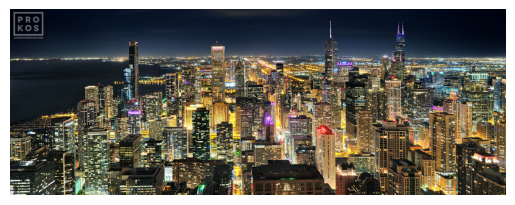

In [1]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """/9j/4QAC/+EAAv/bAIQABgQEBAUEBgUFBgkGBQYJCwgGBggLDAoKCwoKDBAMDAwMDAwQDA4PEA8ODBMTFBQTExwbGxscHx8fHx8fHx8fHwEHBwcNDA0YEBAYGhURFRofHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8fHx8f/8IAEQgBwQSwAwARAAERAQIRAf/EADUAAAEFAQEBAAAAAAAAAAAAAAYAAQQFBwMCCAEAAgMBAQEAAAAAAAAAAAAAAAMBAgQFBgf/2gAMAwAAARACEAAAAPlvSuVAiUCBEODyIhwjSIhwQKRAgQIHByEDggcECBweYQOCD0HoPQOT6B4FIgUDSIGBAwIEDggYHBAgQODh6D3E+4OkHuJ9weolweBSNA0jApEQ8S4IhEoEQpGBg8SMDSMQwMCDyDSMHmTwR5k8gwMCBgQIECBAgQMCBAwKBgQIGBAwIGBgYGBgQNA0yiESwIGgQMCJYEDRKBAwIlAwKBAgYlAgQINZrAzMohA4OCBBfhnlohzDkIFI4OCByEDggcFI8CkeIeRw9A4egcEDggQMDAwIECkcEDgolwcFIgeBA4ODg4IHB4PcT6D3B7iekHuJ9we4lAgQeZhg8yMDEeZEDgwIGBpPINMMHmTwHmY8h5kYGDyDSMDAoGkUDAgcGIRKIYEDAgQIlEIGBAwIGJYFAwMDA0CBgQMSgQMCBiUDAolgQMCBiUCgQMSgQIECg0GIrg7gOTJoQBSGcEMPQDlohzVwUjwOCBwUw4IHBwcEDkODyOCBwcECkQOCBAgQIEDggQOCByUCBAgcEDggQIECIcl4PQPB6BA8S4OCBAwNMeQQODA0jA4IEDAgYFIoFIwMDEIlgQMCBgQMCBgRCBgQIGBQIECBAgUiBAgYGgYGBiWgYFAwMDAiWBAwIGJUDSKBiUCBgUSwIECBAxKBAoNBiEFVJADRYMqkPQ5hWgOWiJNXBwQOCBwUw4OCBwcHByHB5HBA4IHkQIECBAiESgcECBwQIHBAgQIECJRCBApECBgQIECBAoEDggcESgcEQgQMCBAgQKRgQIEDggQIECgYECCwHVwlAwIGBAgQMDAgQIGgQKRQMCkQegYPMDQMSwIGgYEDAgYGJQMDAgaJQMCJYEDAoESwIECBAxLxGgwBUz5IjhahWSTg4kFEA7aIkw4IHBwQOQgQPIgcHByHBwcHkQODkKRAgQIECByUDggQOCBSOCgUjQIECB5ECBAgYECBAgYECBA4IHgQIHBAgUiBAgYECBAgQOCBAgQIECBgUBFdw5RKBgQIGBAgYEDAgQMCBgQIGBETmWaswK1UDRLEIlgUDAwIGBEsDAwMCBolAwIGJUDAgRKBgQIECg0KD2EQK6SWDEWQQg8AO2iLMOCBwchA4IEDyIHByHBwcHkchwcFI4IHBSIECBwQOSgQIHBAgQIECBA4IECBAwIECBAwIEDggeBA4IHBAgQIFIgYECBAgQIECBAgQIECBgQEhceK8iFAwIFI0CBgRDEohgQMCBgYlAwEV2+Kg/VXkFAwIGJYFAwIGBgQMSwIGBoEDEoGBEtAgQMCBEoEDkaDWaSTuRRAZAKSW8DydyB2SLMOQ4IHBwUiBA5CBwcHBweT0DkOHqRA4OCkQOCBA4egcPUT6B4HBAgQNJ5Bg8g0iBgQIEDEIEDAgQIECBAiUDggcEDggcECBAiECBwQIlA4OCBAgUCBAVlh6xDrVAwIGBgQMCBgYGI8gwMDA0DEoDp+rkuorKIKoYGBAwMDAolgYEDAwMDAiWBoGBAxKBgUCBEsCBAg9Ea7WRyRwcEHoEDkXhOdWrFmHBwQPI5CBA4IHD0Dh6Bw9B6B5PRDg8iBwQKRAgcGBSPApFA4IECBpEDAoGBA0iBQIEDSIECBgQKBAgQIHBA4OCBwQOCkQIECBwQIECBA8CBAgYFIoCm16qSppRgQIEDAgYEDQMCBgQMDQMCB5Dnsae7aBvGXWJhgYGBgYGBoGJYGBgYGBgYGBolAwMDAgYESgUDAgQdAKImSCBg9B5DqRwkkAKzHqYcHkchA4IHBAgcEHoHIeT0HoPQepHD0DkKZchwRLzCJQOCBAgQIGBAgYGBAwMCBAwIEDAgYECBQIECBA4IHBwQODggcFIgcECBAgQIECBAgQIEDAgIhvi0j1UsCBAgYEQwKBgYGBoESwMDAwd7wY760y70eSeC4aBgYGJYGBgYGBoGBiWBgYGBgaJYGBgQMCBgUCBEoO4IEDg8jkegcHD0HuY9A5HqRwQODgiEDggcPQPJ6D0HoPUx6D0DyODg4PIlN6TVrVV4QIECBgQMCBgYFAwMSwIhiUQwIGBAwTKvhWSiECiUCBwQODg4ODg4KRA4IECIQIECBAgQIECBA4dYtXZ3Wsx4emNerggQKRgUDQMCBgYGgYGBgYOsl/LZdJpilHFfMHklgYGgYPIMSwMDB5gYGBifIMDA0DAxKBgQMCBAoETKmEDg4egeRyPQegcPUw4OHoHByHBwQOCBweT0Dh6I9B7D1J6D0DyODg4PMEvE6ngtZaswh0saBAwIGBAwMCBgYGBoEDAgYEDAwIOlWSk35zMN6ECgQIEDg4egcHB5ECBwQIECmECBAgQIECBAgQegfJojRFnEybVqdudgQIEDAoEDAwKBgYGBgaBgUzJUyxVaKxdOyvmJ8g0HkGBiWDyDB5gYPIMSweQYPMDAxLAwMDAoGJQIEDhJBwcHD1MOHoHD0R6kcPQeiHBw9A5DyIHBweB5PQeg9B6D0HoPYepHBw9A4dJBDJok59Bbqzc9SEDAgQNIgYhgYEDA0DAgYlAgYEDQWKX7zzenYleoDAYH2OQ4IHBA4OHqJeRwQOCmEDAgUwwIECBEIEDg4IEDgg45NEiJnVnm1cDXnQOSgQMDAgaIYlgYEDA0QxPkOmTRIiau9e91x208xPmDyDB5Bg8ksHmBg8gweQYnyDB5gYPJLAwNAwIGJQIHBBJiXBwcj1J6Bw9Eeg9Segcj0HoHI9B6B5HD0DwOHoPUnsPQeg9B7D0HoPQOHoPQdQzHM+yS85fn76UsDSMQgYGBgaRgaBAxKBgQKBgQMCJmpZpvF7Pq1uVqe6qyPvcj0DxKBwcHJcHBwQIFIxCBphgaREMCBAgRDggQIEDg6dfPLe+rPjUim1ZkDggYEDAwMCBiGJRDEoEQon3mbOk8wVLV8Lx5g8B5Bg8h5ifIMHkPIMHkPIeQYnzB5Bg8ksDAwNAxKBAgcHDvSzkepHD0HsPRHqT0Hoj0HoPQew9Eeg9h6D0HsPQeg9h6D2HoPYeg9A5PoPcHsn3E+w9BlWd1kpxixNxqQweSPMnkPIeQ8gwMDA5LgiVEqBg8gphw9RMlNy7l7+t1+6Wjlwbt8z2HuBwQIn1B6JeJaR4ET5mvi0NMNI0x5mGBgaByUQgYjpEvEeonzaPFoo6Nsc7CGAbfSdozsCBAoES0DAwMDAiPUneSwLVxWfLM+wun0nqyXdm7sp4DxB5J8h5IYPMnkHDmHiDzIwMHgnzAifJHgnzEsCBgUCBSeg9A4e03k1tIrPK9ZsRxk8yMR3CVE8yehHGSTE+5r7JnLt2mrzX0FvSeRPqCcXk0GvXvWasn0FcyvCYtktslNnqa1qQbnzvqzXdbnSpMwl1I7KRItLpaA2scr2ZTktldaWuskU6wir0YOxa3xv52j2xNPpX6svrS8pLZSNfZ2eugko1C/Q53aYuF26Uvx2Y7hOtKbUle67VTl2cW4Kdz056pqp9lwhna64l490iBW8O8T0v8ANlVzV8Lr5RbsRPraTdcawIZX8lsPFXkNpN2ZeRbtanaZn1p7W6tmec14hXxPi1Y9qzKzfUdo6XBrEyWuzjmna9ojJkWzWZHuaxLFfaPUxLmLSsRKMlUGscHKros0xIDlYgxMpdpET1tWviVWfTK8pOtJtszuM14vVNg9xaFcq890p9jUGtKiStfcTAo0e0pnRBWlohaeLVVknC1fYXiXWwuXNfVq1EW72jiTaVIZMWxzDgEK0asmw/astdzDM96XPMT8t0Vz/oZc2ai+o3SUWtLTX0lXXxtAs6lgpvmpKciJFuQWd1ylsS28HKvedsqmLg6ldJWUVYX52ZlqRGutuV1Lhyei2XKmBHRyFIy1z3r9GajtF0h2k1vTIbWkezQZrSG1cDdDNVaM5Kytzdc+ClmA5Vq+CHaY7E8wViQq9slsyIp9ea6utpB3JoO8ung+se1OHTxWUx0cR8em65+icuySzg5XdFvbqDzK1PQwzYtWYN3RDvOzHZ36HTO8GrhuHOqG8sptSKvRKivStYlp6xE1i5C2dKFxepi7MJI0eMuqXnd2et03qNubip1tnd0utlX42L8jmR2YszilIT4tDvXS10fKG/N6BQPJ6gcECBwQPE9A4kKRoHBAgUjQKRA0CBpGBA4OSoPYdSesHUmORxktVxHq3QKWqGUnUi0XaLag4yZVbw4jhelkW7xFXNJVWVpMytp0TJixOxdlZA0jQIXODFllBub0K8idMXimzU6OHVX4tlhZpDnq0/PoHWUt1W0bC2h1oSO/pSMkalM1eui6mSm0pBtWQwybJKq2lilK1abz2J0qkCOfX4YqboXOYglIm1Pnht40XuKWv3KJPV9q2tzez8QwdyVyFW/C5dM7PZ2tV4NZa5IyvRaSuO1Qxh3B0QZMQNK01L0dbUvK2tHpu5BmlyvFoCOhkhySibKy7GKjchHnZGresfQi0Z6ttC+aj1gZzvjVtIQ6xtS9ildMx7F5WnJb7CIsYmXMT1sYr8o9CiBQIECBAwIlojyCJYhgYESgYFApFA0jwIEDggQODkoj0S4IPQdonfkpx+77tLgDZnUCkQeAYLysWsVmZ2zyZWhPlDLhLRa41Tgp1hFj3muF3N63pEvEq8y8ruy89eyLNe33pyLYvxdebpY11Fypspi9g0m7gzDAdd0/HuNG0KsRYwYrvx4X2+eSZNeg8rbDtSFasy0dYrNS1ZWFnL00mukbSnlsVy0JzLfmjNUYQy46PNpndi/y193j0MoNWWj4kkamSaFhW0WJ41CNi+ibVEOFtGfUWZcnR0OTEcb0VQ2bB/zNg9RnKIZte0rvtOXiW9WiORGrNRorYBRvW2nJdSRV3l432VgYZWJVtVRhvSnJ+T3R/nG4dfT29M21CxDwTXnxVjkCDyHkPMSwMCBAg8h5gYECBAgQMCg9SIHBAgUDg5LggeRwQHDc30wxOWJblSNpDk1ZxvxOCkQMDA0jzHWI7BIrNyllou11j1VNqvRke0F+R9nuQNdDRK5rOsWm5slxltQtrJteXtzw7nRywrNaRAWVtJhlll0CT68ZVxtTefG9mgo0f6ycv9BnuG4i7DYczX2rz3QFNDArqY7FZLdWbErZl8c/UlVkZW0PQXJdTHe1zjuYJawb+u8/j/E75XyHeWxx0gI7PByzp/J2ahDaObC+vOI3PdbXatcNeYR0Jl78VPz+lI04o8VtUXsUaNgzOxvbloegi/tUlzulOSTszUddV7ldHz2pOgi804oKr12pFvdUgrFtFtmdnyNAO23PO8zKUNlzluj1mExVktszO6hdXy5WVaasHkloPIMDh6k9EIECJYPMDAgQIHBA4OCBwQOCBwcPQODkPI4FDs+z3QA0aHZN5bi15t08HoHBonyHmDzJaMzm3O6nddu62+ERZRQP1rjzVybZLThMdVup9KumxRAyBvnaPcRRhPpc3tMKSLqzQM1hN6DnLpkviwwbvGbRA3c4f2ZTfBslcPqBfoskDu8fxWglk1G3OnW+J0RvplYYSPTnsmZ+TLhee0bLspnRE0Z/HRyipavLn2LROU673JG1Sc4rzqGK9PMENSQqueYdemtqB4WU1ok649RonqtQCgLoY7aQlU/mJsYTCTNgy13k6XnVyS7ejgisBWqDooG9DMS25VEna7p1hmDJU9Ktzaq20WaHK1dOwagl6dHqseYuypaYREYjrVtErUI0dGmYLk8pizDL9qeZDAgQMDEsDAwNAwIEDggeRQIHBA4IHBA4IHIclB6BA4ILBqtibjBc+4fRoLc+in34JlqXyJrktdd/VL3iJ99DGIp3W+2g7li2yafoPyvTxL2fGESTLPapsaAVjKYD9TFoMBZV2OYtHkjzashTNHya/fQySNWbLU1GrSU5n6BahH5/qujUKdDHG2oG/TZZPF1BG3AVNpGu2i57Oy6XOLskHJd2ogF6+Ad6OWO5HcqZ49XaDRUFA+a41B2jL5rXTsjw3ZnsFaZFKwbwF60i16eKxEtHWDtYPsT7Ol+szpPP1Zc2gL0cVw2hDzPbVl+JHfxLTMcd0BrLc5qX0jW74R4YK61ke5Gd8/oE00sGJiXrTZtI4Rwie0xcpvKrPpd52e1lv5hfK9Awtq3rHHqHaNBVdBo17Bz3AfRwAb11TbxoPAeQYGBgQIHBSNAgYEDggcECBA4IFAgclAgcEQiZy7+JPFq9YNR3c8OxbqqjS/DpK8KUyshbSPBrk4tQ9spTPVX6FjvUzVTl26L3aWXXP12W3Pm+lNTe7VXpVaRsu3lm6kgVdRiDtlCrG4F6OSdaN8831YPZR715MfdnHIrOQ/b6UHeH1iakR41AG5dlW3Hdz8y62KdUsM7/ACUMk2HsHcptXN4qXLxaNH57I2tWddRdpEB3RwvWtmSrWrWQa4Ndmq1c5VnNpkV4XrnurPnzl2tJ0HnaBnYqttFqu2l1fdojwRgvQz6Dn0X6mdlaNJyUA9MC848m6V5dS1XW2qw/34MU1rnTT3YlVcZopZ3pPmAPO2prM/M+NYkxI3dJGhxGRMbVxJ3RYyl9bLQDSoauzbsWu13YoGDTqXI6XyB63hRw8h5IYGBoEHkECBoGkUDEoGBAwKBAwODg5KCbTVwK8bI8kepDLn6vFbxG193VC2ZO8TwU4hzaXXNrmfNvSiYPWL1DKR6q101js0qDW8mkFuT5jrqZz6NaPKqZzb61VQ9m0AFV2atVjSaXp5etq2lR303bfzLJ0W+TZ89VAFTO+d0p+YYRr7zBLi19K6Hgr9+CDoSPWtfUJi7E+TR2z9CvdiDtCay0eqTLUwkzWoNia7bmMc9Id4mDB/oLo0BZieGvWRw7ldVLUENCO5EonlBKrJtlZY1sVVZoGe1TNfnfpZzDPpPs2iwibLE2Mwzzq80b0I0Hj9W7z2x7tc2j0rkzQk25LBdujbGdFSF24DRlEiVb3UWvczK+4K6EdM7rZJzHkqINph8moe15cm6WegZXWMWwd7XIqMmo/wAXQyjo87iHkjyCgYGBgYnzAwIECBgQIGgcEDAgJFP3zK73ltwtOVuoCakEK7maWJV8o6eGPaFIdRU0aqtXbP6Ou0aBPVmYlw8AwegQc5guzM91v2Xchyaanpc+Vk0JV5cWhdBegZlwMrqjLMRtKJtLmNk9TImlHd6DTVit9iPNIz5WqmQ7mu9ssBd2aGpnYJ0SX4ttmrVECl05Js1l5NLTEzL0B/dxgzTQoxvq9Oe4ztMct6Czs76/P8TWxqH6tHrdks8W4SVSI5Sjq1rM0jPnEteajZUhqTVXjXicuxGq53Sxsq1bUxXRWSaDPNpnwiC1Q4yzbMw0xN5h1XuN2RdfAUotDaWXSXfRi0VTozE9H46sePznGMeuVj1TG0521FHH1i2jPfUJODTc5mhHQTf6UXqbAvSzn111a2Z5vy02TT0pYd2L5RHgGgRKDyCBAgQIECBB5gQIPQIPIMBPmcQZXS4tKoTXLzPSs3Q4/wA7Rpdsq7HOgWWQsXY0aT2RPLZWvQRUYGOUwIESoO8W9RENlD7DoKkNEm1O+dpl6+M6uuHTPuIkTQsILsumAh/TmsxXrZipk2+Z1Tty1blH/m+lz0Z7Xk7Mr9dyw7oZZarGq4BdFCfPeEyse8aRzelHloftyiOhGtcbdXa85vyNIH0KR9WMHucpOFi0Ro0DnvrdOcj5XQ4NoD7s5DtvKZgoIL3ODjbbZE4mrTU6cFddVlQnkWSLeyalprmDRcUYKOjxeh1z9WO9FEgm5tSt2Y7DJsANSqOyfNZtYOczYKbxtHC0xmLspi/dkl6MVhqy33P2+nYifNvmaMoNTQL8rqg7qnGK9K4vcDg/auREaTmaFdFhFu5satRDSiuxarzDqzvrZOZHkPINA5LAgRDgxKBAgaBgQMCBwYPEBPnceYnyq2VSPegX0s5Bi06HmfSQZd1ueOsXdOT5U3VdvMl0ZkWPpXufSH7MvWJsFX61sR5nXib9l2yfucomxaSGtpamWWVurpVh21suJj0IzE2gXWPZn23WKP4x/g2da3OedoFNaY7Vi2jPbZWUG1Xe8cLrIKyTqsMalTbQNxM8i5zah2bGfN6Qt3+dsPn9IlozG3G05F3svDoZI2Z9LoTqamZa7PbZ3laraH5vs0ToDOjlt+jXpqVSppeZtdXTPoudmYbUVGjKGWpcVnzEFSZrrFQ6LxF7JL4bga0Iu8j+7K2CX2UTSPzkSdArqyjl1Ea7QmU0rj7yTQoZ1LGb2qJrSPUTSmaxFfc92WTzGneS9d72RjvR48CyRYFWIhfnFekXlKZFatTBRSsbdn9sr25+0m5+vD+9zvIMDRLEIHJQOCBAgUDAwMCBAgUHklASIYaZHFNbRlsFWLHOrit+fs0THoG7mZ9PBYxTtoTTUafbuaapZlWTokGbXSsVbxQzQ0mzuDG1lMUNLuAdbmEuTRHjQaqsOQF1Kx4aIMjgFZNdeREjK8ZRpa0cLU46aXiG8rW8xW3WD+3OOaFeqsodWWUq1rQo9CyHNeofUrRcXba0Q7YvP9i1z6hjp80O6fOD2083REvBNl06Qu/db8n24DVDLvmbpzUD2fb7rMLq86o6OOoW7xSLSkaJzejmu/NSaM4K5U0ChF5hOrzTIa2t8bqnVFpW4g5U6sxbmm5XXzF8V38QzO9eYW1ZbJLOFTYMWrI9yeEhTWaqaynL6REoXZTDpaSIkw8z6Wo3tCevx6xmGS/GMpYTJZbZmdksCdVI+zNZtznnH6A918da2ojRuh49OLdLMwMS0QiXIclAwNA4IECBA4IEDB5g8kkKG22Xp9LZ7pTfcKmVpV788Kt9E5uymiFrzVDUNpzhku9XeeRSXk7kUywqo6wqXddJaJyGRnK8rZobfLCOb1Db13XRzZJztJxhl3XoC9fW5LjdrNs6y6LTg9HtF48xm3fwDD6V16nWJ+857SIsFvvgPV5YHrzzqzXsr3mPdZ9SHKZVb1tXa3xOoXYN4f0eeLdLCDa8t+m9G9GzcvUfywMhmB9Pn3q2cSs21R2jd143SHt6IvT5nHJoqqxzKa9zOj87dzlwpgkiKRkWjM+hojveM7Xossm30Wqm0oGrJE2pG11RDSDJoFdmOYvSH6c05+WrWynmStGivcujtHG8SqzI0KHa071nxBc5NanVf5OkZIqLdjhRdfO7JbV0qRZnw7VlUvDJp3VkSWGJlr1MUN1BvPpiruG6qoGIRLkeiWBQIECBwYECBwYFE+AaJv12np01Nqm6rmqnUkxFpSt6Gaqxt1XFpprVqNCPbUAWhXlkzZ3dGJMrRqzcGc8vqBcqIqzJTHuLaFknJdLNgz4w1+kJ0VorEG0XyLWuPdFJt0MupoWC/PP0NkdMXe00ZsB7aL/n7/UkO9OF85JRQ1uSMbl1TV9r17EXRFTW3gtMrPK0Ummt3ud9EdTu1/zFQz1s2U7edf54oNKta52yPRhfS+P9JGrUXeJoOxfKtE1ctmQyK1BTnHrSxqajzN+Y+n8+MzIcjRzmCNFyelrKgDPoW5dVQ6lXYqb1I8zODK6UpxBpyDKbzUas7387lK7NDxN0HEwMXtGIlzaGTJenPQ61mwoaJz+jAdBfmvMYrlmtB0Rm2rN9H8roVl0Zs7LYpZQurFZXm+OlF6Try1G/Ln+LbbY9Oa70ohE+gcFApFAgQIEDAoGJeBiUDg0wXIbYLsY59E+YoGR4kuE3D9OfjmYbYtVnagzpQEbM9K5N5FpmismHSl2s1Wn4dlHuwk+NtTFR9kEsTVUvuSNeeOTmejN3i3CttOVnH8HU07m6T7JW96vNo+jAzzt2bJZaWistWFL7jJohMryi0PQrOvQ8Qvenlx+ozFiu/PMmecxbLpCIsqNpr0nFrPVOkY33Xk+wJ7sOYd7neJpLtQuytHGN1DE2kbHd8arGMftOZRrkZHD7aGiWUd5qGZYcJuaQ2pXJ68hZbkBzmuQUvR3rV2C3G9r3j3pSNUdZn5nqzbPz+gaORnLFE2bSP3UJas1VatjWa9tS1V6C0+H1lRMjqNIXd2R5nFTbVx8C49r6PjsH9PHbcvRP0W6JteIKPoYKlMCt4jNKZtLQJWW+ndHCR6kYZl1WvN6OLdrB6Bw9QPI0DggQMDRLAoESg9AiJdLz1srWrIk3kVtMreVMSXlFFDfm6QjoYiPBtKsOgxpbJeni67M4DozH6mTt9bR++hVNjXZb81uU25BdlON6U8XuJr3Q4tRijMfnmhnm5QSafhmsy7tfyOKc4LaF4n18edal1zaHeZpTh0FvP33vP0Q9VPOdlBvQL9jjx9+Qk893uulYz0s4o5dldcOKkyAnydGvblCehQhXbUMIReb7dB0sWU9TJUNVfDrxXRpa4rO2aKoMsGon7fFBm3i87rU5HMD6hRtoNLIcVsCtsqaF0ZZ1MXmQpzNJs+ioerzW5QjQKacvSIoHLvlz0k0HFsILQFuWSp0Vzc1Zlu2zNPvQldnzymuNFbO9YpcmeEaO3ac10Pvtz3k8XtDD3PA5sR55r7ll4VbyM80Ls9Dpxca2j3IehcisF2Yuellt3ZbVVso5XoMW73KUR6mfQKBgYGgYn3WyBg6xNiphVkf7JetiHGy+TAvvpQ7EVN1+q3IIB9tJlLca2vzJeI1XHP13qWBPSzC2/IDsggWwl7NNr19bm87rqJ8YyjFgIExdEUqpLctxKX7t5VWadu2bdtdZablcbX5rph3RSW8/XaYzG/W8UV1ZK29YNbEJXROJ2Cbn9EuwMguiQqc+6dNNxZ+GKwD2bD/QVE2qTaSmUFpR5ip9l20z4g95lvgNQ4yZPm+xW6cma9nNKkJy5VHWoMqPWjlWXF6FPoTXa88femEOp1WtCOcxX0CnOCz19SNf4W/LuvlzHrc/xJNowlz7PC2dIvymlLoxzWVpb1JczKNlNQy6tDNVOIvxwEzAETTgxcdq9XWwH1KkVhqXSW2mHcHtpb0fQSkW25iSrTVDbCFwM1y214C23eaR7Qis7HKI8TB21q9lOK79q0vOX3ALqc4tasazasl73HQIHBB5ifET5ie4G2DUTcrf3vPaKyk26Ir4ZSq0r6VgqRo6YteVek5VDtyS4sYWAG1ZETpWO+jZljbnccLzDK3JOzkBdieEXMcmh9Wfo+OT1WqrneLfhr8OlZL2MWq7FfdJbi0tS/Kt59GH+B+TdfBG1ql8vaS8nYQ41Y57PiibK871pq2NaK0vi9W3x9IlxIlPVGz6Mv6jjzgoMOe3IvWLFOhSi6Geuckji4m7LalSDPqo+i0q9G4xnR28lzivw3QGelqA+hz7mVRvTOLMmEVpXPktz/XiN8T9S5WovQ/I+zi6Z9F+o8aF8ZrWqnnFfcRt3L15T1EYt08EogzQ2dn3wIWVJZUtpX6VU9lUm9MjDeLY2TkdHQl78662IZrj0Ok3OVmR9XEIXqdRSFNiOBVmpo6XyOpnvQxl2NiKeLuIsDuDKpq5F0lM2r1uiqZCZnHely/KmRrEi1eFWXy6PFw7dn0bmdPPtC8x7XL8h4iecSiehDSWS7zks9RacpjBUtXUNoxEmalSmnGXWVIv2yUpOhnAtaK0sXyRaz6kJMrivCzH+lnNktzzdjjNSVZNFynQf5WDmlI5vivhVsTwQzOt+TUebq0jLphxAJqTVVsWqkhre35ey3598e7mQo6+SBxelofJdb4F/NfvONleikS0bJgYK78+5+c6lni6hajJYa1V3Pfku/ZqPPzFfnjEvXWGejSh6eP07PSMt4VBom3UuH+gbr/a2EdmUXDzaJ87mFm15Z2kEE0E+9kj3jnEDa480sikUnUedovyOKmi7qKY4rb6lUaKc7H0D5t2QdSmAeiwR70Mk2tsPSqnJsEsgtpLaqFCy21Klm0Tq8259DNGisfpENfGtlssadfjq5VdbEQ3XblquyzVi6VWgJ5HUyvq849w6ZaoiQ+0rFHtyFGbQX5WSnqiq0z0WGHZwvp8rR8s0LaD75mYt2keX6Qt6LiVe2YmTpVdJxn0vE8EyglxPatpVLeoloIt4uEsmUtAZWLNel1Fy2ICtbDV+YwZlGufsGRuSaV2c3GWKv6zDLSc79A52kV35PVyS1I3qxE3M6ES1jPG4f2JqNS3mhzAR8/d50ZOE1HsemLaPd68pirkJ0O1nzfQg5q4/wCmyXm5d1x9+n4Y7oj5p9PzgbbnaCNaeFqfQ3n+lLzdO7vjDelmwHq5UW2/g7da8c3LfQvG+it9+b3NA3StTQrpN2l+X9o0TudCS91vlvqPxvnT+S/F/YsJbJEO/igNW0HmpLRbnZdGQcZGpWl0Po4fY6s9REwLZrqlWK7H5PcBd1GKdfNAaqpvXQOd0BzTnK0Nrb1mQuBoyvWxXRsi28bWmXBMjXVuy3ypxvpc4zqHCoCom1mRLQij0qIsWso5XTE9uIvyODdiJCX6Vhd215yNV4GV1q9XoeLrt1FXHS5WeU1V2zNYRMZUmfmeh3fWg2MEtCodqA/Vw+YnzMMEytucxGvWTS3eSRS3WssynuIkVERpNLwyLKIgReyzAuPga8wy6lPNtMzaaZyOa2H3N1TnqrIZZacdVv51Bzeiao0zqFO+tTuzi0pKc7jLFtlvySFXFK25kc71h3pOvQcHlfL0zlQHdlHdwe8zVsWYt1q+b+rlwvaqrZHqYlUjbeb0Z+bYLPUGb+da1aKaER5j6R8P14ttdB1UVPSw1ja9LQQVqQ5n0EzR9NsaGVN8xZi6P0R57FaptmfU0V1kUfWzCr88hd4kx0U1opCrbRsTPcdEcz9XhHoaJ3PvI87JhHsU8K3Lzj802RlPokcrreVXWTbEYustDSFhUH0poHLsL1K8+j2i7hxtUL0pm1FE3626dOfpMDqr2tKhuopIsUYNsLqcuw4XoBfdg9kF2HSLbstnW5nzdPTUh5vWKvbICXo8nEKdNmqjtXxsmg0Utmw/O2WVYtMrch7/AC7hLVNVEq0dLHRyqGpWk+QUBCu3G0EVAzpWap1Xal5chUCJc5/GiJozUlp9xarvFrEPEtF5Crm+YvYtR6ER6X8xe2TN7eaLpZK6gONTrvH6loom425T0c1iHO0cyILYqdS5oSYLGa9YmCu53h1E2VmSdnm5sXlkeKr7WjYcm6TowD1tWW6M87M4tQ/Mujh+ivLdeVi3jPSziXX5w1pVd1k2zXSmAvTRbPtQ5NdMzOc4+juPPTaO0QWIgXUF7sg3Sou2iiSrO2TWoXa2m853fVv6YPY2EoDI6ILr87qbPP8AdaRjQohzZuEPy7Q7yMHX4dT5nRG3onpZXtrOfnrLAq9VS5d8tnis+onlavmk29L8ypJl1GWXXbbOZTUryS24o6hG0TjPOrzdU4XapNmLjZc7O4a6GI3w7C3m76zq8hqX8ZNRvKLPZzcbweiotKvD8/tmYa0LtrpnO29MdfOS/IvW6c0Z1KbSm6ztvupz9jnNlOTo5bE9YPczIga1NOsonRcDmYSmmtI7xPfm6YOHXn/pOZwmTutdHpb1NXgrEsS28w0fFaKyfnLp5SvM/tWxpaM72L9yuHtSfeW6srgabDI3MfbcvrWPF6+bxm+9F2TJZQqzMp7EK9FRxbmfzVbLupzOqb2FosrQEWp9J+e6ZrwNuWet52W9CnFVrm64MR9F+H6j8zqBvsORn/Wyxb08TB3m16sWwbo0sbICsmgadnO8u76FojxmrY9PPFrSsvOb3X5rNjBSl6is9lzqvF20nVvI4XsR7ZIQx1I/jm1LHMceilRE7BUZHAj71WhFbozHfJ603UmhpT1EVz1yXLob1pKlnVlktnAj1I8T4ItLp600XfL6lj2+FbZCnw7O8Nm0aOaaZ70udq3G6/PVjC7UslNq9mUlyaSvl9Ox6/LppXUYtBvy9YZuQX8nqBfRz1+zNG1YQ/Wq4bkiZd1iV5qsBdfDNuuoLWCrkqrsRV3rQ6EG+XRFmRHUmwrJshg3ahNKRGGWa22IFi6xKzPU4N1Z9sztyN6z/LGR64Lk2pm0B3TsGDZoHGt50GV9bLZSe8+gR3JC3rk0vPtcs5GnW+PYnTGF+twTMrIsWVihfTvoSWzFU5L4NavFFqVd8/XDS3g3MO6EwpnQ818z0q3fx/YM/P8AQzf1/IourQM1oI4tAF7p4jqknJ0jnVTjPuOVW3Ikycct+u4miHoUUrV53ldVzXTMuvXbZNN2Ij5XZsZg/VYHu2vY1q190IEVGSm/8xsxzr3gehz7q8qZi3Rb1u5TObShrYt5CiznRkHomVT89RsyFnN30m7LFrasvSdNY2pE3Pp6c/Zo+nLkDi5524P6nO9VDbnviaszOuY4etN6XG9ZChya4MXvUvFN2YO7/M1ry3a6tyA2pbUvA1ZzLNpteR1b/r8ujaof57SPOJ1H5O61z7KPpZhjpYAbpY5rFec2s2pA3UNN+KJSY8zSSVcWJaXy/SmvvW2tEALfSm8S4ahejpvrKrDE1zYumUNklcuat7KCaW4VBFjMXOaZdissq1q6yVos9meuakRxaaloMviCyvqJ6VsT5Wn2RlR0ecMaKANH2C2X1Y7TWwWQXRo8FXZdVRkaLBT1mGLTAq0K15L2kXMwIMjrFdn4PVqAr+lhq9deuZ1sqe1i4xu40pUPqJ+iwkvO0x8OqrjQTdXnjBE8qL1ZCgPsmzV24DVup8vV4v8AM57qp0RtzJLeVl1824RPIrt+S13oIHI7dHr5z4tvm0WrUTLEGLFXnq1PcVU9CsjHNq9NDg3BetNwuaK1bxix/YiBaAu0eAOsuqntRWiem8is+WKhuueYO3o9+R6zsr8+qAuYKXgnb5gnvwaZwuzc3zC2mlmqQroYjbJq0Pi9SkenK+ggf1ZbFbusLo3q8TXUOBtZ15jq3ta5tppDcll2l78lwqZOXYJ7cdhS9Teou9Qo6kwDBciEzJk7lbBdr6Fzy3tdzGsw5VU2sI2vJmhDUZNwHTHeFmlZM00onRW5tTMsoi1XowjpYfEjAgOktk57TSO+7HVVaAWnpBpxBaibdbQPSvvatjSaSa2qXZ3oVrGBwPewPrzzkhLMi7aSlmo8jbZ8TVbdjOJ9JVEMqXKJMNiTXQayP83nUbLqpmKyuaLaPbs3QOF4i1Yot2hl9WSTPp1PmbyTq+bhqYO7K5Ul9tmrWSxoGpbQZz2zmcef1xjbzZvO3QWUIaXInIuYnpzrA/fyjWfVR3VbXWS8LpVmrNAsQr0nXpXbc1GyBGYrb1K876i65UW9VnjavqawHVIs+v6a8t0LhaavL1KfbWvXOReg5Yf0udonG6/l2Qf0pIsrRzZlt3UOOTtHYnL+7j5C669OkBPi161y9nWyoa2gXWxVbVScul70mKOmzIVZdPpoFsTTySKlM+lXaK29bql5qmlcQAac+gKnaa0zK1q5d6BtDpa/MXo22iquQpgXcQJi3immZ2V70C7K0NXgLiVW9lFoaolVmpdXvNbxTbWpKKaGxGSOtDraMFK2pukN8VxndJHeLTO0F34TBWitxMLqTkemIdkV0wfKuFtp76SdW58kvmtFPZsd7BbokcK7OawyJWbQG2poTAcfSuuvM3J+hEP63y+6MydWyzXclWTYIc3tMjSDpYq9MQXmW6K51oXd52KCttFsoN7WMOV1x/ZzmwdCK1RCq/SU3Utu8MUHruL08F7Id6mBqFui1B0sle6nAqTMziroHGRn7lxbVNsmuvtVyJVL8bRysuresg5nVI8mztRmrcNl711DnOMk9DgpOpzCfjdeZpyBb0XeXRU68thi1ZP3eVMiekyxWGHsL1TD/PcvXFbDKJklS4pMeiysVRFP0MdRelijQrUprVvFMq3KEtFCrO6yU3Pdma5Il2peQXybZ8ypkq1xdcKImpuDjrm9SeLCUqIkWiuzk62Cb0TLSPq0d06ocaSWqheqJMlVc7VtK0rU192LSUaHh3ws7AnZmxfqZzbNbQMluWuSnmbyHdj57MAMrSGgZrMUdezF1D8/ukn+FgVtrt+B5jwdtH0c2d9FRdj0UmilzS55dOZ1sMsnS4sFuXWMoPzBRk1xLRAkMsLuDAny6o8QP6U6PytJX2sMbPSDtTiWlII80PdkDMmlkMvENKiNl4fXEelz6bn9KqakrXe8eiXeI/G2E3QzX3kW5P1N8rPWJ0FZn2+bbSc2Vs6Q5PvLozjbnM8LhHcsa0IsKWmLZcpYIbsfiJ0XzXcqNtKHdi0fB0h3Xy4IECdWadbmaZxOwPbsFY1JZjfSas+ucbd8s+r40mtihDeExWNpwmLVLILKWy51PO/L+tj0ZmWm4XaPUFZMB+3LAmPEWm1lVmocsP00m0t7raovU3zuoHqG3KkQe625yabh02V1V7kPSYS3+2K6l+UKkUmutQkoWVijvFYu9PLy3LrtrpB7JsUWNLy+KwT069KB3Q2xF83W/Iejj7gF7EXee25cXd46qLXNq6NxD3SxVqtIGxejJ0RObrA+hzoTM4VpqWob0DXsW3VskBtJAOhSVeo6thJlde1z1WfgDJtxb0e8iW2JYtYCnKymtWZVlxSaK9bhLplbq69f426l7/MsDLYKvjGi43e3i9a2az1lYTrKbHHK6YxvxRef0KtyjFFyTz890WH9eqRnveqxhHWVb82ufehcKdfL0lHaslGzLzqCC3DgVLaH+DbWXr4YuFNWCG1RlnuI6F2qmDulFQwJcOw94nV6vQD9jmaJwu0I9Lm3q6d6NH9+QvwbsD7vHnUZeKvGCHep3i6VVewPv5fSKnmDRX7EkaHSs2g7bkoVXgsV0Tce0V4xNNIH7c3eS2gZLB51ZskIiJMdSfUDSbBzNmVdDL7INKUoasKKhTanNV6kgavXV0SNMUU2AmLVVdRrj3x9ePMmq9C7SlpK4ky8jzXg6E2FqiF6+qzbxYI6+LTuRo0iDNWO0rjdTpoxdutgjVbiLF3FZ2LnbPnro4+MoM13r30B9CdZyat2z0BOZuKtUBdwHdEAXZpaXojPdVbNjwZi9iyaAYvFYittF2hw3pzyCbFdyjLtG35904HTF/V8OVShBVIXn05zbbxmIzEeZXDvXQKSV87oQ35Y2HoVLVFKGechXaEQWsueRop+viDuiiFajuQTLbOznujRnUuytWiLilimaozyaqF6bYvyVPG0crrPc9g96rVN+mhNLD6RsVl0lHP2pydD4fXDepgZqSfG8V3ZD7m78z62CDJawRJqZUt9Q5W882/NOnqx7KyRZXkaWJrUN59/COBUcfmLOdokalhraj+hde9RdS8hLM9bWIxZxYyiD0BvlaJuppFTlm0ZVuyzqybpjrTRKYi5F80st6wJXJUX0qqvenOBl4mTcYK27fZPxZvxV96e127SWadBMqbiF+6zU3ifr0DCEntajLF89VLfFr17j78X7nNpotTXrXXrS2txmHD3ZVtCvdbRrwUIn1kLyNTa1wYnQMjLKueXGqZi3g3RxZjsVMrG6cnqCTgc18+uII1XHnUo2xb1Y9b+WUN8rO3a5503UX8jGG59Gfp6lboz0bs9aRWXqcwaXz+h2nPXYOhXOXeJtlHU54DvySIt2rOnc/VZZmVenFVMXKhkInSMrxW51dAzoWMRevvUgS4Q25eN1z8+iE9EYjQ8rOERLXfyyvtWmvk8B6ieE00vhdav3YhTdlKMjR7p4THldPEe3zOoaLi2VDF1j853g2aSy9/qTi6D6Pgz52nUeYvNejYFQyDMYR0uP3C0Km01NSdri+aUjApsNyT4mvmZ0HEjiHup2iNIw6xjZn4RJIuugcP0ecd3zmo0jPbQXItm71lVJj6M96xHnLvBbTKrooNKBMtxBw6EHOVxlQtWIrVXgTUYdAw+DnHspG5/U3GtKDPFo4VfHmsyL1d11rKRLBghnmJrGVitSTJYPuXxJ8Qe70kUkuzOEt+C7zadb5+sf1Zw9xTzW0W+vtXSc0+KN5WXU6FZFsS0ngPRHaToSXjfoTnq5qdlM7IGjKIOUXZn09q3QadzejI0ZOPN6FHoQY5m5L1MAjuRX2XxtGk4NA02hhnj3akAm2VawVpkBG0UDH0G4ZVsWVZ3xHLDtuGDMk1Ly4AxlFWT7DomMVPz67nFr6QeIG0JuuR0Rbqc6u2ZjPG+t15SLkbsT9JzotbGqbkKLjWvDS2uLWuRpfcqZtFIFNK7VDLq8UWlfiY+cnZEQ4XRBCTX1tShXE2dZYmIR7iEHgOUTwk3bDpyDQvvW5zXMVcT0WZ+g89oWeeFZHb18tTsmB+T6lFGjOKp0gz7QGxJiamLd4PJLxU0zPLCt/ZYzBoHL14d18zhA0rmom+hvDRnl2rF5XVrNCeq7lhUevUZasgVfutkW8QGp71IN4TVUtjwHMHC6K6dxejtfndFH38uT6oo7pCNqrrO6zZWgvFE2jAon3MIPYegcHDlMeSedT2HMnpB5AmozcuP1eunJM5m6O5Vyi4bpRevv809PmVrFdIt3idr5zOsqYlppeo2DchvRw02ue3mlZSwtEJyRrRn0DmdeBdLMVXScgsEs9vz9ltO+ZvlLGiw/oSV8veT9HnZftykON470M0agJ6qPFrRd+0k6tQjQmEXtqhdj0V81Gt2doJtZ1zPpqwy7ZiaYJFy1ZEmlZaGJUxNBiPZHoFW3qs26rCz17JztgiytmysNuUdlhARfUDHIVrID22O816TVns60pqOyHXbjJ5k61nQeduqehkr7r6E0c182joFzSw/evMLerGK6uhn1JqyR1z8r83qC2vLYqcY5r5zrTW3qRqvYpZYXpBmabQiFaIExTNp1rPonyRYTH0DhbtHzTrjjtPy79G4lS1UBkRm1gQMR7k6AoHkcPQewYGJ5keYnvE8Q9TEEjuT7ifpTzXb97stpi01rl3arS03Mt+f55fUQ0JLlMtitBdFezF1I5TFtn1dasKVO8LfAydC8yPyvvccS25RbVk2zidsH2YaLVkJlNFG0sM7Wm0iDSOXvkrvZqsLaVQ7Llspy05ijFoH9ue3pcKcsdfWsYsux6Zbc3OwLwxybekzprAYuisNW30Hw+jTvp89dvmyA8giFJ4gQWNZnxN6q/UmXZdCHGt68Jir7bmZn+lQSyDSufYuJ1fFljWxNA6l5FRbRnIqN6lKB6rbPtsqXoLrjRIa2B15Ssp2Cwia6YjTDgoPYTotJi1zU0FZ9abMkKlvknl9YK0oIUM53VJrdiKFtL1d7Otqq1axqehNO9NLc7BPpb1A1o+nHZ9H+R+kBOro+e/bcbw6LGthDVioAerPQS6kmJRMyt4ll96Vi2mXWvMlTaHc8A8CkiQeJqTLvrePYec3TAZFwqamryaxfbcdA4tsd7zZlz2JDJTm+7KHXDHPbpddzTRyy6ISW6g1YulwjuyDbLXCWVt63mdw1qxUujKX4d+icvoDmvNIUy3Q6Wq5dSK3o8z31clg2nOpzK57h2ZptVwkeJKlQMWbBuq9S6ubTnalku0ysterTWxy6oE1Eehj9kdJjjWzB2I5EzaTZVn3E2VZeSKRzuQax6qzWsWjHN2a2WySzPqGR5MmKSjAnZn9zPmYkqK6zLCI4NJKbeGLq1srL2PUsqGVzLdm52PBDQKZaB5GJl1mbW2k1p9K9DB1Xf5M43eGXoNE2jTWqk0hdg5q+am+rTXvz0unPFiYV10k27RPQOZF0xG2bM+gfPPV5r1+fQ6HDOlFDoVYa8wWlkit5hMOI8xLh7DmVRCI6B4gk1mIy3OB5GDjA8xJI03Lp+guRuGWULkMzLQwXu62cmxK0dq21ZorIp3Zsw2ZeoME6A7SzhFqJbPMFiTNtSpmWo/rM2qIpmqEd2EuxbCTLqMRcLHrIAjpcWSs973B+e8HSAuzy+Kb+sTdLozHeiquZXtAbZ5o7NqGpIEukLZQPTCar3EyIloJ0Hq1dKlMmt/ROVWEV2O0/Pklwq9jWe81taWqrEGYtLFDGqyzL3KJAmrrkWqNKtVjn60mwyvq5dK699IYnoq1pVkq9YcOHrzRXpZrt3ozuyg/conUhkGS5B3V4TDB0D0FtS8+J01afpDVy4efo4Zy+5nurPxrPK1bOsySJ6r9asGNSKHXlgWj2EApHsKCyBVkrTG+2YVcXpV915C+aDRmh2tfPXjTKeietjnSUHmJ6RMytSTNlqXPtlZbBch+vZHm7k+4PRKI6Agcn7B5OzpSY62ZtoZke9HOV+4tAahivS+eyU0N057aLUgdAtlXuWL7YdccHuvjela2s9TfUySY9Y9ozDe7nEGPZf59JVnvc49JM9EbO+yS0x7PGC/Nd8c0qGezzGYqdl0Zn2OeKPp3gL0TUSyddVXDIFq7Vy9wBpUPac9e1fAJtbHPP08ulzpNi5k6JtKghjMtcrpS/QCRc362wG0OyMgkFZC3Jo3NM49rz1ZcrjJ9EafP3eXt5xO7J6zJopmpLaW8Orm17QKttlNFWUsaTROiDeNQ5WoM3I42ixrAloqwMCgQWdb+yTTMyvagaadKs7JbBvSl0J1jDrMsGma5NQtwfpyUO3BSWvGmbilqO8ewNVnWs6OhhJR+p4LKaYRutmTl2abyrznj6qCVF/JHgixo0hRe3JF7rJEAvopHmymesRXsXLo2ruqwreHNPFqy6s2vK09y6L/O7MG3xroq5WVWMVWOzQ5RzKveCSHUcUrLr8WrLoy3pc75m+FNKbWjxal5nfFkgtqU430j8wjvx3mXRcIcdY2lGDVf3pARovNK+nM2QsWiBpT49HxavRmp+N6DNfRefomVq2Un1mwU0pXWmh1OxcJy+tZvUs8FqN6aJybhTPqXJX5/c6ytnIrUoyOsvzJySJFyQO8xoq7iLK5/FrpcjshVWTXM/FN+axgO6ZPpLXxIWDqfOZuvn1KKLG5LRFxvZciFUSngtWQg4zGuRNjJWc3RUbEPaI7acbHqYixboRnti0Tr70kpx7PdVgO/ML68t0RGieMmyYtR3zNoTpSNNUZz8z09PoPlfq9attphExrRcrk8TPQqRV2XHP8AT1SOCbRmidC+L6c3tTiFHpcs3+VjzS3o+DZbTF4rScIvWVZwYjc8shK4FtUULbKaUbKTKMoG57tbqy6/ExZUZIcojVf6x8918o0WxXo1gXRTPz1bcl+iIKzjpjtaa2aw7rUkil5tbbXw+sH6EV+jP1Ks2S7M4QfS7zXH35hPbmvszyJDds5KTbThrcvb58LokfawBeHX4xaJjGRvUcahfmquD6DLPUecE206E6wqc8q2M/N6W6qvWXE+CLZc1tyctt0q/VU7T0eV8/NuQIJ9Y5wW0vzfVku8r7ebXBA3M0cxMrJDeojUrLTueHTUakXl2Zm3kfVcc/LOdtBrdPSdWbiLmLdybMwgJYscz72520e0JENufRs1yVVrTM4b6mQK0q9oZfItSE39J6VmQyMx0k9TDXl9QI1VqdnOqn57Os1V62FbcoiwoxgsNPI11fmaZnZxmnd8FkT6I8xMuDwRqTNxh53sEnHrZRQA7uXOt+Gti9+rZn+zmwbUuVvgXVzmCBWomztr71J0zpKoqawDaAZbF9WQh6LKjqFuezo2DangifRsDVm9zGnYXzkbwxmmPKqTTiuaJ6wdKRV3WNaYYiCxak7rZ0idA52xQUuzPztUzyPjVbUaF22ew9ozj2vIRZNN0h/nXj+gkLwU16D5jfu+EFMG4f72O3bprOrzedmwOF0cO9h5ccszlIYqtRUbU6M81bIVq2NLcye4RpiHasmLdKz9668fy+lxvCZCyLS2etYEaMxXFx6l+MF5EGBOflqkmPFSOs6Pi14nvzEKrlVuYZIw5bn3nw/Xdc8F0aWS6RJs2PuzCebbhlp8WiiYubS5FnZpPOcB9NA5oTOSyWueFZ9TEabXRXPtMeaWG3U6SeiJdJuk3u6zXruS1rnm9NIyNftzUdAEqVhbnExIntMeoOsHsnRba9Q8rvIPP6PctHfTc7G+njGNmbUeT0s16WOJMTIvHmnGYsVtN8O+leggystVXDt2chxto9K6PRnizbpMDzUXS3Irxmvet4OnP4mJ1ZJsPVVNsK6B/RihOxPEywsaVhl+hUYeqbWb9DY0zdxFUXV69AulXIEsGWhNjZRaEBO/EQZdF6hsLUmqenxE8ovIUyQhvmD6f42whtEbQun8t1sV+geYzO94l6abnYM1aOac8ul4kwa57CL461lw9lZ62NB9tdXlD2XbdZUza3obU+GthKkIm0okP+hSuVSVdCYTDLBEzaUnfOZr2fpYMWyag3fyX81osn6LbIrWdXRvWFxavmaZ4/MdmXFF9HGOqqrmvhlOC2caX03A6ndErZn9YXh2hPasw7HKSXWe5bgRVvpMCiiCDM06xafozy+/NejSBs5+AegzRWQaXzxIdT1mtiZBNXB2CWT1iJRM1Gz6WzqPfn3oB/R0QbtcrKe/wgzendsezE9CY4WFbizU+ChOnSYYtw/qy7Z5PqSIjJ/R4miON48MHk4BEmjyUbM8Oazqs9vVMI4zFpk6trn3c7KFtWCM3CU5toppzKa8YjuRQsW4XNL8YtvXPeDjeWzPURU95uvKOpktKsuczBHXk7tz2GfR0qy3vA+xdOysuJnrvCtWJAUZ9H2PztYTvycvA+g+efoXnB1y4Fq2C79KXr3Jk1vSsVaVvOWyPargX6llvB1hLJ//xAAwEAACAgICAQMEAQIHAQEBAAABAgADERIEEyEUIjIQIzEzQQVAICQ0QkNQYBUwcP/aAAgBAAABBQOatNWmrTVpq01aatNWmrf9ziYmJiYmJiYmJiYmJj/xNtpQeqeeqeeqeeqeeqeeqeeqeU3M7P8AP/8AhnJ+NKIVautkqAL9dBZhhuupFsqXXi/sf5/9vmZmZn/yXJ+PH/W9+Vo/aGHY2drE7Qft0cX9j/P/AMrWm7/9tyfiN8BWP00t+ibxts8X9j/P/wArx/8AUf2mPYv/AEPJ+NAzVeSo46g2HkPvyVG1LL139mOL+x/n/wCV42fUH8/2YH+XqH/Q8n4pYoqFimtHKN2cfNjl2R69bbVK8X9j/P8A8rxP9U/z/s8f5birsX+f9/bUXHpGnpGnpGnpGnpGnpGnpGlVBRn+f/leLn1NoIt/sw69XHepHswbP7/Q464UAnX50mk0gXx1/wDl+O6pfdhrf7IfkV5BxD/4P8TH9zodf+gAmJian+yH5yNlCiW42/8ABXe6VKq238my3+3AzP4CE/8AQZxMCeMbf2aqDCFY2VNWf/BFyYvyLHb+1rA3r4nFZPR8Sek4ks4/H/6DBzg48/2VeJ1roUh/P/f4mPrX8j+zExMTH9knz7iEPJne5nYTXiYmJiYmJiYmJiYmJiY/sXwBlMt1mC22v/8AXExMTExPKnNWLeuH8/8AW4mJiYmJiYmJiYmJiYmJiYmJiYmJiaGIrBj+3ExMTExMTExMTExMTExMTExMTExMQDyu0/kT/jxMTWazExNZrNZiazWYmJiYmJiYmJiYmJiYmpmpmpmsxGiK5Z6nQYrxiYmJiYmJiYmJiYmJiazqM1iJk+Y1ZEs8FfMxMTExMTExMTExMTExMTExMTEx9MTExMTExMTExMTE1nWZrOtprNZiazQzWaTE1ms1grJnXOuCuChp1Q1Yi8dzBxnnp7J6aydTTqOWXExErLRaiYKCY1BENeAcyrGwQbhMw14L1sswI1LidZ1wMdNk08tgEYMSsMPTNseM80adMNRnR41EUIYQM9tcVJkKO1ZsCmVE2Ersqj2rEGZ1Ns1brAfJ908zyh7IzKYY3WII2FO9c2qxuk7Jsp+nn6eZloHabkzYywnIZxELNWdSWWeYIFYxameNx3U9TTqeGthCJqfqviG+jXQWtVWRYCofOzcjTtVIKHM6bZ1tjRp1tkVPDxrRBx7TPTWz09kPHsE6ngqadRnSZ1zp8+mfPpXnTOgz0zzoaenaejaeksnpmnpXnpXgoJnqUCjltLuc7zvOE5rLBzBG5WZ2tO9gx/qFpVr3YtczTd5kzJiXWJE5VyMeZyDDzeQYORaC/Jueeouz63kz1d8PJuM9RfO+2bHO2B3FpW6gdtcrsUQW1YsuRSbzDKfkPmycnJW9WzcIPM92QDp79FsjhhBMKIHrz2DIJ3X1May54EcxFy1dKxuLVr/Gus3wyWoCLDlvChJT1l9OOsVKzFKbKXE9YpU2IJ3bQOBOguH4riFDPMro3i8Szb0bxuMQNZmuFoC31zEcg2WBvoHaeTLQoLX8NounS4XYZMDWQvZO14vInak9Qhm6GdlGS/Hw7hiQk6/BmmQhIiW9dnI6jFFoPLO0r3WC0iBjN5tbjttnc87bWivcxY2LKnGfUoJtcT5i9pn+Yztdg95jPZtvyJ2XQWeAdp12ABL4OwTssE7Zu5PZXqXXH/55/wDzz9M/48zM2mfoOLc0qB2+M7Kp21K5uXYqYbHVjymdtmcBXI6rcdNgGkWlioQmGpxABFqYwcUlreMqiwMkLEwEwtY8PwUiZExLdiyNrC2w3FaDOtLprnDBrFiVrltdUuZQrrhlYxuOZ1OJyL7UHrHlPJtsjpZEoqK21hYtRaIi51rn8pWhOa4polf5wk5f7kUNMMFZWh6i6MivZYtgZaelyhNTDVerAHHjDWZV4UoJ6EwOnqasCBjnj52uC7iuKsZV61fUKfYfkxXUrk6TTEXj2xqvGrFV4trT07zTzuuqtq63JH0eHXLgqSzLK+7HYyj7gZHcwPk9pnewbvJh5LZHIIJuDf8ASYacYxSPUWY1/wASWlQbnJTkWpH5Njxr73lXFsY3UtU/qBq9+8V2MSx2Iouev3LC4MFuCLlMC5gp8Gr2Y1h2IUvug2jscq2ZSCLntOV+AurxyXyDNnlV1gnfXPzP6ivhsGcUlbdnyRlTXXgWXrC4eWbAcdnMK3RjXsBQ0VcnZsXM4P8ACn7RBn+5ai1Zqn2t8FT6ppXrYTgD7MC2zqtz/mYicwTZ2Iyrvqkty1oCiLtOs54hpEY0w9QffjKe/jiDkJMdsK6wpY0NV6D7kyS3l4++f4wuNYi5JrKnFurZVau57Sl6Mtdzs9LCdz9Y7lldloLNyGNdrIlmx/6OhaYfuTlj7iuxtbHX/jz9MzJgtcR7WaPx0CLx1dsUmJ4nG1WXFLCFpEI40C8WJayqtzgGyM+StpieWwAgrBYJWJx2BtLMLyXZHz2NtjdsGvdNwkZzoeU0R0vZ6f6eg47oeW+rB1fGeROy8z7uVS/PRZP8wp77knqa4bQ0zg8htrDdzcFrWTsRYLEBzhEdlltlpd6+Q89LZjg0sraGPX5ZUw74XUllbDZ0e1jtZa1n00BUUwqML5jcY62VnBpMqpG5oq04uc/baHzOx1nYmn+1LPabq1nqnx6q0AcwROUhlnTrtSS1n2q7dW9RWIbIOTYJ6l5vPUvG5Qadimeob/o6K1aW011zleVQAXOfb/j6309GJ6QQcQTI7dfLMDK7Ahpz2YEUoCMMxtRYeRUCW8LbpHtLKG8ZzFpBpRcP5MxVMV5QVGxv3lft6+9ttT8Pu4a5XrYoEx7ckTYKePZWbdXUeqxLLt4DawZX61pVl6QbCOs/bK5qEALPY9wbLPD6oj4hrIiz3ZFek5jk2btER5w7xW1n9QAU/wBSsg5fk4NofzjNhIBt+VRXNvXkoiwOTMLrjka9mqpYnXYVxqosDZWho493DesCx/cjkT14IJmqiHALYB/MRLGS43s5q42lfDTf0Veno6sjiJseHWV5NIrO9mqidbzE1XbxPE8TxMzMzMzMz/cptnLaWbYH7WmlW9ddJBp4k6aTBxcr6O0xeGVa61BVY98c2tWN4n+qvxGsv6ttpVuJ2lglStLUrhpQNXdSBXbxVGcE2hjuFi+YgPUmTb8Vs8OFEoUd94VbKSrqUwCCD12bGuJiaCIVyNcnrMChR2kqnKEwtkevkKTvNmgusEq+4lTtGNbk6OXTVEq3qFVmLOOVXDY61IFOZ1Ai5AHb8LZYIWzArEYdIK1anQRaXjZ1LFpja0dQlS1sG2ivP+O1Hw1haCVt7zakyk2RZddXZXV8mUZGuNPLWBJsk2SGyuK1Rm7Rd2LdvXxP3psaqt4Bh1T7XJsYM1zhTzGaWcDKXcY1VhiJiYmJiYmJiY/uFRmmpmDNfNP67gwavzcdjF4DCejBtHDsWVi1LCtuy8ewxeK5nQiSy3DOX66tsCyw8q2xdn4/H0vX36rhcbGoKubBFYNFsWWYMHz28ufNc9uyp5NdcdfcPkn7bGprarloGbkUFiGlnIeU2jrbQTOWrt0YtsqHxaS9ey6+M3LUkr5WqpyuNZLKOFjpUxdVrV9ojuJvcZh3l2QV5qgHkF18AfiY8ha0HJxvkRCAOykjcLMgxcYqAwuonYsFtmePxmuq9C0r4rLNrgG4paWppNPGoypXI9r22l6+s5TJVdZV82XyEwGVQ17Ts9mqmdKkdarLMGDtWteTeXACsmpKvVMoS+BOQ/mr9rUJli6V1LtdrSf7tApb+frxrhU73ZSyzMufstr7druzar9lmABfiDkrs3Iq3utVg9y9lN6eopswzWVk2F92uu0qvo6l/wBa2DbthLLcvkmV1hm94Lt7k0xUwnIwYMb/AG5ssGNkoVgOKBGqTF2isSIuOy7drNocMKGrW17aJv7HJMKlQRE/Hu3bUr1jt0wTWO4JF7DXpZCfbuwnGLC7ZmCpyNVZkDG55pYYWVR7oYMzkDzMzaZm8ru9tjTjAsAHE92+s44ha0L22ixnuCs7g8hwOTqru1VOiIlcuDW2EW4RZStc0QAUiAVZ7K1gOYTsXtSBgQq1kaITb7YoyNQsGIK1J9PaYi8pSbew3Sv9jECbbTbSyrk/29FPa1fA49c1/p0tThMl1ArTFkSostdLCNXTG8N9KOPyLBVxL1l3XvX+yw//AItayx77HSh7iVz6n83VrtZ17MUTWs6NmyOCWPGfHo20CIYK8z04xoRMAROa4A5j7NzWh7p97KJabLKLQfS2aeneembJ4hE41RqZ+W0LNYuxLoXW6yxGNXWWs/Ydd+x1NVqqCR2V4u5DJWgYLrSQLWJlTsX19qK5npr49ZEFa412jI85IzBWNMGJQGHpvNlBSVKur+TwcgNyRkPtYa8yoHODBWwPc4jk5uo+5dok7faH9uCYHC0uaJT8ltQSrlV4Xll4brM91pgpRppxs9dAlnWAkfjk0VBdbFsA2If7eiW+TaBN1KfcYpwA45NZW0hs4Gwxn+24378+05wu+LiprRgJS320dUDYMt17AJSE7CRERscyrNtf7bCxH+HEwcwHkrHKNx0FsrKepWtWu9O6rXYey/zDW2arHZsAW2Wcc2E7o/HCCtLGCb5dlBz7mpaJRbulGGs9r5OynFjNs+1vUq2Co1XtFqsnGr15F51GwZWOWVCBkY6gEuLdlXGsjBezE1SBAJYlPVT1bLxa0Y00iClpXVZiukmLttUhL1j3WGqawrmEo0H5Rq2X7ezWAwEE8ccchl4yTMq17TzJjaL2KhtbfvuSx7cG/ItetgP43tE97Q4mRMiHaaLFqxNPA1qYruXCLKnWLqTf+X5LHjh8Q8oQjsbXrrVTm3zF4t/W1V9Rq5bVh2tuLL5LOGVGb+3437wr2zVIuuLtOshcL0BKdWmR28n/AFEp/YrGL7uPyxkL4sf6AEzTEVMypRj7W1bT+WV8PVYaKKbVV21su9lHZZ3HTb2szabBLAc2TKmo5g4yGsbha1yOoORjZbbEZeTcGL2MdYfn/vf5qt+pTkSsm2dNmUS2p7jY6mqsLVx+5mrpz2YjcvjmrPYaRxibkDXGllPJ4RSmkqs6dm9FrYdzLhqq7MEbUNqwXKgWpGI1UYjHLcnauwBRELMd/Cu/Zkag+9LGWPbmK7wFMZfWutWrX9Zb7j57HJB5Ct27YltSogswtN4w3LpUv/UBlbbrI2tjBV2pU66Pi0NPvMfWDKvXhhxmhBNdhVjqIKl01gQmOjITWRNTCpnT4IxA3ufKxGDH+243711i21pEDEXKOs/qrZcVjKtGU7oMLX4fErYirlBcKjbYWKMgdWR7k24pjHhA68YAHW3XLMHQp1sLa3qjWrtbzWtnd7GavUl9h4sGgACl+i3HpnnQ8+C12GUs4mPetDhm43IA94LWBR2+e4EnkqXXXFdwUEVlxUNdqwzY0oEb8OTs/aKsnVWXO5FlilinhGtYr2ss3q7BbVsbEAdUYrUpZ69YMafhimYq2sqfHE5QO2jgq5BS6sBMtaX40JrNuowfB7FZVOIQMrkCtWaroYtZTYY1VjNyGPfh3DZiCHjqKm+lLsoY+46q2wg0MbqLVEMBW+CASfya2rlrF2KPirMNgwl6Q30bF8qpWdhrnqlWV4j7bf7+IwF/9qlFjhayh7GEbkNlbK+xjkd+KQ+4rFm3vrY01ZNNkYLU5HhAzRuUCLbrTPHWqMqVrVFFfXrlgAq62658kUceZ7iiIGvtUowzK+gynj2tZb7LUCSrAi1qUwAX+RhR4Vrx7Ihg/NWjrYoNdaKZzRrf5gQloVIigGZaqz13IlljlthrxuRWYcYv+TrYF/200gurbuv+oYewISi1vnp5EQWA26tEI7s6q3cxX8M/kCsMdNgp13sDbmb7C3o2rqQolzzfzitYrKXcCJ+F8sVYMHJih+sjy4O7qzPyXfurrdqtmqs2abfZNBxr7fo2uSxisNdoNQCbDK7ORCzgmtsHKzssxVfN65vROzjzsGDY03yv2uutcwp7/wDfkf2tSgxh4CvE466nj0RqfdeGNdtWlNA91dZ20ffsrJLVJW7AweQNkmXErO05PpxTr4bQWKquErrllNrTkeE0GqULY3M9tnaumHLqrzI7Rv8ARKy06rlicdyPT8hIewWtYobZWWxGNoornRVGpTWu26uHnX6jmXiXF3s8iDWfidYIdNT9yZuIfsMwZUp7NV25Ne1l2DP4W5lGF31fIci+v9HXfKQ7QKkuX2Pe5U9rTFk1tz324GA/XWVr8RaRZy+TWa22QxWYxfTiuteK06uPH1zV9yW16FR7XAyNglSs1XsANpnY+1hy3JK9ys6i9FL4YQ3F69VB1E68DxnGfoJ/J8la6jEqQPnM1l1IaemvgqVxfQRUtaSypSyVO0at849rKNKEEce7HvwSf7Sv9a5Jqrs0ZXSLfdZCbyzb9Qfjmmqtt1rZ2HFIY1qJYxIErAx4EXEUbsw+0oXrp61ApqZDVWQFMKkJj3d6JXee+dbYO5AV8p1dXHwbPRIxpQ1wl8tyVqjf1GmXcuhmrs2QLaQ6N2svj8DXIZRoTg1McdSubeOKwEaYMIMtt7H2OEG8PyFTCALlfg/m2+tlmuVq61LlC9trtKFXsq/TvW67MorPstB2sZ4zeMGV1rnWbBW/Ko1ixV+/zHtKePojWOBZfDfyAd3eCyvTtcQ7mV47rTkLKmXrNvi1Bu1bE3p90vcFOxdi2p69tOO062B6rM6XTps7G4ymLx6Qq8NQQfdVjK9Wwx2k+0gQhpX2x7rCliUtNDCE6vaG1+3YhCcbwLqwR7e75/2Q1wuNvzK2VSKrCvTeayDU1dni4Nthiqrx8oKlsqx2OE7M4s5ZY1Vhco1Sz7RmAkwWKKwVqwkwnd7ula6wjEzGIyjai5hGAZmZdrLQQPcVp0XiZ7k5BRvUnJ57TlcvuJcQkSnlOldWttb+X0ymvgr7H/VfxXWvjmxZ/HWpjUVoQgz1KS2d06wvG8y2kAZXce2e4QnK8g+4+fpxqwXeg+o01au9RXWSCFyvei0cazPGPVkqytkQPTZLDXqRM+QrEJx2U8oE/VL7lVTe5PezCt8LcdT+dsg/n3aV1ErSsZBmxhvYxB5YIK+yWqrO33nNbgHCzYmPaCtSZssoZH1YTE1gUmDM3UstbFjnX+HHhdZcF0xVp9qZq6z0Zr1IspwDbx6zur19HusWyt//ANAMxa2J9Kwg41oA4dhlfEInH4TTkcSytjXou3liTTV6fUHD9tirfY6tXxn068W0/O1j6plQ2W6ivxF1E4zEX+qqwOTxTDyuNpyLKzGrCtTW3QnGQy2kh2TWpMuyUL1cse9WsDY2gQzz6TjJ79Tt/v7tIPebF1ZHKs72PKiaOO493jrK+MeG/WrC1F4VYlww2vjqOVpUO1IgUd04zYlrexQNFzu2PpaPC1gsK/aiooUxlBgrqw/gYWeny1BuS21Y2wNe29rHKPVr8qy7CZfXHt56gTbIZdpQoLEWoGtaL2GbODq2ftFiRuag1dUrwIbMQsdjZiclXx0WvFpvM9yRr3ausp9NHMRhs9t4h5FuVN2f81C1kruUBOTxdhqRZ+CDq2YmstJRB/ULDA9yM/KtWDluCeQz1h9lalDZbXo1XLOr/n/8eLXtYg4QnIWktxgs7aqkH9QUD/6ft/8Ap3xf6neJxL7rY1nudV2njppsqRF+ZJCLTW7K1KDe9raSUutspDd2hcXbKtmerkwI6W1jtLDRuqzVigXxnjuiUHKv1pse1BW9thHC5TWW8YEUrVTKmVzyuum0clQnEGDaPdr7luvrANrcjkLek6Hyl40Vscf/AHeZpMeW/Xxlnuxd4ss/Wtfhl6yDRMjsrzpTboXsZzXVstnF1h8xR4tX30422ABvUT1PExy+TQa3t7mBE4/ICMvLq20ybVIbQklLFXXsJ42AZqM41iZK/wBQyIuM4BeqyzU6T7mipaC6uGtFghGHYNt7gleM0gqH8S/bPqni8mt4FxL62a3HuTcgDYJgDe6asCTHKbJxm16bUNeGYqo+n8v+M+2z8L+bSgRrUA3sZvd19x2RsoHliOlm9hnXxzS7Oz/XP+DCzI0DHKsJnzZ9RjCVW2ROJx0nexI62nMNc+bYPTUt3X6fDGhdtMg4EV3HI9V4d12r95JNcqcAbVtZdcwXj6qbGQwNyXr5lbSxAjcXJV+FUZpx6RY9zLW1iuWaUCvUcbjTGJyfFq8PevjZ7HHvx5v5VkJycxuaDXXy7a3qtduN/wAkaHGzY6+KF1zOQR2+/XxC0yoP/JsVCO0P5qbQWX5O2xp8i4Sv5ViWozMOJZG4lkatFXSoPqk8Y4mDW9LGbzLmrQvNS6rUTHGHxEA6+evtP0qZ3az8g4D/AJSWCzFA2c8O3ZuK6xSyxOYqqOdx2bmFLK+MzFrEZrK+jTo87GC1a3HJMF/IMrtbW2/ZDCRkOxgfLUspd/gsRDnz9LdIvmXbmv07iDCwWFmt45249LMK+PrOSAb+Px2dBp2WhE+oBM1aaeIBCH18wzBC+7rsXVqqxYfTrPTgxrHa5eDPs0ha1uPPp6yPMFA1/wCPs+4QTGTDKJ1g2der8mtFaoLD8KeoL4YPW5lbdat1vEt0r5BBWyqsMaTYfdqg2lZWBdlJJWqLrg+Byx76r3K8Wv3svu188twGrZDbetEroraWVBXq/wBGf2XXV1iznoRqZ5i/1CsJVcttduNj8BqF9kKHI2Vxyr4/KcvidmsrcGwuuaZZjCfJPItPu7HMZ7YzHB8G4gLU7pKG2R1Wa14AGor2OjR7MQ22E5efGc5gynGHpMr/AHWDz/A7NsnZzXBZxFg5eILKGhPgqNtEn4HHISCxe1g4FDebq2jbZVbCDjL7g02ebPjWpEuHH2CiU6dw0aCw1G+xmYLt9LtSFY7FnUC64S5tmQ2gJdystbYJxeVY7c5vNNrBnq8rQ6sQoJKw6waz7ZnsEGufboEzCvk9YX7Bn2IPSaf5eHnKU9R02+rJXKmUdkdvcVGzllgVzK+KgmvHAZ6oLUwrpsMxVrZ7KzUufatm1aspQWTv2CaCV8j22PtVe7muwtsNdfZkKBP9u4qA5NQi/wBSpE9fXrdyK7DXyhWnEurQo6u2JzesFFLEgI7WkhBmI2OO7A28kLk04JpTVarDAJw7VXjvhrGHs7ILQJ4MFS9SV1iWe2deQ3tlflwPNIzHQ4KsLK7FNNhDD/ax9mTP+QuWgGRxR9izQM1ohrfXsdT4aDAmRFeqVgFOay6zJES45tPnY6t81/DJ7H406bJWetg87PPbDZkCp5pbOoxa0BqSzJr5BJ32exSLqyopFXbZrhgVp1j5EQ/cOCCcMnmFMrsJaPav585OgjfPYx3LRz7tmAUhq3n3N9iXz52TBdMNZ5zTkOkyTOxpsfqUZXAMotZI1z3qbVeq0cftVeH1FPaHxW2IHwHsZ2WzVuz3b0zaibVkZOtPHvNX4OW2SveV1Ybcynbd92ZGA4+ZTg02F7K6xlxGntZ+3zfyUFi8iozu409TRByaZ6hILmnHuKJ6uX4YVKllj8bNjcDkrBwrZwEIosq+7zGfLdrkceY1qCsZxA3pXSzZ1YJsNtpYy5VlPFcronJdTVsUv+VXyT8rsBsuuoz1ki9MKjfbZ/tuxxhd3prSpddOLjpb5dNWK31XkpWCr2VyrS2sCvrHETFVHu5mNYYv7WJx1koEUtgA+Cr2Oi9u6BMkI81vmnIhW+BeRMWwiwDj+RqBGNTAKgh2hCma5stHhZ/JssWJ17NjRTOwWHDy0NO1WqRzvX5t+UdRtgxsS0DP4mfb/Pt3X54qJPTMpjSXVyluPWvruGV5VnBavWyCu1p0W9pptETO/wDTRUbeWlQT0pl/7alq63CmI1eeX0gISJaH34lew9M86HnU8xZnzGZmqoSs1ctAajiVCpUVsMbfuNZxYjVddd+kTl1sO6mCymL8W8kgBXCxrLdqrbS9Nl7A3mux+TsQ9wCcgAU27qbnl1uXrq45RSbLbkroVK7TOAtiUmraf1BmriWNLLiwroPTph+KCaXSWV2ipfl5wzmUINbhVGTxVjHI+aZ2qzmn2y8NF8jscC1yayLiNX0NHkr79W2X2Cp0apv2NtC1qSwuTh5Q7JD+vJ2qAay0ZhSYip77MwWZmF7MIsHiHaNVWwqVBZVboGz6jWzTDdii2VrbFDtRRX7yleNX2wVpPtOVaKAXvGAE9mVaPxg0AUNZrhddBSayA3X1x6xio+8/ja5ZoY1YmvuuVt/dFBUPD8l+ZTLdixmGyMc5saenVRZQZjWVcoKnjpDWLZszOj8dynYsbkWONRORjbjsAqFWrJ2S6o1UggyulU45ZyoVih7dqeM7i1EWHWcbzx68avjTQu1AtDtosssLw75XMVrJSApQ1PDrG9rfiy0rn24apZTlbuP7gxLG5hGr8J0SrXTKzp4xlKDvC/5q7r45bO3BUGhkRRyDQYNup1OUsHVY9Zs4ljNVvdOQzdXbVDYNexpTzbK1SxXqx4RRjk/OvGUKqyuNvbrkAWbblmlizUTAwdY2dV7VPFLNTYPfiEtFPhCfphmU5DccAs9KGWYBPmLW2WBjdUwMjEDxwMeGCU8cD0nC1cL6u1fJx3U1qzLwSsao8deK33GAisyv73T8FVgIEu1I0Ebqx0q0O+WPgWNrs5fPs2Ciy6oxbKBF5/GBbncbHruOxC5jriXBex/jSA4s8HorM1wwGYWQQ2IDZaykWnAqtY3beoPtnqrTV2tpx1LW2Ut28dVa3g47OQcR0V5ygTZVUTFGClO621WLx2RlHVx1FdprT1VyrVR22chjTZUUJXh+Fo9gS9IvqHqZmeC7qmS02bPvEwXK4Ao6wLOnb/LCbxLWBa+hp6mrDVVGuqvNnDOqPX5uWiDi2zFc4365ZjtFbLZ18oy0Xqy7u1CuKbhYzWJoLuuNQc6UKvGrpepq9VI5Wrd/WvGtYDgcnJ4VwnS4K81609S8HJlh2lXzzibqwe7w9o63GFA/yy46lW2BLYUsEFdhhRxOEvsuJ3eE6wfgaiGf7dWnG+bGvtsersF1IHbRhlhE1ZzrrFobLz/ZVr2giOW9Rl9fPYu4lbWmMft1nV9swLlUUatUTNQEceywDTZuvwYlFFsPYDZfaC9r2tx1pD/al/xZEMYBYGredVMNaRco3q7zO2x3SgM9dRBYZfCmwfJ7KjUV498FVbWXhVtF1WHdit4PdFHvNFWjjV13Mr+aEq5vaBbTXdKqVUFhHswEe14ygV0bSyzK+6AmU+q0VnRH5twgvsaWckYovfQLxtv8C+EiqzRUstflcNqJhYADON/TxcV4HHSWi298BbaTg3qQxqKqts8icT44zLh92qy+Hm8oQ2tazNq/Hbsqt46YyqJf98txhBXlK+MubOIpNlCoq/6URrcKtpax3IfOCG85mwmwm8XkPEuLOqZl/wAGVBWv611gt4wHbSzUWqGtcbcOW/sbxLvgvxRSI0rUGs5xSoE5K4d0K/RXbDT24Ke41lIpJFsHwr37PdHx6ga6+OxNAauvPt61Mrs81kGoWJZGEPyf2o3x8axuiByW7XVC+5FtNU9bxtL+XW67Qkibe7YRcZQNrhshhLUs3V3w/wCfHZ7ez39XRkNQkt3yM6t8b1HbWcO3yr2ZSoU9mpQgPTZyHste2tdeO05JGvHUEqdWr0l9awgkntpladg09ldnGCVXUYanrpsvOFAKWn7iXGbmLRY09NZOpsGrEAOiqzDb7e66PdZcetZpgbvOMHe7kj2Ug9ld1tc5AIZKwYaaFWivlrEd2iqWhRSyV2OzcfkLx6aewW1FG4zKtRsWWVm8DjKAyUpK+wpTcVnEdmTsHfY3tGM2aitNO1/2svHd+riTTixaBBTVgCkL9mDrDeMWgaBfthfYquY+hKMqxzXsCARybEFNz2hsSxGaL8UVgWiYileykEPzEsjieyYr2bBnUcbuYps2BzLF9xGBVp2EqS2e4Z187rvmstnz1rjI40WtxFrYSmxzMebWXWxcKt9gBCzF5CMd3/Gw66jldjNszEIaYMwYCZXyYBRbFOs8b1hbw1QNvZUYeiK5Sn2mtqWZra3iTIEvtORuYnHQRr1AZvJdzG6xavOuAt5qOu67NegSrlNoUbAGq7vZM+xL2oCgkDk6pR1mPZw2iWIrI/EUF8r1eEEWpSEq8MmIqwr4RNgzgyrwzziv2MtmqNyrMSrG5NcXr7NadOQg1tRMOrA7zh/LDT7MADReuVtwxGI2/p5brZrdnS20NSyxuKzKKGi1LU/HTWcpMEE6d9Cs3KGfVe7fZrfnj6NarwdlsGVFo97hDGUZsDGmvzQo+33isBNpXw9g9LdldOzWcQg8RCFrTaW1+F+Nf5aVvVqPTyu+sx3OpVWTGGwSH2wXxE/LYe326fm32Bf+XTh6WadyMmPHZVoz+nFYGDUPBp5All89XZK7BZLPWsUr5XdcGms8R1lf7SRool++h/C/IIrO6PWxLTLQa6/zSV7aYzEXvfQ6kmCkMttZUo2Ks+2wvsxs1q22vtAmYDgs7kDzHqoR7WTM8T2z2wcQKqXKhs5GYrbVoqOceHGGGNQEx+JXV2y2nqVB2Qqurj3UJoX3iFdVUM7UnHVPdqqTh1h3ekFL7U4zJy7dm5tm2vtpTNxrCzWrJFeLtiuFAsrwq0s54tWrjgLi0UVv6S1Fz5Tiu8fVH4pQzq91isEPMaD+oRT2EMVPqTs5VbXIJb5hPb9uLrLT78wGqdew9uQUWZLRhTGwFs5PsoZdFI6+RX4R3EbczrsESy9SLCZQfZvqGJCr8a/k34qrV06cQrUpryIbkQm9It/H0sv8NWxPXy5pyFlD8echVWDzUvz/AJY+8fH+Vzlcxc6Uj22ACVDZSkwYnJsWLctkb45XXEuByl4I13DVvXZdPOExkrhmLiMzNONxu1LOLdXPMDMDVygsuZGeqpzGUgp1GMInGt0qr5FTcjcuwGjlAmvsXBn2Vay25xMiE5/waEzm2ETcwN7q2+1Wo7P4XpMK8brB40wRO96U24zBaalqLHVFqLqAYTrHSJrDdVO2uUnIlXysbkEuLjK7QkRTdO0TjXt38or01gsU6SbjiraXY9MwZWpvFb+t4c5dtT8musOxSpW5HIquh/PAsCw3pLCLHPGqlvHRQ4KonIuBrzdHJmWJrXiEBVN7cXi6PWgrtP3PMqtqAyPoi7PbWqnWD42oEtpGq1+UvQdSqBDPM291buDx19rESxS1SjC143M7a0nqKJ3caDl8bW01ufTvPTPF4bGLx7EGt0ajklfQPOpkUDFa429uX+SbTDZUMGXOU+NI9t/5434fEs/HtxrEL47bDX/NuJX+xviGORyHslgQV7Byviyx8niVU2yqgJRcoE5HFWenVmPBcQcSJxnEYQenYlKgfVO1dfLo1flcIywqZ12wca5jXwUC93HpV12StKmPp+BjE8ypqOrGzcUJpzvp5lYErUI8KYK15gCV12+TTRZbE4tSm2riCtjSK2auy2kgTYWi4oLzprjEeVk6V5zUC1lnHtZ249lTcZq67eR8jxrOq1rA3q2tFdiolYXHK5ZRv/p8iHm8gxeTbWS2xniBisF7YBXG/kXhQOQ2fW2Kx5zxuRaZxAXh4rFnStW8g+4w5lWew7Bbt+m0nfYym/rhsg5QnqwYeUs9TVB/U8D/AOmplVy3VouJyUypQCP+QV21Qldg3HOJjM/2xdtvbOXjs+gHlPas1bdFjL7GUNEQ6Ds2f4rnoX5HOXHnDLOxobrGnuWBsSnkJORjPG/BRZrmenwDxwJ0YDV6iEcclP2N8TXbAlsbOqYgw9nKTVqj5XlWIF/qGZzWWzj8If5qyjd+RV1sE+3fxjGifnPkZIX89jSlbmtbWiu7mfbszBkzwJ5MDCDxGgbEDgTmDKjh8rLcexZxV8EYplfHSxMdZq5iddZ4oI5PGrC272ioOtlVVdbWAOORaIzs0/mCanFIJieC0ZgkyLYw9mSIKCZ1uzD2BF3avR41VYBC9Yq48NRms8StOOxuStHWoMoTLDikx01I8TAmFgYrNwa8PmiwofuOhFiv6e0z3o3qbobrSreINIqqYfww8gTH0Hj6ca7qspu46y3k8cq9tAnamu65cAVll0ocrNvAOVlf7DnHM+ZVo3idk7s1JyDtu+So11xCAYvxClUIzWn6Vzn+Tja2EAz8FbMwopjDEDTjsIfMWE6q5xEJ0e11PuEam0gIQSetrGa2BakFqmtvbtQyJbyemywIFazEWdmZUwSz/wCkZfzO2Jz2CjluwLeVZc5hOYDiC5hBzrwbOZyHPdZM+fJngTyf8A/LA4vsrWns8NaWPGUa8i1VUPmcUO6FNY4zEOrNdUFH3Wrprj9ZD/UiazSEjFB9qvWJXyKA116F35XFy7DsFkJBhPhFNlQ4Xj0CYZJYAoBWd4CitSuDKltyyuYF4wjIIrshZ9yvV/hrbE4dasycciPUNw/uvZSJ2UdL8kGd9n/75mTKXmMrWfbB+T+LaGsfkVe6xCphzBFKMtepljLjsXC461+ajKFR1BDnR8vgSxgfo9IM6RMQjM0WCoR3Uurfb/2OtbQqgSz8ExLOPjDBmWNVakZVCWsXmhSU3LXfmo3W1FT/AAM4QAtZSK56V+sDM9sR/JrcBG84r1+1KxxzD6dQWTPtnieJlsD64mhMPFuFfichC3HWqkyx+KKeO3sYBjvSKuJWL49VSonqrRZR1svGq1wqujHs5FuIcn6eYM5Oom64LCe2H6ZjWIVmYPC1CcI/fO82aWNULbiWNNvXEtrdAgmIm2disfreGuiDrLvoGONf8AcCcLjFIESWBMk4jWZVPm66v/P/AOefqfr+DR9yuuw/RR7sRfy4Fq8niM1vonjVLBxg9PV1wHBJgPgExMkp+11epez2NRkWYV3rH1uYzbwhr1bw1b+dJ5Ff/BZE/XcH0FqmHrnvh8An3aIs5lYR3YtPy2RKbERub0bqGxqYnxhAh8Rc7Cu8K/dMCYE1+niYmIirkgZRKSnUuRxWNpX3YDkj3itc3WdXGR+KqWEE8PGGrGCni4uqV2Wb/sDV3AcbldUfllmBryLKiOxQpbLdrBSThm2OYDAYf8KLkk7NOEPvFTOtjLlfubGKxU0C1mHrw3piCIjlQ7dhevWYmvh/xP4XEY5gOJxGDLWDq5bttr93WMCtc3/u+gP0BwfEwn+AHEJjDB8f4D9ONYtdlQxbF+ctYqa7DHpDk8TIWsYRAauRQFXaoy7kLO14nMGuWV3JiWvovIBf/wCssdarLunVdAyKzibjcUKZanXNpVWHFKIJzdYP9Pb+QSKq/HHaxN1p4tqrwfB4lIh4NAVxUJYxabFCW2c1vj+P4aorN/AebTM8fQ32iequMx9PbPH+BYB58Ta0mzbdfJRaDHHHlQ40uWtqB+Wps041mhPJYwZdWu4bqOne+3juO1rA1QrHnOfZQFMJGmRNAwrUFvT0y2uhE2WbCZWbLNhNhNxC/hRgTg/t7TulhMtyeTYGV6uRrLT2vnBvv9tNa2PaoqcaugRBcLUDF/dZ+YPp5gPipXSCx9HFoN37X+IJnJrKWRRmaGZmZmZmZmZmYYzZbMzMzP8Ag4LfdxK/3YE5nzFrKKuZco9dfF5Vqwcy5Vfm3S2z7MC5mpnmEYgml4LV3ywyq5q4mJv7MKwVeQBbXcZoZUtmMXCDTK0/b61M08VjFTojtbxilnqb1LX2WF3HYvEL1WLj6YwdnRv9oUkByo+28eph9czefmYi/wBNZk/+U8H9LMsp0SutWVuFRr5iRm2ldTW2MOub7WZybuO6IBWR6WwxF5HpE43PBepxFWwJXVBgVcsH0wc61XvSGWzC1rY13HSt6TxJzesCxKxWdMpZYF3fJ5IjsXmPArybuIlNjKoOJiYEMX4g4PCUg9idlVqSxEJtUQfjDGA+TTekViZarb5dFLufoIwYN9HZCWILVUs045NvHWuxYanM5I+5j7Wlob+pbFtTNWmrTRp1mdbTqaCsiAjGsrbUvZtCk6p0zqE6hOoTrE1EA1I/EA93N+WDqoYA5m3naLUWS3pZSohXrn5n5NdrpA2xtx2uExgGWJpB8fd1if7lYtNpWTou0/lcdW4Wfwrrocbn5WUo0XiVln4tdc21Xk/mfyTP9iU2dUb8U+nsUqjE1ssz9FMpaF8jp421XH4WEo4Eer+n6ovBE/j+ZXVZ10p2j0zG7/L8SX3WXGUhMdqVcLtLS5FUcayxrEWCc29CtX7C6TdyKShlgELGB0DWuGqzGAUtieI+SmPpybFss/gww/kjzjH0WXXaw32Sq20sbI9gwfM4qbIwsIStDHqWFtVh+hOoMVSZYvIsYUX2D05rr/p7jC3VsWtxZy/n7psEPMfd/GcifmbCbiH2yup2l1GiroW6IylCM/QzeHxN2gOYWM2M8z/6FOKbEuTE5+0A8AHDTPnPnJEBlZVX/wAFbYew2dj9mHzFeaVw0kLPOyZE8xP1KIo8qp628N/Ce4A+c7Mw8p4bknyPjycZsRB9DPHXxeQ9cdld7FCsfkCZ2waWB62EEV8R+Pwwjem2I4Wof+mRjwJ2cANiNqW6gtNVm89Ls731ocSvCxsbLRq/JQDja2ZdR28c5shOK1u3epQbON2KbtGt6uO6ipEc9XZyyzqa/aEaAGUr/TyjD+lYs0J66NFTiYNXBmn9Pzj+nZ/yGR/8/Da7YgUQLAnGcXirCkhvEsVs/wAcKxVjFHrZMK3IVYNS961V8WwefMP4MSx1T13Llb2qHt46ziAmjQgobGNx15L69g9p5eYflE+reRx7bq1UbvX7rAMLyFOKRGGGOTPZG/ESGeYPxica402TnoJgQa6t+f5UeLMZrfUv17+Pr4wpXYcZLZegVttS4DnjsFbkV0hcYmBsqoB/FeOrCg11xRWqv1u615CoiC1PKe5JvXm/VmZRpyQYyMpHhl4ycg4IlZE9phzD+VjEfTdhPtOWq4+vql1sKSqysVrYJ/FdjI+RnPYbeMwd+KtKNfZbCPdt7beTnjoYfdE49jcT0bxl46JxP3NgK/JBFVAEXAsJeOjNXTVarvY5lrsVst2ipWwbr1ichFQcsZ7a3imjezVpUyAdtZd2XPZ5qtcOGvNR/InbX1JgQjxrFELHZfl74rWLGtfHETfkVWaHm8guSRPEP51afxBnOLRVwiy01Guws+k5XyDVaZzL4T78xD5JmYQSKttMCUqi2vfQWut45B1zOxNsPGzgh4mQSrTRoowIDK+bfUL+QboMQa4bEVkepAqMcLLaTW2fP1H4/kDMuGs/I/Coz2u+oAmfehMOJX+td5Xe1TGyiyjsFN1fPrzsmDbWB6jj2jrdISCcttYGZL0cKzkqoyz1WVt41z4/iMBn8l1ZYPjGxk69WzYduRayvyzWl39RMa/+pYP9R5Ow1DPybTK7Grf32N1tVaet6p+ILGlfIvSPba/B1czrteccL2c27JQO9lLDsRuMSGwu3iqw5bHaQOu6tmU53ZGM1JC2uk/+hyp6izS17LV1fGL6R38lIXvsZr+ShLsIE5NlZ/P8TznxFTJ62Y2cI1RaROlKVb6f0/VLZYff7ofyflucH6L8uVOGoaiitpcdZyz9w7FtmE5aBUM3g8wuBOyM2B1e0gRK1yyrMCYq0IGD+djhttc2xNoTMmfx9NzA+4GZ78NmBSY1JBQlR9rI00s68QagqaS/s1r49ttaIWX+IqWLTbyu1CczzNnK+YgJrAGT5mxEyZ5m3hHxKi23F5IsrfYtYxy+deZYNrH3aUcl6STmeMeMfwLF1UzP0bE1Yk76fxR8rPyv6uR+r+Yfyfz/AEz9vL/1Iiw/CfzV/p/+H+pzjfKz5H5p+yn6v8V/P/JzYn5b5xvokP6/9t0Hwjflvyfk35/gfWn9nE/PI/XT+f6l++z8j5f8hn8mD8/z/B+i/m38/wBL/UI/5u/Yv6DOf+o/mCN+RG+LfATh/LlT/ePyfj/hb6J+PrX8Un8P+VnJ/b9W+P0T6cH8cL93K+Q/FP8ApB+kfE/up/DxP0V/mWwwfg/k/kfKn96/pT/Uv+nk/Gf7oPgYv4jfJvy8/wBifo/p/wC9vz//xABIEAABAwIDBgIHBwIEBAUEAwABAAIRITESQVEDIjJhcYEQkRNCUqGxwfAgIzNictHhgvEwQJKiBFBgsjRDwtLyFCRjcFNzg//aAAgBAAAGPwNWVlZWVlYqxVlb/wDRzYVgrBWCsFYKwVgoKd1//RrE4uyRds8kAVgHEiEDtLnJY2WXZO6//o1iesLRhCanACH6qt0HMWE8RXZO6/8ASwbaf+bsVLZqg8MUHr4bq3rrsndf+ltn+of5UnmE7p/yFicEGCjVXJctEDqsM4XIYq/mXZO6/wDS2zi+If5V36h81tP0H/kLE5uZWB/YqQsUbylYXjugxtl2Tuv/AEtsv1BO6n/KOPNnwW0GrCj1/wCQN5K6urq6urq6mU7r/wBLbL9SePzH/KFh9bD7giTIkQnEWJp/yAS7quI/JHeKq5cRXErnohvFcUf9Lse40BqnuFiaf5TiC4v+ni7If8jy/wApYedFxNH9R/ZUM95/6DZWY0UmP6r9oWFzYg3/AMwR/wAhPhn/AJTjaFE16yod2/6EmeaI/wAsJsgSDKsVYp4a2zSR2/z58M163+SMhT4H/oU/5YKJ+CufILi+Ce7kR/n2x/Um0P5kTsxA/MFhGuK2f+S456IyXdluudylZ9/+hMv8uFfp9SuL681f6806s/5y3iUMLZK324ZNJhXE5W/yMa+A5ot0MI/8ht4W/wAhZVp4WXCuEo7pVQQoivjT7E+BxIHww3PJVEeFliiitVVaiDcc/C6nEFC1VkIVkTIpkrq8KnCuEcliV/rzV/j+6K/hU+C3goaO6Nk1uGrhIVWq1FRuEKyqxcIVCFl2W7vKoVfirLNGh5KytHdZK323dlQ/FGSTGpKN8XqxZWK4aLhVGqghW7qysuH7MuFFIW4ChohuONPrJMnZmJi/PotpRxqc/wCEd0t6qyt4WUeHCVRpXAVwkqysVY+SsfJWPkrFZqxUQZWfkrHyVj5KxVjCp1Ux4cK4VSsLd2Yx5k28lwtiZUBoaFYTqjuiqP3Ta6yuBoVa9VIACww0DoiTHksu1FxK6ut1yxB1Tdca41xreepxmVxr8QqryvxD5rjPmrqR/wAUJUP2shR6WJjIo/fdHQgPTU6L8VHCZHRfDwKvhehQu7SoNCVxE6wnYjMKlVimCPVU5GinaVGi4YmyGqEuqbgLl+Y/sqR0koNLg3mpa5XLhkvkoW8RzqtxwrqVhxiBWEJHhouKEd6eal0wc1vNJ5BQ6ZUXOFOBzsVi2d2qHiuqG4fkvWQ4mjquMkLVW8NAoVx1WI72sLhI1R4uSJlGO/2JiQqNw6+Bik6KSrVzVdkZ/UjFKhQaFUUSdLrrRVN7ozvA3hU2Zpb+V+GEdy9qrgMaLhIcoAppRC850RIcKeauhBFVdVml193Jm6mIjNNLPZrrKM+F/evW81THAV3K5KuTyW7Jct4b2creoEYnFlZQTfmjNcrqKz1WYnIFVJlCX9KqGuPNXdTor0m5TSYreRKj4tV6/wBQVv8AuCxEA96oyBTmpwUdnKwejtcE5KcBj3KWtLW6/wDJaNuisTrRUBQJjXNQ2Ts+d1uvAGtViZtGdJ/dSYP1yU4RMdV71u1U1CrSFVFwsPCrSFCOUJv5rOyQgSc6qw7VVvAXIGqt1K05oI8ysI4GjdQw0MVKcXGXz7ggRxoK3FQ+FbHIrFFrtUYYdqVGQzWfeqnygI+DV/KIBdK3prndT6ZU2gcv2qoJvaaKNmYMZVW82eZCwxX5INw0y19ytQ+5cLLLeaJuEYpZEEVyiCsJFomyk5iRKY7E0YPU+ZTnNc3f7+Sw4284Fl6LEPmm4SCBTd6Ih88roya5BGkjVUClw3zooaSDzRo+dVUBp1K4wei1U4cX5UaQ7NWyRopwtHOsot1gyqbKfzKcMBbzByaKLdbDbxKFJlCW3spDSgWB3OViVFUtHdcQPRejdh1xKcII0uq7MeX8r7thjUlGGqIhAGK1ELdsfyoN2Ti1vrSM1+Le5qrgcysgz2jiW6zlSUcIMd1TZuPdbuzmVXZ7qj0Y5/8AJLFMD3XZrond07kB9ujQeoW8wT0VAOYKMtbXRbxEaIc81hmVBEmeas1vQKhAOsIb3aFJIPJDhE5GiAENxc6KCRHLwkBax1TYbVRhVW2tHqrf3uqcDVFYbc01EIbu+MjZew5TNYsjWleiglZk+5Q+ilpnEm4qX5rKloESsTeKKQqm+irIzst0knKKoxTst/aydApbVpzpPuRAeen90ZBOhKMs8kRic3kUcGnTzUXZoLpzTnE9lmPNO6hDDknTEHUoOEGDlMKCJLsqqjQY5ulHCMLZ+tUGu4BojAoPmow4e6Mg296s7VWcp39M1FY6oMJ/uhNs+6FgTF0Xa6WUo2qozRDhjmOFfhGqwu2dsiVvMA0rK3QByhUDAt3C491cf7lutaRzpVHcbCFhoFADSUYFPqVw0Cgsh2TlHoTPxW9s3RouDB3IWIBnmt1rJ6oxtHQIz1EqMbo807DY0mkqZMDOiDmk94XozXUwoa6/T5oxXyRkV5Bb9R6oIqsZoNY/5GS68c7rZ5hN2lt47yvPFHdEflp/iXKLuH8qacQM35e9Q2XDIwg0NAJEEkkVQMN0I/hOLohTjkZNuVvT5IAYqcl6w0UYZ50/ZRg+H7KA2o+tFistwuEmslR1TjMOR3KA3Uubeyb1Tm/mVqAIETYKrjHNYctFiZeLKBLZupJxRkiKBYdpbkhJ6IlkWorFvOFibDgrHUUR3L8kHhvuoho7OF+q00W4SYut5gJ9632FpTsLsNom6IxhzeiJPJb2Mc8K+9M1opw9U82d6qNJjsh92cXNOAiPZogY6VH1mtZ5hO+F1c9kKk+5XePJYW701lRiWF1WhOLB+nkr1WIkaRZXysvxBOivTNDexFYcICmVIrqrVW83d7qROequUCX72ZU4WHKia1z90i4ujO871SjDY964Q6B7KIIG9pRR81W6lwUYVvAtKz5lO6j4Ka/3UUc3N0KQ6B0WbW8kd84nXoi0HFPJN3iIFKKcRlesXKPV51/5G6dFsywRbM590yvrOQ6H4IV9T/AxxujNDf8AcuP3Li9y9HAMe0pjFq2KBV2cfp3VO92dCti5XXAZ9rJN3NYt+yGLdZ9dFAfMXGSIwV7qW7EEa1X1+yLaaRH8KXCfrp4Qb+1oiJmh5KvJP1PX9l+bWvwhMiml6px9bEpNk09FA50WCd4WCxSB/Ug08ftIw5pxaJhi63aan+yyd9c0KQOUL0gdujJUHnZcJDs4qtzakjVH7wly/FcSi1rnEjPmh7Y117rE4uBzp5wsyRaV92b5L8w9ZqxPMlRV0fmCP3XopIp4ThLg6kQo9FCFB3U4fAbhjJGPW1WJgBRo1Av2YOLquQ+SunS2RyUVCoq00zUQZ5rEOxXGf09ETuzCHBzUYrqC4IYY5xCNP2usJEaEBUyTjzTwb3VCKoFZVXHE6I7w8BBpe8qWCk0kqcDfy/soLeQAssLiGu5iFxtd3Ubt9U0bvmnNpqaq7T3UsImLKBf2hVHG3FzqrKrZ5oEOb5U/5HunJMx7c1jCMKbLpGN1IV459k3D7Nlhx7vtIYn4a1CP33uW7tdcj2QOK9oC3aj2lD3D3FHZtcY0gBYG207arZsxTaKI1K8lulrQhibOy9Wyo1s9AsR2fCKFkNUVgeSaOK/1ZYcs4/kBUcT+bdWeLMp7C6mtV9Sq+dP2Vp+uiKi2cLnVE5p0QQOS+CZGtFirVxWGDEITeiGea3RzlHz1QGfNcwU0HF/SHfJSTDfejuudzlWBg6p1bVDZUPa0/X8Kdm+HeyaKs9fC64iiXG2aAxbjhYoCW55BYA5sk+xHvTwTXl9ckXl0HnmjHzQj3la4tPmqOfQ1onb71xuOv8IVPdcrqisiQ2guqtidQmuNzouP3fyqOLo5fysTGxmpOaonAzeiMmFqFdfWiqxw/pCr4dFmK3jmqu9UrdM01zQaIGpVKUqqSrOdo5WdSyifcrlaqgPOq3QZ7IlpMBYmzKJftJrYyhh9/wDC2p5po0C2h5IA5uVrtrCaXQ4CmFEE3VxPJv8AKDp5WWv/ACDdE/YwjipCP6yh3+CZGnzW9WchdYQx4bk5C3N8T7lU4tn0geSIacLHBYXmOSdJo20QiXuj2YqiPR4vzS7RTUCmqric0QsOK5FEcLbHOybhLcRv5IxHRtlJPZBSMROlx5Iuc3pSFJZ5KjCjtHbIiBDdO61VgrR4b1acJusUQOSrnondVGSZrKdjzQFhmt2edEx1uq4it6uskrdpIosXrTdYuZrhn5rEPW7I4MU5L0hbHq1MqwJhyPutzRwyT5QgA497eSjaUJ1sj95B5LRUE3WG2EFU7QnHFXJF1T7RWiMbODqHKvq916QcAhcTKnUKpZzMhNnaNBdVbrg4clqpErfBnzW6Im8SuGdLouFI6o74kHPkuMVuoD6wae9S4zOqLmuipovvTGhC4JPNR6Oi3mV5LBFQK+SmeiqqqfdKcz0WHEKWVwjSddVVCKSgmzHmqxPVQGjWy4WT+kKTEnIUVwFYFQ0VjJNdBZlIkKPSYBo6vxXpXPh/5YUNe848qVRBc6W2sIWLG+TQwsON0XIW8SaUlN0kXUUQrPOfksXG2s5hcLfL/NjEYbmfsybRkiMy6eyZh9UQi+sc0MF8kcd5qmpuqZujdudUNzk5GNkMJIooa3DVBwY2gtlOqe9zGwRQJ53bWIkI/dwDkCqE2HwWEu4YhCIxRvSc0Iyj4JzDSD81GLqBCJBxDV1PgjJTY/05powt+KeHDCByRxv6AJ2Ex1pRYvSYpyxKqoCuH3D9vCZlXXRGFM01+abUuOn8rE8R3lXCFUCXABTTRAbOKXhNy1TmndM8Va6UUeabpVHC6h4nBYWa87rC1tCDQ807dmP5RDDOpNIlOpMLCBnKw2OaOqJAClt4KhuzbSZsoc0BmtJ805qtSIVkGiTeT4Gnfsr5JvT7VaFpGHp5q+7Ain8owFwLCW5X5K4Rh0XTpdMYU8YrStcVpVXYQZjzTpr/AGU8DMyh96XHKi3TP1XyW0eMrqa4cipNs1U0xUNPmrHDBNf4TTMbqxYo6a+SwsgDojvDDnhoFALH6Fx/shGzE5zVVC4Pf/ZXPNYAT6OihocZ4VG0a6Naj4okV7BNLJdWtGqS2H2gYMMKcAw/0oSIA0A+aGc2Kb1CnyW9XRYmjmFwZ/5fDMUlYtpL4uKQvwj71hbsy03kBSJ7q17IEkQqH68lhNNXDXujHjOzG7ZNeRmIT8U0Neqb1QHK/X/BAiWw0+6yMbobGEBOBdetU2DxCvknH83zXtyatFD5rCBcxhn5qu6RfOVa9iUDd2l2oyN4jt8kKASseWakHsqmOi4j3Un3Ic9VhbksRtp4S2yjP5pul6lVqIQdLYP5gjVtPzBRiZ/qX4mz/wBSeZa6nqmYUBkEaqTE8lgDQ4ioCOJsQpP/AKVSfcuWEqlR/dOAiCTMrFtWNIPDAEpxn0bbtAuqvv2UZZynQOFtFLqiswqG6hxnqVI5qgBlVZAWXmnYnwfVGq3T1XRM6VRk72n8+E+kY3k6VXas81xB1YgKpz6ICaNFPqEYbisuD4KRoZEoTRefyR5Ya9U40pNP4RbDSBT8yFDUn4p33jByJqgzNpq6b9lQQMjmuKMV8VqIwnDHvF1W5xCbgv6xlUGITqt0YgJzg/NXw0+s0cPSpQJwzlvFHTON4e9H7ppjTEPhKFHtJsAWn4qTj0phQcHbQA/p+SdWeqxx3QFcff5KriAf1QfNF1w5sZfJA3FfZXvyQBi3L5I6RyCjZ7PG0apj4wnNqDW6SpcLygSL2VL/AOXar5f+lcVfZ8041wwelgjis23yTTMtEYmHXoob0mFhOISbTCnLSbJ2HhmnhWTosTSQPZxVTHk4myKXWTbcr9k3qhNBkPtxc8vDFspjCJhesNqYxmHXTrkd/mmDDvxU60XoiakyUX0NaDujFNENTdCg3RyQZaOv7ppmfct8ndpEr0bDDOVUH4+jc0QLtW8useEbOmAVOqb6SoNwp9UGyI52UJtM7IU1Qb6TEPYmfcju8Xq1jyRcWgTSxUFogVLiCpydohiov6rlfNBucSr10gpm1zdkoa7DzXpBtG7/AM9UQdVUq6qml8xrWFundfSM07FvTVYsO70VlSlCqGHdSEJd7yhuY+5uq38kIbAzi6fMy0IiLjmvl/ZW9Xv5tTARoJLz+y3qttGJ/wAYWIvkD1cbq+5OhvvJW+2uS3QedVemiBneFvJWCJTjUCic3GRCO/mgH7xmhKcsd2mgK7KgCn0S/BX4S/C+C3WQgK9wD8EKDOaFcI4dOaJ4bVFP2Q+v/ctI+tVcwa2P7qff9FBESaq1EQ0yPVNR7qqRyvhCAdevs/FTl2QjIRl8k4RUj8qq7BnIVHF7nZk0CxOEvtCq3Ce6AxHRAlwicz/l2dUcLa55ZFHEYdUR3RgmoMeSAcYmMSLGuc5pq0WBKjeDoOhqpc5tKNm6MRnBC2nX7AIEQQnTxSPgh1yTfCiqDKjCeSh0zPsj5rCJ5nC0fJPb2+o8A5rgJaARMFCu0NBunh7LFicMQ3cNVuiSAaxEUTdqKP3aqrjhnMHX3oNa8Vu2C0HmZURB6Yh5ZIkX5WWKyPpHSBqnGvgHzU5ShcA2siS7L91Uu0uoGSOEwsfERqjOfg1NjI/NNzlM3GflOEogEgC04v2WCTi7kfNZhvf9lNpG7OXmgX1wyJCxlnMmVFOswt5wkAXhYoMD1vVWHSyDg00uqt4eKSn+7omx68QcqoF1Rs6CKJ1YDl+JjpRNIe1sVzW8WnSKXTeQiFCMzOTfmjvQSiZB7IY3EHMCZVDuk17WlNcKm+HstseXzCaX1MUU3KLiJy+oqmCaUs4o70zljcuHCQdXIxmc/wCfADZUzPzRnShus8Wsrjo4VGfwRfjOL2QnaHDKfN6yjN5qgZrLvjVEuuoji/dcW9m3LrVNgnRwPyWzmGiIJhRuQOGc1A2ezcPaUjZg4cxFFvGA4zKAdu1QgyN5f0xYaq06COSY++Gwv+6h2JvIyuCaTiVaHRwTYZvDOfkgwg7OLmJXzQIdXMEfPwgKHUPjGqEDOhXTNCuqYaGRoE0DBP6YP+XZ1X1zUBuOczlyWKwIt2RMzQLZnqE42d6vuW9m4HL+6dlOSIz0TpbMqqCg8JsnGvEPggYzCbNRNUSbTXVA4KQTl8rIEENafVL4UO2h0NfgqF1LfUrEx28bia/FbQ6HP+PAOFsMHNN2dQ91CTZQXUaNxcOUSbr0Ubg98ItO1iOEYbV1VDLuf7oNZV8b2H6qo/hcddfoIyZMV/unS1u8ZAlcDFZgn8yLcWfCsIu4RVA6mNUeqk7PFp3W62g5hZiM2ps70hTlohRYoK3nTNq29yO5LR7UH3wgfw2ZzX4IkbMwPW+gtxtYzMrhyWzM0wr60Xa6giATesft4OqRpEI7oHUInWvuWz0w0cEQSXcqrg7FaCIoM5UYuhXGB1TnX3kGjPNDQgp/ZR5VCnVWxAe5AG0fJbUN0p5hNHzlWgqTXX+6bR2IWOOIXpMeGTUEmfNQeHTG79kS0U7lDDBJ9UJoLYOlVhwBlDafAKIgogQcQan7QAy6adViwxP1qrWk3GZTiWg8lOSjlUXstNTZU2gdAyX9ln7kYvI3fa5UXs8lxYk1xxG+mfdZ8GGw/deyRnrurDhqbfVVilwLeIAKaimaG8CsWzIcfZQMHuFYQfDPipMFCZkcmovry4PgjN6VoqoQwOGpqmho4hr+0I1wunRDEZv4Amg+tf8ALS0SFjBDsOi3d3msnjIvurify2ssDiGgi56Jk7HZmCbhBuEA8goZVovafqiOc3TtpiOMZWumtb95IlHFBOgQ/dUEwi20xRR6tDX91UVlVES6nkto08X+hNx0OkZLC31uFPa+/JBtm81tJrovSOkuybTNYnULxkhD2EDWfeFgxUzDWx7ypY0xqaqMJ9LrlCxtFjn805r2YnA9PgsURylEa/FD2jH1ZQCm8xyRny/lCtOqc5wrO6dSt7/St2lR8Uetu6HkOyxck7DTFRwcP2Tm25DwiQOf2JbRwzUekMG6wOfibcSiNRzWzZ68K31C1gCik8M0C+tVMYq8IX3pJcPWz7qnmqACllI5hYCydppmqbMgLEG4oyugcIbyQqsYyQo3z/hGPcsIHuqpO8NCprGgyTenyRqt5Bs4gKx9VW4MOuY/dAnBPN8e5V24H9R/ZEu2zTX23J1naQaL2RHqyVIdi7QucHwmxFoj4reqdUaGoEEVsnO1y6pxji7oHD7WSfk3RTSLV6p+Eb2RGXZD5UQbXmFilvDMZoH5CVbSsKvwRgRVclxQ7KigGeykuwu0zX4gd8UA0HnmnSAcAlNnFyonf+W4QR9VXEgHmRkhBMZzVetinkoIdrkpAAbaKSsvcsTjNk2dppYSn3vTyQk4boz9UWnSP8rVf+lboJQc4nm1Dd+K3DhCLrwKlAcQJxdyuKPyrEw4DmSYBrknAc95OxS8kSHHpomw/FirhvhOipPfwkG6j90MfT6lYdnHMqpzFZlEA4r7+tEBiANKn4KknaWERVF2EtOYpVbN3L5LFjBxDhF0Hh0/q/ZEXz80PSNxZUW6Ia+g7qGgzYwt0QQ3e6wpFlVUEjOKogMcZzhCGiCM1IDU07QzQ7oWetEJtk5HdVqqy3QJWFkQPmqKsnMjPzRdrZfV1UkHkowtM5lCXb2mXJUDv6gsUd1hrGi3+0+A5VU4r5TRRlhoVI0FMvDiIAtugo4HECndENMGgxJuzLg/mF9arpyK3mjrZf2UMbi5BBkOb7VEAXGNIWf+kqd6eiwua4tnRb1BmKJ5Ej0etZlNTwBQeqqDCD6v91vCOYRpiUllc94j5LgHKXO/ZcI/1P8A2TsLcA0lejw77vWWoaYJ6rnUQqe9Ud/QjvQxp3gjgJs2DZOH+kyuKiEGBVOIvTsoycVuOEZBCfrzUPJmyhzcUjdhZDsVWJMFAwi+xuSfsV3h/IQpWlqKG4hOvIrCf/NbB7f2TDvWmnRbjG26FHcKgNmLwjDSLITP+psKnDNRiZKoROQxBGSKcwnaSJN1eahP6rz+s1oqk+7/ACpdmFQSeSjDVt+6wnD51VG9IBNU1vrRLponYXeSIw4PM1WID7uu8n4XEfpVS4t1JgI7sUoX0NtEATOGgjwjVagL8vtZqGet296wXcDWLJ2adLeIbs+9NL9rgMW+Ce5rycCO5I9qtE2cUHI2+SdlSn1VNrSzsIX3YocjyUwEWEVB6V0QGCeWXuW8zfg1QaRTRYhSa4cKjd7CPAB+krVYgTiHD3Tji+6z5IHZ6rkeFboMwjSuU6Ktqj3prszM9vC9u6JMzdbta18lbw0QmRSv1KjI5TRE26f3VVINO1vNCDig/FNouWAKPVwgoNz7LOtoX3YoYvC9HMNa0HCm07oqjC05GVcoVFk2UYdkK1XF70ROKlgf5RkOm43ioq8xxA/yqgnkoFHTVX7KudZBTA4yAq+AB2n6cRso9OBH5j+yj0ruslHEcXNHd+9viU5nqgS70hNJ+oTQRPIqBIY2wAlo7mvhzgD3pzIAizkTfkqTnqnHFSKCyayZzwx8FzCAcyNP7KG8ryhBKBa0EZTVAAVWSbjF6hVaPh8FHo6+19Qp3j5Liibq02+AW60A1/lbLpy1K2dY3fkrotHmtpg7IgmRITcEDXeF1hls34hCpxfqCrXuiRmVEZNqn9fksfX4IKGGXfXL/Jc9FitoLqUDFBOcFYmiRWyAwmW8crZscIdY21Xo2sxHiG8T2gJmJuB0cNorzW0AqDdDedzoiAT0hPim7dGXf0quzu2g0othu4d1bxgLCze5/UIsLMT59Qohg2l6ao7jh+dxyWGCK8WSNYDiJKOF8jInNYaG0Glk/E+NpkK/2Kp/7U0TLvrmnHl8kBh3fmM1hduUrK4AWeqvwwG4qUyVaNmxQdq1MThk2FHOFRspvLxwNb/VKxYHUOUfNM7/ABRhGPNH4Jn9SbtPayXBiHNVFcyiC8V9Zbr8faMln7kVF4FApO9TI+6yNC0G31CxxGszmhkAUCz9SaLpnKQgP/xhbvl2VKnNb2TZTt6kXKloiK70BOZMoS2NnEALnNFhluLCmNJktd3TiZsJspvvSsTqUVjLKUP7IsFtfGbBYqdAapkVNfGGvtYIuDu6l2KbI0WA7IkWCGiEmnhOKmk1UyPNOrSBXutp3yCeKX0CFTEmy9yaHGtPJYmubMnEEKYacA+KH3ZO7C/MMnWTSBvaCyw0BpkPimxJcawm4mhgJorqZCuCh7PqmwoqiLRoEBhAmajkmOFmivmUynq9Ml2qitrS11bNDdfjHkqgn+r+FGEj+pCGujMYk7IUU4QGC1U4Fx/KFINK17JrhbDveSYcMHWPn/jGlroUxa5LhppHzRoRpQozXsiHRF1hH4brH6qi31vWOmiBzqmy4nmmekxYvUiNc1uUoc1s3CJrUic+awjNT65uFYsIyNVtP0miicvmgGu+7AomDFUTRXVCSmmK6FElsRdQFGqaBRAtcHNmhtkhofWNlhc6NoPUTg3eIvKbtJaDqBVO3rhD2o4l2qnRVWqpzabBZVamHQraamMwqe2ZTjedL9FhAhETPNBwyWItvoE10QSTIKZ3+KI+qJx6rzTOrkNmfZViiOa3T5rEXMn3ol52bh5e9S3aMZIqKoYju+0E7Bw86UU4QVHmiTkpVbpo6/JCnqBYSMUj5ItZLRp+69YG1lWXYjm1HdoTK0P5VTIr4LEHne4kQ7s7WqdRv12VBn8lEYaWcE3KDlRb4cTW0WUMtSpVHIkPpzurymQt8Yh7Wa+7r8fJAGZNAdEMJLtQuErRW8lJbRD0cgfm/hWpAp/Zemt+RBuRziSnltWhor3REHdRvTn/AAvPNEBDTNOY2uE8KHw/lcGEuBggrfgZaqjQRqhh2ciLoWkIQGR3UGGc2r8UkaFfjL8SVv4eqFS065KQ/tfVbL9B+CbpFEU7cMZouGojVAYnVvb9kY2jQ3TG39lDn4s90j9ld0ZfUJ4dvR80dkKsu3XVO3RAMBbso494kdE3/CALcXJDFLlAZgdY3TgHSY9n4WTSzaQYuBU9V+K53ZEAunWBRUr1hGkyrmRnkj95U03rBAB1TmbIdU3qgHE1o2ANeaPdbMjn8Vi2jsPsoDYM3/auqYnbN2eScXeypN1GyIMtvHNb1XKcK4YyTCXROaIrN6IitBEkRVNIYXDWNbJrHmCQpLcL59yDdoKOHWQtwQzNpuOuaNezKqY3RaVh2UekIrtYFAt7ac5UekmLuP8ACg7zkRgdGpTxh4qhWlx9ybWs2T+3Jf1pwJhotqnnZHzWDaOnFBiU0U3oiuqGz2kw2lChfDnFUzuvP4BOH6vkv9XxCb+pyxclAFE74p1suSmkD8y00rKM4tCJClvDknDVATIVeytKGdYHVDJdCgdGALtbst7oomqFT71GzNfJAAwA2Cfj4b1WpumZW6nUy0/hd8/7IvOVJKuwQeilxGdj/CDbtCk6wYR1BIJQHJMVVpoVB2ktybKvvZKcXxlSHMrXeP13WLE0lzhwmy39ecKaDpPzXOF+J12fz0Q1Tpyb80c6SuGmoXte5CuF2YK7pzm+66rOOc6e9ccYRQLhhw9ZQ5mKt95UnBpWFw948KiVjY7dtqhiPaEaCJtC4R4BbL9J+Ctkitt2+GSrMrcLteLNYvSjFqf7Km0p6zc/ghjfiAFg4hbQ9OdyhAhpPIfBOh8RmvjRT/5oyQhsR/g4ZiSuKydMqWyB5odPsUEN5KdocXLJNbshQZIDbCgMwmjZAYYvGaBP1RDKqHowIneNPmgcba+rMmvRbPZVfevD8VNKamvYLZ1neyWLQ/BHHSlMHzWMtxYuZuoDK3mqljsJ0T3F0u2g3uq3XTvC3TsvRgHCQZjqqm7RFJqiAB+tNADjFqLZA3hYSZcLhVYKZwj95Xqj6MydFgwUXBhHJVn6KcHzUqxLcqoYd0Ns1SRJjNN2kgZiibQp2f8Adf1J7MIi3kiXHwaBQgAWTnCCXXlNfSZN6LZ90a6/9qd3+AV9fkh+oqZV074o4vrT3IVlO91lxHzQIE/BCdm2ei3WM7hBEpu9wnFZUXQqey5R8vB1J9nJb2zr+pADZ15uQkCTzPdYSB5lEDDj60RnDOV1U581R8OjkiH+rY3qqmRFQqYBgI5KbX3f4hCQYpVHDMaqoOKVF6fJN7+OzZeMl3KpTotbz5Lu1VM95TQKKRGlD/ZVysqTRGZLzms5PJAsOIzl0RmvVEA9kQ7aEjSpX3W8G5yhNY1W4wg51XrAckcLyBzhb7q/qhYcjznwqKKh5oF9QPVKMUrKj8vzQHrKExuKL/Bao3mOSdQDnqnN+qIAlrm6SVen6j+yDd9v9RhDMmS51VtGdIQzqnS6La1jmsVJZWqEjo5SxxLuf2QbqKBGohYpV6KppkgcV1fshNaK+FcQXEhsxnZb75PJRb4qvrWTcFo3itP7ItO0HtSK9kyNSsDSQwmvXWi2bNm/HJNbfFYsQmLZ0TP1XROKoJp0QMS0m5sUzIYj4DFMVhGSZjTPki8OOGQMKloMVk6oOLQ8RYqWbPDVbMDZkkDFNU02mybh9pfpFb/NNJsbL1Ra636mL3Ks1vOyO7HwujI9ZcJQQ6BN2TaoGQj9ZrunD0I/UnOcwYTlFAi5rxOWzA15qXbTAM90ohjvSN9oJpEXzWz6lEnp/tRhp3p94jwacigGtyqsYonTqiL9lwAn2oKP3Y8nI152TXA1y1UnaFfd7Q4fCl0S45KAUVC+tFP1dbSFPo9NFwVPRUEuzFFQ3uIWGd/NsYfeiYma7xmiLqRiyTjOS/E7Qp5ctU6BWa2U1zrLUAXHoqWUzVNOcVQpWVUKW7wTeq6SvrnzTsGRqiS7eJbiK3tsXcogkIwHzlMKPUN192IPrKPNcAjVUaPJURLhdF0OqNOa6lYZFYQwinKqxnp5IkMxD3qRR2jhCh8gqD2RWNwxMPkdV93TWqE5rdst40N0wNG4DRxvzQotmeXxC7KnEnxlGfJEh0PyW8cR0xfwjumvNE7LaOGsre2hjlVEY+yjaUb7SGGI51WAEND+I5IlrrZIS7iV5XCs4VeyrRUrqVVWqhQhWKbeRdEunF6oFu6DTutrifnyV3489Fd3kvR6RYVTiJkgBYoJcDd1E4kk+zpPzUucWM15pscWTluu/UefZYJnOQctFGWQQJdWKyg1z8cH1Br1VAZ9rlpCG8KQn0Jm0VHVQ8HAOGnmmYN0AzvLBIdWZ6rMCMk0veOFyeYxDdumjDIBkAZLbF2zjkq2zhYanIQmZLvmIWZEIb9dFE0FlvUUEUut8XrUL1rrMrgd1U4DaFugjy8KeG0bhrrzWEHDOqh0OWEcOiG8AvRgh8FNYbJuDO+aEmFPp29FutJHhBni0RORRnRBtbRmhen6kRyzlbN552FVIt+fCt3PWCpR8B8E5dE6eECWql8k869/crTH5UDG9N8Kzki+FWnsnS33LNnYIzfEPqi3wbap+F0HJF2KRbzVahYsqofHw1NeSbJqU3CazXwpksJAqbwJTO6NK5I9T8F/pX3jac1OzM8iqx5hGfCPDqFK4lVYsZaRmiQ+q4AjG67KF94A/SRvIAA4c2lCd3VPrTIpsbUPbNlZCka0TaKjf6VEdlaFsv0n4LDyCJFoW07fBQd3XoqS7+tyJ5qAfNV1ujX6hHeVhOcz4GDTRNvS0oooUqMlZWJ1XJEwcOUq6ur+GHayPaGaluSpE5IAimzqcPzWAvwilLe+633G2S+639p5pz7Vgia+ao3c9XZ2PVcOCcufVExvUrosRNTzAQOcHOUcVVb3r+VEEjusOx2ZbqYKxueQPZW44NIzdKq5r5z+oRw7oFdQoc4Npl816xNKHh7oGjZzHWq2zCcRw89VtR6xIhAGx6qT16qDZAmwFDJv0XkqcORW8+kcSxUxa5eSaBWG16rehZeS/hfwre5UB8kTBovci836hBpso2YjKpCJMealwERN+Sw81KZhy0W9JK+8d6LTELojZV1e2VIRP5laT80Ztr8EA0z1KuP9RQk0AjutmJ9b3ItaaRTiRLhigUElUnsfDsmooyV2W4BDSnzFvqy4hPUoCW8RPrXTAXNpUcSGOp9Uz5I7kTzlGlOhTv1DkodYrhVW4mO4gtw7pqjhPFcLerHn2WEtoeE/Wax4iBlRDeLo8wgAM7+I6qKRz+SnlyTsRivyTsNRuwori0cadlwy33jwgUKuCuArgK4SqsJX4RUlkJ4nDaqptisOPDHEQKqW7TGDmtQE2IHXPyQOFHLwvmhhdlVMhsHMq3qromwIjUrZ8gZqNFIGUuTiKSqm2GPJSbLaYi4waao0iq1UEK9dOyosU1N6LyUUQ6oiGzq4wmtio4sOaG7vZ6K6x0aPZCm+1/MJWHaVHQlf/bsh86ZIQD5ICOLhojswMTxcBOxCIvOv0VHmjji2aB2UNrUtQ321GlpXa6e4ulukQrxNR0X3vCfW5dUz0QvMqhjmt8b3IBHXLEIX/lri2a/EYgMV8xkqv+CLfVnI1KBzN06MlprCaS/erMIYWD1eK/Zb4BrU/BbT0dHPETXVPDtphdl2VHgTV06rf2ku5SFxn/UVxO96tX2lJvrdX3vZ/lbrpKdDzdR6Qf1WTvvJw9kWvcDRfdlzQq7U1yj6hVaXz7ltXhuGMuyyiQLJ4jlKBdtS12YX/wBOOC2JoGIxmnbMl0uEjEFiaEQd10lVgrZ4d2ZssWEv5rfafyysfpMIPqwsLD6ToiHsw71Wrd/ZEu7QVU+cI39yj5hM2h1jVUAsVutqt6J5t/ZDoqKHdoR9nmg5or8VXyUUhUq7QI7rp0oEOLnUKZ2lKL1r6hFutt5fMmU7OoUqi3atNlw+S4T5IjCapkd1xHzTN6clFYnxnmm8isGDedu8X1onYqV+S3Hzw5Kv+7h81Ty7r2TEptb2RDfWj3VTd7+lcWnwTDNN34LaS/KlU6X+qc05phx3QE9rm5WQho/0p+6a2TJzuO6mqOsIAfRRmnJYpF1WG4adVQtwt5x7kyL+sjhFIomiIfrkoxA9E2sQK+SxekcOWSztW3yXKW/Bbs90SCeZhda1VaLizz6J1KTfsqpxrM28DNtCha+Scea3hOi3RA8CALqdofJEtG7MRmqjemyayKg3k2WIHea6G6olpOLUKdpLqyUwObhw259UHxDcnIBzpAU0jqULcITt2en7lYGgCfXy81gdWDT6sm5tM81UUETFFxCxNbhCMUwJgJxa71Mh9VUHGt47UFAMJccw4r1fMpwERN8roDA7afmbb4p26WjJ5NluiXclH4esCqlwyEGVHDs8mo0VeypQobuLlqhOyw8isOBEERGqO4HUsKhU3hAut9x7Vop9JV2WiN6flxe5O3bDRUxW9T5rZtb6nrDNTs3O2gzw081XawtqGOxCBVOt6uqc87fC6sthbu1j86wB5vxi6DMHp8di+4VRgGmiIG+3F3XA5Nu66lm4MxPvV1gLVOzYGjJFzQBvZqSGx1W8Bg1WX+lbg6u/hcPwWH0YPOUXlsPIqEP/AHfJW8nZeHNX6JxmQ/xv7wncxNEH1/MPDn0VB7lFPJZ80/5ofWavCMV5BBOrNfABqr8qIyMlojopzVlyajhxcpK3gandyyRi24oinn5rtl1R0LVi9eaJ2CpFhKHtBHE6qb1Ce0E7wI964+Pd81GKS4j3IzWlc1mnXtRMvNVaNR80Qe6mKesUfigWnEqXj3om4BuD+62Uxh9XUdVvVpVBraMu0HJfeOD9IyTN4iW21opJgL8QLeM24TyXF7lumeUFccDmpDpB7oYhNTPknfXqo/BEGaeEs2u8eJp1Q3pqqQ7p4RIVCyOZTySDHsowMOKMLjyTsMzyUzvjiBR2RjCTM56rBNJQipIrWPetq0Mrl5TdAG1bKHvhomGmybDMdYgNR2gMfkw2VM9KKMp9ZPwjG+3mPdCwNdG0OenRbN73uJcatcocI590fTSNrdvRfduDZvdYfSUI0yQfdh1vRMGzdhZFhVMhkETJsoL66gZJ+zEuceGaEpjfSlodioBaEHHb7tccilEMxk7NAPrAp35qZVPsYnVf6rPmUcTnTaq33GVKoSF62ipj8/JekdLGusSnBgLzydBT2GjT3TQLAa4U30ZxVqq7K1bwqLawJ5J3VnwTupQOzB2zdQCpZ/w5ZziqHpcQOWJRGMlOp6N2JVcE0usVuB3dcTf7Ig7z/aB8k7HGIWkwj6OHNvIKFIA6JwfaFIFFEc0PzLiWAC4v1V1DWg9VNUEDzTXtoDkgFE1KbWwUOvBv/Cbh0Qv6vwKFD6v/AGqCDNP+1UE//FVEf/FF2kU6ofWfhUW+svCnfqh0Q6qYprF0eidjFJusTLdFX/tW6DJpOFGRUaK31XksoZ8wiNMNkKhpi+fdc47XTpocKbvLiTa00VxNNNEz+lPsKGLLedSCjNaiPqq7IVVxZAFwcBSiGZ0UnO6k25KQ6ZQGKWzw/NZDD71FQ7KCtmDGEcOqMneG93WJ/gLx6lcv7LuphS0LeX8qgUta73qRsYUu2eGeU5IhzsIycoG+b4hQoycPNHLmP2QTS2ABQTKwf8M0c5RBY1zlvRS7Yn3qdjssOH3pzSaNAgJ0X/jwAdu1qU9zdpOEw2l1CisedUKxqsUGNVAdAui/E3BdwqT3C2eUt0R9Ltt2J3aU/lYWNwtii+5kYRfnmUW3F4V65tR3MTa1w4lRtjoAvW/1BZxnvBFzWYmTWoWLZ/iGldL07rdePiVixb2oQFZaTWidsmjdcd5xyCptcLsnAGPsgqt8m6cyuQqf5Q2Tdyc/fVb7p6K/gRjiBOt1vukh0duiw0weq08lG71uL8k8XnkgSRB4RhxQpkV0C3ml3ae/JZp7cMGL6ogX3aQn9UGNfAuNERjmkYvmgdsS5YtnLNEfS1GKpX3bT5pmOTHCNFjDg0R63JN3xX3Kc1JOPpK+73G6VW88zpktpER70RFkXRal05obJZaqd1VqqwP2YlNl1D2Qk527IaYbwpZkOiB5az70OGuH2uaBg46QfgsTgSXZ/XJRWuGIonBwkjhzVIrl+6H1n4OQRtWohDospnPookEqQeydzXLwaykA+HHRd/kq/lHhqjHsWQloVkylYFVY5fApn9K2l+EynQDwuRwzcfDwvXJZcK3Dbw+qIu7olcMO9rwklwOQ5Jjcm0Cofzd1idxessTW4q2Kbumg0sgGg3kq8L5+GoQMR3QUZ+BhodNVPCRm1Tco26WK3baocfFpVYfTROZyWL08H2AhGK2RT509YynfpH1CcTypnZDDuumjjkjJnmsLWTWcSqAnYWQHisWtZNJE/lQ2bZwkyWhYiCNScK9I/aOa52lkwNO4RmUQI7VPvW/QWI6805zqs/8AMbmhtNm3Bs3WCOMRPZQxwAcMRxKNz5LFuX+qLf2eJ83st1uFmh11T3Ue4zEXHRQGBk0yT60b3lFahUHmpGHzRqyn5kN5vmjvt81ivHkFyZU/yi00ArGZPNF+yfvNAmdV95LhyGSo13vVGO96p5pnv7Ig5GxKpPVhHzTw1s1rJqmRPD7WBOmmd5TSHF2ZrCnZAb2hTtcPzVHtBdFynFzx0qvRtMYtV+Kz0YbwrdcJF5ooLw7onzqLqk2yagBulntCERtIdzBhSWyK0mqIG0wtuQnRNbQjiM1zUObjFgOadQNBBorVpKfLZrotpQk50T+p+KDyAZ4uqO61cDFUhXqUBDaI8PkqwaaIagz5hMnTnqFTMFDUBetQA3TYvAB6rj4qOEWR3jGWSEe/om4HVGSl9wfAtbc2yQTpzqKym9FBqqtg+0ovRF3q+G8LKgXS3kiZtXNQLNUkVMckcTS1/wBXUZpwdfDVNv4M3tKLj0TN72U+osdEd4cJ0VXTUWVfepxBcTSsTXwdVheQTr4ejJhzrBH4ICj23goQ6deuihu83NMGQsj+lNGk5J/Jp8bq32IcBHtL8Vo+KcIxZTdUo7WyAe/DHC7mvR8fRBu0ZQZhN9GId66lpA3vaKfw5TUqQ1pnmdE3dG6IN0+1vV/lWrAn9kW3YYlYWCAVvnFyUD3eAbiOGBRD0PC3MrDi3SsJabzWqvHYLZVBpW3vTsLGj81vgiTe9aHtopacUDE8ZKLkKGmsVyzTm4MUnNH90W0M0qV97tI7ymztOGgUbKCSaXRG0bidnChjcDdLFONLYhmuUoumgj3qRs2O5lyI9FshY8SnBs+5XDsfNDehraudkP50WFtGDLX8zkd7B+645PriyO+Nj6uEVlYPSzH1dYQ/r5LhTNyVwW81B4cw6ykN7pjjhiIqMS3IaTndN3t2KbuLNGAR0otpPs/Pw+8xTnCgf7lXyRG9GfPspW15RVUNNf7qDFDSVEq+adDqC8ppdvZtwmydW/JOquxVXac8k4ASCZ0RcGCvNOOG6/kqvxK/+SYH2beJQ2dIFgZC9HmDf1U6albuzI6iUDnF0DUwEehXbSPct2jqB0CKKbELe2rWnRYJByQGICc1924P5jzR6qCiBOLle6Cf1Q6LBtNZaUH1xAaOVKUWF3n4GqHnmptPvRr8USe38p0ClKLFI3rg2QHCsD6uF3clu8M06KhOPRNpWiNMwmf01TmjMEIukGhseSMDNThnrVQ8YdIC3KeSv8FOz2hD8tmVXHLfrJB7pnVyOIRRCqshhsguUJuEU9VbwGMh2fgNEA2k62WHPl41nF7vBuKS3Nd/0om9UCxuGLzRTZbrxJuwrZkhon2fmjIxb3s/JbS4/o5qmOws1MjHasD4ozi/qWHwlT6uq05pok4PWeb9gt22U/ZxbT/SgRs55rgpzKfWGxVbmSPT9kfSCnqgz7kbeXNS7Z3s6Faf6VTcinCiRtMZm1kGvcWjt8lTvNVVYvW0RJavwWuPtEqBsGdMS/A2Ir7Sj0X/AA4/qUeq2p9kc/2Xv/ujWDeqw0690M8XyUA+5EQN+llY9UwGUcZwNzKbh2pm27Q+9Fs1ucqrZ4ZnlREGQmOGZgb0LdEyadkQbkfNXKOzczEcnLEcMaA+BwubTqqhruTLBPGzENldkHSGxUyvxJ/T/ZVeT0hE4+cOTDGIR6qGKW9RKdirWpRjhgoqY8N2hRE/7oV/9xVXHlU3QwXuZcfcodbOMSlk4vVujir2KGFh7ym50qgwcQo5cqqlopn7012dkRAdqHBUAGqkwZQj1GnDARrWV+3hQwdUE/qm0yRlUcpNSoj+kqrx0KjEP1SoO13o1W66eS+77hZ+aLvMyocd+3LvkobaPmj626m0zC4SFrIsshNiE3em1OydUWPZHfmhR9avRGmfyWii9aqW+G9vjQq9ayCnQfNVBB18AUzZ4G/qzW7WaBYHcQR0AOh+C5IfHwFbWVUTJbkFbENR4SLreYCdVLbIt4XaOUZjRYcQn1g5bO3b5otexzZrdFzdmfy1mVLwA7PehbO1vaRwmHcjksUjpmqvwqn3sZndCaHUY3hbZSuf2aCUwDwBIkaap+UkoTw5lO7r7zaERwgKcbq3Er4VVh/qRY4BoOae6JdrVN2haDiNFSk3ApZDE4t0wjJUEp2PZ4ItzqnEM3QTvSvw2mmZX4Gz8yp9BsuivHrR6reZ+S99cvzO/Mcgr4fr4qm2QxvxHLNFxrhsE7aNinFKpIcD2TZMyYlPOdOakxhpOIU7rDFf9qGXWqENr/C2YMCuYxe5GCXdE8udFKTXNfiBYmw5sBRsyPSTQC3mi7b/APiGVMFCjjh1VO6cTW1lMk8lsxeX/Jer7lJLWonZuDv0oNxYZzyTvSElDLOFWtHR5IeklvtKLsxU6JpaHVtdTgIORrVHe/3KZ/3ref75V/8AcVf3uQbrzcoHeSSv/kgg48LlEzxVTZ9/8KNLdkaObRDi+iuErGZbiFY+CwsrS3W6ETiJ8DGaAT6RVBQ4weqv71MA61UYo0V5DrOGSuFxBcbe6/EaBkUPvW1UY6HMBVPuWAmuSM3hNqbhZptrDqjbJNtFE7dihhHhsbLeAuv6kPrNFYpkzb+V5Rr4kTIhYCZbdd03om9VQ1jVSanzRoBhB4UxwbDpqhuAHlRCP5QkJzXUd6tU1jUDmt9vcKNm4d1VwXG33riHv8IdR3tIYHTPEjO1ki39kJJxNupOyx4s03CIvDcMogS4/oXA/nRTtRtR0ao2OyOPLabRelftJ2h9TPuvvNpgHSUf/uDP6fHDtXPEmzYUNqiPvMZ9ggJngAbIhtkMVuid3+CONkm3kiJA6hb2y9LiqHxbkt1rhStAjvOEIk7YmKL7x70PR1acz+yxvIbbdt+6acgpw0FpT5ZO8c+ab93GplfhXt0UjZBoC6Vj5lVPOTlz66KGQ2mf1dYcbcQUPOKVvbyo69aKBtBBNwPcg8xItRYC3disFGvskQUHB04l6PZ5XPNWb5K4HREshpddYjc+NEZgo4mmcoKqJRDGX1MrhlQWClwvw2BRhHZc4lCocB1UNFMoRz7I4o9aIUJsXyhMLS4zyWKvXoj01Giv/uC9U/qMo1/3Kx81BbTOtVDWujmV+G7/AFL8P3re2c91IAGSDbxojyXEXDNbsuGq3iQ3W6/LkVu35Knh08HT26Ie9NnTx6qPDFh+tVeAfWQGPF8lBGEaLECatiykl0dfJGtU7KibvaLium0yFUYQ5K/JSqWUOpWZQitPmj9ZKpg6CvRVrzCkuEKrlix0QrM5+AxvLNB/KGkqBeFiIzjun+kA4XCkfJQSYyBQJ/0pmf1qgJ8OKibiyzCOF3ZM+skNBZAjNUvCxCoUfFft4clBMZoHE0DmSsPpGyaKT5gLAxtc3OV+y+fjqVr4Cit2qmGFTZn3LCY9J7AujB+oTqaSj3+Cwl7jh4QPmE+KRq74qNq7OkL7yo5Er7kxPFfsnQb2oQoO0DecL8X0nyCBZsxhpAcvVhVPhZWlF2ijSpmw5lA2pfMTn+o5KMIm3Tl11VYGKi48MJxG0qPqiuUfvY+pUHSU6IPvCuBzKwveQ31fmpkdKob0/lQnaAUrQqWtLme3FFw01VlDieUDNYRWLzQqQQORMLCuNn+pRfpUfY3c6KGmDQXhX96PNNw3NEA66Bw0Oamxb7lR0aIguR3dN6miILulkI2hJ5R5Li/3BFV+zXgdRyjG0Ac0fvBkobEEVgohroM+1kjzVAAQ+Lz9dUylayc0edEVXw2ib7k3ordUFbug53FFTqjNlEmLdkYfOVveq51CxHcHRdtEZGefTVO1pROom2yVwm6wP8A/WSyRI3aiOXzQNL5qNYVIkmPNNMcyMpsr3ugWiQKSCmO9pTE4fVKG0w4WmlLIgu3jLd6ywusO4VKBNLhLM9EzC/CIPFWEMG0a4mlEciMlIpqq2Qc3KvhWkLDMo+sj/cK3lTwnw4Wf6VIwg64Qpc9cSqqLmq+X2tni2eOnyQEdTJquEN6IZTUnkixxr7KHIQobtfRQnFzvSZERfmgWh45YVME9YWIFlcgE5oN7CVh2s+0emaPohYyTfovr4rWef2eABRP9OXU9EDirrp+b9RyUmIi2nL9ygW2mYCAPdFzHG8tVSonw9HQXMr8Ue9fi/wC0riEE8Mrdgu5VTfusWtDVR/8AT7um8icYacmRVW9wUt2ePDWIUuZhn8tERtOIcJZZEjgykqWx3hS6636jkftOn91eayiXb2kre4b/ADCpMuMvOq5rDh+89pbk9ICy8h/kjqoPgSmppGSMafJVv4QiVNGn5oCBU80BSlPqVYagZLhy0V9U4ZU6p/r5A/JDctGq4ECco+xb3+FfCynKikXBFUNJ+Sl7oOi3XUm/NM6L3JxJFbB4TT6hO7oozUPEKhJqhyomPc2Wn5ckHhtLYeqbj3K1Re207jkZo4oyoJgHNNIdiDwV6SRETGa6eEarHFD6wX7rnqqLegc0d1rtBP7KcPbx5rQeNVyVAjtS3cGfhsoBNMq5Kr3Aa4Vg2TS5xvtHfJEC8/JTiqsJgvaNxwv31RDhRlTCLtmDGpKxbMilCo2gE8pKJwN9/wAES3dAikJzuWk/FOFy6gH8KfEKcIXx8KD7Fq+OI52UodV8vA4JG1BvldOLzvaomtqYZTg6Zfm55C9XyKt/tW670fOy4pN8VUSXuxDofgvxTX8qOJ+Fuoj4LccXN1NF9H7NAi/aWcBCpMdSo+a7D4KMIn2s03qE5pyMf5OQsTFhPg6t8kEIqRWOSDgjhI6FTjarJ1m80BiDq5KdAvJDNERlfNYsgaoC0i6cCaiCITnY8RfQhfiT0hHsFIodMvstBvFVCqr1R6/VVadF2R3cVbfNMLbAV8BD66ckyZj1arCaO96qmgFxxEAz8kIcHSmDMeaChyGOcAuE07KrC1QK6IZE6oeFfALFs3Ym+zoU3GIb6n+BVUqpc/CRlEpmE8d6JzR6vrOoiBvQqkM5lFuKR7Sj0jeq2eF3VzaUhYTs3F2uJUEJx9agb3Q7aeG6XdlicHOHsmyJJP8Aw0WA9ZYjjw5GU/FeKSZThiGExYr7yHf1Eo2buQAWz5JmAMLot6Mokw3l6NQ0AjXAq/BTl40+1yC5eA6hU8HUpJ+KqPeqzhA3gHLl+pR6/rVotxsHmSsverjX6lSaaUFfJcQd0Ct7lPuj7VEAdKFVVOaIFhCCFE/qfszfw4vtQRvZ/b36sN+XNEaeDvBpWIW9mP2WILy9yHMoiLrF0sqbIfp5aKGNAjMK6wu2bf1xVWdqOaM0IuFvHEDWeic4iTtIHRR6PlK2mI0uEHT9zOHF3XwKwuHdEKUOfhJTgYtAlMLfIIdc0LWRg5wjSbVWB+zwfmmkJ8VruuQE7uVLIY3wXKXfJOg1HChKBagSscS3knKikLX7XJAGsW8b/bM9kwYrUZWyLS7FqVEwMyj6Z5a3KEcBcfZlH02LlhWyDTGzpBNadlESi+IYM7I0lAejPmnOqGAXnNfe1aPit3h7ymBtMN5BKDC/dbwy1Elo2mVBmt0OA/SEcRIPZvwT5qWt9tNPnvoz/wB5RONoE8JcVDt5cCnCFAb9uB49IRbFkbUMXTuqcLEdvcmh0QBehui5lR2bZAz/ALkHB1dDhjQ2WGtRk791hFP6pRJa0EUH70WF2EtF7geaxeiluTSSqbMNGij7Nq6rC66dmZouPsU7xqInxy/wif8AAw+G18GroqG64lR2cq6qZ5FD/wDk2lyPYyHf7EGoFgmE5ihUesR43gwFWouRqhldF1oyVf8AUqQqxTwoQuNuic3aML5aMojosJd2hbxJy4VFYvEJ1bRRQ+tCidjTktIyQLo+C+7ENItdekbApvC8+IVDEJztfDkpsVqPCn2Kon0gEcl+I2irtmz0THYgceQuiS+KgAdUT6cAXw008ChQTyCwNuVTeDTeKSsbh2sFJQe9uEOsM0IBxe5O4Rh5/BbMbH8WlaIwCAb2Qf8A8U6nsTUr0ob92dVJ+uqfoP2VZEHJejv+ako0nF7TgvSOEB+eKijiOcOW7GGJOIyfcjiZi9mi2eBgANbLZmYx1NI8kQ127kYqi1p3eia5/bxiyug1215zHNUMjX7U3TXmxNOyO8JzT5IvyW02gcD+VOdi937oRWg0Wf8AtUf+1S5pE6kIDpm1VnOOH4Ixu6iInyoqnx3qHn47gwjSZVKDRYokC5TReLoxmqp56XQdmXROSw+sLpk3Eq3+BVnvVguEFcLQsldXV1dXV/DECZFkPAlM0UZo+5DxftJoy4zTSHWEW0VDKw+v63Ll4mOHQoUTq5/JNmeGiAPDSqInE2ENNUc9FS/8LZiKOFU7E2IafBxiXSEyW34qL+nMrv8ANVRT29KqdQUVW/vUNVfit0Oqhz8AqeSdRekAOAGDyWnNVWEn0e11yKI961H2Ct7avTgdqTEQaKdptY0AIst/bz0otza735lvPk8hRc1eng7aCjWipQ2W6CbGa+SOy2e/GYVfvf8AiB5BYneWng7G/B2lNI+8bl6soxA7lDfDiRkt6tvoKT5ZJ/X5L0Q4ry4UQt/phDc/2oCuH2cCq2KHiaqP9Wwhq/d6BcA8D1QTpqtkRAuKGT38KOBkTRR4MgZf3RKlF7bHX7MKPAA2bkob4YA4gPNV7kAAOfgd2Y/LML8MgfpW88Mp7IQwuxjXCnM1O9Fo7qnjXelaKlhdSWH/AEQmkbPdtiCdjeGj2OadkaSoFU1uRW07L1o5hWD4pOvNA/bo0rFOcREKCYV1B+1/Hj/ZFDcdQLG3uPBtd3RQiJQ8et/AP9mon3L4/YEao0p/CFhuryVa0QAMtKLRnVV7eS2daRZO3sW7rPg6uYqtlva91TTII9dOaiO8Sij/APjHxQOzN0dcx4TPwQr8PkuwTdE0tNHZG4QQRUXaUYsXVBylENfiC0KrSLKvmuatPTxMMk9yt0HBTVUc7H7l+G7ot0Phfhkt5nw3W4RpdFxMF3A35pmy2jo2IvCc78HYNzTh/wANug0LvAkzEeqs+6DdszFPCA5YGiALNvmqA6KJOC3OEIbDZiP3K7/ULakXFfci+jcQMidetkDin+uUcEWrvSnYiJN6lejZHpOcwmh4aRoGk5qWbLd0wpn3WAT8lPretpGUL+3gDtZx5r+UMLtzDA6KMZJNXfXVVeYj35L8RxZrz8tFxOwer81UuwzTpH7rexRP+3JbwdNf49yEd+vhKHMEnoqudStkME85VFwrsrVzTgXBvUwoD2k9S73J02jiwIYAH+74KonUo7u8aDuohZIeDgLPo5ficrBBo22Bnso32rzZzk4AXVXYYQFd3NEkxEVRI1OagyMihOvj5eI5I4TnKOJ1XXlAG2fZNH5vr1V0+tAv75oiUZsrofbn1TxDwac/kr0yR0zQ8MYExdpUt0yU+5blB9kSi8uwzvINAxYRQoHSE7AIMJpcJFZCbhO64VGY5I5jPyWzPknwfVPg7SQtmOsKeIRqnTQIOaZ0IKIRnNB2xGGc9US/I5Ku8NVmOyET5KOiaocIKafcj6M4IyKfmVUKppqq73NahGK8lumkWKGRVVvKnxRw4nZcK3WwnB2yxA3P8r/woPOCv/C995bn/D9q/t4RhDPchsxV5yCnakYsmBNY52HZinIL4LD5puxa2Gji5lcLO6yGaDGGTr3W+2dd/NODsLXGwaZPcr4Ik9/5T9I6TSEx0UIzqmgM7hiox0H1WtCEAh2ZpKxb770MQhLcFPaAW9hhv5ifgmOcA7CfZICecTRFgFliB81ogDsQ8xxKn/Cjn9Qml2zg6cswsR2cbON4ap2FuFu7RHEzGsY/4ensfWq/Bp7K/wDDTvSB8rLd2XUd/kiGsAAAGPz8XGZdtLj8osE6eyjwk2VUDkKqGyjrmsM0TeVfJOfhkTVBoO5eOaqqKPsBSB/WfkiRWf3W8N4aqgTp0CjD95PEpJXXx8l3VkFNK0rmj8Fs3YpzdlCbvEQa1JW7OLqYRwkBp6qq/DkARp38Av5VUev2IOaGzoQFOHDFF2Xy8MD6Obwv5aLENp7l6Rn4TqOzwomQeYz8LeNvAb31CbU0C1EBUNI+abArHwXD25ql/wCFswnbsbpQTqVotnu9aKlWzVqLmOjVpRI8lBaQDnMrEDIi642wonBnh5qgJaFIxSMoWL0bqUhO3amIaU10UyTRk2yaNVbFh0TvA5L2XLRyrTmt6v5gtQqFVXKfD8OtLclhLBAphINVRlBSyP3cDP6lCtslimoMqaDKQIQeOIWWbjdNG0bzwp222h3zu7PZjl4UV192aol/ETXzXAT2RcW4Gt4sluz9alejFhxIYeIpvpHbrAU3Dnauaphg9VTD71Bj+kIS3FT2ZHmiIg9KpjCCd8Z1sURXunv9Vpipqp05rdgcyuPyAWzJiSMU8wjNsMDzR80ZEY/gssRj/bZYpGI5lcQvel7LE52uCPaUB4Gz0P5UfsgJwHA1DEeILDj9xyTTjxB+UFponHwfj9g0/wAELfO9ooveiqa6oRrVYhXdFFMESeyum3n7UqQCiMwq1pNCh7M6/wAeEBm9F5Kp4iL0Wa3vtClRmpsaUXZc/GCi3Io3AyRmcXqrcnnPhqM1YjZ5DNZ4pvyWLZ1w0IzWpVKFc4+a/wDqGcLd06prs2UJK008k1On2T4O6hbOOecoxSclCqZUqERhDsVK5Ldic5XFveswoOuEHATlCJPeFsy3LVYognTwpBBuCnnX91otQqVGhTmvGKm5yKI9y0OiGRW9Tmt3eVRXsuyH/wDWF5oLadD8Psu/SFtP1Hxd4j9XzQ6/NDstn+pHqtl2+CPRNQ8Ctl0RXceB+xsv0uT+hXbw7pq+tUO32igu4+fi39Hz8AndP8EeDvHy/wC5f/7f+nwZ2+H2D18B28eyb+pH/A7+B+weoQ6fYPb7A+y/9I+a7rs34JvT5rapy+vZWx6LafoKb+gJ3ZbHv4Dwch4tTV3T+iZ3TevgOif4P8T0TfA9U79KPVf/xAArEAACAgICAQMEAwADAQEAAAABEQAhMUFRYXGBkaGxwdHwEOHxIDBAUGD/2gAIAQAAAT8yc7ftO/7Tv+07/tO/7T/On+dO/wC07/t/66lSpUr/ANCi/wC4fAooooov/wAHVwvn/ozMzMxNAk58h9f/ALzjjjjjjj//ABMH3JajyBmFwx4wQUzkFQXQku97iZo+Q+v/ANNxxxx/8Qccccccf8OOOOOOOOP/APBQ0Qhga9JkSZnyIWGAxyiTO+4c2dIiCDGemZI+Q+v/AOWsNjQJ/wDsQGlurEGshAgJBYz/AAASSbzAM5vqAGTymSPkPr/+roPRD4MAkIMG/wD4Uv1M5g06c8zqQ54YYEBpbhie9FAQNBM0fIfX/wCaov8A5AkPgHiAiHBP/ksd/bgxHQnyP/hQjXolvWJCEmNPpHpQ0JrfoIAmuzMkfIfX/wDLmD9Lf/kJ4X9iFFlJM+RB91/8BDFR0Z0Z0Z0Z0Z0Z0Y7ANKfIfX/8tigyhXiHRRFHr/4wHBnxBEVWqAQATJw8hA+H/wAAOCBg+HEoLZz9EYCgKAgjfB4ioEGfz4h7/B158T8fZj7RuQOTrx5gY52wc/7N/wDkUUUUUUUUUUUUUUUUUX/0FFKHihlsEsl/48ct0jefxBQ0OkH+P/glFFFFFFFF/wCBRRRRRRRRRRQ2RojMDBgiilv29Ioooooooooooooooooooov+ALuwB9f+1f8Aeov5UIZ4CCgrLRhBFFFFFFFFFFFFFFFFFMEAStVM/BRhSjtFUDcBskF7yYv/AL6iilDFwiK8uOKF0SpelPeVLAxAu9RRRRRRRRRRRRRRRRRRRRRRQpIQDzISQEUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUxOVkOd0H+AfiETRa8CKKKKKKKKKKKKKKKKKKCi+A4ADqwj0iqZvIV6xf/RUUUUUUUUUUUUUUUUUz/Lh9w2PEJJsOKKKKKKKKKKKKKKKKKKKKKEDBkURAHRC1FflnpUGoGjbAn7RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRHlqEyB5SE59YpKKKKKKKKKKKKKKKKKYbqom4sxJJ7H9xDs1ud5DD/txRRRRRRRRRRRRRRf96/6VFFFFFFFFFFFFFFFFFFFFFFFF/IBNSkB0P8A4goooooooooooooooooK8sFsVjt9YQjdcNYvaLcZLBHIv6/94AAooooooooooooooooSATWXLOF1zL8HAVw2Xa6giIcJGzwpd4QGhEJiKKKKKKKKKKKL/kD74MkfaAjEQKOP1lR06f7iMv094oooooooooooooooooooooooooooooooooooooooooooov8AzAAA8IyMrMpJbzMoOWj5/wDN4B+1m7ngg1bHwgBswPREp1o7m0aDf6T/AOnMSgRoCYE6jO9G4/iaKdR+Ai0ANQ1N2QPZmWDQIRW/7gAIjphSYtB/D3mZg4gCoxJAERssbUrPsfT/AMgAABf9YPgoDlLZc/w7keN/N1fxb2z/AA9MfcBHAcxAcb9cJD9MIf8ADC9uTRn4DGYWhzhdzDnvI4hLRMZEoYV4hACKh04ogFDyJQEtF3GUf4gDmtb9phZ1HlzgD4hQ8ilKbO5eWGcr6Ts/+o4NA7NTnTihmX4oDycR6TQZsSl9BNAuVj4iA6D4iA0BQaR+CRR0X6y0g5D3NtFKNWqKzzAWgDFIQit1owltNWwc8CBrU+fxMgLyP6QrakdP7iMnRzA2B5E6gwE3SoclMGv2xHRJDW/tA5UAjWwt/ky0yXwf0pmKQhtG39KglIjcExER3xMAEpBcrLPWEDESORDsQB8mAPu8ZhQIuQ9xdhfUMO3ohJ6liGU5g0su8iI/hcw0GnUUZPUzsnise8/SfeNAYCeVHOTb1nPwhdFt6Ef8LL94TmR6CWbhUiQkF6IfaEZwzQ94OPEQgLvEX8Hv7QBnfs52OWdPrDVPmwPmGANBaWIbbsIn1nJ39pVEn+IUDF8ShowPQMA5Y94th90ya+DGtTKzK6KZh8CCUfmMQSAMi+UVRMFyLMIFUAOb8UJiz9LhFRILl1DeyPX8S5NNJiHorPYmacMwgivSV9uVAXHppton+VLUxzhfcPKHPDukeJiBAPrcsC4aULPRFxDUlIPlOcG4oBz9oDGjLNSh+QpamJWhFQqsI2UYMiPGIOYe7gMCirNQMSJ2IQBtAED8ECQClCgWgEs+2JfFzt8DEobxTtwAkzSxfMObB/QP5nU9aAQtaAr5nijB8pkAdK8QBYCgAQ08ShMuHO17wlLJE8uD7B5sfMPEuALn+Imy/EZAXvDjIYPf44eb8T1SszNr1gFintG/lQFB+owu9RRx7QjMnsgvPtDxYMLIiOJi5rk+BTgbuiGo8Qn1zF0mFln6QzwOF+8KGaAyq9xFWxAM6J5c1xgXR74MEC+MvpCwBoWEesxikKAnidIZjYrBojKYdIp1cHbF4FF+020LV15gJtbxVS/y2wPMToH9mkIWdoWF8TLAWzA9RBEIIW2IOHvL7R2NjZwtgLZahRph9i53AGdBVHPsoQSXChpiveF7F2GFC7a/uYRTbNn7QoiTtj1M7pDH6JmBTzYKgjOaowcIaI6r1cozaI9L0cxdtOojqExU9u88Q1APSGTobqy8GEE2ArHPUOckss5mMR4P9waVSemQgocCSVYKYJ4qF4D26v8AEIVSRdr9oqueT14hHhDlxnM4XqDPcKSAgfMCQqI7VCDRb7iMCa9ZgcaJO5yE0v6wGC+COEIsGfM2ASKH2gt6d8veMUoy4JYqN1ArJvFxIsBehxAHZQba4ht6ReIEkhH7QGY2Bs/pCs3DfPtLE4sES4hIOhYHfLjQ8IWIBkCgQEYELcc4fMAFVcyvQIaGwzRPiIEQ15P0gAgE2qgLIWCdwwVIVjpa+YlTY051GiqS4tygomzSnzY4zCKYbhQK8nDnPyceYfJZuAufMuCoTsix/MEwx1r2hxEAYufWVVjNo+0y7STIKKgOAIB6mC22BsEdXCMRGipIYB5xftiIQENk/FiIhuPZ+qEGXJsqv2j0xEH6vWItsiQ8YqNujfUhuHO94sv2FQsKaIfYnYkum7u4IlRpun9RIueWLw4bqpkoPuPytyCM2XDOWOTc9WKU+Hz/ANbhA4C/lxxxxxxx/wAH/Bxxxxx/wePDDmb1cFHfpBBUCjnyJRAYPdLrdQuHDkvoDUWcmP0I13Fgx19IbcHQcL4QCKcX6m/Y4rnQBzhxCUoCmL0IfBgFqZxzRdQvyPkhAE2NaMMGNh4EIAAG8Sn8wIUMATZ9MAZM5IusmoIGCIlz5khHtFQAFslxmUA9kwAMw/pQEKx5i3upkJtZq8Ke6Rf39Zg1WH1iazwi8+ZzXKrv1gsQHw75iTL49Sw3bgq9ACyxuMQBhlMKVoMHMCDD8fIGR67na19E9QIOOJftP2uYbQseTzDyQxwRfsI7sbqZULq6x4nKD6FMVbYbYjLsull2tQ4IA6oH2h4XAVP6QhlnQGKhjkUPdSq47BjmtQG9I4B3sqXNuLBAA2zHs28897Syg0MrDsGGytTUOYoMg7KA9oesGg/bhDcDkFcB40ArE5Nj1lINuCZUa5QF+QuBxfQJD+uY7B6LKNLzCniLYIb7fEP4GJWHkdw5VADWn1xOgpUF6uCocfNGBNABCLBZvlRdrACIIQ6gJSl1h1AoE088OAZMI3ZeAIJoE8nCLAJr/FAaFXBw71diDdm/qZwdY8+8RYgU4PaEFgkByML2g3s/H7TfIpwf0RNQPNvejiPjVIWn3gKx4AccCOs7Uo8kCPzDaL4r2piFbJIgJ3IDNj8yhhRshCuFG2PxUCAFFkJOMMQTliOAQfWIdAChFgBBlK+9SoJXbA9eIUoIeo9DBaAYQHNb+keQFbNlqgYByIaCIogbhIDYYDI8EVGrPTafYKHQWCuppMwtTAEyfG6JhGkuAwf1UsAUMWquFiAqgF5bIsWIaPtv8ICJOQbIY09/9bj/APPeNz/KMoQ3JgtGKtRjBYNSP6giplAHKv8Alx/w4bDliwwVKLw+B5hjA5BB8swAiKWGCPeA7dtdhcRTojS19oM8FEFS1QBZbGsQYBK8v3jhM5BOGnLPASLgUOQS35cQASalgnmMjGAJ0VEwAs58cOBFjYd/iU64jSW3AN9Qh9M86EvSE0DcOgCItTE9gv8AYTQSw79nAAJ5Br+ow4Re6fZLx7QHQBIhK18sPvDloYWN9GCCRh1gvtYhVhwDolAcA3OJ/daWMPnq5hSUH37h2psJdq9Yb6GEJOgKGxBDTAwpVOuQkXbliz6A/MFtOlg17ViWZlYfcRjSwz2+QOty0dksB7Q+WxAB8tH6QtqSAFcIxJiZoL/yGAIjYA6dpniTEolDzqpQIRvvkEZqN3T7R159d7mxeXmM0EkyDW1A0FeWJM0YVWl8jdKriAQkjKI8Yjodghk0DVrhH5XgFef6l40c7CuIKFlWWNP8wDdUR3GrdoS6j71WCGfEoE0DNgYTomy0HvNGxxlsu4J690BXymCLQDRO8iGcIjI/QMDIfiEZvQX6dupQRkMJaeYVAqQX+ijIBXcQ3A/8nEJB4En90XZzRe63EPUFn2xAGoFrH8RhjtZ5Ym8J4PAkxhPZXMuKmSGbA7g+WBgIgGQ8ArtyYRkQDcgAge1Ql3Jgr4lU9ettymBkNPWCrBrJIFYbcQjIwh+5VxpEEhwaXmCcByfOGuNQ8ymf8EwQEDUNE6xBovDH3g1jvIjR8ywX3DMv7fJ+GkFQg82xfw4BAepLPBhVWwZRyuIQRc0iDlNL/i444444/wDjUqV/zcccf/NVNKPC10RDu5CbKxAjUGGXCNlS/KAs9R94oo2qDGWvb/m43MBjQc0+nThDcNA1Dr1R4Ly9pcEtRWsU6jCpxwbE5hgwbiCSxz0h1lo1mC41cABKTPg/6iTHwX6tw52XkGPvEaYEmn5FLZiDsgjOOIMkHAr38CI+dACSPSAXBgKRfHEWCBAecniEAsUL5I9jMDCLuT6UYRVi2fuYPVWGNQLJyVG7VynQsfPoHmOc622fBuOsYYK/iBAgIY1NgVGxB5UO5p9R3AUAj7lrNif1UJmU5FsAwUKPhmZQ0ZimODpe1ZigrgaEXNwBEACtsaxBcwOhtGXG8perPiMNEZnIfQgoEcN5ap5geYjeD8C4GghItIMYoQUARJBDR3AVkQSb4uEUAUCEUIigSLWeIRJqp68VMQhPZ/WbivardHMpgexhw/B7gAAxdK+uIQdoXp3lGV48ulZJgKFAsKVjvuFBAEgWI+QfMID4wSAXeqEvu7Y8VL5MDKIe4UIO1k0fHMvGB1+HHuqM8CW1ARt2zCXIHlQgZ9foBqMBEY20mMJkG/uG2pUY7gBBWxfHmIoFGgcfWF8H1hb5sRlz048WwZTMU2b3AAA7OvTmKAD7rvzME0uVdYUdkgqAxwadwIYFEUWlCXSPRdE8Q4rqBYyGeYUh6QJ/iY4QFFlwQ4oRsaCEV3cxgFKwa5qeO1VfeEGEjA/0wREkWFg/OJWFQAbH7Rtl/RIQpyQEJ64QkgN5/fR4mXTVz8iEgQdME/ZwCBjEGaLd2ZQd6hLF7uKqF0QHMOBAEMnA94SAyxbNI/MAMiQOKF4jj/6fSen/AJzfCX7qBHk2PAgrmsfiCBvN7u5UAsv+VxS8BnJpGBLEAlwL23iDmyPCi2IlWHHjzAaCFNhG0RLEQAJhY61D9B4cUEgIcScOHFxYBsPceCl6l9TKAQJgkAe5UV+A7j8P6hHCdRX4dSqWRpU73qBBIHlgF8ZKHBTAAB90giTIYIr6QAA0uv0CPwnH48qGM5MUOPEXOv2OWAwTkvIWzvBgq1yKzFpu9QNQwe63hAe0NqEAX/dxtj+sywZ5Sc2sQ0RWysY7e5QRoCyDoeYObgMMdzFoQAb34gAWFqQ1zTguo4IONHAyhq+4eL0mcwaRh6zPNm1j1j2AAco26lnJBqi/TQjiEFEAEPLm3ZyAD7Q10JyUOYQgoVgAGnMgYEQ2WGaERDsnmDf+EwmYBwDuVWB3GYnpspdwhAlCLzVAS18oYIdJuOUcy3Xpb+svJpX1CMALpRboLxMgN2G2Rn3jOAJ6oowACGOP3xMswqLa+xgsECgaf1BIl469IOLXHUANiF4PguEx7/EVH8v7MqiFbGSI0oSAFAgM3ndCGCpErmrg7l4cCOWoR1OOAHdAwcALyL5PcGICaLLsHmIFKWonPj1gE5CBkA/pKhnhfR6lQhZNrXtDNgz/AEJnQoYJdiGMagCgZGiIXUK6AABpXW4aht7wwTJAv7m6wVIuHCLOJkSJ0qKsJA+S1CCTaw0V4mcAXIOfGY7ABBAAJcEoRshizPYqNlqxGT4GOWofYwhPeE/yIG4YSRJCHXzL2H9GXDgABJ/RcohCDYpm3dQBFKgSw+sQYyBlc7jqq5KQXoISxSPMPejOEHkiqjYAnw/qAHiclbwdRR4Twj4ROJ4fwaNGjP8AwUUX/Jf9l1gPRwmC6woqZoAggG8vuHTu5eyXGYFPcXzNQpzWGkn1CJoLCVziAGyis8QlUrLMvyhtKsGenmBwoMDgHx5ECBr44Oz1HsrKv4zDGQrYAXg4DUgYECFlgs5MGg1K70e1FRl/0EBQg7J+DBQjDkQjONwkYWDQCPaGEGDZJGmTLZYqxblcmNBIMHvE2McByzCfAAKDI9MPDjA2IZUfRwhh7uxfRuEUUbqh9QMBCFwOLBuvvB4R4Hp6QYSsvYnNFPsjQEWXYi3ZJph+DfctnWjsYzUCygWy8ZQmOBIOx3UCsgVaGnC4L7P+xJgN4IfHMObnjqyMe0zSEQMNvmEpDvXLmEOxxHj1lUCbLH5TJQDlH6oBaQHiCrIU5qBZm15gD67gQtZiLgMIEF39YABIJ3n5h8Rv+rEQbbhwNCIIoLF7jk/Isbrj/IE20Otg19ZaJBsTSxRHx9YdU3QJX8HMVlWABOXOoa2kXkf6gYKyyVnb1CECxmVlaAtmBhqAYeLhHIA5HUAI0qDNp+UXhRnkLjVDTBbxLnXr94haEPQQoY2mNeYTNQxuHrBDbLdq6qGxLq/6IQWIK0UADAwDwXrShBzNjCRgDtn0zABYMq+7mFLY36QStEOwIUsYbBwVAWnR+YDyigyfeGGTWCSZezjULwHTuJkrQ+ucqKAE5FHVCM0j9BxByEACPvLeuMxKwWSrOOzzMDKDKx511KVUBIHziIDcLfI9wrXmrcVd/CEoB1kGeRUeDTIkvtFNWcn2EUEI9gH3Yg8UDmQ8jEINsFurgiBLFHBuZrOgtjWYVCLsGfi5TPcG/lCLQJKsvh5mwgJg88RsiLz+IhWIXd7+UNHfqJR5JuZoIaR/MP8A0PCiiiiiiiii/wC5kxAyrqWKcFqHZVO6gvek7PBbj30H1zMzv7kqCR4dkNRf1sH0EagMbgEgRs9Q2Fgy5A9XiXY5z1jTK1FSoAh7U5YHbE49VcK7diE6G6iAA1RH6MEX0Gh8CJeBhC7WTuGQHIWUyWqgUBIhex/cDHWRr8FfzDDhhGZ0RPMD4nbiMO5gMn3/AEjDWfKgB259hEAIqlJmrFAFDa3DiSsiKRvUpbjIshjSGgY8P1xDRnXnoQRonubeZhqRDT7oLuFE88wlsb7AKzAnDxa/VCpV/wB8QaxRaLuHS5JgAE/SbHBJIkBmNbBTjtRtTADZYceTHCzce+ahbgGdA/gwrL2ES9wMZfVRlRhiKH0fSDMBtxTOgTCAjMArHcNHenwB94HDkwFWANmA3kOg587mbgiyrNEbhBPVu3hlFeDM2/pCSJkGfxDjvw/uMBhDb4ycwxAdMe8yszygP0ipCDkt9YXzIwB2YeMXDKYGZ528feZMHY2B4gYY0yCuaq3MCharubGRANmq9iIzzHJpZjjyIbKgbTl9wjN+UJUCa6InyaAfKWMGmBRyDNky7HFPDVAZvtxjI8Ny/wBaijamhr4MUnqAC8ELibnHLmBPAo7FXfvBfh4YPvcJutygp8cEFxNANlPH1gCOgl34QVFldosG9DURAk9uCggNGp1q5oEH6CWiBEPcBQAPR2+YKkmUrAo57hFDAFom7hCGgGTZ+BOdFgCmeIwDfgMPaEYBjkBLvrEJr/QPSHxxkFu8AQNx1Cb/ABF8g8rvHvKwARX1GAunAHqOWJTk0H1y7UOXi8IDxAQhrDF3cOIwbShXKgMFxo+VAFVJlI3rcIQAPcwdYhDn+qcQioP7zAU6POEsWz6TAU2E2EVR3CIhZxrD/wCoAMtLUIwGNH/gUMYhZH3gL9m6VPrAmQIhJrI4WosgVUzNDkQe3jXPrAEHOxyR1BD9s16QkWpJPTghVnKfnHQjig0cWvSdhECkH9XAgQARo60I2AAhh7AS+JqKEcfIHwvHUL1Ba/2iKjUATN2KnVH3TMQAaLmDW8sZOoBbuJi1T4mDM2C2diyoQsc0qeuY0QmhvXCcBD2jEBirW8Q2SI4CL59Y9UzYAFH2gG/Ab2oILN0CsHfMZZOTs+OJpCapLnuIgLmjX2E1mA1hQP48CEjBIHr1NwUTEgdlDbWH3j0IgBQgOgLXqThtIDRJe4mEpCIaAUPvF1IqjWbH3Uu9UZH2JlMNmR+3EJl1YsQYL57mEVQLPrUGAixoR2EWlmzYHP64YAU2pawcwcMXgjgH21AwYkE/uQF5MhWFs6jhELjnF2GHmYYtKM8o7CTb36TMXdVallAEZ0oAdXA/OIQwApPjn6wlIpGFsYws+fhR/ugl+9BMybsgpOt8x+LlQ8Itj2goeftKaQdgnD8QbYIhsn5dJuBpyWqiqE/4AxoT19wGOfSoOj8ysTtAAlBdUSgigwLgqxtL47GPmWznqvxBhosa3Qh4+8AED5IVYDwGApSJwtizDoZPTyHLCXykl+YtPLKzjAa6GzC9SX2OvxE7bhSoJJMYIABC+T0gqOTkBAQYDQsmIBZQoweaFKNW6wcKf2QDC0AKgG9FHjmccqA+Xpwc1pjsCgWgnCL2+YRiBwE5LyDFiICA/tZlEFWVB8QVSO3/AHCnJ4IAr6odQDh1q4RyIxGPzLdpZXjsTKUDdofRUcFKABcmeoT3oYVmt53PScRI2nmPxe6ihQRVl/VBuhD6jiKLMVHzBxZRiBUbsFVfvHAto9OIkCvBk79If/MztixPHtCmDWWawC6ii35pJ+1CbbgA1784hoF30H5hAQCTBh1zB5l0CUfoeIdYqPLuDSbeoX+nUAAYA1/LmSbIgj7kQoWByFd+YV4FAomgXJimv6vpEDIiaex/w444/wDgQzAAuwNghobKKveW8F0u/wC4BAtbbHb2c9Qb64EAFrBzU1OWOWAa9kxa8LYPGI8IAmiSA8ZmPsoXEOUzcEaLf4BRnBZ0gFOmybSjxpbZHmZrWP0REUP6PxDeAbwB/BmABG36AgdRgvEy4udISM+e5ZfZhRnSToFtGwSx9BRV9wTNHKqeJQqHRnlwo8/9jUpWz0rzxAz9MAYYm50B2FBSpmKV8QNMOD4+sAYFaFnnBEOQKiQQEK4MI2XkAAPMobtdxYxBZE0QH6HzBwC4WI1UgAE5xc6c0UqL4gK0HJLob1LWqpDY+InAuYe7MJEDZzm4eAosI+moH8BysslkHzGZ6riqDg3qA81FIiNskem42JNSqDMNMAQCC7dwGRsOngKBMF+j4hqjj5jGRFkQKNaCnAbAe6uOQ3kA/SEAgdpsR5axNptidN4jLibwIvRgAQG9Iv1AOWlDgRx3KIotP8IVTqWrtKFDyDUHUHsPRHKTIQIrVbkTlALM17obUMpVWqYcuzw2CQKWWzdX0rdQDDDeEyHGgBERcJttfajkO4wDJlQ4AQ9ERPAGyaBidgQMI3EwLAQPjdxO8LRyMg/d/GKFxpEeSM0ewgo+IThwRLWPLYgH8mvjlcTBWJ7F6xZzs5pqc5Al/iCZtGrQfSHS0Oz+s1GGmCF92uERJ1vxLpGYQDze+Yy7BYn+7jbIPh90HiFXv+veLPCw/wC72jWhVCn0IhsLliOxrcohOwgBvsgRWhgNfaEDGA5BVG1IjV4r/jf/AIvrfpAW4nZxYJLIZYd3MCvyb4Fxa3TdIm7buE0yECGjAG0NwYrWyoJbwbIl2aoCodp8y6OZsidsmAA9y3EATZUqlCDUj7gxEFzJJh4U5VjE/CBIAvnTLgIowlD6wAok6McfwpX8eI7WzqY8MtW/gsEb6+uIBbdtGTj6QQgCqA8TeYNHUT6R28YiBA8oE1eQl4hoZuRpNHgjw8OZIOkCRZcxhAAwhOvWOSjEkcOik48E/wAoE8ExTUAJJs/3iJobtqpldFxaOMiDiMKsdwADYBhseHLZgioxTguS+u5YWaY/WHIYEI7/AAlPmFRgKypYsAMOBTa3qYwKkBkuIMNAtQgjZ7Q2Xz0X4owc3Jgz1UI2QirL5AgBiwr3yovAIAYCh+RaiEeAdJxWaAizfQgvE0sfdQNgvvhCBcKg5uVRmwNZdpldt766iF5ZYB+V+kwlB04AzmMDAAz1C52TuA612IFBXERiSDw8e8Eq3tGJsQQ1r7x0A8RA8GBYEe73EsADNcA9VzFm2V22bwPrCi0nU1ajHlD5GX5lJtRlvNQe7QoJmsP8YYFMxItgBXR6zGSCEAW6JAxmWgWESxTGAkjyc3gjAoYiAHhE1qELsCQeDrJgoNPCEGKD+nElE6/jhKhY9rrcqSHf2wvMIGW13cZxgFlvGYRZytrhCiwg8FLMIUSzt+BAFLP9CFAA0U7GIFnQlTD94QtR5xElfQJ0fYTpe0OXapDFy5AaXEbh/NNWpVqbyTyZPhDJwMGwVz+Uamfqf05YBm3+oB9IkOCFGswCIkm0x3BnJYTf+zXO10DcCVBhVwtnUkrW2ITF7QFmnaAQjJQENkF4XASGwFI/QYT8RZYxKQs/XZUwubL61DEH6krvrBYEDLKshLMQGwymu4GYABRnH6YZbmFzWx/5zmeAFQgQWAIVuA+FHZxl7wUcFDjzA8QWRaMBoFY5gWIWrBYxQl1wgGxDxgXFLXV+CvEQYgRyAD/EIkhy7dSoFUNH6QLvo4iAPFjzCmFQNDtnEA76CGPLI8X/AAUVjCFOmEZSwWOvOIusCp3q4I1vcgvUDEc5yQ+g3CAyoMqbyQGBbHER2jFLZJPURGsRKjsAwY6HZjUvb+JQO1sXmA5IEZRAoqpU6gN4FxAvAjApsnlaqjhmUKmz2WhAhi+CjuOuDFCwhECIj5cAytm432rBsdx6ZKzI1nEBg7MjqFvQdPEASwFCyRja3BsxgCDs12YCWV7jUrgJOOJXQw922alXGgovryZUhYBHFjlFyjtsNB5gkH1KZ9gATl/zAc+f0IhzhE3Z0UxiBrt4KqZCEKDQtShHAkn/AGQTCYuAAXThAiI2oOmjm8TdRF2GYTKjBL8n5giwEhQO1QMFYAo/BiZjgET6ENH34s5OXcQCiRKZhIwULFaGquOYxAFtvajQKQEAweokwRhHadiEgeWwHm1XQjRgoFYFS6XWFx+YNkgIAyPzALJ9CZzRgzFfuWx7CKhoQAz4YneXBehOd8F68hKZmmwsc0QiDDZkobY3ZT4QE+ZSn0CoiFDJrwp8oMw45MEecNVuELQZDts7hoFgdDHe4+AiQxn2SiNH2DhFRCTzlW/IJ+YrDsIw6hFkElM8+kYsNJVPNYMMeFxkedS6Bu6ZhBBoBlHZ6zMQkrA1/UBCwdlF6NSKdhQIomDFKUN6auZNp9V2cwiVS0AD1WwD9DKEq0kjdodbjccAbaqhzBrgA73xCDKCxWCR3K4r9hiDs2lUj2xAzgv/AEfdCa42xB9D9oYLIACDo+Y0DAyx1NLYKQKOPJQ65ZycdWcS8B55VLsyKTL5AyoyOczFBPDiBgGnNgL0C4iq94ivXDxNARTaQfN0uIEkGTk/jxiHySgA3SLhXQvH5rzCg7CAohyB/wCdJgQ7AGIqtcSKyJXKgTKKtyGBI1UoIG/Jh9RG9x+YDmBKJ+7qOgRH0Bf9KjAptYg61Kly8pcNHYUECNAjnsQoC5EvCDAGBwZhYgY/pAjqhz7lJgWqH+oVaXXpdeYQb4bIlYX3ITz2iiHtA7XdL1cQaGbZnedIQi7/ALi0mQAw2Lz5H5gIg7O4GFoUqbhhBWnRZ6WpfUq6ABjYAl6Adn9ziHKgOzvk6mADbaXTWZUWqP2ahGyIyCWTvIgzdIIKRt6iIKXBIMnF+jzGkEJMFeVRQmgEAkP9lJI8TH5gotMGAD+DAxQnBhY5R7ltX0IfzCoiCWAsKmTr8jKDR5BUgwzIj+SEH90WX2XUANwiTlcx8AvwmkUX58qAOE/pEDa1GB0Nr8RDj3gPVJWAqy2PS0/EJMh6bUFUig8j2gWMDdoEPkobmEyQiLNC4Zfx1GaBaHPjjEsTT5nS7TOp8ocqCWYGgE4bpeAvX4lUGARIDbEywoJsXB7IjyXzBaLCqC/HvEHm+s5OJRivI0+LgI8MIi6zuZZKC3UqEIPDQhC0SGtRQgUbi1y8tQFx4JtyiGYybVk16KDwCChYTqBldyMAGyRuswAS1QIe5YhsiB6HzEYyFqPjYR5n3oOGBAQc1uNinUuDbZHsBwt9c5b3azHUsKFZ8iVSAbJMfmJRGBWRHHZhDqiBCrC1wbrzCsVnINQYHIEaPcPWChDoXC+UROQGD5gQRAlRyFwLFK1jEpQ/uI8kXgRUpwfrMPYZkZ2IGkMQjm8ZqM8HH7uIoU0nUuyRC8dOZYQXGKHV8Q0aNkdF05iCM0GK9kJ4b0brcMA6pN7WGz8R6kSO5N+FBzRki+D6ZmwESGRxi4+AEj69woGSlAutOCZwns5jEglmAx+IgAo1dUc9QxyWsHC3TMDY3GUn0YmZL4PjpKJYUD6v6gJNl0QwPGIQmiWr2WwImYACcqyv9ILmuLwGWC4ZoaofTmfr2gJQVkDP6H/m2QDPgMzCeTa2ePEBTAl2/eYyNDkLxREVMpPAgMVcIewC4CNcJ7QuDuLwdXIE2SYRoQkAYYG/KOobQXWS9Qzakl8T6j4Ppvo3cdALCyLG/Ecb3yhYhC9QUCXWcAWK7gVB0VV2+0yjHkFKjm/zHVBu1dIAw+B1thH9EYb6Yla0RHFhM3Ou4FMnoeDy4AGcgVAvvcDNY29j3BJ2TC4MykgFVEio0L7C3n1PEJGdJ+6ImSIZI3qghDBkrsuQTrZUfy1DAJsCCQ8CnMIBLgsf1E3VL7MOZ4wKrHo+YDloslinzKDqz6I9D8BRT4Qkmwax5eRHcDCEexmu5kCxHBs+vUSW3b9VwTl3+SM5NgafKFBPc4+BM4AiUTXoxE4AAxgwJaAF5sSh5qEXl9z8td+I8aFHMDg0R/uA5YGfXjiU9YKC10AXAJzQv0oZYUIWEMR1UK+6MhIF0QBoiYaq9bqFp7RkRo23aaIWIxJQfYwERdBRy54x6PSCAghYcb0IZ50DGdZUe7i35ZhECQG1xBa7vR6+YduzoEPNFQRQJUvEYFhQAEoWP3UvgECM9xRY1m32gSIAAKbD3KAIyM278wTICFzq6DmeQCj+jGTPZ9f6hMciN7+svWDZgdI/QY24d2eXTQesNBY2Qk8GCw7Y+Y4NQAsQDKqxSEJqdlmRy81LEBnJo4jAzRf4rmXIy4JSA2kyhnnEXuLZwyAnIt2z6nMrxtUA1ys8lcrwgojCyAiogAkbpGJGRXVUPaZ70EUJBxyOYasCguRy2bFRioAe4y7BzASTFEIfYrCikPAsNXvqM3gvHwNQUCM2iAlCGdrgeVllfUowUKkwEIwNE0/KFMN6LhMBnIB3qI0Ty18/zFSikX7KiggDgEHX5h7gNl6Dm8x3UAjnRswjuzfMIkgXZF+RC4mJok0skxC0tQr9EVvdfSWDKWIkP3g9BQOOXiMWh1X7qAVYIMCHtjA+svGBAAFeGUagEGpo9HxKCg1gBfCYduf/AChA5DClQAnwDHmF2Gh54ZGAZKgKDMoltEOmwE7ebiACmAKwcmED4B4MYEvMAsGzxwtS2pK9KB944wwiT+7lVOzKs9siGAAASy9Fwlm7T4AmTQVHnzCxIVKf2m4IPmDk4phrdnR+yPLgI/tMwhRPpnolKCy0b2mHMquysJaSZOYrhShXo/uavAFOzpAYh0ncEr4wgOwGwhW4+4ogEDYh3aUWrygIlTqNYJNuXhS7aBBUHBSVMnQ8QpOyD4uoCklNkwkbXtmZnEhoPxGWYXV6wsZBYtjrUJDlLL3BCc6QIUq7hvoujVYlqEuf8MzOZmjicH6jOi/WfjvqVQJHcVQBjPfgYhlAElhhuguGXYLLiAANKquHMqh19mTuCuJNAJsaPMpC7CEAK9WYNIQAGi4tisrMGI2ae8IORIF8pSDz36TXLgrGjqY09kG56MDk0nQ/eGFhCAVOh7XxC/H+5W9Enb2ZpodMg+NwheFHkhmNWhHUAMessSw8xiDYuGReK6gdUs+LsP4ibI0CV7ocuLOgleIG6gAI5H2xCYECw1fxwov3PAXK0bfGxDDIbEMiOC7ns3KwhypnkChj2xBtHEvXoL5PMG25lsD1Zl61rl7H4iAVjLGvOdwm0cQLF6H5TTjx+ygN4yiObdQSGuLjfN3HAg1zLi83CFHKMLhxAbWZ/bEHMOawF59olpWh+cKHAjYF2d4gQoehjceCCKP0Vai2axQJKqFYWOiisy/DfQ4gMRQho8nhwiJhIV5+FKsD9YPTt2TB9PrDehtc6/yOOGc0RalAIqhZfcdwPoYayipvOuZvmDcbv0kteIRHgLN5hywDNSh78yvMBfieItY0F4c4gFvAsHQKMOtg2BNnxChxLAAY94rAgGgitqXIBAkk89wI5jsj0FxAcN5B4qAMMUQJ5hZWy3u45UoLijKG9RauQ9MbhnjmhwOZVdhfT5gBW2V+ncIXOJuv0P8A5RTFgrL88ThA7b/uDuNnVNTagMLIssbPAFuEuJ8QY4iC2xOJLyalLRZRYY3LUjCRYIs5qp4emiS8wZUVMASeLiHsgZOqvFwhiBb10taNwZgW1F7CXqEWZbnILFtBnGollWrND4cOBzwux7LXQiyD2EADL47gWIgQfBsahBzMQ8OigrmAtAf0gTCFFe8Uu4kD8w7/AEfVCggABwePMPTIuS7jDoWM2m4GMkvNH0lYdNIRrgiZmDADbLksBcJhD41fmLMJFPY/Eo5QAIqBkGScCTAyV4mzRs9Zd+ETsIenaHKgxJZv7I1LJhjn0gBE28g9DPi4S+hAD99JuMxOi39y2yaAEYb3yqOXh7hK2AYIT0qEpMhAdRAYvNVn8zkP6gzojqHHBJKVBQDk5XZCeHH/ALIXAM+ytOANCIABHK1GhdRdG1VaAXAg75GCDy/zDwZI+Y2pxG1FvOSFsnkaMK+yWQFjGzAV1JG19xYFuZ+Cd5gSgBBPbB/MQ+b7+/zAwCMQq+VAWAUcVZ88QjbkRLGOpugMF9vImdqzPyjCARlX/iNQdNjnM0Dhi9womoSweoUB4Ri4EdmcduE0FjyGmk5hK44/eEBkxUixLAsXOoMvYuYG6gLtFsAGPSCEhavZ4iyjps9JcHIBArqCoEdELoAQAtZzZsCRn2gnBMCJ6wyIGgZIB3XHIt0S9IYaAA7hZqmXcHSADBlRQZ6H8iCFSL/Rj4jwmJLEGc+RBFcS3K9s25bgdREYQDZZGeUAiI3wC+KgPA1Vp483OEJ3ZciAAKO5MYBm1Y6xAKkdkzw7z/XiFNx1sQfcPiBBAQsgj7DCkHhHgwRqEHtB9z0hEPQx78hcpKyhANyfH1VDAANOKhQQZaasdw3ArGAI43HrQBZQF9wwQjw/chNhsbA+G4iKBqsWGwn8wlina+6ADqFB48yijZbkVFoModjWDYADYb9kAB9Yx48RAhmKBP8AT/xAxvgH5lzBwfeoWx53G1ZRDDHNqDRIMtPa8wv7MUoQ8NwkLCvDsHEi5MACfhBmIQL5KtkEeC8gK4MOSo74+xuWo9Uis9nEbe32fmYmlD2MYheAgphJzYvYjWX2o8czj4yJjxtn4GYziyQdPAzDTMpsMczbB90x9oTIAB5EaQpCboIU5z1XMrEtCF0UIUQIB7cHvMFQg+7BgdRkg0P0ZVYSyBgDzCLLJIkB16oEATa2dFlTKB0d5JgJUJ5H5OVlQ8oKaexzbJyKXC8TAqMPYZSgMKiaP6YOSUAyR7zWD1tQOsO1HIhKj3c4EK0oq622bv4jOpe+JtmBABKC+tMiR0z99QvQ99XiZeiyW85ge79QlQSNWeXKxNA+zcexUpDbGPSFVAQFGOcfEFC9YIFFufMVUBB+yM15LXmEVpBXAoKCd5MF2tGQLcRJIZzbS4LYMPwEACgYEWVLCjrhRhDY0QH+OdhAnxBVDZBde0EYlYT/AFEwg1zEAxecwzDCh5BXcOAaa76SBgx0CzksAPW/GPpA8ZjQedy8JwIcH7wpgAIXl/BcTByeBOfmPNiKALelRBIaVesHAjmwFZa35in0agnv07gQF2Ia+M0czgDoX6cw8URxS3d1H8TYORa8dbnLZhnUMEe4BfufguHcsPyJxampnLxjiNdmKBMAAOdBAObE46Y149YEm4vMYFyoAQCNLPwYgqqAMlSj1OzwV+hwUjwNnXvAALCkNHTNPSMAwuGV7wnIZqNE1gynjcEso1MQJEtAq+mNRpjArge6GxLZTz8y4iBUnkXAJBAiBfeUMIGyGDynU9wYHnDgITKXW0eQcRmxsU+PMOCDQMlgIE3iGFPApBYqY36QCU5nQg4GdxoDB09DO4OWztsPYTKwbIfrB94PHqMxYfHcxS0oE+uYDZBTYQe1XKNKzrn0SJuRIs0KzShuFB5B8qAFALUBP3UYibBt5iIAi6Q6TzE7D9lGLAlrcDFhRavmfrQSo/8AqX/ACQNqx19YSybgP+44HPbHnAsYxZtTge4eEgGQGDXeRCwBjyNHyLPvKdMfKowCQId9bTjXURsOxCYQJLtfmAOIvUf5oIzFUHJo8KFwC0xZDMFpa0zkAQDYQJquPMNHKryIIWaENCdsp1l/aAANCZx9cK5tVJshFxU7LlxWR6xsMHNqhgA/iH5e/wAkBTpi+qDwxk/SIvQmXyuTQN+0PPaCAIjZZh5Euc5V3AwP6neI2DihPXEDzeJ2763GRDpJ6XU186BaOKUq4OIYBXmExOhRCjIjOgDPovvF3Q8DI9NzmsTzUFZvRi/nzCTL5B6nEAFnH1Es21MQAITFam0uyeIgUjWhjuWMHQziwX+KgrIyhH0ODdmyPoZ+s8Ow1rMLkG+3Rn7rqA3SCx2I7RBose8OG19nEQkLKRCs/mGxXRwKCPLE4ITRhPnZC1brfEWLQL4AMhriLY/eeEIBOuBapbyPeNRdkNr5htIQY91NRQoSwUtWeYNieAi8OQXTxxmUVLAD+ZgUBmCdQE2qSyol5gAQeSI88xbpXAKxWTDDr63p1HbkBRQrODwFziYPdDFe3zC7IEBIoKKBIK5DzmWABda/AQOveF5F/SHjoF1s1lZgo0hSf1HcDMJGSBb/ABqE7eO1BsAI+RywOwNXwJponB9p2dwofWNME2Bp3+EBHgIkN2Fj1i9HyB7ULFewZ1fKGwb3QWAhJJxRgQAW7IHUXQqYZys+qGQkGCq+jc2ReygNa3D1ihUfNQWYMW6oPiYADVQD3kp1ohnr07h+GIZ18s+yiTF1BcCgF1GgGc9+RALJtolaOwQ2IBEXl2eowRmITYn0IuDuBJFxX4iBNAJU8XPSAzgCEqVgL8jF6g5aD8uENUFQxkEo+I4qL3AhYMHMLEAzgTfvKLdMSo7YuWdfL48kfWBGOVgX9ziOse8UTJEGpfY/uJ0BDBFLYX3hDgDbn6ICS2+ROe2mJQ1NMCGqx3OjBKPboCGu87K+W6iAJZegFcqlkaoi/EBEBQGgQzirFx1MpnxXv/zcc44gLRv45riF7HpgPg3M/MgYGHgMLIjXZO0sosFn7lQibA2L9CEoVM5YsQAbfq0IGYFIPXcsy0/eowYKxzGaFOZSz7dwft4hFYsNqMoTPyUWI9JiHK+kxFVC5X1RlKh+zXrKoBEll6mPrknFOfmIMzAJ5+Xcc5oaA9vmPiibsj5qEEXMASdmqJmZfaavVc56gYhAxxGJaQNhfwVzMssAFtjUx6pYJ6ktZ0Cb+cCFqoDrBeIUlhC7HxcdWKACB7wHcpWGFo+TH4mDMx9uoLgtDAYMIbh6Bjb9ARKkbBH2Ah3YBBOh4Ag2AbYB/cMDYqZ4Jl9IJHQbjUEkpXHj3+0pMePI6hK0g12bDA4gVDLNwWD4owndsg2MQFFL/aDj1m9P8KjPVji9xhvv++JSBwnxRiRbgtIP3HU8ijG8fmYU/lLsvJp2MQC48VA/LMMTXkdujmEG0zylVHEBNspIFf7EqGpQm0uYXALzgQAzk2Q/1RY5UnMYrOIgBRFm4KzLY8eoj+8G/LCYDtv0cAw0oEfcy1eBV9IVGIAEro4AFl9tBHAj8O+Q8xC8xSAm0NHmEjDANmA/eMHwNcA+RMpeJLkTpDiaG61IeEQFnL8QllwmP8ZmAD2Z12lSRIWHsc1FXkfaAe+ZQC2BnBX4CLVWc+ksex8wUhJugfYfacn0Ni3lK/Uyoko9bFvrNS3AdPV4hHYgAZnFeYfFRDEF444jk2WQAF9NxYgOOj1SoNomDsdkByKGgMmAKyyUZBMC3Lidi3MR6fiBCfsp5zBdSfK6O4Eqo2WBcD2G9iDPIgIA4ZABL2UfaEyGNVZ0R8QQbIMmWdmhUpEQyC3hYgaixAPQseICxoLQfC470hi++REZkWyVj7Q+hosvmWhzBQehcDMA9BGOIxxM/YwkLf2/RlgCUzHftDPofmPuOkirCIRBW/WW5Xqy3QOocGlg21DFwMRYW9Psg0xAqnDWoXKLAk6G4kgQKCsA8B9Y3dXiT9bHUCuyOj1cfNZTLEtCtec7Y/l/wt/yKGSuBmABASBfiMyw6dzorS+8I52AQJ07mYllJcqVAYTK7mTQe8yM9/0YUgkw2OI0CYDS+cNOPg4EwAENzH2zgfRCYGQOsfWGsYE/HwSgdQ4eHYCCLANADnc7Kqw2nRF6jf4Y9MQB4tNAwxYDAGXQ5Dcxg6IPZ1E1YbNA+4RZKK3S3nMuLmwWWM3CLLJRgNM0gGgwrAFs5+sDmQ5rgZcImFsInWESfmArICsNhpwTHPxLEEuwairgWCryXe5ZDJyDJn5P1M10FpwdNzlhwmyxVZgsSxEB+iEABFgS/MIrM0hY8/MOuIrOy9GGGHEEQDfeJWkAdcTOjAU+08uMOKlrKw33mVAjIAz8S5yXzBBD0AZcUKKR9hDbNUcG/MFF7lUNK+hMvdgTglneDyB/jAAyEX++kIDOEvLTaZ4UKPFVf9oYoHN2R7RKGnlS+OoTKyWE+hgtkJl2Ueqas/0wp9v7YiexKFoEaZgnGDB4AAv5hF7pnXbgCkXZMa5gSE5KgBxVc9iawDl25lmnQcOfeNAXyCQ8D4MFe7MIO3NJi1AkLZkUg44VKzBYA6ho7uEXgGQ+f6iU7qAkqe2tQpj5A8vhTTeQT5YLMcilTQvphnBFVx7qXAg0WZYFgsjFgqioEGkl06NQICvtB2JtTe9TBl/Y9Ye6yY7B9RLgs0nXCAzSBKfbxBUq2Vpz8x6rE964l8lgCDPg6QISJBQEqPMNsgcsj6xuBAaAu3uepAT9dzYCPqeogUwAXknzGFlb1TVEeIAO7SpH0hI9CoB9tQkIcQbe8x4ONCDdQX4xDPqIT2of7ZVlIi6+xAw1Qoz69iHR/L5hxm9zOnMhv28RdjeJDfUWMgSAedSxaaImBano17VBPeP6BCMLUCCDay1iELqhY39TKUHCsPzAKLyyIILJ/qHphRZ717w8fwCr8B6glLqVgSCHhARYEiaA2070oFeBQDB5uhAIYJzNUWdQ2gg3Ag4TyrA1aEohrIb6IhHQlsdGviWZmk+0f8BCg4eKEgAQ2vEsEEWO4kIbUnfgQADG8Dj7QDNAPtHVPGRAgRcUqR/eIibchfh/UMws367iAQQe8AsQKFCuJxLwWg5YarUswfblGujPZAQCHJd3T95iPJsfhGZOzdcNym4bvSUs0gTwWCDKBeY1F2wAAsD+eoKhNfWXzAOABh/3mBXEcgUDNZjvDwVwEMQyhRvrA5gsRLA4nQXpNsCwQHUEYGa6Ij5wa8RQq0SxY6gSwPAZNh+IgQcCyaF1xUwIZKDkIQpx7Wo+YPQurj7oDQqKFLc1NgoB9uh3xC7EmtToJ8QldrI6aZBH9z2qANOwNmIrPs/EDADy4CQC9n8QRuAWbyY6UkgAQAhDWzpsx3aNxk8TNlnIcHPrB1ocdgY4ihfXgsuFQECUAts4OIss43QKQ7Kle8wzj8ExqsoOSAgaYHhotEYKgyeiE4uhMZgXSJV8hQ+GYvJ8LiMQnTHQ8bgCChZQN+KqY7eLPaMLcKXeHKj1oMF1iV6I3jGfmGJER0WOzdwlzMwK9nxNtrC7AFEY4v5hIecIuJR+iBH6cqpl1jSIU9AuuYlZRBO3zAKJtLBsL1BQrbWBA7zDCAEpQC1NZgsA/OUyMggAORY4xDuaARdjYnUWBXMJ3IDe5rEAUGsP6Jxij9WyBPEAeQxqWgBAsX74jCRAJWviOLHwswutezmoE8DVqtzA/K4g7tGR5EqJ3sIQtVitfeMeznqD7HA1VfMZ6GI7ggQAUrjw2O4KKtNxX8QxX7HeeYIQg2QhjgIOBlYD0aiF3qYIBiIBWhCZXAIWe6j8Uh8rQiYQL5/MAcxkL4uxcQKicozySdzAwQclen4m1GVVsVvEK0HfHyxAWO1Gj7StbmSD7xOwAq9xAwRFySqUYG4QLX9OAgFGgsc+8fiOW2P0RbgE72vedrBcfJcNPoMwjAOBXf75jKR7NOPEOdoBvvc7wqJGliNGTeX/AJFBKrKF5TgpN6N/cwe4duTnMYIJoKNaleQAKsH3lSR8Bwhqh+IcCVUVfvrc18l+iE/ZiUMHXhnc1l9k0PKk0K0IzT1g/wDICy7lE1H1VdqCUQG0THZZ+BARqDQGA7H+kZF5hZMfhBR4tCnW4tIh9KBOBAYyzCA4G2iDgRXScIREKNbPoZ9UGxoZO/kfsIfFNKEM5tnMqjAuzyYBzBgfIrBsOEBgAeBefDmy+ICkdAZjWQuOUZXxUOGfpj6KMwjbiOaFC8S/YjG6FIZEl1dRPRQghXgGnQzDIPcVOHCeWo0vjqAEQ1ApvA0TcakK+latb6h6Hjkx60IcowGPf5hly6S8RQlhLBocLcAeAUJFjNTmGagMHvQiPSpn204lV7x7BTBek2BKOvHMJVJsQhQZu2FApCJscBQSiM3HPmaHNh+YA1KLHmI5Rtmn5l8ZdUI5N2Yy7T9YRQRLD8nE/oOVHamEDlR0F7crGTz9IQb1kkB56j6gF1459IaEWNLti5mnJ3r0gxXE+fjMsR+2BxL6gpcY0R+kFcWrHrF0C2ZuvAgxCGgU2N6mIEcSES4hJ8aIOjIxz4nhYNGUIDUsF9Fy0gAgsgj2FQmqCuum5Zyh5LqCcOR8os3MugbjqfLVYrqMJFnXnP2gmjDYlxNgU/enHOhiaSPQwh0Yj8dvzLBMhNDj6wGRHkDPwGTCeAviB+so25ScAbl5A+fJhaIDzv1hrACO72g9d/8AUKwJa+nrMBysD0TFecKyfEOSegfZcweAXOJVqwJGCcPHjFyix4dQRjeQ1Y85FzqD/bxEAKGLLz/Aub94hVFGqqxwYVUHre8IsA8g+8U1a0X8wpLzF7Il9BxuBsUxRAPm/pP3kwOZgnl/1BQL4KeKxzGJksigT5ANwFLOSAAe9xJqOlfSEXA0AqixpwtgGmQOUNTL+dNVebgfGDzHSFlyDLHYMvdRhWEUyjMJZ7rMJjLgvo4R5AOf3lgJy43CKYADROZIiSoq8Q5QEND9vWESygKwuYDZH1BwihiCkKl6QWAMnu/0QIoPdT6kQNzyFE0DvMVdzi6/dysMTuJDBJYrcXArdAYtVGBAHTaWIACRFkKJi3AFgs4V+nUwJwMHziaaUBdqooCbvQLiCGmA531DiAowd6vE6ftCTJxwOorCUhIP8l4QI5Y/uNSgFYD3c59+OYXQDgRaAPyiZUKS3spuATt+xgCWBX2Xq4eIUSVNmQ48FKCKCdGw/sYe0koGjpS5EZFQyBOMQzDQJ7PSXIV+YFqnghPN7ofCYghcRNLD0+JbUtb+ZeYgEBHXAUeNqOZ47whFs8F+g4czMTLFLVBCkslUQ3j9JlTx1LRWAcCIjBUgpQLMZXFfbefaWeVoLbjjqADSWbA2Wn5gxip5r1DhSf8AKA3UdCqggmLdc/obixQmoRg8AwBcEOwFQVf3w4KAHHpAx9BgQf5X8cgYjhKGDTZ2hrAqn6/iOCeiPfL+/oxmDJseecZhy5LtoMAUZrBXabV5CNBMmXpRtewHgVmbpQ3/AJh1OixfUeCRdp5LGITq3rj0r9YATjMDJy2V1LnAS/otQxBsiKrtqBG3F2ntC4SB2ageElgyl0WoiMF6zbfMJB0IEMq4OIagAAgA7h5wCCwjoyoDRDhX8o5X1zHXAd/MzgQfeDHIGAPN8StaI1YhjF7B+PKWiHDWDnOYQZWRfBDqAjhE7CmAUlR0CdNRGgrS0OsynIIqVb4MGgh0fQXHOZo9fVQhI29TBH9xA77EzmAh8zGYAtRmPYgQkB7QMMKq33xBFxhgz/uaMWofAZoYDNFqNH7CKACPSC+LeMGYcBf4x5VAjnR6T3CVQYIA5SEKYJcePQSh3CpYfu4AEGhF1ouWARbAAuXf1nEHx4R/mYCFyFw3Y/iac/JMJxgQMpwWWA0Xn41M7Js+vk7irMRwxwI5vSD6jI1px0RgCCa62y/SKrwnL9z1KwLKvTEPgYO5ZmRg+InS4qC1JwXeLiEq9A3AJEZyNvlysBQGqXQQQgQ0MT6ZiAkBLxfUHIUEAXQtCAiWYOX8RigaofQqWImOFVHDHrCSmmGBeDHd7IJgScmyERe8yzEJkwiYBo4HAhYzPbleYAClyV8xRXdR8G4FwC92Hz14EJRECO3sSv3lzhA6UxaQO2YNkARWgBljyI6RgIsfAgAKP+lwkBJHB38VAQDJLyaqWn/QfEYHH2FFXmMhVQMXh0BcASckAjYGoLSgI79BgYE0gIBjzK4m0y4RTMObCPID0tHzLC1IJ4D+kaAIwyI1Ye4SbLFqGxDGACAN4LWItINoBUHQnVRX2f8AYQrSGYKTm9xKaV4e1QFjQKA494AEWZfQGNAAAB9XLq81gPvAh3F1npoODBsIw+o8wAS0jgvhjEERLRa0MsoV5bLftBoBQfYgT1xBkeZA+HP9M+05t7vtDqAPkLX0hlEASodMCW5vYWWn0gL6UkEeYGAICniVVWvtNQy4DL0isBZsh9EAqUAQUWSXLQ0th9zHQItwR0AfCi1A2ggQpvMU2XwHK9IQacIx6wassKpsLeLjwug2NZfUFAgg0D4/ydpJek1PqGdIA+Cl8ksA6OjUGgUsi94a43BZY5EQS8hg1veYAQbUQjOH3RC7dPzVFycUG2+oeIVg/S5ZHGWk/wCRLn3ctqtxLcVW1H3RudHxMcsxIZmCgLkEiYhZV23cJhJ0fYwXHLrTiHb8FrdzBRZgHjMIEAEavvCPoUNXoJeFWdiitwCUqCEj5DzD+81e2Ysh1NrkaxCsFFjsoah8w6mIs4+ZRsYgqVa6PBhxhyAKn+sgUxhlRmU7xZY8wFXEOOOV8wZGmwd+X3HhgEmSR7Qwj1xKFocWtifj1loDTS3gJxnDDHPfELlApSV68wCAxBFC/o0iroVnf9hDI2ASWIgTJtDy+gk+PtAooEMupgG218oBEMwGB8hn1l/EYSLRmjzCyMgAt39YsTqxeeDKsMrTTheAqY7mZKlx49kEaRC/1xBzQkNYr4m+7O87zUP4NzCH3gEYJSjc2hKEMt+qMHZgQCcCxSJth7vtA9cK6eI0SwWaoTVagyX3waj4BGkQcmnt5gocMChFlpzcEbE7PnbMvtIytdpSgLBYfRQhjxIJ5HcJs+gecwLwafPEZAAv6jUqgngQiplgedZlQGBbSzEerAo1CyDbBXoYByE/0MJqSWazGEityUu+gFxTR7hsKKQUuAqAl6UCT7I9KFibrSjZRdAAfS9YTiK4yjJNQQV6qBwCPZPflRQcJTNtnmliAlIzawDfMGXsgM/M4FRZP2LmR9wYnxemCVehCQ2MEl8Gsy0EosA92aPMwOShYAMa7gIL7gN84hdSTyMeEfaG8yADDaOYQxZJrfXHaMYF5tfEISxUMgjOYVwJUkEeJye4n0gFTIwY+BuJ296zsBLxwNET2GSoCgYFM/i9xr6mjoH6GJOlkJ76yfEIEBYT5efaDQJHFTiYP6+IYUSN1iE4U2fpQCQbpgfxKxXwjEUKiL0grAsJd5KgwsWRHP0lz4qT9j1CgovvGBvPFb+HcIUAJB2qUiKsBb76Q8BAAg+dswSFx3IPEuoBata2tesEUhIfdX2jyVbQHYfeVgAx7N4GHCETAKTjow/JoA/cpgMBidCBjyyWOCnQssMhHQi8E/mYQIDM4NLMVuaZz0gANibxzAzKJdF9ilDlRoLTHEBk8mLaEKlfIw7ImRC9cRaSI67RUAk3QB6QSE0/XibvDwfAjmHADKnoAKf6CG10D+AH9YVfAlU39EFLlEEkrbIhJ5BIA/DGpgahbkhQhFZWGDnSuKFmkbGuOYdJ7QvyuYeELxOO4CK+fb2jVpujhMgKdRn4ggRyNSfgfaKPgE04D8vMur/c9swlmUHMweh66qGl2AcL/ZtACSxcwKlAD8jX24xLZssOJQvyB+Yow6k81z7w4clLSxnNH1iGB1uXefmKM7xFOfmWpIxAm15qCIpB4I+P3QMarkafaa5gRJsBROEfyFEO6FxUKjOvSN0vWAAmWPDiMamhEW9kK8fsQ/uIDhGAHciCXKYT9AUMF+7xxCGDFR5z+7hRViVozBWAR4YoiJcQ6Cc3XEyJlX9IXWIQgEBFnGr9oBXsNgl6IRUuQOn0cEREQBCMGx6pc7y7uYCJKJk9mZR7ezfEQAIBmGE2zjUekhSJf2+k2pXPfcOnIawkpMBpRwJMaf5gpXDklGe1hCNwPm0O0GRaA4DRTtk3C5j7/vDMoVEWREICa7H1lVbrAgESbSrCqCUsHY/EHkkiijGGLksfSIoiA4jCVac6c2bDCO3tC5NprsdRORWNvRhdg3tZ7eYCMoAiBW7es5YqBVYNnojbUbuwQbGH56WM+DBgYyDv2e0KlzBSK3eYC2KUw20I/QtQk+bQghnwAFogWVhkN0IKq/YVcMEyCGAsEe0NA8QND5CtzWvXoljDhEWJEOhMsoBZMYSRB2coojxDpECxHh34mtGEF6y7IjXIMhF6XioQVAZQH8DuHxngkYgrU4RNE8DormEEo4hDgNgjglds1BdWFVgeICEDfZMGRl+YLEnsmDwwMmJGENGQPi6hZpHw+p3DSeToGZpR6gnhcgqoYZGGC1uGnfsY19kCg5gCzyuIzYYxA37am0VNhmdV4lTkuUNNkvMohnlx4gi9YqWfMPFId5jhIwFB8lw/WQJXp/Wg5b0QJ2PSPNDYE8uzKYsel1KgdgqyVFRqAlVcwEocPmFZTjQX1lwSByd4qABRtk5IynYrNfEEy+sUl4hQjAsCQ+L3FjMnK1cLQ9cfaWPIC+iVDsYqPd4f3K5H4MKgUQchACQcfAhaqOouP7u5tdwNdhqnN0cgzKZuHpwq6hDARAQwkfeJINBEWXnL2gGWmNPg4dzQ82eyVNv5B9YgCBYHyH1mYcGr4fWc4sOuH1nfkUooL20swEJXS4MESKiZtoSGQb7t7TFBIVAao/JuH8HP3gNzIRNW/SMbymiB/wAXOfWBtrKWfmHhRuC3wYuW7V/WDV+RIBnkzCIcPArfIlC7agQwoXZVdkzNlJy+RL4QEqVg0CnQgcEK8irzMIRLoKBkImLEOQLrRwNNwt6kdwj2cQyEAQODZwoRoGCjzPWcYWXXKX65IXuCxz46h2LCZBhrAhXC3HQFg+HxFTm4yg2805Zv1gxgCHgjz7wNg+ogwSHZ+nrBLF4gNC7lzDRxLL9YaA8AMLX0gQRnoAQ0FjOCMwC0kEfNufSK4oKBYOpYBfMKCyNiYID5hWx8QynnzFAojjKE0EcM8KWSArwDDzmDl6lA9ZnKQpowMd3E9rZX7wOHJ3H1h73nf2jxgvGKFpBwQWzCGQz6w+mclF/7AEDUEe0IBMQhZY288Q8EmXpPN9wp7SqGm4AWr9LjySEAbXcBJTSfI3xC3NDcTUlkmcH1m2WYIZipyEkI2BBYvmBAYmz5EBZIEIc/8gLFQBsHCOeqOZe+4MRzIuyf3CDWkWX5MIM7dF82C4dfP4Hg6iz5I1tVP0RN2rLBcczvBMcHMAt8pO0AspgrO7xB4M9VF+gP1lXbVsy/MCzGWBsqDMtL/sWE2Y444YKYl1TbRAZID9T8/YJSWcZIoeAww7IY8qhFynMS0+KiphxDh12abK8pWCOgB90F0q2QPAfSaxcCAz9IWnGyMAelQQcatC/2VWFpmhOlwhNmXoSxVnZtjX9Spw6hOhABwLJEOs3AKIKDgYhSHCFG+npFlH6fECEKRQm/PrFUz5xisR24tv8AQwP0IUZLbeYGoEAVn0NQBAZLh2hU5Ve8AIAAL7tVC8KCmyPNwwoemH0gXMaqWPWomiACxdP0hLiwpAZpADdvieei94Wh7kQBPMHMBi0D6S14PUAC2z3CY7iYwDoVAAygUwM8jBAeep2bG4fky2x8tQQXm7fqcMPiOkUiFQnI7cBwnNtBskioqZFPPe4UQkEMSjDMxQUs+AHaMw+kEQoy2mhn8jmfFEYyz+B29wuem3/niaUYoABhjFZ9U1DChJFgLFwj1s/eFOef5hcOQLc/e4PHPwoLAVKjWoAjwWBrpGYwoNaPTjsWcX3zAIYIwvRzG3RgXmDRAdqZ2PtCul6BD4x7/YgxQQe/UAyPQsOF2BYwoSFBm3tCAnPqIsUvBx6xJJZONR4bsx5i/P8Acp6KYhhiYFCKzBYxFuoCIBmZGiOPSHNjcMsolJ/1DuWURd3cAypBSvDc3eRsgK8RWaBQlXhdxuWUkPBAuBhRoD03C2D66ggE+0/aECxLG4o/0Sn2YyhSBTXrHK9DANZhW4DrBTYGMQQgZOCx5EInoC8HEJIJJZf3G4hAXbyZFv1i5FsBVccQZaSlSwhwc1OABa1wgTc/0cQbWFg1Sg00F6x6QTAb2A7QmRgnlccd2CAPtAkEnKAq9Sl06mhVB2dylmcH6AvBcmzCG0IBPMZLMMIHGhAmWjkKNYlmLPqMYODKWAEiyUp8uhEAFYA2PaY+hbqyYW6AYQJjGrEysJFZ+vmEKJ5XVOXNOgIEq4VcgUEFwocg6Bf5h6RAHoU9PvF4a5EJVcxpvYHSwyRYHUCKF8fEBCIRoTFQBcBXIbsRCJTVZp3j2lxkpZesKWiVTe1QYQtVrLjyTDVBCJjS7LZ4Ee8HAgLRz2WOopcZQDxCvriUWNQoy6jwD2iof1EVHARIA8BBQ6VWuRiDVYDqoW/HlnlDDUQEZdLp6Qs59A+rMuxAqaNRsAB0/dj4gY80Qa9YQzOMsYSBKU1UhvzMqWX4GDjXEHA8gBEAqGZcwhtcY5hFDWA7PQyKUCSoANifR9TWZysV5UPILnQEK9ZlJBLhPiVcoBf9CikQ5BC8HCCYJZ2efiDaJ9x4hsYw25qWwFEgPKswZUYAFDUvJSsXI+0wSUrdZzcUEVJbwxeoQSSloBg/eAW9ETw4s9ELoJ4P6IyegOobDCsq/pDVP04qaxNj2Tps+iBtE1DX6PMtjgkj9Yhz8AH2FQTTk0EOG2o2GdxgQMiDTIDqMbSv4kvEKhNLJ+yHYGCgOe4Ak6tVmIDNwICxhH9Wo3ojv5iMp+kP0h14ePtHlB2ABVzKt4ofrC1Ea8evrCycUSI4hV9YAZsI4C16yrSGEViA0HMBBoRw1fpuPCxGBgEO/WAGesFy3AmNgI9dFuGpJrR9YpKBfdMNZ01Ag3QQoDnicCCiTq5s+jHccaPqZXV+qXQ3CclA5f1AeJgujjSFICPEywJqyfrCPRQht5a0faP4/tR1gA1fMO9kjy5HoXUM8g0HQJCjFg2CwkNQjIVGxsPqEk5aeZynbnniZKW4jCzqDzTSp+0AMGMVgR8j0GKqk64FYmLxuKV8wZXkcTeV8EfLUxEBNuvI4cBbZiNA92vcQkYMQItdzSTDyIGSPSN5JGAkS1lngTNVWJCMc5nNm2FncUhAESyBiBbag0fSaxbiLgXriYjkojwi/Q5JnWD6Qgl0tPjzLFz2TUviCFnDR2aEKwFj35uGgIWwrwh9BCPsEPRmdM4cvmEkEgkXtDXiBHd8Qj1tLJUHAHYadwARAptLoc/mAthaXK8SlARBOWxwaOYeouImkqQbrxAWSfb9YZkYDUaNaiRp0AFp7QkyAA0bPAPMNyGIInY+JdblacY+YMjQcAxeWB5mdIVLwNRhZIVC0NPUKQQR9oFnMaoy0sTeSHUUYANjfmNAwSPd2HCESjwhhhjlx7/ZaQYAkpgslDMMABDDYHfmDVNEsA7faERIFSCq6J4cIQTAsIDlxn6DsFem8QLlDHsLJ1dL5ltguAbdD8y6oZhn3ESgCzgLBHQh9e5Ky4HiIyBVo6ePeVgNABFF7GEwBLum+XMJisOUMCOwH6Rpsski6lg52QH1gVct2C+sYAFHYFtQV+BfSEkAorOZQeCTHmBJEsMgGFtBQ4JhQbkW/iN5IFJOCqbtvohACgJjoo5KSSaBv2EqSKWPaE6gEvgwVzbgSwERZEQDY4I/EIFwbocEnMAPdkYV8ChKujA0f/YEVj3kSwRJAFroCLN1J8lTOVUB9sy1vAYZ+kBD1A/CF7AAdOZVAtLrI1vEQA+y+dbg0VBtvkuJtQEjcLiKcgS12A2xBDE0FDowJ/bFgLmLIO6OA31mzjx8QB6DCk2WAA6aT4ohjM1uQVniBXfgv9iEBGkNkariAIIO7ku+oY6Af+wtRjhKx6Q4cPeZC600f7cEL7B6CIawxke49QkQylF2vZCIkYEAr6QBIvJP+xYgBzFIg6vL+kukaq263MGvOKcE+QNGRnWBuWRJKH3hGKEZ6MxAOnogNx3RrPiU+lEMz4S4eLR6ImkPSqgYqhlV65hSc+QIguyA4/xH2ZjAERwVcMPpLx8JW01mwe4ILDhjGYA6CvM9QujweYZkCEcz5PfENVlm9HCOg+Sbe5cyAYAdoho1uMj9HFBD5cQ7w5ykc+8HpAxvulPNBNi8SjayvMBMNhBnE6Y7cIrdMZrBAFl5uCFCyFwOc4Ij0YuSPUvquMRKKUahziEEwH9oiZNAdS8L+8R456QkhZ3/AAWFqFIgoUdHxAYWhN8Io2WDb5R6zYSoG6pXEOii4CeAlGXw+5gKyalFaAGKhzBZAALjX+zmyEckpfpio6A8Mn1sw0Rkn1HNsQAXDpScYEepvhAAoGRgsf3As/8AJCnh767Z1CcIiiXIepkUC0cE/LEATEHIvVDPQjqiShnOOBjxDAG9dPFytJTdc/mpmCzL43wxAG5GxVtuIdJ2zCRgA1/ujhueIMGTqz139giWMAwOnvsweLcErB+AC6QSb+5TayTYec+scRSGQUMIe8BByTjSEHgL8UP7lc/IwHqlAEB3p7xJGSsJb1Y9pxCq72O8wgRYWK2OfESmmPl9IpCMgU75S3ovj0b3A/wph27iXYxxBcY82b9DMAV8/oj3gSWjfDA4gm2QyPR7x7ZwQNaf2hIiOGMEohj0C+YviQ1gPeDhEV0+pQL8S2YyOaqOLFtJXmquJIQ9f5IoRfGT6VwMjo0HQ/qKAjmpVOpBZ+s8Y2vJvEXSdNpwqgH/AH/a544wP4eJ4uIBBUZsA7JX0hyoOax7jJA1YSnDKYAWh31CLgJt51AOWFNqEGeJnrm9KEg7MmcBrlKC2wq8wYAYewJ1AQVIAsSzyIV0gbuP+yakUDl9QMbUM+QjEVIDN8vPFQmcjKqEpJx/PE+KJxfYB9PvE90pb+ZvA66nMLhCESb62X1CEKxvMH3sRUEIyS5jThEiguDKmIJjB4g7P6iP5v7vEpQT0QOIRXhQEhdGACLiBQkOvZHSOQdl7NwQx/oV4gC90cUOAGAerzNxwDTrj4Myb7nGrFb+tQ9DU9M41CNxAJY+EaNFmMwUCyDKmHfQBZjBs43Oq5+yXozeaVzJ1q45BSBjTmAojjXFDC5cTLFWl8QrQXP6Y+EQFnY7jhFw2Hv9uLyBbV5PMVjeQPqMaQ0G+0DgXf8ASLB1kQqbNnjo4HPELRAtyGmanFXv9xkfwGxU5Dgggg2AlB6BoEXtudHnBjbhiVIB7COgANwmPtBDlRe0EMUTI0OeIWUVGdng9Q2yACJpJzUJMRQumfmGPABEPa4PPFf6ILVeYJPxC4xADRZqmSbhCcDAG8QGw2DL2WS2YYojFzCjA0xMoOA6AIL+IB7mw1ZfCFIgBpOxiANpKBj3gxdW9BEqvwTXMYCQ6Srq/MsWWKMgj3uCgsiyy1AqUqlm+TbrEZF+n2Gx+JnK4ugBfzHApuEvq0LsxkJQBrTIJuKA4gETlwZBUoSx4cupiwivUqGJt+jQPqIBWIjH5IRV9QTLFBBPAfMsBAAHoDzt7noELAH3f6yjFSBhkIAoDzDgcsJP1Q4EDLAFc8TFl5h5wDWniFc4DQzEMOCuWxDBotIx5ZlZcMkacCMZQcgQwVQhEqShbNHB5qeqAJy0xBCEYOgvI+xj6QU9AoRH934jD4YWAa9DBgdgRPuYjMCg4Uxj7QBUESSQp4nM/tCtECX0QPQe6GEE2cNFqBcVCC/X6BGw6tvcKEyYVf8ApGWYb1z6Ym0Q8G/NxyDFBFy4UNpl2BQfzFSGohu/viMCkyC2QNxYMMhYfEOOkKUa4UZgYcH/AALhA2wvsNVKPP8AeqjZITr9qgihGn9+IThNAfgEFUh7SOUlIUBwMesPNSn33CMOLCveNRrAnwJ+yWgYtMjpL0BZl89xtbZ+N1C1Ycd3nHrABM4DsLzlOISCzJGUH4QBusJVXBg4uxKQDAOx+YQhkACpiS2FJ/mYX139/tEDsioxLVie/wCYRJkdLQgLIyyoFMPTQP6nioSH/eaa8o7OMjXpHEAa9h6hQTCNhL3hHl4Pl6wuIVsaQcIHVrI8w/HD28zhOW43G2xRgLTjct8AdLiNBReOD5epnB4F4mRCmMb+YcF4GvE+F52n1enrqCFBqOWcUUoxXNMDyNw+Ry0bg8jPvFCKaHnGcy9P0J2xwvH1i92WeJylq9Wf7iMiNl/VBr02iNixcxnlVCgx0Yl2N5j6YlLo9L1QBq02BTmC8HqJmaAIvs2YrBlqE2EnxGXFPX6MFAg+p/EL2friDPmFvpL+fgwSa8l9ITTGxA6MYXIAiDg5HKNWYEyAeUOYQvLMHRwPMEVp2IQ0iqQAAGc1mLYMBWwGFCR3BfMBMkZoNcIRiCXWeVnhDkJkizf5AAxKtBh9o3cQYgTKYRECBizAZAnJDalLv6gjTfcH6h9JbmBJD1tPMOGZaeV3CCPOhlUepAC4gsEA+osgENrxcyZggobZq4ZEe5C5ZQ0yB+1DErAuRxDJYa18QcD5sWDqKAlCBPsI4C4c4UsXQ6hyCbiZ+0wSm/mENoDlsmxrUcg8wIE5hSlfGXfcxhTLoPwahnigXstvyeAgsEjAagd5ZZMpXKd+Ou4PCljnlRwUHmgjY3mETRABscuqMC8ijYFs5RgCUTEJYMbEMf3AkVJqJPafEMPOwe/XtKYbX+gfec1IQ/RhkEI4LiGmAEGBfzCEtsJlQHf0hRmjEwGO8S+DiB71BSTAMjEPAG/C9BAQQFw5ktoct+YV9pAHk/sRmKfMTHrVswVgIAbET2zNWmdo2LvkCKwAALvOIelccjnssgDWnAx+SVfTUSmqa/YbiCHlz9sfSGA8NJt7VMjMHA/rUALB/JwMkPYBPQYC23z/ABHkChc3BAGoWOvSEJdp/wBIZGpZjQJFHwRLIQW2EoWSpUbo/EEklZkTQ5nM3wfO4eQEnR7HXZnPnEXwF5gURrTX+qdAWLhx5ivyne1++0uDegtFSTsLfiGi5Wzv7QwUY/OU4hHDtlAG1kXkER1LIEAEzpflMzIZHICCwWvrqKsqY4FwTbYBRAjYO5ncWWww/hDv0D6w7HYdZNiHyL9VQABtpDND/kykAf5ANtgAPSURavYalSBMJ+YUUjWRmBAXV4IwxIcs7OL7+n8IMHSIbCZHSMzhEQ3EnfYhDqK/eGEHnB/ERBMN7jDyB0i69fvD1xxdRX0y5luYme4Aaz4cOoKNIBwaPqlBQvCgCSHf6cEGCQLTzj3RvMxsJeYDEDFkSvmB9ZfDRM7YehsI2TcEd2fqlwoVO9yu3CDLgAdIHuF7xGTFs4fQwA+M/oy7QcTpGRXocBXAQjCGiR5+DKKRsmSN1qCJaXoD/IK6JMAKjsW4BoqIC8QPKYSYkGoIMd5NCWP5QhsQBEAY835hFqhygwrK0NMCF5DNkPvDoOw5GHZ1qGIQGzf63ifRoZzyceI7sEoXJS0iKDyAQ7sYbqPsgyYZ5xi9Gbac3BDJrc+B+iAQVcuBkykNPJF688IcnvFUKmePzAOA4I/EPMx616Q504RrKZ49DAYIBK/WDLADwR8I1DUYMwfI84A1AANEMG8MedzhQG4Ph31LZ65Jy4FpfY5cFmsg4h4kXN4rtGBCTeSQkOb1Cz2BnI4Yl0AnTL2a8EycgouTl9wfoouALOpp9xO2sDkeJYDZQAgX8Ay1igLQRNlWYePRhs2IfKJAuI0A2HsKuDDVYG1gHyE2fyCEDYePrKYDDjceMQjLg5EWUj+4iUOMulmm7iJg8Tjhwe5BMX4iAcVFyfWAVAPs5aLLGnStcRyEF1MRCf6C+YtUCsrvgLEC0o0WcO9j19hRIhYlqoRiMTFUJjHS3zEmVD0d+kCgCTHnA4L8Hp38Q1dKBeDfiI9BgLNdudhoPWoXlABDwE13GMEpZCk5Uezx5jggyMRSbFBev8IjKI2/jUymFw5gfv5gdaH6P7hd2YipC4sQESstcEwwlySHEshYbjp4g6FcAQz29owZCjRnx+Zs9KphcAuQyLGhVjbg7vWwtH9FFEEU8tmY1CAc4Ga8T1LguNQvzdKaLlazERO5YCjBoyICiXUH4XYjeXF1qKDuzv6IZUkshjgDqEFVdjaAoPQaBMGK0hEYw43IFkb0GeYZwE5Y0N9ZkRgYOuPeZxqbH1lglgTiuIYtzRAB8gR+sa7Rx3DsF9gdMNQMuJgH2JQLM3YmR1LtWRLNhKeBYHNw3YcAR37RwLgHmXcJWlIAghYQ714odQA6qEEAk4KB3SdVEZgG+O6hMhXcDCYG4Ol0vvCExsxgHKq7gRUdgZ4/UyMwfSC8cQnyUDAbRlUMuXxhObXCD4niEoVGILJxUyQqFMTqGSEVupiCC+gPaUAFJUYPJmEk6jdvbEX0INOsfpgjoNgU6OeTCe0AkvLAGIE3gEoHRpADyar6wYyB2KoHC0wPYwDaxgiZ06WMR442xBexnS0LJE8qcoQWMcuLBBfAgPxqIjc96HqvecuBC0HcDf1gHQGQQfD4eHMx5cpWeRc4OEDUwUECU0Ob3uMJ2FqF6WqhQAICwHYNVE0A4CqHvBN31FAmeMDbgCn3l4IYfazLAPhRTgWopIJKByi1Y/VCgAAVY4PSE6Cx/QPSDSY8AHzCHGMstWBrqUZOBT3IUR6qNXNF4OPeOUTkdxvMpk2uDGviDyRGLM+hlzgnsFY8CW0IMi5esJZ6/hH+AFhjiUgJGMRwZsyPEBZgCTdUGuDgufB5gbUZ8AVrMROCWhFZN3BPBQZKoc2YSfo+n8KX6a/4X/FxRRcZix3CCISrVSlDM5MwVGhhuQAl2IoAQ3kaqD7Z13Kz+dc9mCCCdAKDSckMjgzUACwsR1wZlTI9st9VG76yirhDMK+UxswLW3xVEZxMxHsh2FbhFAS6E/aMdZCPI4lCLPJ7ZdwdyO3D3hsUDs3HsjIPvMIcwwq03sUYRiy/XiOBQ9zBYvmDg+Zki3kw6AmgYAsBa7iiYMAxxeRCi2sh9UXUMCmuYShnEXh9oIv9ftuBaW8PDZiQhPYEeijzC3luVCF3cFApw651bjkZG+/qZ9R2puhSADnZweHXI+BzAqkFA814gmbEraPOIyRGxup7Av1l3Q9Et/EPShBWFQg7dQQEErLKgAAkPxDhXQw2x9fdEJkzf6E61dtwigsdlwVRgyKXKs/uoSDAYRPdlUx4OuB4cctaExhyDycwAMe8cr8IxzUEZQUzQ2G8VMWq3C1UCg9yXWk2NZ9oxQhvhaDiFDJ9eCkPENll/MUkohTOxqEL0ACki/EWdAQqR+YDklKT6eZnzGA8Eq5PD3G51HApxinCjGPKGnARICAzW7KYjTWf3ER1PnM8NiJN7MI6b/Q8CECnGWUnkxHGOYABiD6v8x5ikUk8cQ7tkBCqmTFgDs8mEALiRFhlL3GzkM9R8lyAMwPN5gVyMyF1h1ZqFGy3OBQF+35iysEWh9Ez3GdN/wCQzo5pXbpAgCDjlpzEYz6FAUNIIPhCyEt4YCD+aGdzmAhQOAsrvN4irJkCLS72OoBCdk+EAMfWP6KFQRoN9zYAxehUB/4FF/Ffw4/4pcCOTUfFnPtmCd7sesFYMviNHrQiTMqHfENAVTflvP8ABQSwtRL8uGnjwt87jBRgYRlZuZaLCiKQFllEiJGj2fxMgA3sXMtHTxmA2OiY94ZTYdDcZoC2xZ9Zc1llXcrIkhsDpnwoJgsmAmEziWfYyjwgwzlHGRHNUweLFuOC+AQcNxT9zGIoj5iM4NGE1NHG4+2ZhMTkTks+1S8BY0YIXKb8np7wBwBQI55gGux8lRuCWF8R3zPV7w9HEODPyeoW7b+I8Gi1/k9wK105EQtqCcUOjGCbreV9IS0gmhT7QghHIODXPcApNnZO6UGQfUZ+0JqH3uFsiLy84EIyCQsaLsXDKA5grCmKpiE/HL5h1+6CNm5oNy0WsjmBUrhwRG8fxHWxCAOZWqihIkIBkOcqDWJziFRfnIdYuFSU7Hq9czGWzCoA5lkACo6KgUhuzxAoCGhdeYawA5woxCKBNuAwsLXgfoYUIDPPzMKb8AWZmUb/AEqCDPAxUBkiSuePSDKkCa2K4EHepit+IFjZlEODaQbCsftDSKHQ8+JYgJFAHeqiZsYeGBvNGEIO/uEFC1UvoZtoATX5mYEAX/qXigheGxD2y0T/AAqVKhNTLd0LXhOoacWsFvMOQs5UDLhQf1zBEmMCx5dQYzQlAfRw2DZ979cWNlKtO2BBu3fq9oIPgkgcowL5Cx6o3ODST/QgQ9v/AITKIE2EI6YBAfdfaAox5cwgDIcCp6gOAylk4nn0gK5wHYu34Tlhf0oO83HI4EbnujfM04zzOSVMU8DiBnrifvEQ0Y6VeZ6wxPPmO6gSEAMIuEIHEQlQr/gJTB5Np2JcrtYwv4Adv7vcWMfMA45r5EeJ3cEe8FaiCl7KDSg0P2Q2ptGZWgqy4Bpv2LgYxi+RS/DcMW493+fxgBKqvqD4gCPBcQgOPPUZBxi3Iwa8OFnTLdvUohEpDsAzOWG3wggUgJ7e0JEWJmwQX7GJhTuBIF3jSAh2qgBPxAcnugHifDy5jQexT4cHACkcNc9y+HL4GCPA59YeE7hwTiOkAasCAEGxy2PrKZIYEdaHEGTj2bZ6zpiAQ38zVLoFtQtcAW3UHbxTgLJH3h1oEpqGo5R0XMADjYCUGGnEY2jazCZQgeU9CAYJIKKDaIgsjgFn2iBSnw4Ro3Sg5StRrieZgVGABv2ncfAqbNJgiDCtsZYP5gsClZxDyk1smAL0kAx3NA4x+rcIAYA7BNiAxdFGOnENl4GZnt0kViCuHTHXpKVIdgas7gYAyEG6dQxKudKhXBgm4bSsRDxBSgQDw3GUQYOoXIoFAA+sHgMBMjoAIkEECPWV+QSLXJ9NR7E0LbuOJnPiJGtpQfWHRPE6XzKwtCPJAW5SkFOoToE6ROr+B3MnnDn+MBw31TElAWSs+YCYASwEjaYm2A+ptLs4fZUGKO0hz2fxLcFGj7AQCwsYopfEFgg4Ghj7wUKzRXGVgBgL7tRey4DZ7OPeGoWlGENXjCHqRxcAbUNASYYo10viXCKxiEuKAAQpf28KEOGPAOYYsYgXhbja4LsigL0/pAyhpGcid1gRoGE4DzBzQf4BT+B/lh8Rkp25/A/yGTA3E48Dyivb+AhHY5+9e0wc7v7aiDlV+8cwSCBPvCEU25h/xCAgKAnzBTXX1hdJcDhQ0ABJARDfIHtCZqm+Jy15gqO9GPEMHO/ZC9xEQAhhcFmHGWNRBndpwpOxb6SsEVHWEK8YMEzd12G4CNx6ITugxsHdxJIxouXp1E0Z3iPluXA9tBLwYoFOWo+HzDkKgJ5f1GfFUWP0w3AQazeHBdICAf3AqofrD3h2aE+a+sKcFzOFX0YyAvFOKgpFMXPrgaRDM9QcQi77EAJxGCw4BTjwUstWVn1iFuNmeEYkszoyzEAQQjLGXoYIEJgX6TiAIhB8CxlxCjTB/M0hwt94Q7pMTzA5DCpnY51A/mAPVPBekxw9YMEAHRBQANl1iFLWR6wviF0YuyAgWQeRGPF43KgOY0yRAKB8ghf3QMXQtZQfNQ9Z8ggSMmfv3qhqVckN8HS3D4DyjsLhgdRQ5APCaihigulo8qrlZpdj6HME4GvOS48uHAaUwmxuosxQwRheNSrViQid1BwWKsnN5mQOgeHHMDBgZfuzLBripChUbQ2wt3LsKxUCrGpqOEbxhRWD2CIOdNSloQPZjT0A5aPqKL3F/jOgquYOYgSmjEsAcPts+5iQpQZe2YSCpGy4uI+DYvkVLcwugWHz90Ag4EKGPvhEBVMohCIyaTMiUMCk/tOTwWRC/vAjCDgdvMB0FmwsXqQNeRldn+KHxDIAdoyu5cDUce1fVhCRYa4QeQK2DAG4FZZSe245hm0TiF+QLEUYURlhfiKc8oQNqwO4GIAHpxr6wAF1D7/xBw/In6udXzOke88XvPBCLIB9ZQAP66ijHuGWnvj+J+VCftBm6eH/ABJ/mfsE/YIn+k7XtO4xAMvKAyHYB94oHsL4g6MKPbnCHY8iCsi4+FcQE+pcniI4quxOwIyoED7AKqfWhfaXch/wd8zAHB3DldcRcyZuEGRQDKzkTewcgpsiwhPW8ywcG4ZuFw5kOW5R/PxLm3d9qnpBruSQFdg7gBRgE8+saJ1QACdGEWJb3viAHPjt3+1MCl2K9UaREbyqjBNo9sTOF+AKOABVgW8ftXBbLZPf+/WAyfa0lyPBIHzCgVvgDGvAowRXpxM9uCcLI3uMkx1GZdtEeBVesManAZTkcQtedaGJhR5GIhXKB/sDN3AUk+vAnGGtymAhkEVzT4TicaDoWL5xCSZfkKswdkvBfuBcBsHyEH2EKnHU0YGsHcbBghNcwAMLco7oQvl0E3SHvBJySYwZae0J8D0r14gU00N8IXE6DAcCI1DU1Qsx8cTGoIo8hGsQ1oZ864szfAw18mW8xq9AGgGIm5mxweTBJAc7DpmEHEOhVYhA5A4f5RJPaZjQrwioctMXgRPKgdk7AGPzMor9eI+7TCwwgZmUGk1AuF5g6E4ReidekLI+ai5GNtQMh0y/uMw0DPOYAugMck8/UYRQ8uBQ7H3lPgyn64nuEETj3yQFaZlLLtiJWvSIFAox7Q2y8oRRMuhKyWOJtOeIapqRwBHIica57MD8wL9jiAFi8sJF+IsS0ZQgYI+yDkI2T7xsVPCRtxL+EHEschUPMDD5A9D0EOTIoA0e4z94MnhVQoqZSPt6COawn0EM+sd18EGc8QdvAARCKJhwTcBE4hwXOo/EC+HzOg+4nR8iDR2yuJkEiig72IMTCzYeHqZ6BFO4miootb9YogfmMaAq9wM5EIgNV6z0exhICN/ieD9eZuI413AtjPAgK7uLBoBjaUGhr1nolJkHuCQALk93PtEK1s+srYXuZdBCQIx2geRrBKDxBILNbAkflC2yb+6Ekn+Mi4Q3giCBLUUP1ccQYFd8CUsZAZesyEGNwcZhE8Gfhm/aELeLGIGAvU+c11yMn6blocmoGg16xiOvK88S6grkdtRxxTcjHk9EJZPv6Cbg30EfaCBryrkgYwIIAsaqJ+TP7lE9IH9+8Gt6n90MQ2KowDI6wVkbdGct5S5By1HYoxjAYzzODictYfvH2YBI7BouGPaAKzrjqCzAV6uKyP0DMGj0PxGAoP8AEAHXymGRz+Ey4lyN5QxdkP3cFsXvmYMkMEUOxzAyzhVq85jgSawV9XAG7rM/cQHtQjyPiGEL9pJD9ggCOPkKPJtbcPDLY2QtasQaRBs2QOPzLM8ZgIarlMnAeIeHLG0uSiwAHqY8UgWP6hBSaLw4yJfkShXxTGaR4K4ktD0e2n5h8aSG7E3ZoBRLVo6gI/HBIOKXKggbdgENLiob96N5+PrKsGJKCO8Uz7x73Oslx6IEUXJsgiHU9SECY/ChaKUJJ+FOW9C/My2AQ5TfiJoCSJAcDEcswkpVwxAaFQaXZEQLAeKbZfj4g+ba5cWw5gWTLYPm+Y7Rz90UnMCTPELVokQ0O4YEIBkN9DudjzSB7KCByGICRaLRgA1p6dRBbDmiERCiN7Zi3zlfqiMmAHh+YomCTqukGjDc5i56e03Bh4BR7DcKCwD4h+rcItwvapORHADh4HtPpqCO/MZQOOgxGqCgPzApIxBb8RPXthcCsFv+o4k2Z8NFQM47MwAZAMBu7n1Z+6/EyMH7n9xL+P3U/ccQTH5KV+QYUodjFvmAyeKjGGy6LwctpjR6INBPkIa8k4hmASX93LjAL6GIv9p6Zhe0/dfiJ6oX6zfyf3EGWfn8QiS8h/w8I3Vz6StYhB1cj3Swi273XxBqk0hPQqEHCJIXRH6xoBBCMcjNRKyYyIggBJox2U3/AAMnMBvJg1D9YUrhYhsIhAd5nATQ8YOYZgkYAUFtZiP4PmBGEMt4lwGs80HtWBSNSOTEJpdaEyramgdwKgsELA76zCEDMECsJJh4bOLee59dSTgCQp4f3mMvRhqHDgYnThMMC3yPEBRx1Dn1AzBo04FvkR8GgsFIUZChjwvpGA3PFpHB8Q31og+kw3uIsyUUGgIdUVBODiEAO9hZEFKeDMZva2IAZUc5SFTFAXIY47gKd92oR0L7/uJdfWvmBMknLRWBfeFVrsnMpwU40uIHsU1Zr2UJBI05AB7UpfAAlkwV+TSHU9FCYOgQIGAZ1CsyxUFy33DK8AOADJG4AEn2ITGio1eDfYwYJBB+plJOD9q4wH2FQNgOhrfM4wtlvY3Fkhmt4gAUMFeW8gQ8GMFvu+0DQbkEVyXjiGFXAQFiOR+IKChjEHuZa1oiK9TLXPSB+UolCP8AUh6nyBuviUStTwOUuFIFoApUaZmeZEQ70HEUTQBoRsngiCzcVJaoPwbgOWKsPxDxUTBDCX8kLqFeY8/SEQ75PDJh2XCQ479qmUFUlC914S2ClQ2FLjeYKCMwQdfFlQlSXmaVkagqcWQsjYVuxMkOoeIHx7jvMIGwj3RgFlsyhhQcGftCbLOYjH6q+YCZ0NCGhdqa6hJlZkCJmnP5QmCsPki2vYTmeuG2Yecj1DSHUMqFzmn8GVl1KTgbUcdpiTCb6SWMO4PoJzWwFuGz0zsPfEwUcAggLhRsgSmTCoHLOXB3/G54+qZPKbdIJR0b8TxqSCU7iRa8HhKQBBUW6aiVyAVK87hGSAuz6oX6NGVA7+UqOug7HZG4XHKPcClyH7TTgSDwHu4V6hF6mdr3hzPZEJJx9YYEmQ2+881lDK4BcNCsoW8z28h7/eaIvcIPpUzMT3ci5gVaGjQ9G4LeEExe44qFhuAzSHhvmc4fzhyhNAvWCE3tMcT0U2N5uEhvScQ5GKXLjMtw0Tf7QmCQw9vd3FPEPmCYSBYs8QsOA0IKaAdX5hml9CfOpvpnqv4mRGjiBOI6dKJG24oFbEpzni0FQH0X5hseYmD8QBUe5+EK44l8s/WBACsBr5XpGmZSCCLR3LwDmB8VuGET5/iE7upi81AFaBAPzK5yDbvUeHVfWDTYljZYvRiG6vaAOTsgDEAEAL9YdQAVRHRwX+YbCuQQgJq6hNQrkQqgC3VuHGTTsrfQj9gAIDhvq4k1qP8AZUCEDZwD0ZEfihkhiDCI+D63AoJ7C5uYKBUMLmne4KJ2xbZPM6CDYexii78COUUJQnIblrAniHSaIugfeXuHe2sATAh28IYgEWFeK2YLyiFjHwPicolNMfWZZ4xn3cNFRhOB5b5hAQsBZ2XtFisMEnwh8uSmV7qANm1RBe7MUC6eEC/0oUwtDAj5QLYNC+BF8mkTOeoGC9QI4w0V+XEMgkTgBO9xCQgfqxGtBmFk3AmCIl8i+5QAZA9Dv4mYUKwX+hEXQgHfL5QbTJaAGkPpGgOcoCxYjpQXm7AorJNYLiaaG1UXjkz3UGf7qElY6liqJjWILnSnGuua1ZQgowiwZOfSWFC7uwgyKngTer4h2zJXvOBHWpoK63FUf4VE1KMb3DyhOmpp4m4kGwXDVe8W1qabdmIMqH1DiUAuhbqWQM0Bu4ZBBM0nUtLSW1YNVYhAHv8AgX3fMKHqp44iHkvkQ88ZJP8AUC5L4ibfyAvdGEJYRn+iFhELRHdBWSlMY8m7v8Qi0tcqq3D9QPa4f8UvNkhnlw7K57/E8/zAyT5Exah8fSAWTTHYwDHV+UGzwMuDzuORuNwH55jPCmeALZZhURHkMDzKXBTwlRCSVmmGNwkPbL8HM4AtLTgPMLgByB364hyqDj7RJKC+85rnGoEi2HhPfzNBg5rswDFXdMQCy4Vz0CLBhxUER7bVXuNSAAoE21zBsH4XiFzGFAUGlkTNDR/bgL6YcPwVHZ51HmCG1BDUoQABzYdbTQ87luAH0MkOVHdECQruCWTkjwWRCFMCGcPicSsAY+5BhAqJJrzAEBQ+bHEvPAJy2Tpr0mA4yxHw+xiURxM5uAaWxsfmNQPgA/VGCBDKxwm/7zP2nJn6PP8Awqzc+sJ9efpuf4JnNfM+sg15/wCDOfX+gz9vsT5qfudP4r6kOP8AgS/p6TAS+vPkGbmniCY/zMGI8D7z9niflMXiP0Op9X7TP/H7jBib8p8mZZs0x+R/D8/n7T6D+bP8eCHKGMvacz5U+j+Z8s/Sb+Jh/isnh9UwM+T/AC2/gfWfMzbxP1Op9KZekw/vMy/TU+7Mng/xGCbP8aMzPlOfE+cIdwQ5/gn6vWH+PkZ8L6Ic/wA/UQYgmB8H+dMH8GfqdJ86fK/EzeI+Z+h/iGf6an7HmfE+r/gPif8ADH9f9J8b7T6CfIT4H1f8JfQfWY/xNTPP3vEx8IMfM+H+8+SnwH0n/8QAKxABAAICAgIBAwQCAwEBAAAAAREhADFBUWFxgZGhsRDB0fDh8SAwQFBg/9oACAEAAAE/IZZ/vWf7Vn+1Z/tWf7Vn+8Z/tGf7Vn+3YyMJCbMnJycn/wAcGQZBkYj/AIBWV+k5OTk/8oyMjIyDIMrKyDIMgyGRyGRyOQyGQyGQyORyGQyGRyORyGQyGQZBlZWVkmSZOTk5OT+k5OTk5P8A44yP/anmDfoGf0H+c/oP85/Qf5z+g/zn9B/nP6D/ADn9B/nGRA0T/wCXKsrJMkyTJMkyv+iMj/vnJycnJyTJMkyTJMk/R7Z7f8gTkmSZJkmV/wCSf/nfnfgx8CWkXUTxh1H968FuWs+MU0fm9nusvSxGpbEOPgyF+yfPuX5P/m5Tk5OTk5OT/wCE4cJ/6gBOTk//AHvzvwYW7I9o0wGPwOf1PGFlm7wxatTn3OFU2Fw1fB+f4jPvX5P/AMvkhpsCiYrXev8AywxMV3kLMcW//B/O/Bkb4tpfVizaRCsAIg0mGp37T/ONFryXeJDzr/fH4Bz5596/J/7co/SP/bH6RkZGRkZH/KMjIyMj9Y/5mQ7D6uR/yj/uStRM94XQSPAkv/4P534MN6GJ6EGbA8h+/KwkgnnDtIIleJ+s4Hspj5xXeZ1v64S8uhb76z7l+T/0ZRkZGRkZGRkZGRkZGRkZGRkZGRkZGR+pGRkZGRkZGRkf90ZGRkZGRkZGRkZGRkZGRkZGQm9qtPMXi8kD6ORkZGRkZGR/2lP0E9OUD8p6MERhITZ/8D878GbhXTWs8aCkp1lhSbOzrHv6Vqe+sUlBXWY/WLHfzziZt/LWfevyfrlGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZH/CMgyDIMgyDIMgyMj/yx+sZH/VGRkZGRkZGRkZ/cd5AHQffkZGRkZGRkZGRkZGRkZGRkZGRkY6aopJUqvqZwwj4AJvrEDdgffIyMjIyMj/0uDxxXPkz/AF7n+vc/17n+rc/17n+rc/1bjki0E4clGRkZGRkZGRkZH61lZWVlZWVlf9EZGRkZGR/0xkZGRkZGRkZH6RkZH/CMjIyMjIyMjIyMjIyMjIyMjIyMjI/6BZijYl2dwaMA+09L9f8AjkAc4A8kGewKjU4886mlhjQ8bnOdTzcmp+P/AHplyqBM6zPw4sQW7ORo0Zm6yUiogRSdvTHjJ49q6ksqwVGSTkbHS6GxrnKFBlgS5R+S8itEwifI3AsWTsRa/VOmQFZhLpExhGU7yMjIyMjIyMjIyMjIyMjIyMjIyP8AxgAARkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkfoKoeC4IeC8kAui0Wq3kZGRkZGRkZGRkZGRkZGRkZGRn3vOV0lCTRZ9uMUksQbJGyh4wE1kZGRkZGRkZGRkZGRkf8Aij/qAEZGRkZGRkZGRkZGRkZGR/2AAMpqoCNZI1ApWWdbP/mAAACMjIwkBKckzpW3IyMjIyMjIyMjIyMj9EZGRkZGRkZGRkZGRkZH6kZH6Faj5Q/OH1e1wfq6R/OHSlez/wAQAAKt086yXFiMjy0MmpIEID4SRkAPE2RqiM/ojIyMjIyMjIyMjIyMjIyMjIyMjIyP0j/lGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZH6mmBpGiAlBU+TAaZjipIsfRicDxR0bnZf8A5wAAA5KW9aJxyxME6rLumFutXz/8AAAAAASBEqEHDzjQTt6P4wxMyGfRjZZU0fc/8QAAPo84AMxEv3njBPyjEk3UA7yX4TcSacDr9EZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGRkZGR/4QAAMm3frk6/bG4MoJszsIvEvhUOimmN/+bsACnnmBPPqM2QhNSdS5CjXP0fOBqy25+HDYk0zCYbjf/vP/APAATzYTMNad5xDQaFmMDW1Wf0y/e/S42/8AA8AGjggBOpYU6hLwFgDcGwgI8usl1AyQj1gUuABLBHl+X/gAAEZGRkZGRkZGRkZGRkZH6IyMjIyMjIyP/aAD/wDxj7sQigwNNmnJEiFgNXcEe/8AzB//APkfRx2AChBaEUtPOISNeBM++8uQNrJafZ1goSSAUxQ/94AA/wDwcPISJeoIH4ZvqSdB9GR3hSZabI1NCeMkCWxTuU3Wb/8Ag/8AhepiecFs6BJjJiZ4YEVwhCTyIJ4zbEKENsbHOBz1ETWZjw//AH3+AAAID/D/AMyyfWTyeL1ewbzSNSKJLrjE+jjVB3r7fol+iX/Rgnksl+iX/Ep4/SD85CRPoPzg5W7MaQUIMqvfhgU8lgdu33f7xhZLUcO+K08Xg8nkusl1k+sn1kusl1kuv0yyWP8A0L0+sl1izZk+s8WbUfRibCT1GEU0dw5TMoyXWV1CM2Tz3f0zdOVCyHlxxswRkmUWmJziTFoexGD1jmeTyeTyf/AS/RPJY7xlEzxuGNFkhPt5xIKgU2i9MR4v5AFb3N4VFWmDTIRTqcdD6cP6T/zD+uP/ADnT6/Vlk8nk8nkslksnk8VidGW6ncGMH1hRyapxLjPBgsHyR/nCKdO8l/usRFrhbAzE3komV4m/pkMQSbDJxQG0FMl6hbAsH0zurwn8MAlr4/hiCQybND1rNDUWBHucGTs0UPuxuDaAJXpBklDjkF8Pd5BkUw3g04jMyw8Dp+hXjFFQoW/WKzAVI+jB0DHP03rJDCExNJpsxEArofl2rnCViwTBNx9vOdBrEBTzrWSdwdsYUS3Zkm1ZSTes4WCUpTOjynN0jaJW4Ba3W8c8CQEBfuOshRUEoIfJk7HG119TDxBhen+cKA3ISCBu+JzfM+Zv651i5mHWTbUCchECQSj+7yUHwHk5Epj3hVmiIEdGMnACClKce8GCRomyPE1U94oXwbFvkeMh7jN77rU0cYAIUoggxihCScR8QZyYS2Ch1TsZSxyZ1H+GCjgpUVvTBeSyOKs3NFGEPOHAa5hy0kalYTytrhg4GkhYxMzcY3CHLaY8mH5qSY50Yiu7lstdp6yhEIjY75nBapVAiL3udYWLoM87NQ/dmi2jZepsMi10dShKnDWQFaJoFmucpT5Yp3DafE23kgBJJmfEhzOcA0U2694FQEgUgftl8iLicfGdgRNseEVip2oxMDyhiUBZTYcBL9civ0bwmN2xGABLUGhNkoN+MZzwICfM19MFZI7RPjDy+MsRFHEbn4ldYBMGHZ6/GKBMNxDsMfbEaAxCp3185chMGSFT1jIQh5FLiHzhwyRgSQtawMyYm0G3r6YCTXFXn65dhhxWMc3vv9iMk15GgmJs5e8HCDbyUoibjrE7q9DUgK1UZAhHFK4U0weGEbAPckfnOCgIne/nHbLadK43jkEJlXqSsmpkyfufOBgRAdwRj74nKpAr0ofo5SvJG7nYjxOWLkm8kctY6CAlkyH8Cc5i+yTTjDBct3aJg85KVNQwScT6yqsHkRtHqaybZZlDoHbrjOBnQXbKjbrJaxIQgB4j84kVkhpJ1JifORgWIN5LRGObHywQl8lRivc0B8oHBAjZKa3vFaytEOM6SUnj64IFJgRMlWLJvnGQPsbJbxMiLTHQWn2Ijlx6QNKuOsmRjbqTEnb4nlhQdJ55yDKrbDhKExIlP+sV9k5eaypKprPgXe8StpEo/XcYOTf6e145oJfZw3icFF8He87FImrxDziQKtbIesNbPv1MfnJY45tThuMkISxoHprEFomwn3iNWYIDRLVZZB71fOdhERg7nrHERJAwZUgRfeQ+2qRWaiZqsBCqF4SyPAms0PjqCAvbC+jDKscZHzcxebPNBWup7Z2H160EcE3WEPAZ2cR2Y9TAbuolJXkIE9MnwneDA3jRyrxMXhQXJog56CvK55dz5Mvm72xa0xKUsaxyMLZCDwBhwBXgj2IjAEVDaAPwZHTRpj+GPCVZfZnXvJeLoYPoQYK9Nyb9msQrFO4h+2AzwpTKseFY04hIPAMEDN2+Sd53g7VCd95eCNGZBUxV+2b9uLSU0NOslEdCCZlRWCxSmVXzqJnJ+SFsu0WMEaDxQn0/GGQ/oC7hyx7ynHglQSdvGTiRp9ftlSOSU9XnHLmHpEKDbEcuKMDEJlbqwXvNsCyjZ5Zc5BguhsR8sDDOhVSNV4jPKQlMA46w7jQRQr5mcYZsW/KRsMFAbDgwjkR4xSEuTytrhkEWPg23DZhv6wEjz4LNZFRhqOIXe33iYL3kBUtNecQh3shyole8FDkhSduyeMly8Zn2UyNWZEhqG0PeF3K5ghpvw5GDOklUisH5xDRwu6xEWHeMsZ7BdDnCrKxlJnd7xlCMQsTShPnDlwNF3ApJZv5yomoMpYJI6DChtshMNnk+cZDyGlkJ5ifri0IILGBD0t9ODcjbRlFISi9YSnosEWtJoNOLiMYUSTy503Wd4BwpABAZ84Hj8sjjaF5CuQ0JB5XnDQTrCBMI00GGDJZKlgcJI+chZDShmIDwy6EvNQcf2cDLKJTF8xe8hDfreP8ACQ6+oB7yB0oIfuRO3lGKmzQyVVSfjEyIRF2iXhf1wzLeADXgTQ4hQBJnTwoX9sToNy5fFBvAZSgoQvn9sAhYTCd8nxhhGRLKOwkdObhG4jhCiOa/OhMoa8I8YnB8N5dtPAxyQcYs6JuzkQLwTT0dcdY7l0Lra/oxPSjSLLLZamsZiygiieBTzkUsONAuu4wGzASiH0RgVcKGVdS6M2ZAEda34xXAQqUVMTGusZEbtsyO+yOMMmIJlFCOmDRYkA+EF5xASh52HY5DTxE4T61GOBAGg+EDeAUCdJCdnL6ZuTIJwntXKAJSJBM7DqsioEgITAXZJy1CFN16Y5xMjA/CBDS8LgCrxE2CFh3g1GiREC19TDgmnWVamLnucXR28urx6iYAhdMNEZYCAq1xwUwyYhtstGGfQZIdx2Ek24GMskctlMxzLinKqlXz/vAzhYWxuOHjBG6LFJWPlNRGIxjIOiKa/wA4I1UBOJ3o8/bIXKBkexBE4t/UKRKkJCl1HOBaXX3i5UcVdDIjGCSNuicAAVrJcQhphIjJ45ZwLjsxG5mTFeZATrAtkgM0BygjIAeOkulrkRxWpLJKZAiW/tjIDCMGZYIimlucEAwKRZMniZKrVvZbqFUVi5lKTCQ4UjXeBmS5ORUqpY04jnVa5aKczblfS6vxkfGM8oynJXMSnucWZi6OzTwOMlVHckR0p7DkZGR+lf8AGcII7jh1kVDHcTd+fpk5P/A+/wD1+vPJYPBYBznlxX9DRIgVDGjNMrICk1WCRCZIJAOIMjY4FAaKIPqWViC1678L86yJDWgJoUfU+cSg1GFSVItO53i/NTDUBoiZafGMPXYAlCMa1kgcAVxnOoXeRNTIQk/E5r2izGY595tQEKQpiv8AeILCwgyutl+ciwCZtk7Iz0QUs9EBlqkiRSnX1jC5ZRdRyFkmIMgTvZ2IJvErR5EUfGe4zLaho8ZCNMZIPZKG8moHpBzxhVT8Gd7NZPUTKygFlRWVSaXAjijXPGIUWBkaKdk6nIoRCaj5eX0cYUjGImYmTd/XHujHXn8opiqKzAZV0C9KYJxqhgIztrYCXGLBQLKaMkLttzkbaieV7fzjcwWQSGWFUzRzguhQcbtGYrZiYApo1RObDZkzxCC2TYHSchagO2ivH3wqBijl6UXWC3U5wjZyBg1k1UEM32sOaNzFKPj+DFYiI5L8VMVk0bAsQIEGzduL9joYnqDv3cDDUZ2WLTRuSxEByrdm1c5t15Qx0wnBlEJnMBMpuDIYYEkRNJbDk72As/MCzpUyeI0lLZlKbyVX4jIqX4Z4ci0PBotwxjW6LIHKCZEt3gzrcCuFE2H0yRfboI1GlveJSgSeAgiCK03lNDDKQSk2EbZyKCqkCwUHpl0Yc0J7InKhTyQj4gFwYWkUu4UD34vEZuNwdk3tRGGTeAAZdlDw5CdAhrazb7ZUpV2ekkYnckBHfCjrAEGpSMXGttYRWEB6BQcacBN3BpXfneslbEVEbmY1xj7SuU68KEwWWi34aAA+JyJT8BU1EnE5eE0ZVfJxiQbCwsmtUxhVuVveiI4yEisv0XR9ZLDhQVglFaNk5PQ1oqocq7brK4pgSh7I4M6bBux4tYGsJIHNsBq4y2022EWURduEmUhPSmvQicgyOWzMeryJPL4KrkYvKtVJBKJl6YeUywUNy9RjvSe0anlmMh1ASfYZSYOm0kNZvUuNUrBdQedkY4yeHyyVl6wo2KHU2xJNNS5JRXhgRvS3gwsUIwo522++GFEg3twkKU6caHAL8ViI4JA1wCdrPvChamLHpSpZ+cAqDbaIGs6nKws61G1KeMhc5AHxPKN+sgnfZCRPlfJGJRFSYsQI5DnFb6KC6IEpyNHsMOBohYICCk0/EDWC8PogYSRbCSZnCDhFMYvQsU/8JycnJycnJ/UnJycnJycnJycnJycnJycnJyXJclyXJcJMLWg3kdoHb/FgFigBa4TAIk5ywpLpLNH7cGjY4jklnkOsnJ/UnJd5ME7pfqeq1lCSUxISwoENtYIXQoCyslJlbwElGQdEQelZfggqNSKkanBKZ8Ee5NMVvan4G9YBvnOuVhtu2cjjBcqZfZkzpg+sdhG8AInAA9wRvrFAWZoVdvEc5Ws2I0IYMQeMQxzJAxDCJJeXItqaYSb7HjDoOsr8wNNdZdGJLAnbTOe8ldWgeA6TAdkjyNaWhtye8107ck6jHKzUZChuH1xyTAo5CLdsYSCjQ6q2NIxjUzFpMxIThIrI0ZTBBPLgpmoM3BNnPkwMcsaJMze/NfORuloDlSEbTTgFrFF7cyRaec5Gthk9wZ1il+VhXQU7vI5yFAtjrS4zbwngmJYsjB66QRirwajN7QIMMRpFW5y57KtmgIpPnEaCNu3aycRzklcGQS04feKe1aczCe8jSYhW1RpBD85OnuiiGlGBs8YKudNU89Gk4wFhgjSCMxf75ZuleJ6jAARrnWE7miYmcESo1Imgg/LCqVKw5GJ71ORiKsTDwXKnBttasQFXFF1gSAs6GK8jzghIAgULtD98loScTgPSHElreSBa8k63GXVoLuySqE++BpJKNjVlpMZcu8sJoRfx859vipIKVXLAhQShJURXmlucNgEDgNPy3kKC1gk/SyJWFEO0p3I8DWGGWmwLRqJ2zYuhq6VZgqavI7GIp9Ck1IsVgvA0JWbm8uRCCOwjBzTXjNooii1e0c4ESxRakV01iUw0CGlPkTggyQlqQkjuEyYx5G3XSVfGRkCySvkvxzgURbENqmj2csylzbm4TGuccdTQ3hmZQfeKlRgaH228TjgDQ5Ua2gGQMTZJlZ1tkaCMNMoaeTFzs6TIJOpW84pE3iKBOory85vgJrtCgtQ8ZqM7XyWch3lzp3iuxHW+MkgvYDZAHneMCu6hzMsTui4x6nvEhoJ5mtRjKa4mo8qVJE5Oy2NGC8a+JyKjkifsXN7wBXh6fTsvmsBh1iJtyN3GMZrW3G0CjeKm51ywZXGIniq0PAVsI8N5IcxshUsv3DrE5mF84MKTzlcsCW9ORgTgdzivaCtHky0pQhkItNcGsLSAZaD1yEeN4yURRAVCxBLxkz5YCEWIAUiGIwzRJkFC3GWkLn+FuVAnJP8Ah6Z6Z8M+GfDIfonznzld5Xf/AAFdZJ1k+Mnxk5P/AAEsnJycnJycbvG7rAeIespsom7mEl75w/KgSGAV0gJuMMjOYwN2gja8DR8ZGOia23/wjI/QRpj1iu0/Li8Z5XCsiPnIAmC7I85OVUlZkuJmMJgMii2FixOOWOAu/W23OjnNvUkmLDSBIxcyFVu4voZjAw7DQqkEz0tYGPgBeeSlvKY8zD9jOVhbMXHsURiiRx5Jx2LzSUAbOyzXvBiG14VyF9ZTdxI+iGEEyHapTX4MPMtPIqkFK8ROFwN+A29SZHvLfr1RYOE2RnkcLPfQyY4A1Rjiw6YtMhg5L4XsluNZQeCrzM7n41kyThiTTDaSkGAv6K9q0dKXHGMyKnqhVvncYAJTLwuNfLJJGhCxyV3k1GRfsuWFxCdbPN1Kb/GC8lBzKqzeRECdxEHVgw+Q85yjoOOZxtNCaEA7WNY40LIpiLdMl4lNCIVxoaCOGc80J0RMqDEZt2AsEWGdOQ1EARVjkyTxGRAk4TJ1J9c5Gh5tG1vZHiM6+GIDgFT4x4c1DnzNSMIkrZIfIydyISeAJ7x2JjBepJcoWpDDI0BRREEw/TDmKpRAhKIRDF4TeAkML0PGK0QASbFqYd5Ah4IhIoSIVw4zV0EeAtjgxZI4H2qRVtbVZBKSVLpKVyzTihNFxVNjygVORoAOVayKms2XtwMG/M8MvsTJEItSTBrznArs+QpeOzFTEOliwWcqyz4iOKGAStvvlXkkng7d2oYrKnaVJhJ5bjKxC7uiJcpGnBz0TK2b+2H1ARIUWo+YwlATXSY5krJeBWCcTAS+xmslEFD1m/nDDySTI4k3IlPjHGzb4OyVuvWOOKenxkiUjMqDcjbmcJA2ZWh9H1y84kkFj1sbwe4Z04K2R++CRQmIkgUYwbZ7fIrCDk143hiwcYJry19GNESlJJSbMy7jLJcwvUjleoxbtrjbbQkR4jBj0kgeVBIPvDIAwggqG6HuMUG0ag8hH64wA6MFe1nHeD2hqnJ9nK5rA992wm6aI+cHoauVEEgKbe8ipGGEoOGWe8CZszp+wgFkbU05ofUgYAxQS8DlxHIJTtdWuTJ9baF28rhgVImU9h8YheKNRBo2c1WRoDqIBSLJrnOAMkxsZEhLpHeThlExjUEIPxktHCKE1EmKH9EMnJ/4Q5D1kPWQ4hxD1/4IyMjIyP0Ho2iZL+HEpnQEq2JQfTOEDGSlQH5jDM5pSIfB8susECxp4m3j9IyMjEyOBkvGTVwhKPS5OowlG26h1hESIqTfE21kNoOBD5njEe3ekQ12cbsiK0NgKIiJ+cUlgEUFJRTG05wAFNfUpDzvEc7cplT2fTBENBWhSSJUd4rM4mS3leUjfWWpCQTRFe2l5txSepTuT8scq0haknSxkYznbv1RdvLFkMqpqWgwYid4RVoDaXCLo8mOk4UOtQhy7yHaxFI3vjtyM1bSquhDQ++MaAy7vbaYxkS2znhddGTCnkjtggE9w5KigpUjifTknpuhSSLIuWKCz1ZKrTh7wNatYWk7SyWBprsKer6wJJFjmiIIUE3iqVrRIhY4txOevdmIPqW5vBxWm0jebYDwIIQk/oPOIg7gWfkW95FQT6xoSCF0VmgFgg2QgJZQyqg5JQzvFuUkqo72hLy9PWCoOIWeryEA6THuLWMxjK64S3AU3PONCAkMajyrzkAFgIEvRrK2cKsjs7ljGooFivRXVkzSFhomMhTWCjIgoLeChIZfyeSFHw2Z1HRIqTf1cZCCxLQa4o63kpDSsAUsWzWF40MLKy2kw1wwOzJr+pyJatpEzMBnmBN5MgmO7JXcNxty8KCkAyVKsH9GBYzAmwj1JNY0SUBtqr34ZOKmpyWfmrCPeBdS0REpOFs4cOPPlySnBCAxMHjMbuMNjwrFOSTCTZ7wTKItpp0rmgGeLSo8c74wdpeNgSSLPVYECBA0pB+TI6AhBIcuXFgaLDUNBwmd3GCYwCjA4EiG7weAgQnaPqGY/wBm0ksbogkvIREAyaMshLl43j3fqm6emETxl1qHZ+TsRj5h2IbVtV4wiZZJUCTacCUQO1ZMrdsg0REHLQ2LnnBHdS3rZjLeNLEhlS5xVFYWq4nEQkQd5MGGk/8AE34ycrO5RirhNXmjX0XJpiUcLZOiTJbR39MrCEqbpiOS9mbAzNkncwoxT05TMSBRCKzxFYGVRAG3m37wOjBIEZuBWesE0QcnzF3iGf6KlBH1BOIpKUirDBbcZWwgM9QasVxlA+skZjc24xJCVUDoJxZEnBQognoZLD2WaYkwIoMQJtTCB1APnFS8zKMzKhn/AJ3jMz59U42Rrzkoop3Z+ghThiaIwKtKWP1Ylw57sn/hQU+v+MBLl5D/AMBGRkZGR+iMgyv+lx5G0Jd/7yMnoGoYpOuHGWoQYdkWXscZpNEyc1XwrK4rABL0j0w8kHc+sGADJkYFaxB3rIA04ZmRLxonFMoyDQE0NujdZ3jNucKaDlGWh4LKtlasvFgKLJ2mGBPhnB0vOnal0wypC3ZF6e8kiXZkYAjM1irdzR2xwgGTy+vvDTtMxWy6GfBGSItGjlEnOGSTF9UmQZ0WKrnIi7K0pKWq3GMMmoIXJFF5kw6YHVxlDo2hwQMwcFkcg83hTDYB5Sn5MPvoGRxTdqoNZBN9wVphIXxhgb0JuXpV3gaoHg5dHnhGglqRa6FzhoWKOnRgNUOigoZI4TnE6aEju2is85IpGMYguXrImIxtLgMscnbFE6KnPMHnI6xmUCg63sn9mdy/aQUgREz3ePRbBq0Q7Zp5WCtoswFCy0VyAkt6YBR7ImjETKMgcFtkTyKtNolvFx/Y7Mi51GTrJQGiTExY1k1IBIS8I+zBfICm0YqFz3gaUMASQXYZ84/kpSCyiikbBx2oFMEIgimojWQSmXmVmqLec2w/+iDE/LOESKlEsv3MVifKTBkkOpYrWDSMVKIc+8UwwSJoSTU1pxqX38gjm2nNOkCavKhBh25RI2jRxHG8jVUYI+cSGg4znJ3Eqm6p73iqgk8XejaDJsYIpBv2h5cpUIkUmwAk8ZADSq5LGlv5yWBBEozbUsHXnG0ipBOiF9cpRMgR0YNN5AoUK4FE1bJyUSSEtosSX2MBoeaPxhsGA1CsCjUuHpWUhZYkMYPvMBI6JaGAklWgvCsmychQic8XGbjzhLQIECSesmMHdKys3Md40KngghbgMkpBocxxMH0yOGJlmSa5NxvJowkKAYgvD0BB+LyQjc0h/TWCqsrUdTJwch0UMfWPoYShTRaf3wY0RktVHzrKqUBUESbCA8v+MglZDOZgQyMnGM7UUw4JsH95wZ/90WLgG5rGxFcoZoW81ORTURs4qdJwUhbrFEXBRNWjFUFQFhQSeakwxi3EkKe1RlZC+ye2RoLDqLfN4cHPSfFNeHApiIIL32QjWLyHGHQxQV4rNtHR0BB+DrD7Ia1JHRtV4/hDTQXDw6++CWXyygIhgCOcjKb2S4EvHmMptbl2kvJK1ivAOXgvYD3gJhpOidvGrMJ8GAitkUiPeTYzPH5vplAVVopjm5GHGQN3lUiS6Q00TgZFz2a6F/Rw8RkMhkMjkP8Ai3tkMjkcjkMhkGQZB/1shViMgba4wR1knbFmy+fGMyCW0Zaq4wVp1GJRAgSL+E84x6SEjZ9u+8Sl3Er/AJMm6HipYpLb6xDR2LuhtodsgeiHQCN8qWYpw3XzSRjRRyhwqjt7lpjo5e8AcAinocskLiaCbyARZAZduMdoZAXmRhIvDgiIS7RdN99Yahx4BMwQD1g9b4QJRa6eMtSeLCxNjtximeXIqgHnk2QOIzWLQXLLiaf8EZVU7J1hUJaKo6q/l5xLrENY7mP3xcGIstaNGIMuxWglaaN71myM1CnMm4neGcmtaUuPY3nB0k19PE75wvP4CsgUNB56wmALmEu96wiTHoEzwiWckzwMFJg3ozr/AKjGxti7DpTRzkepYKCb2lmNVlIA1wDufGRVB5mo8qj/ACzVihbE803TvxgUlS1Ewh9JRkkdYiGCHouLwVE8BirIxgUqWEsNyWsuIaGXcprQk42VTxipslGssLMwiiDUnOJMxbQCgiX31rDB5KEiz9mKnBLNuiJpXfgoJVLCBaIJ8uFIJAkGi1uVrANIsS5G243oYAZEB4Abo1zkgkioVfI0Hr+chqiFWnmyxTSaxavNdBMfyCZKl5xLcjMwvvA+OTTqsx3qonGnW4inxwfnIsQkIIixCJ6yOphjtDB5tcli8ozTlD1hFHIrHYggj4yOMMqcTYc9ZFwAAFf4ZaXxG1du0SYiUo2KozDUG+8YbAtRa1KsOStZn0cqJID5rErZB7IZhE4PWThEDlLAxFHGPhtBKLgK4ZAUiuEPOcK/pi7IpFzEZMQIUmNHSbfOFLUWsXalPGIisBKpFRfwRhshKycqwBH3xDZUA3gmZGbWDcougpm5IgjANIDEIQmGnkxTWaeaTKGpZyTRpaIB2xtQEtGWAKNcYqW/p9WGr6ybuQiru35+uX9sFhU+W9HEQoygLJiDHO+ciPEVI6GLL++BzqW5evPOU7RUyEdnn3m5XboKZH7zIbFOSLWZoVtrKDjzeZJxhLCCIxSSIB2zkmyoINLJQ/ODEEQgCkzNzHrFMwD7KEiFgxANTUsYhM5vn/eRGufSKrAEZ84dkRiOTK+0o4yZc0kniEL284FWkCn0ECs3ytR/Wz8sb2xTYUNG7D8YzuUzSsSgyz6ydMioHhUpvzl2DR4o6gyuMULDg0wiRqZTxkjZAgr+NIndzjZTgNNEBJZZkNtgOcWIk2xRGATRwwHjAvvEthFhCrqIMHO74sJDdvphyAlGumhTOo6yKVEG1gpufZkTKLXiTauV4RTFwzCx0Q4snJ/7pyv0n/jGXig2QFDuOcOazKEr/WImzJ/QquwLYjlVZD9BWWSBNT74sBGF91B6Dks8AIAARgNuMHpnmrrvvNH7eda9+M5CRW8sA/yYYiPm8Mu8bu5rEXjiyYiizpQTb64++kRJMqH2cVg7XwjeKGqjFDQLJDaQJ+2bMlM3IiDzF49/SjvSiEX74xSo4gsjNSuKwP0JUuqybeoAAdSBIPOTsNIcRDC4KesXEbhSBJmp8sQJEGgNIK2qfWWMyFMEmCRbw5XAQDpAkCEcRi2YkIaU8TE+cBt6FXLYSKNyme8SVH1odMSxTiPjiZVUZD1DzfUp2GsobdRCoBDJcZ0QwGiEsJSDRj7oeR6nAsF7CPVSq4CAV43ncysoUhUAcOD8OSTVD2OW2nG0NCQ5neCAlUp/LG82OuyFNH1WbC5roWvmd5PcpLK2pBnfvBHQoARphrWKMgw4h2qwa5YZqxJjGT0feXRChInEh/DBN2XwcW4BORyuhQFQEbGAZ5Y94KtzXORNhhoIczzjcsV5I2BH74EWoewyIvfkySysdsmlbtxzjhAiwHcFFownGsi6KECFpF+sAPkRgU0syJqcZihKg7wkGSTNCdd0gUPN56jwo8e8nxRB9zXKVOPwKjnagaFi1YYGdHuYqJN6w0pNvmoHrGAG0VuZsjymFUMpQIQqCS+WFRQQKAIFW7VmzdihApF+MC1DtIgaLNoIyJLQG1bMbk6KK206ZzqOGqLDWn3kukkkvhqJyXOcPg/OLRHbg0/EY5Ij2/ZiH3N5/GAgCDlJgiBLR9TAUoMYmxsjaTfrN5igLUduZC8hws5kZ+fhvDItttD1EacTsQFQf4yrCU92LfzeWvcjF3MfQyocKZuLntOclviuayoTFycg/Boo307m2eciFQlm5PV5F1YlmjEl2xhYAiUlalZeDACZCSt7I7CspSJ1ESeJ40Yk4BOZcU62JjgDKlELl4EtjnHFPWEewehhSpJEzawU0NM0PEjtsi+Wcl7HOyEQmcKGAMeIS50qAN7Rm4qbWwKWIPBkNIAWu7pAY2CdGSuWERL5cmzm4KWeGH+MtEqqUOh7Ocf0wQ3IASF1PGMfQlT8preKDRJE4TMISlcZFEcN6eAh085KmUgdBuB9W5yhkpMV2U2EUMhzrDwSp8e0wovbXKIfPPe8SlfnznTDAJBCYoYLIKvUcZMWEhJuBvEGIkJGLmOBO8dyBBBb2nhlT2S3CEIeRM49AiAlkFi1UmLH/lOTk5OT/wBcTyibQiee2ErGiTVgjfrZMmFyfKKnywdY+iLMS+5gbsMMYVuBtHcZEdKLtfhWK4d1p3WAcARSULU3cLxBVkxwsEl8MeaXC7ByMkMQIwAimxOwYEwRttpeWy4SpEkXVMacRArsArTxZxRuW4NlPQayfP6ss9sF7yfP6PuFAGAUOILuLyNNyiNuGS/OOk1VCQUwxIqMBspAU01QL2GMzpypg02r84pk8uBLa7omZTAt47hUlIPImfGEi6yqlQQHB27yZDdgI+ckP8Ze3pa5wKIjiMfwcGIdwXHvJHEE2gcNzPEYOFVIlIrzteAyKdSqJjp09mKZjrpSFHc05ICmwUJ87B3GRi90iYCvJkhN8CNURiEABoH2OfeV0oS0sc8XvC4I4hwf8YlsFuL1e4yoOOhIXxdGH0xRApSSE3pkoMCahTk7cKyxEoPYI1eDSStUGdSJX1w8/D+/0vJKR1JPsc5B2WXEF9zjH6r3CjgUzjFg7GkMeRLWTwQ5ux8b84vwA0ZiGtXgGcTgEFYIRS7rAFBuopYfIw1MlqwndX4ZaEyLCZ8HU5NdyTfshLEawppOEioVDqfjCnIYCFDENpTiE2QUqbCmnWo+Max21Yg6JIPWSbwwLpafTHeaBXbXDLrjA4aJbL6YNvWSI8xKmrUYzVEwgIaaffxh9Uh8iGFxoBgl0g5OsDLqITG0PJrG8SATSpExHrIeiCGG+VPGOnbRSOg0PW8YRlVqIQl0X25HKFtVEluyYc3tR8A3RMYTQNe4tyPnJdBodBRyGexUW12Crj3nf6m6ZSdUb0ecEng2WiFh+/nG3OpNC3SctCzt7+3eE9QjKdzAHcVeDUhLyQi3t9YwJtIgV+4ZPGbJCzNnEXNZIlQo5/5E5Z6/OpoJLrDDMkCVaI3kyOCAkey6+5liMfUTYdg5xcLgrFqjskzcEZNqxQmYo7nJSYi2B1+cYkBV7IqLrnOVkBEokCki8Zv8zRwCgZwm8pYQUJEYxqq+7EktYyoSt1b9vWSwlRDZO2qyDZSQBJr5c5C0CPsGoX3GXZ6TKYhUkyaLyuWjixdYQAqJoRKU+dxk8vPPhW6RkucicORlJhk8c0HtJzw0AQ+YyV2OiIlNKcHGHCpEiWGm8KnGwhipmTpJmf3wI6xAok8/mxoNhSEj6IcmFEE8A7dT37YlAsP5ITPx27zlzdCNITiTjCCgabWdd4PVBDhWpCznC0AcUGmYvWaELJrRH6w5SSpywlO2594rkv6X1+i8lyf+usr9VqUmDHvgi8I7ZfxlQE5kWMU1XMZOijLs/wAkXlX2SJEwO0tqYjJUEk6EolELIzxlmJMIKluH95wnLROaCZAyY9YgOS5NNpLz2rzjUKJO9ucZcOmYvCMEh7BO7H0wZ9BQFALJMLY9ZOvPG4OlCGIAAhSO3sZM6UQknhDvD21K7JRGl++RkMjFYEoCV0GIlxxSytDULsfHUZOJ/ExVIeXJuMrkKJJTxdpJuZF/QEEDEItkuLsC1sikPDBdiI/XHAvlOP6RaFMTLNJO+csKZJa0t6FPJlCt7tApfXvKs5HnI3fBbfBnTsXngxQUFXGib053OavBoR9Dnw4QImA+R0vgrty5mWz0asmGXCH3iwwgjmUxLB+oI/hlvAECSLUeZ4wFRFUipLGIKxiVhoSOmNqGJRXkgS4PliEkodzM2ao6xIGixiY3Bh8ZPAJsoGl6x0UOKrrq8al4LZy02zi7KkWw9ceMbFKL+a2il2zgBXQXUmdgrnGwEVukSLp4reTsLAy68jJYVkRUYgobAw044FQZDd1eMUScgiVJjEM7YAe0MnE5JzBy+tTkvyYUJGaSQ64qOsXQ9pPETph7GsA8uopEkhKKucUw8uDbd3mGpxE1acm+JUussomAYByfSMgQmsJvZmt1CkxYgCqwOgiSJtgAYEFYpiQITvIVxEQgoWPJneGWi4jz2V1k4ETUiunSGnA9EO+pgreAmMgkquw7MnGSJyWPZP0Y1QjnNJhsT+GAYFhlKT7NVjxFDMDKFba4YIjIKjuHp8iZJIb1BRpIFbicF4mQbEWl6sJecbdM4dlpwAB8Zp8YDZJB2jTeC9g/ZgTBIMCAKWIACrhI4+jgWqLAAFCaCMSZzbCjz4zqSEjNsnOdOSyESFMiFmNN5zALEKG3pkZIZGO/tI5Y0BOwiUXZ/TJBTZfRSXvIp2BIctWMY6CFURoqfXEBEnZe6scJdIzYpoqOIX3EUmXdRkTjq7aWWXnH3BvaoX71ikCda686xlw2KZTJQtsW3I/ZkzHKIT85bDrnDTA8A6SDPHvnicnYJdjHzOJ8+M44yk7CNG8BM0mokJ7KtveLoAzdgCdwC4xcqOwZT4OMKjdZQ5f7mGJaw65QNrvFmCrYaJKfiIwzyCS0eYab6nBDAziULq2dzjAgSO5OwJ1vLlWstNXSyABmSV+p37yHK7Tf4gV5bzVuDSkeYfAwm10IpRITUfeSzyHA8GRRzrIHKsC5oMCHZnAEqJCVmaEAkCRdeRcY8q7kpFoko21i5OS5eX/4oP7NOTF5u3tIOFZJ0hirZuUlpInA+fdInmFAiMSAELzUN7EWZG5CYuSZsuTA3fagKXGbG/rjYY8DlCESFVqtuDwahUlWwRwgyQCSQSl7OMLSkhjvKQniXjGyEHttugxKLQlzEIpfd5AbHExE3BG8Bfrxb0ecgIaEUfA15yKwmUmjNgzVn1pMFZJtMXcsDGASKKQQ+HjIycSm1tFg+8BwQmgIUERaLBeFMQAOiaMB5e6zFA0y0zcSwCVxgda5yFVHTFiWyHulygobd9lZcGJ4ecUPqqE4osi5ykyVkopsr0yM8Y6LZWMqz4wY4mSQSNVpbnGWB3SEixANR1h9etNMeHEC0D1gtq76xCVODEJN+2bAStN94jmhhC5LVWuctDA3W6p3G8U5J2mZRKebclaLE2BHDUTWBfACXbsvnY7yWw+rRqoj7Y1okkkj46xypwJMTxXjjOAgNv3ERg2CPLlSeOQzoqQESJKCUcSlYGxU7x5BgaHLQ3swkJajkU6GwyOpndUfbL9NudBubiazZh9rZUIhaVOHKpXcYAio9Y04ldtKOcnrZkYcJzpvFq26wLuYAL08uesZE+KkSUlsxY4CDOB4MC2CLSCgpKa5nxk8zyCBElFemRi4ERY6TnZ1kYDIiQ2ACR6M2yQgycFISORyGrqFNydw6rO8ZIDl00eIcVsLiriQUHeEomTKtDGioccBxdTxe1y1lrEfvaxgBPomWc7MnC0zAMLNOiLOsicAQzECJbOX2wYKh2yTKLCt7y7ISxbTSAaqrwigQbrGBiTcxjHIUE/AkMm3tSUeCUsmSiNvEawMvaTIm+yNtoQFjesigOj2SsHiZTzkPEmoAZC2hMExi2GSAlzy4Ca6wkLdFCiyBCW2YwatWSIksJ52nvKFsUp9ZA5Ykzray7vfLEFoGakJbAfbkOQZpCKCgMMiLKkuYmKNTvBobB9H2YdxiUrcoVW2BIigAEenLxiAzcOUusTzdQyakVap+MgduptCFJmCRDnGr3kUmYubrIkkY0IngkoNS4iauTKnAw5c4AKajGkTIKorU5VKaOWBBrln1loEwWJNWF1hEsZDoioDWSmhiBBog6VVWb4gCzEHAOsEFRjS0xWvG8Iravsvrh41jSGHJlUVli8Sz6t47Da+hWS7NrLzXp4wJKxXMUnCYHKWTQ2mmu0MJ0ZidwTZvgTzim0pwUPcwQA2iK+1BMU+WQm1ILH2xVnSjiHWNWDUJovfOb3yUVuzSmJbXgVfp34xiOC8RyGKZUJacUvHGRXPEAQC3IsYYQq9QkYNII8LzeFNGqiFsThQDvsAlUonecE6shKUn85Ll5DkOX3/AML/AEj/AKYyMjBbYr9eM0+BUcBHfqTGGjMwIhymN4oSWbQmIB1OstWxQNTBIhTamv2sVIIWDwt0+uER4kJFRUiV4RxyQGEI6RM3izMmv4TzGERqHk8oSHIyWu+DxOKlDYoJF9xvKyNclQUmL3gI0QJaIE6XZvGLEwhBLnEzQEkOyYVHOGPGiAQLFajE4YBE5KCFoPbjDWgwCjUom+8g8EkkOSHt8shaFa6XKyYM5R7dhMoCEvnE6RIUFKpHVfLBcEtUDnzkSwmxMKIzPGGOmKFSOQ4M5Bu/NYrAws9mV9Vyo7YI7QVkAA1t7IlQHrEEObOLjeWHceMWodDFrfMCKrHujBGyt4xUdZsRFJTwjV94ZIAFq4J+phjFbymGnHA0tuPkCIYtyBCjE8y1kSAYbySCtCRhgPpplglMBfXjCy6CwBjkUD2cNAExRUsC/XAB5nSYNS6XE0Vs4UUQKMkzkIqZ7RAfoMcyQGsQkio84cAqwXLDZL7wACB+RoZp5ytKLSCEz2cZ3bIUlKFq4JGAKOeleXGI1k01p7DEcY1FTSvdybKwwHF+7WzO936wDbqUToRYbHBXCQfKCj2zvVVqG5xHUZJ57kcpvveGNiKTBhHZ9cCC4dJRiSdXGaiETtU2j4y/mL8eZQ34zfqk22e4Qz05e8a4EmiSB4eTIjlQVqlIqW8nDuTDwsI1GHg7cwCHZsdPOXBAtQkhEvi3LzIUPeKrCWZeuAsj3izR244MmS2JTFq3oLYx3xiegz5MOtWVeNKSB4jkIH5yZ6gagg4jkjILNhrlyMWOMguVXldq/JhKNUKDry6fOLIqzZ7oiX4yEUvAVvLZWm85kcCPaA684p2NI0yURuvByozBGgSETlyyDgdQTZNsT398eJS+MNQyjFV3i32xRwLgPVFpxDqMTskeiUR+7EY5BHaupjrLIjhuYuGiTnICWUIayj2we5CSgOHkwmhKqBUTE794jCYYEtpOEVOWgVQNYmU+kY+VBiNkk6nRkVfv0HYI4mw5boIEp9H1y1hkyBSbmQxewQawMEpJjhfEgzRKwl55jJBQwmDaMCwSCt+8SmBvShSrUruseRFVVjMys/44BqZWheggzrOeTFyLAP8ATxigIYCiiZI2jjXnJgAYwqIZI3UQM1SPkw4lwnGUamCccOB08YhhKULBY2eG8hDigrFONMGyqxds+hnCyWa6nxPc/TH7Mygq9HDrC4ihLgHVvuZWnmsIVJ2vjFJIhPBi/J46yDSTHS8pI5yblEnLAsmzMdPeQlnds2OnTEME3Ls2SC5MnyYJIEggz1S45OCFCgGUjyZsLVLbXSfrhOscaX8JyDBs95pUpSQcnJ/8jt4C0BzDGi8iQuGwag29qw3KZNrErp8pwSRmOeBIEYSco/dJSpOjxhD2wPgPKQPeSjRIrocUWGXGFsZxOwCDqstmoAoQJ1pIPe8dBFjIAgQ5QSc4DjYHJAg0tK+ucA7rZoC79Qu6w1iWCktE6nq8EPiChRrVPGsV3choC+vGbGVQgvLwmsRhAy1prWGvfyypFgJRTkl+QYSdaIT+59O8NaKICTAJJwzgjV8iREgiJLnnEIAI7AsBZji3F+1GGIFNQGu8GK1nGI6DRkJw5KlE0kD2cDKa4uGG0QYSav3ih3AS9hdHPOOA8uDgEou3jkwdQDol7LjrGKFkkjWlhJhPRIiQX0b7ysqswZmKUhzhOrN/Lg0PyzTwIUqoks+MipEYTtXQsReWgJT5rJpw8MfGCJShLtR4woLYsAGG0xGI6dJKARv9286Lns8tElZbGexAVAgbcOsInigI0hvcNWy8i0HuTFJU3iSR6UG1nzkN9Q7GNp044jsBNmNcnjAZUOBwjQEovnDW9ANOjAapccLhKJumUoiLrGEQhw1j12cAgNSosx0NiBK34hLyMNlTs3EuHDcNyBNkocHYBmbLAmal8ZtVkASs0XIjxjTnmSLxnlqoySKDHyRnC2JQCK398XzW4uw2UOOMSkmoHq0ev3wKECSG7YMvTIEEmVqbUjTEhxZS5Jfu6x5CNcBu/JjXl5YclAFM+Mf4RHprb45MgwSrtdZJbA9FGyLcDCBVoz8kqJIC/DgW0LpZVGEDl8JES332yRSYxaL0198RQYSyTbRN46yFbnMYDhOYcaHSjmoCWQc4wFcB03APnHRyGhSUCJ+WM7Jqdnl84nlnPFzsxJdgR6UCqx/qySgiAkOjUI3jqvNE0AxXOWVcpA+YKPvi6JiRUBAWLlci3AzH8okXBFe8JWuvwTa+t4efGA38UmFOaAUhKcM01Z5yFysLZpKgHvIzRbFfJIpusRFLkwLeeR9c1DWSwMCfN4q+IZq0EcEU5zxF8IUYWK1xgpdwmSJ8xzF+M4WMAUtxN/DJjJKS0mQ0MpXisUIDaXhIoHsOBGGU5brqnXXGQiTLiIbajaEZcp764wAJkPjyIQY0KETuXwnDbJpug8Dc/bjGFEKNJjm3GB1AZBzyn1wI2TbsfrvBwVYXSLogb6x1aor6SFdYWEYcY6oI+Zx+CJh9DnfC4frSt16tYr+usXYq1ZM2iBKoWQaBkAEdmnuIJ81jHjQRFNiyWTIZHgQK6u84PnCaGNjTzvAi5iiwdXyc4822juTMIbKtku/yNhKDEL9YYylNZ1Ko4ywE003ENHTJPPsWVohNmR1wliOCUo95Dwb/ALIKywnMCAJRQ4lVFs0DT8/pP/hn9HQSfewZxFWCE/KJjI1JqQr61jTQdBsCl4+ObhQhdz4xzQCiSC2WUqkUUxppYxtmRbiGTFNZedsKncoa3eTDf8EQFnp8qxRs1JAiXLBHxjANrmPLkZK7rKD1AoIkFEzKTjwgRcbRXAMJcniM7cAOOcPUhaCfywSoiwl2U6xj8OMQdDzD5ywh/cTb7WMRKCFNF2aA6YyWeCp24oXyZnJvGCwGRoheGslF1xN6ukkk7YNUiQJQkmAbDzmgcDShk8njRk61MEyKkfviJgIaRpjoMi0mUAehHPE4lKWqYwdEB4nJBNpm4oTf3xziIcpmJRBHvJ9BlQs2Yaw5oW0H3ilCl5GbWlBYFUmFgSOGPKIlTjdTI3R2GVcYjAapRFqPzmqE2pW9VDPPWDKbZ6EMMKO1ytoVMHl1gSQqs/OJ3eUeJo2c6cJoGXFv3xjkB5ewd+cLtjA3Akb8GMl1bW+zPAHq8Zs/Yr2D0w02abugFrOu8ZJAsNFpIeAj1khDTohL0Egmca40KsUANDrAdL4XFUTtG69XnawRaE8HM4arncgatiMiKHRV7EHjBCmvReFuKzikWGBz5d5ILeJwXa/jNNd9FW4FJ5OMDSkIqApxtRhurXkiBGSezHUPrn7YyGgkzBMmYJiaXeICmmmVOHIQNicb0C/TYe/vH3MBNgn1LyQB9hMuhPvkEUjy0ZtOD2yoES6PwZSk1jXuPdLDywUY5agQ7rwnjWRvrNkPq0POG8nrwI48YQ7xGbC1H+2VzpE5AFB5OnD+nFG1Fmbc4EhLCoUIxCPPeWUhYla7LyeT+k0jRC8CNIZDsRLKdvWbc3ahSJfV4AAJNxC8arwV7/K+BCIxajUkDOv9uFsoE0oeSHvJcgKDRNIkIwgpsYMEGEOnD8YPTZlkOwrjKqxFE1FMF+GQcgJgB7YU0MVEjdCVm6cnKglcAiL85M2hXBLXETOQtcni7f5MuwREVV1NRPWRCCqcBpBrjATZNCUQl7PWG8eT2AOVTi1ngRIpY4ucYxhZOKT8vpkGRg2KBCF82H1zhyACxGRElIjBLbypCshg764wVpMmBQDlVF05PsTV1eXV4EashCl2lav24RtyuanAbTB1g96tEcCwR7zikIkHkGpvIZKwom07SU2jPM8fvQqE/fLjIQ0gZ4LDNwq27hUO41zeDmwIhrmoffDyVaYO6MUZUYLMjSUHNPhAOszQtyPiJXqhGEAHwuECYiwE2hGEvcRk/wBDKfQfHnB2LhKeyKHKMgzEPJMNGE6wPamERMyyq1mxxJfkmmNb4TJKdUzMW5jPtkCUIAMJPZBlaZnahsUysn/tnN/qkMPp/Qj9GiiU0jeCSrJwQY6AK2hq7QZNjgBBPSPacpezTicOyHKYTQRRSW3rIaBNyG0qpxlXpAkkqQkAqZ9mI1urPiEHkeTLHSrTegwzvVk4/CBAqLIlJSWRlGOi9zeC5BR5x85XpC4UEUeC8pUeJAau7UzfvHbufgykhCLCvnjKm8xHGFXDmMnR3Yqh6Bywx4UdhuDtxJgxFNZIsKuxr3rGskDZfsl9MCFmkG/1IM45QhLkWCstPrgdQJC5qUTB05K2nkEyh6ia5yq5mEg9oKY10xaANUgfMqOXCZbjwRuf7YrAaChZpWFMRvBI0ilHAGHdBkB8azDYUJkGJfxjKuSSbYbQhDLhSJSBgIgommCeTlic12m64ybG7e7BD5xcOM8oxqY3i0AJ2HTU/GD8OBzKMLIjSHIeVb6yYzyEQgCuaisRm3CFRFUU6cX2dLJDvaET5yIOa8SaA+hrIKBAlJa023HtfWUIqOEqTzFEwmxCRRY4+2RaluMsJTiDNav0WG00gpS7sTjGhYOEIuMRUxmkXg+tPozehJ4H5dY1knUz8ZLiZSU3sTzOWCV1TG6c9pcZlAtzQ1FfN3jwylrBnIIlPOAZ0vIApjUsd49McBmIaOaKJcDjGm5IsjbXrHEkVlki41DP1yLRZ/OzkVKcCE3FO/jIhIFlN8mSN3rHe8SjM8gh5waX4gOgTFjHWHuykROYsLDasmvI2+Tf2cGXi1lK382cIu9k6YLReFiMB0OUjoiXScVOlyQUyIkA2Tk0gxuE1Kb9fnJEAJJBb8pgeclZW7zo1CudTgbg9FY7pf3eOecCiJCkBknjESLgTCsxmSd4AkECRpwOze1cN4FaI0kmpwIYErjIIIVCxe8KliiVxyTD4cnyRzCPk87xlgWmyI4LI14wWbHJ/jIL2Il6R3B3p5ySRCILeOkajKaAjV8JmFR4yPL8Fhb1WeSqPoLIQYUGSicONF9px6gECKShrJ1jyMjSOUefoZITrdoNQSN+8lJTuqUfbBsxnUStVh/OMSFvPRzg14N0kZmXh8TiNCUojDFIc4i0k/JCQGAy9TiAJNiSCHadh3k3qtK0eqR8YhKRE0QdCMu+MWIAOKTtICHIkmkSADqxP7xkUIkgHIAw7xaGCjb1tr5xFV0oqWBK1HONZIgXJNsqkzusslOg/UpxiW6eUzwsjM3X1ZpIAYnm3D5YhXKBIE3MfOCJ0EdqQ+SveHevJlq6mxE85WrEZT7k/TAGpNVgMsKUD6yixDYDRCPMnWsTWoKOzmFVzkWJDfNe3cbxQLSsGjbfePPUUgNuXjH6BBvnAGPqwCXfxSSmlN4haVN+V3QOcjc1aSR0N/OSiIVCSFCJhi785B7ppZCyKjKBAAic0CY4aOKi5Ayqu26wBnYyFsr3/wDXP63kYH6ORuZEITmUyfBkugujNTSMPzjdopKAb5AgwSSkg1RhCPjAGnKJZEFLwZI7ZKG+WfGAM4hgE4HsWk4rgOgQ20FfN5ezAxCQ3Yq7wGo6Gg5oJ8Zqb6Rl2oEo6zYDCxMdlQdr01iilmJVZoSD9sZcCFG43JtrV4LXxGlM7lguXOIoUGDYBWu8fcHlfw4ODJsJXRgRouOEVUG+nAVc3nEKzDGu4jCLJRFsRsnlupPeH2I0ElzUPqzeDwUsQKWyQ28sDkx2kTNFbW+DH83AV1b0DiZHeUcsJRBIZsA7jEoiMEy+CUe85/RaYFUhJiYYRFEgrZue95M4IChgpWADUBNZB0kM0ZkqEteTBVAVCSNENNFjusBIYnkbLM5Pyl5U0qQPRaxCNF8qhAoiO3JTVVdKGhleCGy2bE62+uapVUvAMffIFqLNJbjc0cxig73kytiUqQzzfjI6BGdZOjoQGUBgYqJgQC4Tggoi56x4CXjGmD5zdAMJQs27QjIYBM7QdpdLhQ6ggFFvws/Q4kFDJMiRkIgIMfhTVSF7E2nKxktwHoEcupxKHJIZEEjMy27ybTyJBBLXeBrADbx8HxkcLVIBi3t5wpEJjoJj7zhwO72Yrl33HnFPUKAhRFjBjWqXNhcxsw4mBRODQS5vIzAaYIbgDk4rCRZUygsgKD+HLYjFhGq/ZxYbBe7ZL9uR+zAvgS4Q2pO6HslMxi/iRM6GkqprE9CyUifJInAlA9MTS1W5jDrA2kl51hzz8suOT0qUbbYzMfnNyoC2GGZ9ssRh0UKgkFOFCxIZaFchoYSUyGKdJYMcs4VQTtVuewhNYg6LT4QREci8dYAoLAZNozQ1HZ0JRGNsZJA6iOFHs/nEmWZoP7rFgZMwIRmDc3g4tcCaliQjG6KHkfDeSmeZwy7jk5wiho6UxKHY7zvxEZPpDoIzaMwNZDxQgms3w0SK8sMnOTAGaWAyYLqqxSFqNWjTdsaLxOZRCOnrFZeTTv65IkqJPsznn6ZZl6ACRrKs7kozpC1IWc1BrEJAiPG7TLeozWCUVdepwJ0pEAEOOjjFRy4UluaOQeMEUS3zSpnYVl1hE0G+Fh885LkMq7rKIpEHJUYqBhZ5CDvAb0BGaNpZmLKw0LQCahJc6iIwAg6WtCLvIfrlf1RAI4ItZAaeFcC0xPvHQCOjzWmTlyYnpSEQsWpit4Jt4p5Q+rJOkQaBVgqaxOSBMgYR5cshpswSJAWbz5YdzmxKdol6YjiZQkR4mfBJ1jAEdjdoVYIk9MC3fwdPMP5zUuhxGdYqixxE5Il21p4ha3JPAPZGLeZcmTM4fDbbEw8mM2nt5Afu5FmEHJi2Wh8YphSGwSxbh3iK5cZZQCb3cYcU0qQwtdiWWtdXWqkASl5KKxAkbWkZnKoViQrfV4Dzf/V5QZXv9JiTcUcr0HLjoWFlmWWp5RkNsFLfoZb9sRMVI5AApUbdZAY2VU2aTRrAHexKCuNnEnnJ8hShTrRHWJJTiiFCYaeUBiHVFEmOi+WsLUkFTIs15vBqFsp8EvHnKl4oYYXK9uMvkLIYrpofWOrK712JHWspYfAVhHuMiGiIAeV3kzZuzCgAP5cSVBnNYuvapGRDoACVkeceMvjr7IjARF3HEYzQXyZsTpYZVCQgLiWRNmE8VTeSLrkg2XSWAlzmTEaYsdkZxAQXZaI9ZvNUqOb/AM48xRlIE6Ugza8fE+2ASmi2LMZzQIIEBqDDp7yindJDQEm2RrAq3eAjy6FxkwylIFDwBt9WXjmictlK+E3khmBOAJVOtZFGMwTcWH5ThNJtsTd3odjXeEXPJh03smS4trJZWFXbJ4SYJ/bBQTQkgj6Mrkn1MiJcYIHQ+GAJQk8BepHrDAUichXT2Ys1qd/NYYEJmnpFsfdEJOAMQaFJl0wWBMgCPsZMJ0ZDAL2RHPGOzmQXlSdNgYlsIjExz3i5w6E6fZEcHmbx5P5EYRclNApI+NYHxEH1wFSZSNId4gmWrdxgi7YmeAcPHOA3g1YWlbwGMXkaESN9/nJgrKTEWwLBL8YyATBVWTnM+E4RtTAtBAttJyIhSRN6MG2544wePq1vsMEsTyylgyH4IUxNZEkQz0mnl3gpLVvYzHq8cZBS/i842HcEmYiW725RSQGwwlOnPMoDJBpNTkOcDNNugssSRxlYm+GdVK94Ak4tZcjCBzCN3LNXx9MuKK2pap0g55xQQhDN8nvWKiqohg3kqqfjJQxOk9G5kFahlU/MyQrRCzY2YeQjpEIhe0h84IYoIO3l5nWOvBikyXgNtmDSwEyRyEWjnCIhAijpuZc6wS9smAgBJ3UwZXRqlCBBDlZSM7SLKqciokSQpmyZ+dZS7IjdPLL9NCmpBykrSYLEIpxBBNxK9sADd8n73BiUq1IkX4ZnUZIJLBH+LJMvzGfxkXXzn+zIE2GRb8nGVu0VQy3CInxhy/sIdgP3Yf3j3B2E+kYtURTwBVPiYZAYlWGOyRxeAF+F3P34Y9IXCcLT5wMGZEiZiRt8OM4qGWIBmIj8GEIUTYiaY6EVowF2Zik0271ie7I7CYEbKRyOeAZsB77xpVIeSEVEQ37wBx1smUEG4bxZASRDm5GNzzihJ8mUoOEqfWSUSRPvj+fDTkx9CJg+mdIeCRimTJ3KI7f4yMYCLYlTm8ApOiz338YC6jixDKbsSY4VgbUoluST1eOS/RP0F/V4RBBmLgquGRQ5GxddnJrBMAohTz1GPq7u0gRYfswZIwevQRw7Y4rHgFvp9sFC6QkMja+VyIEcBENtFN6wgUovKEi3mfORUglgAtzkcOMt7GgWNw36Zx5J+a8k/R4yTZrZZDo8iMR6xpmWnBIl5P8AlOOfTAllt/XIDkhc9tIMbYslxLvDUFMhuJKQmgUoC+MaSmBQFL2TPeIkOtAdFjqcIvFQc/uKcrEFek4LhPZil3iIEOb8WS3Eion0gMkm48oj2XB/OcBoU7QpM1icI9MXVpRzOD20kvjyYWUOyRcWJ4wLUUt+jMutjKATFnILQggUMvTnCts0iw0SMMHWXYKyFpNzPFZLjK8wOqUQYyBxzuRuPoMMRbkg32NrEZdOp3A3ss+uFztjky7EmUqodwjzeDX2EJliBD0vISWou51JlpxOChks0E2zwyFLyCiCVlUduNvRhFIdgxxGSiDkFqH2uMiQTVsQkIoPOrwl0SOw3UatGTm8lRtohtali1/qo1b5awJgE3EKo29ZCBGB2MKXh4nHzIQCW5iDswM5+1LRq9quSpJwit7HPeTwVYIEEBMcOMiJKsAORmpJyVQrqBw4g5rFyMqBIElgYGsdH8EMIVJvc6msTOiQ2qQWt9Y5/MNPpP2GNTTEjTcqGHrN5nEI1h0bvCEVKoRUBPFzkucBF9yUZQnw7/qcBrA9aGtHa4sQYHwSMmsQSi7mvZh+AMwpAo01KvqWMZFRz29ZOOGNQNPtzeCUEPiCdNO/N4M9WBUj216ytTEhCd1wvDxyIn0WJNcMRhOxnWRzGFsQmSkngZ+uKvtqMSQxfOIosyvdLM33jGBBJhtoO+8ZqPSAmb7brLntRZGVCVyeMCeNGY7Dn4xgSBXyvBa8OUSPkcdZZ04BPNHtAwBcG5FhxpcbwU+QIZWD9kZL/iUcxS1s1gjAwbI6AzlhbLfxingHDZrOqpjJTqgI0CRknyZPXzCuAqMMRl0VCXDyE8B4lAQCUTu/t4wdUCJomn5yXDyVBEHbmuEdGjAE/DizlIe0wkdVdZESaqBqo+XLNNJQ2Y19nOUkE3aVFXM5KZc5owcMQo6W42IhP3rJzADaFk2yuIo7DKlT4PNjkwmJKtWiU0h2yb47BJVF0mysEaJ0waZFQKdZIkuGZIidNsXJkpWFKCIkJNwx1kdXdqCU7GWbxFzvWsoxBsZSUUlU95cE8DJqB4wj9hG2DMye8g0SQ2PMmEvIYMhypS1O3zgjAQ3Re5lce8ii4qTaUgjwywiCbJCYSIZjI0OCNKOxl4jEBD3wWrSL3h23ZFcgRjhfnG3n4iqwp4N5Mo9UQSfCHNOqLhFcL6OHZjpgTqEJ6ByGmpcT54fWHTXiZesn7mAbwScBAEtbi+CyS/KI9slEss4bkFe8ogeQshit6ovABAo8F+hxqqV3JGhm+3xjIKCQlnzBCM04idk9cIyWB+Aj2J9sUGlatWWyT1hYXHJFq1hcEyBCacWNyDFVixsg+RrkYj0w6WJJmUyZeU5pGVqegOMTYZCEahc23gigyUKAIoo8kjJtuKFqNmgfRlR2rNIup+uMTCAmc0QRB1k5OJxixGC7Vkd9SYc+LySmPZ/ZNY7YZjoCQx3OTqIkMppr5yNJDhAx6DvU1k1ZV6sb8vWB0bbeF1MYA0RO8eSZAJ2EFDPbhh/uQ3v64gJHgj5c4gsbXEHACh5zSjfk1vGWoXh424SDZtojrC85kyArY4je6xmQgVTTWmECahEZ+YF1l4PQNG7bUzE4kVuwY1IoeXjNCMwawtUj4bxUXnIDhG5z2rDC7Q1YAOp1jbIwtotlgcEfXJXnFTgLwTcwYWEJKVAyL2g63gqTkrDkKp68c5rA2sGzQHaY+Mes7sQsYhfXJMBOgIWnEjEnhbmgMlgBDjghB3JGTuHbgAtlwg9VDrCvVleYlcCXEoED2lCsmQKQYHAu8zG4RWrBAqT1j04Ea9qdI+M1ZoxE6I4K1m2B2USbg4xOsUhNfFrWNEBzzeFzImEit0x6wvckAE3SJ8Fj3ivAHUJbNPHWHuY6RtECWtxjmShSna4h85YcZFJoY3WTVJ7HvAlGxEycPmlzgsQxgJ4CUDD6CSlk1eLUjMVmAtJ1w5pJFsR2QQ1kmtAYoIAkH1xSnTOzjJxLZB/z6wFIRB22tc5fAwaaWmfcJnOEQAnoob+jLm7Ti3Wu8hfJOUhU1E7yeUvQG+gnhjOaMrPNo2d5RELuP6Jr9cuIUi4viTnF0QddnQRJocp4lAiZdsIw9ZBm0xjqY9puPnEFnWxiuSGIM0MxyROCUJwclQd2M5p0ijfgwVVMmyP0myMMRlFls0v1reQU88PKZqXLIxlXhNZio6oNKoIr5d7qOcABTsOjZfTN0mqHYCQSmFFKZdBpNPDBDBIMT8JBjcuQjjIQ2kCnO5vIHkWSpIt964yvBwNRIAkCfphZspsolmZWzrEBKH1xCcEcJsRbKeQc/mMXO5jUo3us4jA/QCSuuUR7jGCIyVanhma0YDoFjRL4gxgWk28m42s4TYClvSfJl9n2z5HeLZvxhKeTAQbk+5Y+U4T85x4JH4ZPFKRAoY1xwqbqyBwBuRjFQPSIGpcojv74lTBDGCAmA7O+Z5xp4Fhm0+0s+8PE4EhJW2j0Mvn0CXyjYcZcYiRJVIiqyKiZCq5ZT9/pj2A0bAiHbxkE+KLJyR0cOMnOVB4HJ9OCYQ3jKA/KGWGpKlqJK2xm7TCYaS7IwO8WXiaj4b9LlRqAygQlC89YVBVbp+g7yOvrTu4lcbV02RxAE/OcubUwR4b4xZpkmv6HAoPJI+5ZhuilKUalhrTKdzrB5M5NwGOCSctZuht8YuH8bxDJFq0J6KDHSq4r5UeQbwFVWE0Ob8+bx3KwFYEdx2bxyDSQuxF+E53jAsgIGCeuWGnbc+AQLIcsSXIAt08DCaFFZhjXzeU2smlrQYAR2YCLh6Mbayn1wYYEgIVkjrjOlPq/JpneMIhjtVkABJ1kI8L+G4kGKXLQGTCbUesP8+ifYOT4wGLycOH84oXuuKItiz7McYDSgqkHOs3IJBuWuVxpGgfAYJKHq8VK2KUJG4OXN/gnOCZjn24OlInBWu4+3yyBrIBITMHAn0cNe2BPt+SMWlN/aY5d3lOny3++MWSkPC8qvU5PsRorrDkKxtInStmJNHFluYl4POKp7r5BJYlZwZVnMFKSHBPAjLpZEIKfwMbxsblIy6d/1axUL3yLt4qWQJtUqFHBiVGQZ9/xJ251h5xAS6gWxM4uUEFkd7DEfC8vwJxUV3rasaGG8jAHEDvBKVAJwkR67MbFkJAzhJpdv95yVnBlsNw176wXtlGEuweXeIEHWoY2JJTrCDRBrRXCUhi3DBqs0AJc2LyJbADVwpbKZzhdiQikhBUzNE5x++3srzgJRTYHvIzTF4BlD1F9lqrC5Ik7tFl3Dq8ZUM6w0eFyhDuoSpcYYdzxho9fic6gYk5wSkSR6QXyj65RxJNPK5k27xVil2TEzr75fll30Hof2zCLhmn2ePWfWSiaGBg5nKnFMIn8by/kwHLlz86zx/B95eMryNtPCN5fzZ5WSmNQvnJ9yrzJIOLz5IaIT4NlrkHAjpBJsJiGseSjeA2L0chMBCerwka9msEyGvIuqI3Yswk1OfjEpNgLwP2xWMCCMt98c4fKazfYKnuMca2h2jB7HONEKMIbgiXCYOy8a96odn2eFYrihnrCNXSZnnrGaARTaKI3e2sAlt7GElBH65FHgkyi7eJkQFEIkESko1kWXWK+f8YSLj+ARrkvBwWEqErB6yHaxGA0AQ9IyMTFYfjFqmcl4Ge/n6YZasFnNal11hY68AhVkareBtppuDQ15uX1vIteCJullzBH0weqCNpBDzMGD8dlwhtOh6wydFJZUhbb55cS0ygeAEpYi0gymC2iEL4wF2ixJYEXrjG0DjppSoQrzGTUUcgaeZL3k7NWaS+x/jjz4J4w4eAGEYYgpBLcJ7+nOJNluwvMIOusmyZTUo0w5wL4WtF+ZxXCKBE8F3iruEyEQGD5y1NILGsIkeSphwHmsU+9m94Y0oMJ+HDEIKKFRFcreMZ8o3qH5OcQFkBhButXwsIGIlJauHuDK/SlLhLoLz7jN8pIAiLAEfGILEkCWVKj+WDS3AoM+/OUkmAJEyG22ATuvGCDJnYa8RzgB6pRGI4S5xqeIcMzLfWVSoZ62EuocpsmrBIhPDB8xQ2dRE9LnALduGlIA6ETeUuU8k9BqumRQgIBACotaXGUglBJO5s32YSJ7CetycJiktDr0Uy/fJlwCZAd884WinkoBp0g6w+liwRl4G8DQZRT+h8YFmgglFWOnnWA+WQCal3COsqJaETRQ8u8tx9iHYSI6rIL9WMVCZ3a4PeE3kUBuF6rIEyQ/Kidctww41O8noXvxWOSUNORBEh4iMfHQGrA2AOSbyWQxrhslrUYHDCwiQEoCbiQxUOm4F3cQQGUCytcdmyLHDbJYEkI8ZnI5oGwjMzCD3gWEiqhuOnWQnICnlRDNTHWQbtUDPc3iwiB9Rq6c0gIB7Iq0xL3GCREkyURq+byOyaHky+GLsm4gfLj+MuAYGUQ+Dce8TlZdI+MGB4wT9dDEpB2h+iPpn1Szc6quPOc5IV4dhI0EGPFHBD0J9GIGlCE60QakEkc4ZFePykP0MI5GNWMiDfHFLp285HeAetpTUmGHiJpxKnF4zr96atFSbHEI3yWZCCLljwRh5UwREYM1aBbxkXpAaAXgQIGIvGcMgARItC7vFXJrItRg8GbfXgwxt5Z+Mt1/qgRKJ0VeUHAqu+QnkmB0ChqRXXar/OTkM8tQTFzzPGRnclQdhYsWTkpmmBQUKTbhK4FCSWpIgjIaIlYaI/BzrIkKAuVASx2byWKVHCIi5FmUWxsjZhZDMTGjxWTZUrYBME+UpiTzBIJ73JO8F4IUGaaaSjTm5FAPJM/nJpygSIltXscpmKmkUMq1fOW1GWpFsmcxwRjdJbs7STSZDsvaQG2fl985uGsdweIZnCjwqS9gYOLqcE1kQH0Z1m0NUqtyN9MYx5Qn52cXgglCqKGTiHWWAHKgqAK7d4Sm5glHa46HkoRXEYWuWSUGaa2FideucRacEAOmdpRiGA57ExrizJp+vKIZC7rAiiEmZz+WF/F+7EVUC7yPEWdImdbZt8pSQpKU6M72wGEzSqEHeLxDo3qYaTUYHYAVQ2VOucOMp5rrE66FBI8ExS23JbmiDaTjaE7AHYNn0wgCoNC+gEFtTgLRBPQBI6TNf5yEqvLaQAgLfb4yvwSOSg1LRA1OTxsz9oJ6fTLn+FgZkYpz9MV0gV02fZjkPpF2+8mCqaz4TImRKVjhzxm6J5s+fBlb4amvq6BN+MEYs9BLkK5QkMihMUbtv4+7F8wbamzfLwcZKOMputV0PJrIInWtUMiMWbXIZfe4IAHtZgzXCtSbW4wOAQIlVFS448ONiSk8K0wTMt40ZxJMK4kYnWOgltBATGBoERhIiIJIIbUy6aS8Dj1k/akRbYOdMHoFIhNpngWx0BRR9sYWxtEQjaamPeIlxE9Xha3rIQ6M9LF+sJPC1TRpOdYppQSQoQ8tPxgaChMZGV11fszt7QNFk8A0ayZaB1A5Xad+ci/BNEiUsk6OHEgcMm+uBQuWJvmHeAd81OAyfzOSnNZIHrR+cRCR1++YbRkUDfSRMuD0xu4mTGIIrY9YX+FBGFAO0yBjwf7+MYni0OfvmtkpZDIMDkSQJKF8k5rLAOZeIsmLMOQnHdpJUyLjrIUEu0iLxsTIJ4CSp5Hpw80hmcgkUME6vI1JOiHPw+mEcanW5a31jKWBqHgnq8AF4wEM83WVNGmsOTyYzXQb0MLToffGodW4JdEpyp7X5YHce4HG8M3QCKJhOtLlbgl1y2DP1cmS7Ow30nFUQWrZ2+esCcUjYiRSwSZdQypgmWtEYr8jY0szbtwNBg3ME2cC4yMN3S1COC7tzn5QkLD45wTRqylg07mN4Qqygz7KI4jCbgPos+fGX9NZiCRBDfeRciDlDqaJ14xCaTO24JeMvYgal5UkexeS8YeZZ5SQjoMkqi17Rg36wmXA28wBfzTk/hjV4TVNfLhYwPJDRgehl8wPcMQlT5cJkTjJTCmau58fXJFukyPasT0cqCtgmwxvbNoYOV5Sqqp3gkVKLUSUJtxSDoXhpJEcnedU1J9hpO8uDqFNqepRbrIgjibGpeodYlgxUyKrzCg75nIlTJwRQG06m/GQwIk0SU6ZBGcRMFoSDQVrBVEBMxehgAFpvORqAOPxDizMT1lutZs/wAZZxKLMRdL2w1SQFsVMB/GIIlcqzSZaxXvIO7KUy+RhwnWVEYCiI4Lmus7tEXBSNF1ibvsdH2RJOmXFDdZgNqAnsrBNm+0j8B1eMU9mMDKER04ggmR2FUIFThROLlkEKU6Y4EP5zWre9GVSNqmG0FaBGRpLQe7Oz8YPRmBypJAe3BeAxRy0lwutYIgkBoVoKLiYISCQC9CzO3KAqo850v7/GWbJ/rrKzKPX9sl/B/wwByKHS/GLeBAImrejCU30m5X9sn25SNES79GaxKUB4H4YmPjSL2pMg8Vlgay6GNbwyBEgbexSkmKRPIKrS5BHl6cr4mGk0SahCdAwgVKSz+iXxkKhFjSNL2pkeTywRRKOg7ZKLMaeWMdqtIkyh2Y9Shw0sQdkFMiwQ0C/bBJvOhB9Yty0GmRwjIiodD0YjRva4QDsbvAHASVUFwpEmP4LRBQ0kbRk/tK8KKPTEY/GHEbTIPZXnE8MPmmRcPjzQ8kQgMyanR7yAJ1VcqNe8QYTmipqI5JwsBoyURedtawSMJulETPXeSqoBI3Rugr+xkhBCQ27CcCUwFAWBEAkS9NzWQMMod0qfZN4rJnIEkBIQHJOSFSfLEklfWBQ1ugkrNnGsHWGkY30Yrkrr9gZGT5vG5JwbHjnGfkCXhEOYONmaSTKE9M5PJ7H9k4S8nh5mjsqZb4mnHULqZtEkbixJDBT2+GjusQZkBWo1ofVYO8rEp0VIcoNyoIxQQntxStDPWip8fGTBLWgd5dSgZESyVyeezDlPK9AWNqvH747HnIQqZiILxAw81oKWY+mXAv0s1KDnFSAALDREj9MGVTiCIdyrGFuSnidNxg8OOhn9snuQ7gj84f4s/nGAOa45+cijoyj9c+Z7HJgKQgfZw5CsiIi6N/NYybAI2iunRyPjaJAPfBWGPePqQGBDQk3PrJ7HQx4AnRYYDuhnOjWC11qcnJaFNlIPadTgc+EkJw3fczlnRmJfXbbB8K2Rb+A3GAxYgFFv1OVQWjRSt0FIzUhQ4iOlPhzTndPuQdZM3k5L4i8QSqncFLkYeSjFdJIUiuAhneTXxNYBJ4FTcRk4jbQqifMpgDI0T4Dk8ayMehSNHy1OTHZFttd+e7yTDPN+1/bIyzQjZJuFSOXHusZ1RAd6yDXBqUkOQU4bIWJwxUhG/WAgbEF4frHVY0eZYxBlDwn65HgLJK3CbYrjGDGvGXithP5x20NJC1eg1hNAKlgTpA4O2DngJ6T/WWC80AasTe8UCK5iw4QUD3kdeSijmYPUYjq8uaMlwtjPUEaTwttYYGBBEpUUu8PdTwancbMPnD02CeeSk0xD6wwKhmFmKpeDfGSAKJhs1POM5IwiTMgG8KvI+CjQdk31kJZVLRW1uEYFjoMAVZvJQaw54fSGPhkBNcHgSsXMJPWW5BlleQgPJhg0JwDNKSWMZIcmJ02lJKW4fzjZL4eMJz13/jIdfVfyYlWCCgOCSdUbwBK9Iyd1mgER82ffCJyqAlXiU94JSsZXcPM8Yel0EkfKn74ZZoRUPjJpoxIsk+7ja1eUEWzSEG2AvGsETB+VEzGDa/oxKGSYayREkHeR/vILNiUbJy95L7GIyJiJ1AfbCugqVVjky+c4gPJ+VlkM8tR+tGBX3aQK0keGu8cOSSnp8F7/jJJHxUZN2TpYwDLIoE5NvDAd4lBAAok1m+eBEI3sUNbzTqngC0xJeVR4EkuZo+mOMCMgnUMtH3wVJbK1UJ+GKlVwXKEDtd7MhEjr7HQTszcmAsCsu4qMhBZKW6vAcayTEkLzYSU6JyJ2e4QqbCxlOsj4lyTEKS7lZK99aR2iXBpMBaQE8oGs3W9SD9YbxvgOEiqr1ObclpQdUIk3iu5K6xPkd7jLLMkgD2Ei76xk7s1DKseBbhWEI0ghs5w5CcQQxVcnbBvGpMkYpI/gqaMupSRY1QjX3xkwrAiQlhlcA7ziCVOpKlsxchg3QEJVhidZ6fkDjjEN2BCUIhlTHORONClGc00idHGQS9awVcoE1iQRMFIdip1qMpgbAqA7g5z04pItK/JnWmvO00j4yYmCCu1InJJwAIN0FiL+s4YCm9ETMUB3OXIFyUL0RFVGEqcIGDlBs3hyTLTBDlhp4cIVWEKh1QMbhy3bjyY61WsclMTR9pG/GBbUpR+M2/595PAvgywrokg3eBhGO3JnKbLwXl/p1jURKT15D7ZVMmA2Q8R55vChXTpaHyDiAA4rCFEIsecUGsHx6EwZHzW7+0ZOymGrrziseF5gjfdYtBgNyF1rk9mG4a5JnfYfLnxkgHRoegWNGEsN+DGjdmH0xtibsM6QNxy9JRI9ODpOMSppDuVFR84rkiUERZd1rE2jk2KBRrDWDkwm3Gs2gTsdY/zkB1Iltj+d497N9GHfDnBvCs8QRtUd4MJopwXU2++ThWo8WeQkKyKWinOUKlRreMMCMgfBCqwouVMS6Jj7MMCU4KVPFQInxWbzoFJKkaujUYrs1pyMEM4anHEDipZIpZmpSYDTISkIZQin/eCyiNgDavMXrJORY1EoKnhnJ/h2MOrqNI4yAqTEHHi0T3gTsAoaBtSZcSxqoFuQjASsycYqNDftFVEbTOALjSaVqFUx3iCrC+BLkx0f2wEStPlp+3t1gYJyZRIZNOQzuIRmM7e8VZX1BdkVFskZPEVIU8K2OfGMnsgAroVWUk7g6ESflrIqAQI6ZECUZxitb+rpOMSsKha0fTzkFYrkPrYRbpEISn6siADFpMpob5wONUkI/XeKGn3b9yZw2nY4w8IlHrzwTkEUOElugX+DCqM0Btjzjzmsx5EGNoxF8zgfnS0fMTybTJjRS0QANOIZmctw2SZTa93lesNYQCQcwb6w6UWy2KzKIRbeOwiTaJQ5PGTcKIG+Vy3jf0h5kdn4ME2Wd2rxHHWErLAi/bT742VqmbMKQMLgmXATUUCiYBPQce8NQNkUADAEPZVYM1BQUZZ284YUWVLXgNs0zTJgRSWWWduMwxLN7Jk10zaxGmAx7awzJJDwhdSsb2pBqNRKbk+MnVE23pcPUqjM6u04vONkZPoo1gYK+uKOgB3Zj0YaQGpl9T1li1aYTszIA/jCYeXRzpyAgGsiwBaem3OjDiguxBMlP7ZSTXITlAXAFyFhoq3cEY6DQtx4ZwRSqRuYVEm84MWISO2S8jRggCzo7mJZMuMrjlsIVjbcTholk8kQWS0avFiMvCuk6pxicZZXasTafUMIBJsrE3TS/Txjrt8cOV8EnXebL9ytqivbNCEhNU8ndYdbzUBNMxK6fORioSGIyUlmYAfM4UjQnwGFd/lkx8KNCZrkPrFCdUiSiRS7wiZADdJiY3q85lXlLcgo3fOIDabDDJwsSTBqcbKGCfU6nnnDEhcqzeLKMLumomfbNaFALEMnh3lpiJ6KoQRoipwposyUbe/eCyaXQXYXpnNa0wASqiLZPnEUhEurDLwzm5QQiaY5PGL6tw2izsvFRQgsZqc2qV/OTqFaUriYjmZ5xVgl/Aq1MxhwXSY28EYjBHAwmIdawMTKwCJz/fnDW+JR0K5AccsgD+0GQDLX4Rr3jkQSrIrGov3m2nQvTwK1gVAjXvX753jfOjeCrgEaSxBSIxBZcSkwNNKKj57yKUkCOi6joGmMSQIuFSf4ytqLMKE+mHSLCSns6MY1lA9p1LHGR4IYRMPoxwBxrbE2R6w8Sg2bdo3V+uNxhJPE65X0iMSyGJC0jn64nwY8xeSPSyQ6dDzg/NDf8Aq8Da1Qlrp/ODSOKTaKjdayLGEF0Z1itECUmDBW3vKCjUFk1FJ/OCGPJ10En7mLLCEmEwLPFMfyFYPIbQS4n2RlUjqqQ/ZitEkV0ErMOK5xpYCpcdGX9d4BMOjAgGN932neE0B3UK0Dw8ZLMTL2k67w2Do4I7feRwVBnXVXLM8YMZ4nyQZI1TekBgmAs5Tt+FshJ+maiSCCdqXnACLUjfR+MAQeh8bdax2YpBqnxM0Rzm6LaiL1frBCCJRWyESmvOQPGhUy26OOMKNJsDNo7CT8GHLYeYCFPnnNaniS4ldTzMcG5jaCJQtb4PSxCVIE+ZVJhRAGbklw7MNrxitQ0f5CPM4qtohQsGngOMxlKCRomJ7+uVOFI92pHN2ZIwBmDmycPCZNMGMQB2LbUyChhEXFdNdDBUD3jSUO8awCCxAbS1YWgRBRhqKEqc4+tISUkVMeOcpJiQYTpYgRg8QXAZZBu51vKmYIUA52brCx/jVB7Jk7MBaQIlUNXZx2QU5C+JmLzQQgmYYC+mdEHvz7cYZwRIyjpxJdODRAlQkv1Maw0Qo4pe+sewksKHp2wC4guJ5jrI7YUlwTNX1eV5dEmJj6V7wMkNkoiEhtrGskxJKuweItZnGPnmF1XSWD6id8S73twRSHpJBS2ThgpzksaxiGNavPWO4hIS3xbj2/lJLHV594LaJXq25cSkE0RmApsEueBopfMvJairFyDk5T6YD6ZgASnVJ5y8EWDcpCKLsmBoha7DKY1wAYDNrnQl+uJ5okZWmfVTzkGlEEP1E1kIgktpTDcc5KTQtEpNJ4iYgM2BsUFLFPGELxNyUC0m625NS8oINhyN3rCuQLKqREeRelY30jHiBiWXc4Hd9SC4CW5cI1Hgmmw/eYnJjwWs4ECX8GGggISp6GOUjyD7ayYQQ7Dr65LFkzoz8Y3e835cZ/YpEmDmtr3GAnrExGDJKD6RiKUyQGnofdYtibYYV6rEJwRL8hJFPOCTIMBrQTy1gjfMqQPBBfTrG+CEo5EDhzzgakyUtRWqwliXJGIGbOA5PGNlMlLJxnjOq5M7623zoxYc4XdiDr1gwUPY+OsssClalHoAzJ1hGl9iOWEDuaixfIs0JHpXS++KJqo9irm0xgGOQQhe3E5AJuoxl+4Mc4CCFKJbsGTZRAQwehPzkxLsksFxD75PMBzh9jBiDlp9yJPp3gb70RFkApYS6xijFrWFYVG7x1MgYqrbwOHIygJPMOdxjyry5R2Wnc4GS0rRSRO7xZBGRJpU/bOd1EIYFj8sZEgY+fHfwDWfbVVj23XtTmal+cOKJCZ8Dq+uMZYeGOuiOuMlxK/DBuGtAoZyJO9TdcIc1y4snDAvUl/tlZDB+SYj1nMfbBgmbWOQwXrCC+gmsDQMUIxKP5WOJ1D6oKXyk5ObUJczKr2MgBTWojJHAOmPYdfajByaB0yiWJeBDlskt5rOh0mLjpSo7srU16+2PAr6nGkkoSKvAJIh251iZdUfjFkuYxcpdj4rA1jxP9PishM3moQUfuyUsKFQuYpdzuMgm8NCfR8sMo2D6a2r1kkCDqjojZ9cHDMLN7ua/bHzMMydKaiuMAmYZJihMKwCoDaS3tGAXANLoVyZ6jJJUFbgougswyCgoFVA/nJqK6nMe2p6crdg1UE7MdA9iA1zmxcJCRTczkcM0tkmZpvOaQU3mafbDmxZMovpOr3eJW5gNMTkN0PBqKAPGAyJtKUSSGUKtw5rjQkjzIjrIiNFyLGOw2E84lJtdegVo3GSOghleXGzRk7W9NgvwDw5BaO2k8gy2YOMpdqSh6GMoJq0EsPcB8ZeSKSmKFg0jG8kKCAAQqYVSdH6ZEMImm4mE/UxNwCth0WBdJNY3isopmKJAmkYTZCKwF+cPcYCXDMjXET7yM0JECq4HdmVYQIMhlNhI625DqLhU/TOTC2sGA6bbt9d5Im3VkZc+OYnjcbCgBB0xSZDIFYwNrVzM4IKWqFRuQyE/bLs5ZGs1m3yOEHskaiLQYyWVV4Kea7xIhYNh/JmiE14xf0XjBSFIakAVEGjJAI5VGw+ReMORt9wJ4aYO4G0Ek2KOMeVSmGIJ07YX3hbMYOrbyh+SJegSfTL1yjRfHeG58IisKPGRIc2IZOsctY8KkSry9+cmZYdo8BUihcYRVY6kWT9oMobGe4J7rcOWkEQYhMBObxgS28knJtfnOSKc4EhzKPGIlREZhWaEX1us1s23OZBlactZHh+mAZ4uT9MDA1nCFyI8hdZAlSURrRAgl/OTJ5r67XYKyVxotWq00fOKXcMU0SnmWQ+VbzanPGGggB0OIqqMfkKbZMF1jRcxsRDgnEeMaNnGoHwF7VgCJzKTJCe15HQ+GOztecDPicvAB2Me5lllz3xff6HxiBOKFdgaNnDMaMlEAI7HHF4TAtFJRwoKkcxkNyL2HbqMNUcGwDuMPYPso7xkH6h03Bi8XCkZMASs5XGA3zC0RM1cwsxYpKLJRJSk948bpx50USYanNCArJCVsWlxMkHfVdX3iVkSCJheQ7ecpFngB/jPSj8H4hJDHlz5iUMQX76wmJEB2wb8NYo05ATRZupYrISLYqJxkf4YFBroHkhELyAeywmu3TIqEYB2MNaG8OCNoyQb7sktYRiNIaiuqwoahd6U0bJyCDpLSP2n5z5iNRiY8j98g3cT0pNG0wWrcDOj65t9kEcNJm5MRhqRUJgb7o/hk1A7FgOg0HvLPkKbIkzJqOsSPCALIHZoXhoBEaXzxkS0s2GRAhtK9kh+mL6Dsc06jOF/E9YxmbVMIEPDJfg1SzL6TgAWM/QZJadZs2Jf9HtMGJgxKg5qx9MeTfkQ3/ujABOg9u7hHywuKQHuNF+qn5wLQqhFi/Q+WXncUSSTQUEjFwZRUQbTdFdZs/SEyx3I/OOU4TGQmKBo+jL5kbUxUuyPz54xywPd4L0bFw2W2lOKfhz+Ba15vJog8lUkkcWJzdBVXusJmoHUnWlJ3OEFSwzJ6EDxj+IWkIRLzGTZPsGHX+L46YQfjLZCEFbbDZ9GRJoN4n8LkxCYU2JMsDFdeMmeAEFSPEtYCUBdXYtUZPmttpp4Q+MrBWkT6r4/GGHCNXmZQJ1geQMCT1iRRyHXg+csgqhpviMl44BGeL6Mc3SE+GOOqwIdeXuxu8ox0F8iPOK6kvxejrLNYmqC85ZLLel6by8gAuTDwzPswNaCGNer6wIM8aiT2nHccSW5uaqT4yYyjZiuy++sV4MMaSF+LmsT3Kw0NY3/tgp5BJ48fnFhCRiDhLEme8m0aQQGx3eWRIg1g2pOnTiBLVEgRHgxzir7AkJ2hoElkM5oik7wMhCIwIrno9Gi85bn/LT4rHXXpDvXb74CfBC5frkBsGY3+2fJPOr4gxsdUMd9GENG8uQ6F4jIxDDqZ6nrEEyaNM5Uuciwvr0eJwltliZQqT3hX0aEJWtRguYQqiTWK4ihnheT5AGJjormSheFmE4TJVZ4BDXzGEQEBZ9LumXzmvmuv6jhhTWSysStyvAFybYiNYRjnKKaneRJXzGRJsKzYypN/XGICCSBdknz3g+dKRWkpbjh3iBKDiisXRhl36yNz3KmkKuCchEwkSfRxFTksBMRp4JtdawbNrt7EGqResjXNOMSkspfOSMCBJNBphN24ka2zZhDyIcBx2sgNVCCeBrm8Mucm08uVMLxON1VUSXs53ls7GrBQxChAKYBZMCCWnsx00IzXCESuuzJaZngx+5jAfmisigSQwFcFImEwmzyieV4sjbHZCkKd2XlNuWSaIY3I7ZBHFx1wKuQIjZ/XBvvSTzrjIPBpGt9OLAkebH6j/DBNl2ED4OsGl99Q1Mosec1NhPyT7IyFYQpZ4Sif2qo0JRZmjZ0aMSWPQTskBRyxqUJaJIoPOTshSByCV47x+nfyI21hOoqA6IPFBlgalCkJ8XrzjgCFgwezo05rhkIQ1UrEodmAuaFNmUtnoc5xEIZrUzfIFC2U2XBovbk09GPgjkC8srzZY2LaTjeavqI2tDUEQzbWGZs5ZwC8V0xRItVocRDr5GCarGYLLPjTGIVL2ENjZdN5Gj06CElCdnM5xtK22Qh0xyROQMAOhifGQz1B1nwnINAQFEDtLWCzCMQmjgYhnPmt0eUKgyPZqXRowpQ5xahtLTMZVIkdGeR5yIlJeVcAOAnNhgaRLglNQZT4A1m1argNpK7BWXEERtVQkPlk6LVFGyCJNpzix6GLYP85fWSwmFGyyDjN0HKxgrXeSV20UxbrvFdEP5SlxlR3sCcMRB3jmljntzKUZ7yrgkljWqwhnZsFMQ4g5x55OMWAJY3vOUPJnoSAxHOcGQ3QUfnH2gDJOtuk4HmUGmhLoQyuMAVMWYwyxvtxgLNTuB5QmTEXRwRYEJNDb3kfRMQioQqRvCzZW4ABWW7wwioEBlHpMu/rxkqMDi8guIPaowcvc1ybcim2E+UfV7yHIeWJhTv1klqwFqi2jh6bxSCEqFIqIjnzHeIiMEPXCE38ZZ8BApYu1y6wy+wvS/OCnHgdnUftkBB4Cp4aN5XtOMVE7UgkjJQEi0IY8kifeR9xvXkiVhptj7YpCZIF5UN+2UXrAN1hxXJkQnJm7TUPkax00j77qca1irqakTTmtTn47585UwpVgP8mIEHfW3ebUP7J/LeW4bk10l1y3jHj9auixx3OdHo0NCxwZDRREufdHnJHH3OTxlvLaWH/HeOSaIkMtVtOCAgFWC+55wlqB1fIkZ8Rkuqx/a5fGRThlby8Qg95I+FSqJEk6QwqSOVkqWJUHnC8tBDUZeC5xH+qqYK0gxzxGbREkQl9/OOWsknlW/6nBL5MwFxLc+8Fo22UTqG53eNnBw/wA4QIHwQ/Uw4FPpfn5y4RdmnIdwxHYed4cIBECjrLeIFFPkz5BitCsj5aEeQOLFaIQwTCThZUmVgxMrSlOD3jUVeykOU0VxiXYShElyCYPOE+ooUeMM83E4906zMCn3vGTvuFnq2rWFCNKjJ5JZ2/OSm5hFTgdVkIPIDJaGde8AEDwFl+7xm5VQrSFqkM3LkK6NNoSDMXiLZCX5MQERuFfzcgIAo1H0rETgugy1PVlIiZjVKpnVpBFEGDGxIO8j2EkNQQ7K5sOo1RQRET5ZCEK3/ij649PZ5qokoLn6sG4ePJnahKDnGxksmXxwXudoy7OcDnc6Rcu15FgRIQU66O/eaIPskxRYzfUZRDL8cEoDInhOBTsiLLvwrJuSqMhqw1xmhLIoQAXpAZMXcLaElvQUjLpBiyG5juMeOzAkrpsKk4k6X15pVAu+HGLJqCFcsLYF7WsBvgwQO0bykpFGito11+MY6LBNIILhrFsOSyJTDKZmzqMpRZtEzDwLvxjskSHETaT+es8TrQvPxIwdWl+Ymzvo0aM22i6CQF6SBnGqgIjpMMRwxtjiD4JmJ6cRikNdSEoucI4SmMpQb/AjnkPl/Yw9sJTOFlCtK3h1b07QwQH5bya59cZ1xEmJyIudZYHCXuIwyqHsExLB+jDotI+BuFEGIgm+4g5NCQ+MhIENBMywNUNOTYRX2tROFbQD0MH4w1AKMlM0E73jgHwHXnBlxgCwSbj0yBD8OMw4VOKBItn8EDADO4m2ol8YKAPRkbI56NY5iZg0E2HrNpXwnocjLq1Dx3Qj64Q4AtfaYNx2YwSG8QulkY54DKhlqdR3hSCAmEWpsMgFKkThjU+cjaiYpHYkknI4XliPnmz1kMosNwTdX0Mu+ETNnptNZDQ2l2NaX2ZWFtgGXvAJ3vt/YX8YJ90Uch4XM4ZhePd0uH3nLvArYM8gtT3jSt9RpXbAf2yyZLV1NsTTUYPRlMwICFZsIyvt8OK3iFxI4UY7C/QwjjgAPPhfOQCMUCWXwTjzgiGr1HrHQrgbIZ2RWIkmPcVMtYFUDC0p+dZAKEaDGlTothEoG2sQ3UD/AFyGc1uKbBLCxypgJjjZvOVvm3rmKxwTSSbFQ4EcOQujQkmVuo+5vCyQZEBlNp2jC5LLovsRphGY0EUmPsAjeXdaRFqeR+2SqgxDk94UpIU3qQ1/GSSbdET9gwypyCOSQjUY9AFQWF0NcI22kJwEB09mDDjXSOgREnWsWeTLIqpKKU9ZZApnw0aPlkKu0k3k8FnmMgANIbUp4v1k/MBR10Qa9sYg6uQEu1cRgFMjW1DOuDJ4noLEa78YIYZJmib0zmGjbdGp8mVg2iSiQ0esgiLq32kRCe8Ga6rPQGR7yRUJTqy70nzl+Ts6K+AYskYRyudATjHixWYs0o9FYQXQ5EFNqJ8ZrNschoGyyGsku9hBg1PU9ZDbiL0n7Kx9LuJQfh+uLo1/o1mwQ7LwTZM5IZB7URmVVPZmiYIQ0QLAKY2KIKCoxmMjRJh8ZoHgkCqvZdXl95qMhkrTec6RUqnrB9S9GFQ5syo47cWop1Ns3D2Mq8R85uRpSTC0H+fjNnSVfwYqhdvBwUfWM2kjCyw5M6JjLAVU4rJkPw9TeAwJNm+g37yaQxIUdAn78FtDrtZtaezjCwvUIVlYmnAmm8Zy4D855C0WHj3g2wrLLFq1M5A1iK3alqcgbCBCpMTXWRH8otPOk4MbMyQRChIVPeWunzkkRQfpU4jkzY0nPk9GIwzVpjKCLTO8VoghpNtQt8qMZdqe242Wyor4M3CcrFJUSE8GSaQTyn4YcRDBIqXcFGOXIkBqaTSLdYDhlfIEedXwpCkqiWQYjicDCotSPncI1xWaQHhIjQmkXkiJtclBoKXWcVEt1c/MT9XesfjAFftGAFjk0kZHoZ5nKENmFwJTTlI28PNtgMm61lFJT0uowrJYedjTDp0+M3hMRaZ+HCsHSnJt8mIM1RY9a687mBLXsBv6rwZHBbdmAPmZ1bkTO1+ViZHGjHbGlhaYtjIGSwI0SK1y7xgQiCjgFzv45xyZ1aWOq+U4HHLvgUbPtmhpmA3DZxXDGONhUPvRfGAnIbRHyhFX74yUZwnTr/BgdvRKX3M74nFUmxqmW1FecIdpRBBqkknJK9d/4ZWo2KlUooDzGAkB2URMJVrPHsArj6S1kqneYc/SbZEV7iyaWTCNY/CiCSSjF6pvCgEOlxLq/rWPHOsnGktHG8cCOSAAGvJV4BoCxrjYh98PT8miPEiFonJaHlFa5NiJwlMVldQCXW8lqezDEijTG8sHSaFpmm/DIgV1RXrCo/qnULOMin23/OTFZ6gp7ATfrBVMQbgrxX3ZICKJ5ETg0FttkrZgwzSl8S5ZEMeIw5R5gFphur8pHTcufeMByQgWJIrvJHSSuw3CMM6nQhBA445yKYGHA7jzdVk5odokYYPwJM5AYeXyt95UFQMbxXMjU40KhKIlXRep+MhDRFBkZO3jOFkBaPYacnMeSwoUy+66y9PRS3iDuI9YVyyhMqYu0hYvsTG28MmAiWQ5StiWt30mD96rjrjDE8eMyN82cakHmStf8jFpIIs8C4Z7xde0hn2DHYTs8BIbn1h5W9Knal8F+Mp05jY9R3e/rl5xBQLITFbwxKQNm7++TGjxWRuZiFZxPEztBNlTAjhEQCjpLNPGeGLcUbmFwV6bUZsSSa85FmSifBS1Eaxv6ndYp0zy5UWyTPyvhrINIKspRu9ZPG8bs9PLrE+LnSaggl3lDT0BtMlced5HUoQCYcsSvBxaG31QqXAdsoVjIcG0RORqivsI5O4jCDghKTKU8lZGU52O2iNRngHvQ9cOSsi5RGk/GMoBiF1Tq2fhrFblM0s4QFRyOSbLYqk1D5I+MkOKSZZB9AlyeRMpKF6hHPMuFe5hd53rb2mcBAoGxlEL7xfUrys8inFEnDVsGVfXL8lsh5SewL+MNbZBKSQx08ygDUJggoRkXyROsmkbRw7hcLnSCJbcY0TCG2gaeNOTzHsP9B1km4PWFh2EA+jJm0urwSJRFbwBbzqkRBs9unBJSRIE5kA7DOAm9dCAYOSqyCozToLIlyojIsbz7aQosaj5xnHDs03aQJvGDeqaJRBUycf9OLRIOhrFC4AyBD0zghCbgpbyq4rCUTj0XnwwpCiFunkDx7yTLg6C6ANpicJlRoek/lxTghKmzxjM3JsnKDzngIynZ8YMAZQJlQ9xMY1n1JD+WUhE8GHIgLJADcjj1k2ZbrBovV/B5w8dNmZFwQlMjUJ8fk9OMURw6NxkpD4w0baTWEoME/Zl/qkOCbbjrJ1SotIW7ydDxlCbhilUwqAI34EmjpiUzkEhDRE4eJPI/QQuvyD642Xk4QJWKNXhFcCF4nrXxh0gCiVCKJ+xxkKRDflACisHU4CH5EQh3VnEZyznLJhF5U6wXhhfq6T5yWEpgqcHOXlZEdWWw1MSDjAyWaQpjjk3Rk3aqBBSQFpvHBFwQTqlSmIs0UxoiO44zlNrTE8eIljKspAE4IDaZmVrIgES+IEPeccJQn1LHZv6YRwwl0MQeHGsrESbvSreSUq1lUvwY5O8iVtDgjJ0gJwwg7inhySuZeETIR3gNO0aBgB6MQROenh+xiyYQT+DDAuwPmX4GsQK4rNMDwYq0TUwhCRknjKysbWx8IqMmEmjYGf3YCiMFAfl/OVRbiwWpmucgJh5j9KybOsaK/GCs2VMiIY7GeCxLHbOhrE3qalA0qnhGWCLeKFB0dA5xPs4kLdDEMwQghJnSsjJO9gDoGTbbWWAqFBVAYIkMNRMgZZxqxOCEh4J1ZufmcJZN0sTbD+FkCRiRDPMgadYypMHq76woV6W7y9U858UeE9yJe3Jqy1pVZ5nUE5NcITT8Hn7GAhIcmmTbWJrgEYikFv7WTRwThv/AEOM2pJ2mSlvT1i5rTq4EiL8esZZCQ9YtQvOE4nZr7BFnjLo0azUY9lEvGEl/tm2tpvNUEx7ktTR8M3H3KHAcTVvWTQ80YqUPbBG+h38aDHUJRoV1kEsNqFS2OFIAqKT2fT8MKsyPilWcmO4KTPyM4dG7aOt3t+cKV/ut2El/XL9zht4ObRs4v8AAIWGOdc5GAeEl+GMrXsEKyBYzVISZfJxhrZiQHlfPGXqNILmkjXOTjRTydD3xsEGDa1baG8ptDj3eUjnKUvI54zb5wpsy4Rz5xOySQhK3XN8ZMGpKmHC5JePnN8VBypTEHesWCYFSTTqlzhsM1qz0VjvDrC+cQjS4w1AE+pIsrOdiZbM/U1OdaYlMoV5UntrvEegKYSpAYis2alJIaFN4kJKL4R/GIVIdTjJek2qHG3POFMjomOanCocI9HKPqr98VxLpIbd8p7yinRCV9DkHYZqtdhF46Mgup5ZSZQ1lVzcgfBl0AIyoBLYO+ctgFOcma7PWWEzU0K4X9MJKgNw78ZLhnZ9AzgOhI73SYG2shpXN5M7C/eyn5MJVulbXqDEZeS6drg8ehhCx5Z/mIuIsSVfQJjrHBTAEake7yASAYr1+cQt9lLhelxikiKC7sak0GOywuQmy4w7PGj2kQ6784ZCRQy83hWQ4/MGhrjnJTzlNQu40xkaIODlZceDC1V8YZCKIxR1GDMoux2VrEpFEpLFFreeDAKQiaxJsgLRTmZnnCrVqq2litbxCq1SUrJbJxAnSSD6o5FBLPWAxjVpsEw+7i73J2pIhqXrv1kZQkpG+xiSrJvACAdCUJCIylFASmoKeWRxB6KO0C9ZXnSaqANCF+cN+0N7sNQYgZ12xldo1A/bHURDUoaniYpql/FPnOQ+JGXFQzPDVZCo1bBIkIr5Dj1VrR5VbLGalczeOXVsiApEoWTwUTFbxrAhk0SyU1KO8lMSyESaDd6nNyCQc13WXACKUQtIudmh7zkUd6GEPdGQsaM4RKKORcGqTAK7FbTiEZSiQFkyeckaZlJJEDuueMk8QgQtYfsZeMS2BRLIDjU4ZUUIrSZB3POW9GkIEhlqwW8ZLZwqD6tO94kxMgCskpjf6MnG6IZFtSGnEjPPB9ROH+HUPxMXOT4YKIWe0XzkTj/KXnHxIyxdYiMb4nxh/wCJTOAg/HMPZ/nJtVKgdwnNay5VFkkOBhj6ZTcU/KGU4gYJ7Wj7uKgDqgWmIVSGnF5KTAJPornychYeXJWmph2xsvHARQbgtidZBpA0Gmp++SpFJghgag9ZJMEcDaxHzl6+CWyPI4AUbYmzgm/WW3y7WtigQtYZ7chpBJo9sARiUOi4H9uRPTu1z7cPY85FiIBByxotLZ880Bu6xVyIFH0j74rJOVwa6vrj9I4Jmm78OMsQ1CEveowOaXI+7haIJRplYiB3c4ytIedIedg8YxYiyhzdBrFugKqnA90TJ4gHTejP2xfOiiQR9CWJ4OsjSqU4ADgATGJJqRFszdamRjHmMikM2e0+M2kg1o4mnjDlC2jBM2jyeB+I/wAMP6rAOZcABE0COhh2L6tLp+wy4U3+eF3XGFCU4ooqQ9vEc4TiVJpylck3z8ZOPgPPHWvpilVjj0TV0q6y22OmydKsBln9Ko8EX5rvO4j4YVULLE5EMZBoVdR4LHxjapON7oekmR1FNbN9vj8ZMEKSMsvIVivJVw7aa53lXtKLRtE+NYmSKbUjw1W81QtyXcoqZm8YoHCODU/XBkRlCDRL7Yi4FGA0YfqY/vAgBJpv3jnaw4641k/8pezyCm9OCySki3stJHeu8ePWTCm0jlQxZGJYIW46g3QzWROGspcHQeDC4CkAWn1gEmDFCU0jU5BAJhCcIF+dOQu+6g77R9LynuJatbac4he1ZJ46yckwgJnS398GDoEYSaRR7jE0UTSBEvA8nEB7a6JOOp7wMsIqHUbDxkZWw0RwpIjGninM+w+pMAgEbF5N+MMjCN0L+cmhcwinXGFFcoAgjzThjpv84XaRncrXwBhpIIEmobI8zlkquQKbwphDMdsAfUpOdqLdYxXRlO55t55c4R03Lrzg0kqYXt5zUBhI9lE8xiJRzBMRz4Bw25qItbLkguZzhXwAWKkmqXucapeshkkDZNTiiIIaJYe3ENB2wXfO/sZHR5s0Y35kEou45fdeHGjt6mn0rIQgq4f9es/BCMhOgaQhsUZvFaRLgyAXgSBsYjglaY3ijRkSrqHllRcHYhPPEVS+tuO7QsIx2oC/LAeMEVIr4qMXmhlgdgCFQ3gbk7QRaEy9c49jwnkDCU9nWVKSobYdj5wSsgSCJDTNn3kkJRIFNztMbTs3HUVPvCzvJgG641aL+MurUjQFRIxyM8DoMwbi1b3i6yyJYenEZH6PafhMRgRFISr93K8YMyfWkyXioZJJoQbdZv5tmLkdlDlytELcBEWvRLLpodRTz/e8GFwwaEthtAoisVUtIJnmYZayTSMj+S2ucC5QQl/PGb3SxgCY1y17yFmQN5SuAfL4ybTSIoAjqYmvOEEgMBTjW3QY4zNlD4ASBk4KFSMnbweHIDKERLLMsJiO8dPswue6N1yYapAUDbeo6c2klC4VqX7YTIl6kyY3gVXgPJTI+cKJcw8YoLQlsoSTSS3eRkl6SX0jMVkJYJmEuKuIbxe8hXaSaqcjsmRZOkPzGIWGOsYTqImZXojl84DYWUew8xkw4wdLP2duWDIMpxOmcSEJ7KM1Pc5JJMrvhZIxF8ZNNTRFTII4ynl5QZgp2lcfxHQizU7JnATccBaS3ylrIL6l7noxySKuawJuswwA63bOgYHDE9DUkxHzkDiFbtG6h9rj0lWI6nJLG41+cbVjzlOD55x6kjsMiylNT+2MiQIv0nlZGRCIKT2WXEF1pjZl2xyWI8Ei1RI+2I1tJbEyQU/s1zgoqXQMXNXxM4Nx1uSAGk39GEj58RTASICWLxQMJiQTIuPTBpQC+xjsFWTd2df3jZkX/jGhOyBIb2q+GGXK20q6RZ85IWpVvtlqtE3gQieMHdEmQdQRgOyBvMBMke4cNBldxAUqd7yiUwGo9HrIZwgDY2K+TkbFIDmA9HpggxZKmqBpTh3ouxllFlmpicm8PQVSSyzalYtInREIQJUPhl85C/pPXPjKRRCIKzyY5vn/ANT1i96oS29G83qh9cV7MjikUvnJKx3/AKxWI6MYGE7WvjIBF8UYEMfT9zJE3zy0RgZCeE2E9td45SCyNjejW+ZyeMhwgDQX7IPeSz2awh5DZVnWK472HShiTd95sCZRTRR2rFDdRy+oqSUZrbizfX4hM5G8jWrTHKpxj3l3J97zm1cvpBOjfGbaL87jpK5rJVzU0aQWHOZrHhtbRESvp1WMTLimGPNRhEIgkIOgySZTQPNut2jq3FJ9rhQm78J7xH6QLX7ROKmkIeFz+5g6rJgjQXjvmMWiEblb74AzUVZ7yMmBBsx3R+cjPBnL11GpwKsgZpLWxmHA5YVhR74c5Svsz+7nEKkoXxiChBQwjyYBLFULZp33GEjBwekbjrFSS1D6CfZhcOPjOHB5whDJKuWpC08GAkIDpkM0IyOo+yfpjLMpS1+sJr2vVmLAihxwOyIyMtWxI3lPxrNltYSgTzOsPPOFBuCPaKHt6wh5RkuzQ1usGkFABCUX5InPWaVEnAs3i9TVoLCLFecbDBBi+GBGTX4Q+b8Y5BUjU1ZDfxlVBi9ILRtu8eQ3YZBCWz4cRlcyVRTWUB+XFoxFbflvzlDHYL6bHvHcxcskveTggoUKnzfeLsFSO3W8mRiGbURFovbWCTyxKyJzxcsPWHQHHGjQNG83cUXkyYlK5hI4rciDpSjrFkDU20FOojGyzQWJjpXUZIPW2UdenOlFhJahy840BxvtGcd0jiMUW6gxIRqhMeqMbklkS31X5xhNBCCnoMRbgbyjbiCyBHvNomK0m6m9NYEpCpd1wlJd3hLgRbaP3jAartnIWRU8eClPWONsAnB2uXDLJG1nYgix3ExGBg72RKWflGIbJCXCmZkzQ7xgKQUBjJd8UKXCIy+COBOjN6x7MNX3GQtUMopJqZR1OUgwg0XvsxCSTZaTfhgMcwYBiIifnIQoQhaUkHYpvOTjAZ7pQrVigkwbO/jBrpzauY5jrjJeqOijGFyazmAWQFT9nxkf2ccBpwxGRc85eTi/0PLnJVipmn7MvTdI8zGI+T8mQGTLg1twJJPCb+MB6FFCvn98It1BvcZwcGb2JXrX7zn9bzkxWGi4kjc7cv7vqfFN/OcQgQ5X4H7YDGePC6NXhxr7cOHJ1jnIdvr1vKZqB8qyiVG5ivHEshG1BLYxJaTcF4BwJlumgjkFwY7m5kWFA6Ln84DtCEoW14Z3H1yTDfrdeUcdZfBOM2gnw4cQ7ADAlVh3KTGh5tINIV4Q1eFmipEqS3vIfJOPIUH9866g/p2VbJ9fh+mS6j4YLAYO39shkZOds/2vJgPpnV6JfviKRDfznXUwbDTcpk5+MEymRCIGyH9smgIwDzmclkteMdlHSBKSfUcKWWnb6HeTFcWPb2L6xyMCQxQqXMaxUiQcmAjX3vIIkdDKUupu8pklTeHnrGkzQDbg/IPw5L7rRXbRy4oAgEKFA3GSwVQE0gYacnglpINYXEYmXJ/UBov635CYo88zL0ZBEmajnEPkHLXljtBqihfcDrFlJPIgWockXkIuWKE2EEjL4xmpgkkm61GHpQR6Jn9sej2pOzXdWS9KUf01mmeSifCTNPS3oEvRNdzjYrqSN5TZdQo426czoNDYF6yZA0hFfmF+q54n6YpBp7TJPL00YlaqEbwDX2sXrnIHlhH8IMATUv6+8oZUk14hKYnAk+D3i6UltAQmGjzk8ySTwxpE9J940JjAKvaKRiCx8Uhoe5XX+MYlvYf2W9riCQBP3AANNOcoi6SSdBwdThCb0v2ZIFtIB3IeBzGNVKSKQ2xEnOF5E8qIIFIMEnZQXwZM6L5+clExQd+Usjq8pgJskFTUYx+K81AdDgy0si3XGRDnw+f4zmssErfONxgcv27yAuayCJ5gcYc8JGIwGkEls1tgx2LvjWeJHxk9krX9jNKI6RGLDTJucZ1DhPon0vPzkSbEg7ZsLSPP+sB5SyjGCsSYU02NxhVZTBzG3xHWX4wG2ymjF1EYLhDxzykBPGOnAoMAjIB4XkNQrnrGurisuMtd/wA2yMKRtxJsO+YySqM4ZREVpezhTBQt27oCNnOJrrjkixtDKRWEzdbddSESvpmidSm98ucWRb9EVq82yDPic5jHDAdyFPM1hoJ5NFqKdORHDCfzY+EIu6SvbpyGZXRu/wB4yDSWtmet6PGTbPYDgXjECrLJT9mFEjmJ/UP0H6RxWQ/S7rF90IhjeREdO/jLKSECfY+l4JgRyBKsJPCYWVGecvOvxkpsJEXvn4x4CSZoYbtmvvDIudva1iOMfH75OgiCgU8O/JjdgpL8lfuZLpsJo0AxKrnBCQ8akqGPVZXPyIZBimTnGaGQfw/LFsmlL+wIjrAcRzOuO2Jg8YMjwZQZ8r2iMi9YBNx2ETBIzSYMklltdxhAOWCZDSuHxigXkREbSbCaHeaYRYJYJvjIQQktxs+rPGAM15SMxhq+cIucrbdvnrAu1yA/VQmMLx4QsjWTNZnh9jpxJhg4c2nJxJiTDAVE4cLkC+D/AAUcaDPOHJmn1mvxoXUzinRPWNF52n4yloMCWpU0MFO+OcJBlYUSegUWVfeOiKw0uExGWGQbPq75wyaaMLR4OMNvKMT0pN+3JFhTreX4UYHqOpiOCISd40NEmEtG+a4rPjYsyNMTwavInZkhgeRnW/vkShhIFajZ5RkqMRLYezaMYmROAvxPK94Cw8Xw13jgNcCKSzCwk5uaUe0IWNFYmYAApr+cU+wSlwu2rissTKQHxiqJTEpK0u494podR/fHaAFJm4gQnWfGMSuo5gnFjCRWoJHlW8IBlv1OffSUf4yKW81kAiQ+/wBcI7Ge5/bPO57s3EFvR3FY1F44svi8eRVCDqt+zhlsDftghqvhyfcblglDrZtw500GYuXDDlwiLWekT7vDp9WQYaA3GGF7tj7YoqMhyYSDS3katoUDTgMApw0ZXd8sIWikZoBY5gg94fQYtDnxh8UjMIcT1jYdUspJvSKxloJTtOzJRe3vcys9Y1zhCakMTsRdyXk/wkb40taZyaUtESCT0YybiNWTVQNMQ4Hh0H6u0VgduDIDRVPauL4dQOt9EFuLyXBql2T5i8Qpu0AL09PGMnSj+85K16MSwMtlogYppPkwiq1Br9E4/u8GhhK9zz6PnIrb6H96yIAUGRGLNlcuVQOxKn1yKmdmJX8VjH606kFfTjojq76GSlgIBcBy71vDPuQDGEEajbIHitV2IERPzjgcRMbstA8ZCSWhDYb8ylqIwBhHcYrPJI8plwchYAs2TMNDI+GuP7uWJYItJ3N5MU86B/ZzlpxiIEtQYvMpgnjEnN0ni8++CgyqvHkUvRkxckh+hGRm2RIYEHlRrN2IAfHJGHGEu8nlFVp5y769Rcs+oOVziaSzxh7YYwQ8+BNXuNzevGarNSw6esRUm6XGFXaG8RyaAR4EmRFYPjEFrC1H6wgOPzkdDOBUZM5thTb/ACEvzrIMExN7gj0yOIz/AJz3KEwle34ZWU2OIO+Zp9mAuBT0uzTxGBDXP8QmRGUdon42Y8PJG7J+GTi5MkQiePeKaF4Po/bLyVJgcHlGL3W8nkCbTbLW5zJjUzM8DH0jQBirAOxfyW8MDd0kCbEcpDAwOelR8zoxrRFWshmSPLggeVLTpGrwON7ePl9sIG2l2kb8F3jojiDJIQ+RJwk0zT7LiHw/bDGHQv6jDxiUPjK2X5fwx46S5dPeB/1xLG8C/ghnblnsXuvoyGgr5po/VwE17umrxlgRzW/0wlE5KBIPzKyMRJm4Iitw+MO8uVqVMk0mdeJyfhaogbG/pieMh5J4RliZk+MKQcoSmG5dYHpKDSTwSuRdzJG0oJidEmPamWE44nOe6igBHh2e8LumBGufeT9MJKWAlBYXiZSm+3FDXtbEwS9gDyYMMmkS/Wryzy4887yRC24GdBnFjXJjVnnpEmtzOBRGkSJrljKBzeWAsOXWGF8aQwptBj7LwgrYsScEnpyGagleMerLi2nlwISMxMBzMn0jAxdobBq2IwL8lu2BWcDgADm4RLJ5pis2x4QCiXl3gdM/dfxYjE4tTygHafWXd7CGnzG8smcDJlglt9MK36wQZXe95ELlglehH84+BAnihDR6I94n6CloImDPLjTqMicYuu9YrgAJyXJHTOJQoUg4iB8FZpD0Y7QEA04IkmnxTUyckkgxNl3xnEYUHZRfB8Gd7MG23Cxk+eBatU+COMop1ZCNJJnhx/mMvkIkyba+/wDLJdcskc/XEG3QVHnNB4EGf6oz/RGf6ozwvoZ4D6Y0BL0zb/2a+Jye/wC3k79mvtEYrADdTeoB1hvaK2iL++QNERAD6u3ArIATN1Mrn2xkzVukL2alTk4RUI1CdwHmc0sG/e2ReOpqmfihDpWP8MShg5hUIgIu+clBIs7HIeGsgIhbNlJR7pkZcMh0x0OmMaob90BhY++OkwUhPlZ5wAMI2EMq/DLCOABggiKmcnYk9YH9zU9PB85GQARFhkaid5CqE+0QTTveeGWIV4ASnIx5n9OFKwyWW7usrtcF95BUgielTn1iJGDsVG8CZ3+HIFOTNf0Rm34ypjAm8bQvxjcgk8o4yLLFX4McV/r2IwGUYxeHWfv1qE4f1WQBEmkL8tmIKvOJPmpVfDeN8Uv9JxfvJe2kKWpStk5HoSQmz5ZwVkP5F68404jETctsdzZggPhL3LjKYeMPfGKMcyoR8mXwDIGGsaRBsLnwTnQ+eMBSsTvdlhW3GkQ5wRCPtxosn46m/Gd0BSIrzrETZh8jjFLIgypsQxrWW9ZF5Tps4Axe7OSBBLbBjjilWZ13resi5RFBwIHYvCOwU/xyG76Gjef1nDieJamPMo23XeytbwhB9GUYlCYuuWIeXBJ5EzhMNEBcA9O8CvaKTg0s1OTniaqDHWnjA0Jxqat6F4nyOJUFo2BOHB5Wlb2DIOsWGWRH4dB8ZEJBAjWj7xHzvr07EcTkRUkqUP0xU5cv8mUM1IOr1jXZcsdTCd5EUpmjc80AGfTlLRMIkir3MWessfWH5jTk17MLPZgCBDDsD+l48RYnDjDDrHhAI6ZIPV9OKCVwyxMTJ+MQU4IPMTP1ZrppgpUT1wa0JZIHIxvDJPkVEAwwGFcqSgl8/OTCWCJnyxjNzJD74Ik7y+HRro95M8vgBZVvjjJ1GmJjSJ5M3hm+DEFHrCGLZvj1lLK5ZomyI9N4R9qJJYHsxs7JGLJZm0YTBgBAE7lgLotrCi+XH1rSCXcBRrfWV5qlIF4q3E8uIkCjkt0uSjbzWNTS1KKED38YgCCIG0CSPIThuKNbvKhNBacV2wLEEo4IYUECFjHRGvGAIIyrABthhlAmwarYiLgxI6yIXNpus4wtngAo4dOIlNAJEw7J+cIZCoMvKMDEkyCCUuEaQYRLHk8prJdUe83UmQrK4PPeKKwWF2XGEVhM9hDvIiwcKbUAWA0LBCth6vEdNjvtjL+ePvP8ZA3L4nDCrEViOyT9JMdYJCaOcf5U1FKfSjBlqXAgulDLK9VWjy5JSIWaUSe526842QUbtXGyvKc0UiTJ5VfWBQ7NCh2/zhHJAJTEbneXVyRH0aY0MLy0URKGjMNOTomUpBlHQPrHSRhkHC3Ji4sClXIx+lB4tPrEFhkiUWvsZyQyc1i5vnJFTi6pPIM2/YmfSc1bTYMKmbU4DLLnySFhcXWdZQqCIgMEopr1+ecIuSbjQf4YGxKCJGg3bc1GKT4ZDS1zGZ5j2xNE/fP6YwcorwRCmeaZ9buuf6znn+hg/P1YRUHD/hgWzeaZ4COlv2wPcQjOF1LqP4TGZWdMev6Of1LD+l/Of1/5Yg2f684FH4H84hX2zAUmCxSZDolz2Bx9cFSnJHNCT8NhuoZdysA+tZGBfc67xBTMEDPONnREDOBoCNz88ZFbdXJEcJCSbyQIo00AZIPzgqgcSD1EsdeTOF+By+MVlWSU4wPcllLWk8tjMcNbMg/80ksfGQzSiCQW89Yx0S0RHD+D74ujmO5P+nKMjBPEgGEHnJI8GE/AvGcoh8C0638532XtpidR1klRG2EHpg1l3asGkdnIAgFyDuYhQZYyuvgIRAn0wHn31J9aI+OXIfiF7TPHeJKWZh1iTzJkKQhMr1cuz1xkaSkiDIuXZ7yJprHk4VP0Y9xAbfLH1RiKKESKOCZdxqGzHZCmcSnXVg/bcuZenV6tX5RkGCuViL/nE+kCv88nLNLOp0mFWQSC3Rw85EzZT5sTJRZJBnZR3kDZky9h1J9M5S3XL9vpiniZ3lqZrwSfOUmUChkqTvWTKH9CzIbYCCU6coGEJ+P3znWO60V0OHGEfb88lKLFpuzMJEm3ekwppdFi4FOlWhLcwpV1jlDKV0KlyAvNfK7oyqT04ICqvJPw3i2H3Mf9gp1oUW+01lss6oQrSGsVc2a48qsA1/OT4fRC88ne/WMOt8waeDL3CvIv57yGBh5qsngyGiDChewguCDqWCko27xpJcnPOZtuLCKcs6ATW+N4JrjAkJJdEtbwHBMZUXHCq8YuCuVUHINpztASJpP25XceSQmdT0Yyl2xpAiD4rEECC4AEAqeAm8lir+NYJVGXxgVUJwDy7PXLneQGRCrqeMmgNGbjHatzjytvSX8uIxXJ5j5wsl2hw++Aw0l8ZK4P8JimVdV4K8S0mkw17xLqPJzbNe4ym+FYRiglqHPFBD4jEEnkPswMPJ9ScDE9n3wLO6ZPmsKG0flyWTTLE0hVo+ZyjDdU2KMoTEiPZgJJzIUd8qMIaEQJQyTKyYogIAInsGzGKAOngjEk1VClTdF8zkOyIGRp37yuXFSJ5cvjHpackqjYKx1PzMi89MeGA4g/gwJaibWSSUm0mrrIBJDZcholsiIrCuAb8B4u83bqUweVoPeW3SRAjlIq7yLcBkE2mbltcL78ChRUUSZjnF1B3oCKDL5MaPDCsx9dTlGx7UnqVR6xgiZmwieC4xOJ7hoW/wDWMnK5GRlm5gj1kUtGI1v84jypjRH5wM/q++N4BI5R+GJ+5PRhbfO4DSWflku9FQn4bMmz0YT7Icay0A07HkJNZPMyAYYQp9uLBvk/E50Z7OGFAMWTy3vKkHZO0ftnLrf9HGHksmSdy8Rj/qP3wzh0OCESN7yWjYPT84iAMJgO2IFRkggIEeshSB3oCulYEBCUKtxDxeXf4xJ4DUv/AKMvChJzSqF8TkCLIQdb8YkvGl81vBJdFYujUxXrOA0+Q3+cjBbpPj1iVtOkCfog41a2ey2V+ckC+jDDWojbji2lO6myGsNS5nlPJwHWB5ATeeh+2bv7uKk+TBgfvYK64TjDODOjhm+BWD5cXmRCbjmDW8OkoJ0w5Rz85ZvoHLDfDioHndWksGaJ0t5ecMS8yg8Jk3im2NPqIuPOPCXGbmZ5nnzzjEdZDgPH5+cqtPQbiXishCUCi8DjRfPOTV2Ef8GwuWApsKTjLURJl/lRweIz+TqX8YZ4KD0Z9IxRSW2K+jnOw297JPAV7MdjzBsJmJ3D3hKs9AsQTuJpPpijsiHyvf0rJBsI1g0Wtj7YECIbU0gaaPDj8W5CFlbfsZIGjHeE1vWmcXvFP9PrWSWpSiYSiwdvGI5yhKhGmpN4vcdNafkzVX9C2SpsbHE2Z30+KjyMU44JFJUeDPLD0kBHviDLw4gem9Q9W8vnGt3AsdTf4zXWTE5tQUayeCT1JeGgYF5PNwGESf0gYlJeze85SZkoksVUxdRjAQRVnKhZT3gz8MXiTqW5X6yRhUtLz384zKcOpDMpAxreOUCwRDbXv3kso8jS9sa4wSNkiXW2VcnmhUlL0vHOauasnP8AO3AlFcdCknau49ZAC9V5n7feI9WUmMFud2W54qjoC6CMMXAljxxCsvlSoVm+OXLgtJSRuJCsCopEaC2zvBWIrLW88GoYyyCpJIksojHIlNMGZpSOBwNJE/DAZlucUUA7+gM4skyNwr4XhWr5DDvReQ5J7s684KLINMOl8tJvK8SE6MmydAcShs5JFRchvEk1sIkH1C6/jCsc1Xc+mUrAsSIPdYzBv8cItKYgQ/XL3ml9IteZBOM4b+AF3fS2tYTaTX5xHUSDzAn5xQatXV2nLwHeM+AR3l5fBh344G6I/cxnomV8OR4Hm/Xebly0BJLDQck5XUGS23ifkQ12uchuASiFEyotkM1nkB0xb85+PwDOy3kEPS9yNTv65UMEnhxF6O8K10bVoaGxMWyKXlWpyIA2cMWgsZc/FZjuL1fWHIwQ5HGJzYvpJIO+F5NqAAubINt5cGB8ekM4heTEiVUi5yAruEVYtlftjjpKMk8xTnESHXdqWDyy1xkuKCHksi/WQwCgo0WY7yM/49+sNcYfZfkeDOeSCO7kb78YCeYmPunrDUpnYgiGROvOTs63qEX0XxlFEpH0CrXimcmdGQVSzYwxSsqu7xC004KQhp0jnBIGiBOR6fUYBJA16gbffG6JkW9PpiOHkI/IcbajFpgCEnang1iZ2+b9sv4H5+mMvOxPXkz2MEpGOdvo87YChgokTUOAhgPZLT6OQBobriZMWPciJi9Y4gr+GMaoM1NZDsGKAPMbjyawVvlWIrO5MCgtKBKTm3FBCE4p33WSF0hc59mTiMg8KwEFsNtzhPQEilmUhZA5SEhsBo05DT57ZQRjZ4mqUhJ0jvPL4rM0TVv0xe8EAkSKcmsJl8cocXzPjBRRHDTJzz9MuSTlwg6woVMNGsLCSgMjS2QziN8cdpQnwxt3kBCJkk448ZwcCsWzxRkExgBYg6IdzlyMh5RDfCcf2om6AVY+cYjGWFvkhzOCStcUMgKth6wWkEnh+vgKwhkQhSrcbPxijcclRPoJynsTtokUePeT/IBCYSF3Jxk3n+QlpPJhxcorcap8xhgpRwp7RJpGUxs8Fjk9PpnG0r6XsdmEKcZcyJKf7WAqAjdTzz9cangN/wBL+2T2qB2M/nWbmwhIm+QlQ4c8hgRy5jKwG56+jAAAm1T16Tj6xoZN/XFmHfNVzDvjB6BIPgXAABOA1oAP0Ugu8KFcpAvps85tUcHR0o+mG40J9Golehjb2mOTeuMCLENZCHcz3hH/AA0gUjXlvG6xnbXaOO9dYYiqixYJawUkG5zp2ImMjgQ1Foa9RkuBy2G6eWfOAhlhBOWGKNpwGFKwMlXRvvGaVNUPZCz1j5R75L9x8YuTwnPyeid5IpEaJmM8pfOJgBRcAJvr8MgGQKgJF0i1LcMpLa3SrHXpgEp6VG8TSFdZcg2AoT6pxWnEpi6T9mNqBCu2kG+sMUWOmORBK6srJBFEdeeBDBkf7gbtOYMZI4i54QBrJkbAhzAL8AeXJTWz1vL4AUFDTDN2XDd1l5oggpOcROJNE0gV6awU6SxMLaDe/oyH8hzWZXtbwdSBrEQypmj8sd5UCOcwmUpi6ieACE811xdaqSBTDhyE+TCBIJApTwOkgnjNwPAG2YN0fGTiNf5zeeEn4MhKQjycd4LtGROh4eJP7YSiZE1xEfOCkEfExhSgvGo3PrWJlRJgvvOWwUN2aLhGqCTbDks4MPAv981NLRHqfpk4/ScHt5jJdFnBKd1hZA/3lRtoMD4CzVSZZfZbHEGCNrvzj8ED2mS6HzrEQ3dv1cmzwfgyFNmzdec7jKaAm1YvoyCSWnCaRpxjC0hjdxZH1vE5WNyTXvnKkz1JJAnyxEiH7CQ4bznDMEqs994il5L49HeGcjzcj/V/nJPZbenvI2vBzjVQPm4YpMpwAm7wR1QlRJMBT4ybAmoQCGkvzkA0YRdkGbeZx3Hlj4KIJ7U4coHfzG0ZM5GU27AK5+c5QWl8pOcjggLtt2iWazy4RGn3yJ7G1FFsRQr0/nFgpPc0E4wJLkOTKNhIPlgeyYEX3kjbb01kZ46Ix1TrLkjBOk5g6RpjFDJQVOUzYfPrNwiLwBnCdRzKuejicaQCGHhmvxhJk+C6ySDuoHMlh5zg3xbHMBybJ15zhh+BNuBUXkwKsllmJQxT3kX4y8lRy1gm5foyNgwhMRQ8nU+8o5E3BB5HnCJ5iVwmWeHJNAWE0sHBTRwASsXy9t44BRa2ALRIOB9cEqrEHbX1E5DMX8zDqKMIrhln4veKOwMHjl8ZzWu+eUp1l8ITWTq4+zJq1pZtIMabpM5uAmLEjvfFZIDa8FK+jZl7X3YSRKQV84TPNpTX/bC7s0RjwZ+mN13lBrUWnx85F6BUBlUoU1wyek96ihQzWIidiRpOyyCRWGnwA1awT2rL5FeieJfjH86J0svJLjFBvxolEjgE0BJhXsKcHvF8m2cRBXn5y4geBa2Y3J+2IKysVa/c++S0SQ3Cd/PjEWzC4mQt93KXmTihQeHFB2pNl7Iv6ZsHdt/cwAVnla6acloAQpEDjoecBFKk6lMAwZPoWMNusIK4sUjcxMJYkioO4Vs4+MLA2tWAl5cYw9sCik+zBFEFIQyVGl7y2RyiA4QiwTOaJAnYlHw4vzk1+U5o7wqoJMqlhLhY+mQ3DCRwlFoTz984xzvxj3rnezc6yyakSFgz+XILXgIo7TzGWHoARMEIM4IRKX0MYxbiglQlacGFiuLpuXzFxwEvvBErRc41kyeIc+MXeT3kDZJxJlhbinqjEr8DFslpJmc1rzusNqmlSCbAF/nBVgLnaT5LwTOQAAqcY9rcpSpOTFJpN1mkLJYDMmAxzKc2SMhE0XBbI2TDUjO05SE2inORU6oJVIEMCcYL6eoURgHqtWy5og+MgUNUqTfJ8jBLwfMFUq8KTk5Yvhq8DBjBA2dzxvxjfAIkDIj1h9B1iHg3pCsXJqnqIXsGsuGxBxZMnfF5VOFrFgSNihK9ZpLiWSxkiQJRN75wSRJUcLgLxISQ6cu1cgOhFr7RDEs0VPlzFHFvnLmu9IBKZsHDl1+UD8RWRotb+uQPEA1pD4aIjJAm3uMkg4gwl0zUPPvFCQpitZfOxrEmsIxTbp98m3pwiSrNY5rAkAQGUkO+6wSIZvQm8PeCgXHSw/L75smuj5ebxJHRQqNf95LniFsTQOPGE90Hn8ziOI5JBZV23JhgpW6j7854B/fjGkeD7GGN2eWzAooqTvHhprjrCUFGhRJW4ZsSAsIkuvk3iUmIhccOR4yciJRqnzRkhjyDNeHIGEEEpt6b4MLDQJrK03qxgiNCmPKXYAPKTSTTwZJqn9dZJ0E9ScFOaZgXXp/escsZ5J895BKVJbpxSb/B/DJ0ByVnXGSU9t2od/esHmSUnRefO8SYQhQm/OeuvqwicPL8YmIEMI0JMS6WouIeMBHIftisEnqPnAwYEyGm4xdecv7O2hLIwbcjtgi06Gg0J7Kxo7AORcp98WKUhHj0R8nINZjfCu4I3/GFK1Ozr7qyc9qp1M08YtSiRpkeBX0ygYoMK/8ACPDjRAbCMpGCImH647AhapBmrG4wZ7evp7tzgHSqNdOKNhRP85EDMiRIW6GPnfJxDyV9uDDprksJ/qcowXb1msQ/iP4cmhtUhT6POMtaW4E+msvWwoXRJ7O8GFggE7T+DeEuQKRFKaUTkyi0G9ItGY2VkMGl7AbArTOUCm+kwT/Lim9QrSIIhE3zjKLCd36PNZzxPFj7OMIEXIkqYBZGNq2TqxyoSV11mx0pnDtPp+MjVvxEn1/bH1Qh4GkuF9H4ySyPTZT5/fCaDKmd0iLsrU5A71CwZbY1OMKtA6jkJuNw3h4VsxUBoQ4ZiuYDTrX75+F+f6S/6fTPuP5z+i7Yfu/GH7c/reM/M/P6S/0feaM3/W7G/s/GffPxz+r3zTO/dMP7fv8AQL75+TPwPxn9fvOD3++fZufe/wAGfu4/pun9H/bd5wzf+m3N/wBE/wBB2Y/j/QTV7Yfy/LPtf5Z/Y8s1f1rn3mfs/bNnL8mfnZ9o/Qz779s/pOzP73hn3T8M+4x/R8fqN/n9L9w/n9DT6/DOfR/OfbM/s94/rOmb4f3+8/q9P0gfm/pzs95xm/8ART9G6ez9A/0+82/3xn3n88+6/nP5Pzz+76zd8fgzZ9Zw94/19Y4f09n6AP7e8/pPObe2fszV+h9/Rjd/eM1+v0f9n1zR+v2X5/ocv7z+sv6nv9B6P6Vz7tl9r/Jn2TH3r9Ij+47P0B+1/H9N5m3yzbPs/wCf0ez5z8Wfdfl/T2j9bvH7H4M/ln9PnPtsdHrPtP5z+vrn4GfYMf1/Of1fLn9x1j+/6M/ruuf/xAAqEAEBAAICAgIBBAIDAQEBAAABEQAhMUFRYXGBkRChsfAgwdHh8TBAUP/aAAgBAAABPxByqUm7H/rz+v8A+s/r/wDrP7//AKz+3/6z+l/6z+1/6z+3/wCs/s/+spOQiERORP8AEL/9JkyZMDAMMDAxPLntyeefPPll88vllPOfLKysrK/rMn6IyMBhgYBkMmJmf4fz+lejPVnqz1fo+vPTnrz156f0nJ/wIH9ITDi4cHBGIxGR+imR4yPGfDPhnwy+svrK+Mr4yvjK+Mr4yvjK+Mr4yvjK+Mr4yvjN5vI5HK/RMmTJkyZMmT/8bmiqUl6Eiec/8zL/AMzL/wAzL/zMv/Ey/wDMy/8AMyd32iGiHa+c/uvL/E/wP/gYOCYOB8c9OenPTnpz04vhlMv6TJkyfqTJkyYGTJkyZMn6Dg4YMGAYHDzYebPbnuz3Y+bEecThOH3z5588+efLJ84+THyY+TPZi4UxTFMUzWMxDEMhkMhkMmT9bly/ouXLly5c3m83m83m83m83lcrm/8AC/8A53P22JFREBClrlxiAi1DsCp2Gb5xuj4SlKeTKXFAKIVDZaxeKSTuOk+cFF8M6eCHHauV3psV3ZS7I8j+gD+68v8ACf4T9JkyZMmTJkyZMmTJkyZMmTJkyZMmTJ/8Ll/yBWH6QcB5wHnJ858s+WA84+2fPH2x9sX5z5fofbPnnyz55fnL8588+WVlZX+EuXN/rP0mT9JkyZMn6TJkyZMmTJkyZMmJkyZMTJkyZP0n/wCZz9ti5cIchRdvOeMvZU7AAC4PyP5YuM04+5QHxfWCA2DozTjCMggm73wjyOPgpaWaj9Dl5w4B/deWTJkyZMmTJk/+B/hr/wCcyf4z/GZMmTJk/wDjcrly5cuX/wCk/wDhMmTJ09SjZCBdjBsuTJkyZMmTJkyZP13/AJVdpQY0LUL7jhcFB8Aav7/o/rMmTJkyZMmTJ/8Aic/bYn8O0zh464c5JIciF28cY+NKpEfSY0bnQc5zcK2buqk1tcMlx1tfDWKTm9le68/pAP8Aa7ZMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmT9E/RMmTJkyZMmTJkyZMmTJkyZMmTJkyZMmTJ+iOV+isrKysmTJkyf5AmT9EyZMmTJn99xMIJ41kyZMmT9EyZMmTJkyZMmTJkx4UvK0KSnuY4IUR0b3rH/J/wAJ+k/Wf/gcP4sVFb6byTv1lMSA1fOj3z5wOg0nYhA16ty/5ixERt/cygdeLpNzy3eDlv7VtEdHWpbiX7j15x7DrvBgB/tdsDJkyZMmTJkyZMmTJkyZMmTJkyf/ACAFf4CsrKysvLy/GX4y/GV4yvGXl5eXl/4hMn6b/wA56yesnrPhnwz4Z8M+GfD9F5fjLy/8QrKzb58ahZQY11jv2lTiqM/GVlf5AmTJkyZMmTJk/WcpZKNKz/eSCboslGYwQiIRH2ZMmTJk/wDg/pMn/wB0w/ixb5Dpdgbb6xrV46hy2OuPZkvKR+H5WCIjbYudbtveTTDesffl7xbuEBv7Eo84Za4rVtAte8OAD+12wP8A7AADBgwYP/m/4PWB6wDxgPGHiz1Z6s9WerHJyRiP03lc3m83kcmTJkyZMmTJkyZMn6Jk/UmTJkyZMmTJ/iEZGRkZHjAC/wB3Az/9EORkeMjJycnJyfGTk+Mnxj6Y+mOH/EE2RCgQAITkFcN5Wt2BC69ZvWUJxRD/AJgTJkyZMmTJkyZMmTJkyZP0mTJkyZMGbXuRWw4nx/jRRRwfqQwwz88Iao9/Gf0rth/8gADAPGB4YGAwGAwGA8MnhkMmTI5HI5H/ACfWRyORyORyORyP/wAgBP8AATJk/wDzAAACORyORyORyOOY3ygFIXanKY7soyKlJUnfTkcjkcjm83m83m83kyZDIZDIZDIYkVVC6MogT9BQAfDN89YipEUOkFik0c4oKgXAtPtRchkMhkMhkMhkMhkMhkxMmTJkyZMmTJkyZMmTJkyfoPUgA9NBGxN+MYIw74JSJchzmj6xzuiLEWfywQCdYuYgtjb3gbgj7AGvg3V69xhZhCCsv0fU9UR46gtFvoF717xyLO0JUbfBeL+coAF0pXFGIevDc2AtNXat7w/+oGoyZMmTJk/+YBr/AP0Af/wjIyMjJ/TP/wCn/wD/APrWRoQFYK29GTXtQUaXpb/+P/8A+MehDvh986wo+wLH1Ep4E3kQqiDY9UE5buGgQH2de/8A7AAJkyZMmTJkyZMmTJkyZMn+AMGDBgyZMmTJk/8Aj/zJkyYMGDBg/wAQGC5eAQs2yYDyEUBKOo2qca8530iaRER9jH/9AAAB1lFAQvq2GuT/APg//v8A/NE7hB012WjCjs9G8/OHQHSdtOqxUWNqJr4G/wD0AA/qH9QCWMWaKeXxk63DABKS4bzNbxC0WtRognxxm2JZaF0CgNb1PjHDly/4/f1jhw/4gcP6ifomTJkyf5AMGDBgwYMGDJ/8f+ZMmTJkyZMn68wYaWunBr5YL2Gs4DIJsmZrcDSnx7wDE+/lpYidv/xAABf8QiDFgCgjLbOjEuUHjSt78zNM6ujQ1KLrNi9P+VjJk/8AzfgAOZYl4yASoaYdCvIS5wO2GIPR5Bg1A5XR1wCYyp4f/iAP6h/UP6FgvAGxxrnFESEhV8jHrnfxvH55u2XLyhpDW8HGSjlG43lGOHL+m5cuXL+m5f03Lly5cv8A9wAAYMGDBgyYMmTJ/wDD8MGDBgwYMmTJkyZMmXdTnzxjUacVAIUUPDEKEB2qaA0PM85xeblBgFRQ1cf/ALCf/wAf8+qGFEBAnKWnfOVbhKkgtI7HBTQ4Xyl+1wOOW0vCd3vDBJ+iZpTh44wsH/IBgyf4g+GfDPj/APb/APGWWSS1nRV58YTAPpmUU894vOkh5HjXLWsYUECSCvVmbXy/z/jD/g7+vf17ldXMeOeMkFspTh1KtPZiSnNgIdCTnX5Z3/gJNOOvymsSWw36VCsK2YcuXDh/QcOHDhw4cOHDly5cuXL/APP/AGZMmTJkyYMGDBgwYMmT9MwYFhkeGTJk9cMmT1w9cPXD0wXjIt8Y83O3X/eAMWREmhFNZNQllyHQ4B7OK8Z8Mrxnwz4//h//AP8A7O7m19rYcQOeY5+sWgjgNCcvDT6wQWWRIKstv65xZbuCgwiTaOGhh6Z8c+OfHD1w9cPXPjnw/U+GfDPjnx/X+P8AjnwyvH6vxy8vxiU8CaEoFr7DtxeAON2dCaAm/OOvQUNNFgidEMp1sCDC2gBThx2fL+j4Z8P0fDPhnw/R8c+P6fhnwz4fpFoD0GwF1V6DNbAXL1rTa5Joc3K4qYAvtiOV+1NT9COBEa1er8YZgaQBVa2htx9McPpjhw4cOHLly5cuXLly5cuX9N/y/MmDBkyZMmTJgwemGDB64Pxg/GC8YLxg/GD8YLxg/GD8YPxg/GD8YPxg/GD8YPxh64DxgnrDxYZjxYQYbRn4xNY1oGD0ce8uGFOAjTVrWKG6gLsCdEehl+MfFi/GPgxfjFeMX4xXjL8Yrxl4N+pX4z1YvxivGX4wXjBOsYQxd+mMFbQCyocXKr/ZtrAdGwjde+F7+sRIms2BbrzKvl6xLU9SnhQpw8GeBh4sP1SxmMQuJ84rxgnWPiyOJ8Zt1i/GX4x9crxl+MpgUokIKHnjK1BOR0mCcJ74zVbALUTVlxoH3QI/xgdp0JD48YplDzpa53MQoHkjMiVUe49YZBG71aqCBRmj7mRMwbHnQsO9YE1Zp4AaA3rACRw8BrCXlvHOTBOs9eerPViXXOXlvBcX4z1ZTgnAubIifOIgLfGePObHGEUTDjiEIO1w6GQY1lQLbKd4hugJQ9khr7sKMKsCMIaTZzfGabjBFZsPRzM9GPr+g5fXHKvGK8YrxnHHoxfjF+Mrxi/GPpj65ovD/jFeMX4xtxnoz0Z6s9WenPRh48PDnpzSAuE1UsoKXxhtFwDDvbNYlDtxrn4xRpO9ldzWvOIRh8d4myligC6Of4xJZqLeoZTEUHYmth+8QykoIFK8F4yLIBZVF8N+MWRthCj4luIEK4MNExkJd/TeMJUUDUqcc8kwZC4ePlDKBA13RKzhgBTcFCS43vFhSp5MBnht30Kc3rBnxcUzsAyYTUppqyCS94xVywYBBRWNwxSCleClScOBNfwpXgBa31hZ8ALDejXN6wx0rtpItUE2fxzgSJBCO1IDNEyJjgBhky7n/WFEqGBAV5KRe8h6A3QhoRdp1zglEjNAWOSCwazeKw2KbLIZ2ePeFjoXVC030O28THbMe+JZb6xHYwdgmnbOdY2kUEKcmj5xygCSgTWm+nGIkl1y66BZ8usDFJXVo1ibbxiFdJ+yn4zq2IqGDsE7wbjnSGxBVJOiYu2bDonQIRFnON1dgSeSoXQF4wUJbLOphU83F7MvVRBCvkYqNk4NSI+cFeMRKMagdECM7j6wsCYUxsa0uh5xrgKwqE4iuRM4h+mIUgWJtmso21Q1FtaTlw1N6IJoKes2c954d7lTiYHo90jRRJy/vjW01cVdicGgcdBpsyUaCad4KY4pIuJtubevvGbFAlMAC3bPeUqyb8rTNGmtZKPCkNV8vvJrJiy6KiepWF5k+scBMvVNXWRt0+PZrG2yDx6g1ONp6ML+cCcFhtBhLI6Vl9nC5NZT9oRxIHw8p3kMNKyG+Rgdmj7zmzR0xvYfuus46kDgKjkFxFQHgnvemZVvokJvRw7YEho61OUF4NBrNcGcmRyiI8sIcdFoVU27k4yYRmOjouzsnG80Gg2draWu143gi40WRNCqfnANIMDRe+XRQvWIrGbobA1PZN4tRmEhoV0Z7G8AqY0k68e3wk7yolqgUxbCewwaSgh7jsJyeGKRTCfhL58scm8qCLc1ELWNgJE6YQ3mBd65+1XCyDbQUecT/WFQEBnhYec4Y5DyI8Zu0c7Hn24eJbwU6ITXwyfgYhgQo8UeMQQncwv0Uxm1d2FtOzhOUzWDYrDgRzA6egcWeEFU24wgFvCnSRXwLzk0RdA/xNDyefWBkNNNJzRY1Q1j2pVeUSTOrOQBBVIOsLo/b2G0Lvi7yvIQygCRu9gnO8cf60LlMTlfXeT991Bj105JrNCyNSAGGzRblApQb9qEfTmyXRSAsJsvJiRopKRycfzmsUBsqJXHHO8fjvSFIdCgoZADqCmFUF9uM2+QkVoCNbI1iCdNwDz5WxgdggCFWp78JozVFt0OgltIMjh3kaVPJAkQKx+2L0qjdYMgZe7vCBLgKCgnICNF5yWTUxl2+gurleZA0LQXh3la6Lbqc6l1ljLYKaA6QHEwbVkgoKBHwGAAYB3aEQliaFwXkgFY8esAl3PSF4OVMHsGrQvB54x9+sQKHhLqOOxZ4IzzxkEUSu00CtF8/WaxICu0KEvdyGfcJAWzw85HtIKUyQUHnFFkG3UUteDd+sAAV0ILuxCieecXhlsNgKiyhHrNOIC0FItw4Y9+MnvBbdLTRGrrLGjtNBZuJTSYbnxQ+Qrt17xg3wjjAvXsD7xJFw6G2kK36wBFCIggg1d4hhbHqFHA0OploKXuRQBHQxea7Ogn4PvxMF5IkZLxCcPn1nMbYYUIKbXhMN2xPK4NBM9Ft0dBIPBMsRZyxOFegbomEaOvKQqrvZRzvBkLgJuovmXDrmqYrsB8Ie3OKAbhbajoXXjI1UvUHYNQ13zhPYoYW8AkC095rIWDmxKCNfJvCJW+pNLo9RX1kEaq0nthRskV5EaLvyXNqIUPINrM4kTho07AdmOoa823v214wxxwM04gEwnaOgD+TCNvKKKCXhsbwsRENHtnnPWD7lAnXyR6kyiMqhskuvHNXdGroaG7mjEFIx9kuCgWJAI00PnCmK0xFpUe+8bN5p2UIn8chFBxJ5TvTx8s43gIACPM+B5uKxXb6AC7Sm/ODFGGiR1OGld/zix12SiYlcXxXC+zqN1bDSXpX1lOEldaTZ5TPWedKNkIBSJw1gzAuCBpdLNn5cBaJRITagH0mHLONgLmEJur4mMfIYqXPYhMPPEbCGu3v0wmbKbkhc5+9zJzQBsKKOF6BgIBEsReCrfPeNnAUAFtkFzCpVEwE6rN1B72YIkKfoCsUa0uFja4P4yuuucFg1G6QoRBQ7JMCBYTBnIwDoDjnxmzlEI/ECXFY+tWDICREYpuc4fRs9LtJEHGn5wCGLBKsj3y31g+6QkqaUQu/GsgjsQ43UICNbTCIxDdmApsUut/GC1tIpcAB1wjXWEAoCVTYEAXtvArDTkSiCo6S0x63HAV4oYwOCIQoINaGneIOgCoUimOt604MEsPU6EGQRuzGYEwoBgyPabC43nxG9lFFP4ZBRekQrXhnm5Mdw01GMpvArwjloUZ02o4dfDrFQraQJSDzlITZhIrdKAABcQKcwuR2+rAvYTvxc2NYlFBQH0mt65zUBwbCgNp5F36wGGbcftmqBu2vvHdzjkwoDADOP3xcIQqhJuuZ4eGRwyoYEQVtNf8YupZoAaHVmRTJfGTSojaMJHRShPCb0HBMbLlgUB1UjIgtd4sCZ+AWJV2ihrG7YqENWAiAL3jT3BZDYetyawGHGiW0wJ24wpTBBi2kakt2xYEwISDkDa1TNJCTuucW7p8EB1cOlobgC8wJ7wvTwG7RZswZ5YLii1EpNeDCXYIy2wgRV4wITbW0Ep5gTDp2dknKgR/7zHnaLKQtA2cPjiCSGSztLJIX+CFQECfiqHYFe+MYlnSxZK7OtuN9OPt3MFVYQ8yPXFkVhrFXRK6mbA0ELOsZESyu/gvwHvDcXkcKpHeu2sS9LBtQVDD0c94Xr5RHUDx2O/BiPoE18zTvjNSVSJE2w0ckylWkPBtW1dfWJJCjE4FOjkRhyQwbMShe0P3zRUSwABhpTKcYBDSeIKdQdDz1vNpMUGqaaGaYE6PtqWgV+JecWDpTxmOnN8ZyGcxftWCJPZjAFAhuteS9hhWAMVOY5nnhymGOCgiGlzx/wA4fGCIgAyKFBc3DzJE7rlXtwizCG0lB2E8cYFWUojhyos3zxMG8eWIvAFOfOLGLpBNKkIIfK4r6VDBsOOzZDwyNA3oHUIp7bgcdgYQVpB7fliAcCUxNJpDWuMigwhQqoGjo5pg1kATYIRNeQARhzlhdYQD0NdycS84ckoRMOyRXR3PY68pxwqVAOT2/LVItN6hE2aTR9747NogFScjn5xeso7rHywJx4uDGbGESkIFr/pgDGLOALSfQMH1E5JodHK15uH+EONulK+rjvqJgjQ0Amk+SnDJpKXKF3gBt5wZZpwDbQUQv1dUOM7IoVW4LUO9YYFdLQe1UnAbxEqyGa6WHoEyswg5H15WSXfWV5cry/oh6/GB4Ga8H4zXj9s1lM+WcSUGFU6SmsIsAjSpSLTIJp4z5588+WfLK8/ofLPnk+cnznyz54+2XlYLPd+l7GeXnGfuzXL/ADje25yyQmbZrhKI8mscojLasSo/Cn/U4aQAM0VlTN3cxvFOWgqHHedYsR6EaSAIqIp+DgFKSQUgTl74NjoxjOEto3rrr6BkbqfyIXRBF74DhvwCUpBCU6tYm2WCNNt6hXy6yOlryC8SF3oXnNY8MEfckmydcZcEWsFEJHcFgtYgYp7GOcQXjvGcLZSUO7VCDrf7L0KjKHAIausbatbLEpQASnxiyjdV8iNHqlmCQFGsE5DFVdQ5x8eIZfHZWkb24qsjQAVUBDTbxjDNJANG4V9S4jozuteTFGj34xIGQ2mlU065xz3GS+Jp3Ka4mAgyEUJ23nRdvPWXQA2WjTNHN5vWANJ/YrphHGYGcIPOE9qm9snubo+PetUptuNuzIWgWkkCDni5tRDRAVSo0GnGOaEXdtHtA0k4wArSia8yBdGrx2jvVAagCuCEXnD+MRrSaQreBOsJKy1yHCOrzHGHkwULhXO8Og1NXLhoQapm4iXbIio0yDfQLwbw2T5OgaCa1Wmbb7g1DS9Qc7xPIJBsbUPB3pMXxp4ANNLC5b4ysUrK0QIhsFx9s0sfRCAa1g9CEfdBlIHBjNiSl5+H0omJygaxTRV1NWhcfnmYlDHhTdN3mkLBO2QwilUfHWHTTgL64RWHvFWHAh3SdYL/AKtk9+52TCb3x42OYihwGBvY9YGKhmgDtlcEicYnbkGgK3gcngPRg2BmuoEqDm967wDmIoYTEToeAbwi6QM9HFofB5zRzU2rLAUqH8MCRUSaKxTzbN88kgBaLoHbC83Hp8fhT26D4HvKp2pCMnTfgV8YNXp0g0dqHs/WCsihi3W2LosPOAKxBxDojz4Y0DSX8dBRxxhj/CIO+ZhUDn3haMIg184GoKeciRj3E1EFEnzTBceL8pFRM9GIavdgmg9IdT3kh4sRaedFNXe/OPOoabg10G1e28hR7RLRIULrnESHksWzsu6c5NAO5omlQcnjVxA9RgARCYAnajdyZejo1BUZ9hR++QGUSIwIYoLfswu0wAAxdnRD5SYzl0BSBVjSB80eCVgkN4sYQ7p3iwtB3sa0GTAIGs2Z1AVYIJZAfBinMWY6IEor4DGp0RcWXklKZPUAVqtgAR31XGKmqBk1BGodPnDxJUCKPg9sRWsNUEEAaHxtxFCC2rFSgCb+mTGIlezADxOjEy+eQOEKHxkZsGnh7waCx54x080LANWlsQZlOGp6xjQeIvZeMW7yMhC7EhgDizKfHpDtQNT7yCM6URyp6bvvAjWBdsSHVo87POQ8HQNhsHxT8sMiZJP1HEGvY8Y4i3SSbIt8KFxF5XDWXKaJB2xBAg4GCUk7i+Ti2ipsW1gzltcaEyYQmzi2m3vZ0l5bHn7QptbUwp54j0MHijcmQyIiv2IBL5LiZaiD3bJqNmlNXG+cuX3lecffPnnzzjznzx98+X6H9feV+j5Z88+WfIyPOR+iP0V4yvH756P0Piw/SgMNA2kvABvIES0ACm0LyDeFWAFOivoZNreM1c86CKyaPXHjjJBUpCPgqejvDl5eV5xU/wCccQ4j41ihtuyyWr16MKxnsIAt2ocmPWN7hKJgBO1ds8Y73bBCtkK+HR84VaSELEOAA3BMgNUXkoPQNGhm2JKyTqyivxjndWQQh6b+wS5CecPOYrpGtcGPpFaLD04AgDfrEqUKF6PYV5OrlYIm3dhMJZy64w6fawlzUE3ecbRy0pADO0HG8WLo0JopNgQwt3jG1vZYtJYGuVzUTh+eEoU4bHrG3CBwAgDqW784yKWFgbBqV2Lzi23aIAgNvB3z3llQiAH2Ty8tV9RWPcwaZOwhfrJ+fygSRDcXg/bChdqEK3DSOBzqoOIyGhYkCT24Zb71iVL4svzTK7ghEpTnyGhtwQpjQe5oshB+MrzAbZYRrsgusYzbvCaghqHbWOAszJHSaA6HMxl1sqOgWEAG/GNloAY3hHQAmikxvJjwXQUnoyQmeEaIl1DszkwQwiYGNMQBxp7wQHpKY1sOIUZyzAiESWB2DdYQukiACBJzpLx5kxWZeglBdaFeTziUahGonBClBXBlNfoSC1Yo2f6sb+fzdFEjzvlhQLdCBA79pB9HOHxxJDNaA8z63kbVVGQIx4p0dYl0Aiiiug+ZesZNoBQNmqp+XnAYwkAtJxZA7euckCL5hKqa8crxcXMJIIdGcmy4TRYa2jShynnZhkKBN9binwHqvCzOcblEopOPPOJhrtSDUdHRszxbNmGFVNgePbGuABW25xmx2+SGbLYUqmwNDn7xcNiInyrwAu2sRQPO6o2MNL7Y2zU3GIsALqv+rXmUVrkkHgHgcOhBeZKbCA8mnV5wtoPDljZygNN2YsbazEyEYH395UnBRTqsIhGQD5M30iRSh2TdrMJhTkKRLo1oxC8uLMLwUEU6g6ExeYxVe1I3cAmBYva+liILXWLS6YsdYaUKPbj5CA2tRTnmuEyoS6alwgW12395SwoDIgCvuBvkx7/tc4MHnpw+piRDr0HMz5Wl8cYBwq9cSsAe0xWRD+VvTLE/PJgcyn1tCcNVeHKLfMzSWnDyg6woIU9RMKeBrN1mGbE9AAGdUQO3rGE23IBPSo28srjyb6dRhbXvEvPJqJYeAezvWLVGQdQKvsgcHrIpQCAJwiFE8Ys/ZjboJyNFXNLwImEvyhoGnB4MDPd4XkaivEwd0yb22gI2YVeedIAXxXhgNXBcaBEiQDfXewXXoEQInhjjTbLMg63ewAO77cYqC63AtIGNnnWTM1nia7ZXzcFhlc2gP1had4HNTpvjV+Ttc4RatiLpPCNPwx7Qo2NAG002wAsggEW4ELlsFwk5oCNtZqQS4KjoLMaiHA60/Mz0OanGaxXw/tiv/Zi/D8mfV95Pn8snzj2H7YjyfkxH/r/rFP8A3/1l8v5/6y+bL5OXzcvg5f0hHhkeGfHL8ZXjK8ZXjDC8v1h+neGPEi8o2vzSIoyXAG1RgBZCvDoeM4qM69JVGq3tcmXWosUh8IyW/cpayhyHblbm83gPnPljhD1iNZ9qT+MWvzyf7wwUk4cG7jqrhJYdiM20ZCeCeXrEQTaeJtUDmbW4zuYA24EHqA4IsJMIJMHmR+eZl91VnxJC8U51syVXjeRCDuvKPGTNHdJQWG8RwZWAQQEynWLtrLZHAhg7FSYDuN0tl0g0E6ma01mlFKHQb6y8fGhF59RBfbU7SlKGE7KKjkh3h3C4LppLA/fN3nXqlAZI/s+spre3JlLaCcA56ynjSx89EHa74MrBsFAoAtAdx3h5OeyKqErZziHxCCFYoKGo/wCdcEV7RUCosE8jfnICoaKQJMXUB4YzEpMKwC4knDKR0oALYGsbybIOgAWiLkAebV/uNhPJvNd4wi9BC4IeE313hKqy1NQu2TRhnbWgVUBSqznBa5U4KONQNJhVmLIBoGoxNHeMEupAAfIUrg40Mel/yc0GfWaobwyLoUBydZIC3BQ0Gg6HL3hO0YRtIORaX61kilMECow5N7a5PTujS8krWgnjIGGSjC8Dsd38YlIwcoUDqdD26wtvEKAhEoy6eeI4bXnm4zQl3NYBsDcDC0gnjW8JTeUBeAujgawAR3W1OekE5z9O2aiDRDX8MLO8sKCa4C/OCW0aSy6CmjtLglWUlRMvKWGKEwnMUBj0OjHAqUqbXkHDSDzwYSAYooUmQho21rWOWMGZo8o6GN4mUGeASKJFApBnkJYArlzHnnbnE2HkjsCmvHjzhi8WVAY0kI8rgKpR1NxIKGNK+sSbopPIjhvRMQRcXfs4hbWzw87hEtkSICiAB+un2G+VQQMH+C4MYQsZsUce8Dd4S8J2hdOCnb94HOExUqpCbHStMOdiOKD7fWuXOEgBztTZtPRkcfAUqCgh2TSrnHvErBrLgASeujeDIbG2pehGusUTY1WBA1XQ8m8KGK5iIEXb0Q94QPwo55OOi6WneU/jkEkR4CYwYCdGSl64Ia6YzUwrtqancC7DcxjBxmPPBQu//ANXqg21S2w7lMcakKKHZ1iMkwiW1X6qAezcYZ2xxoVFJ4/fYZkI6HDpDOmsVRgNPWzheTtDGYGXC4FUZyeJeHJkzIBRwU4Ovi470QQooRogPCdTD9MC3mtBzirR7xE6fkxAPgcnaTKyss4rs8gG1844nRSCjbWa1iQ7Z0BL6NZp1lDNA0YDTD984/aSIk0FQh0iLxMYSEyfaALKOZt8ZGKVDsiHaTj8MTCSAlg71ITK9vGabsWcpqjiMbe8Z5tlfgFrK1qesaWdF25U1b5GQAWWg5+GBvrH3/nHwYnw4jx++KZ+MB8ftgnX7Z7j9P62+lj6OI+P1uXLl/Teb/wmT9QxH6JiWincgKIieucpZMm0RtDdSs2MLwOOQtXyd94LFaAbIBSyGyfGPok4JeslgIq34wDAfovxgHi+OXFu33xm2MXjeDdZeLeINOEDZBJ9BwQ3kgU9NJ2DyOcLVZ2Ng3TfoYIEgg0THKaEee8IIiH7Nn52O2GOiALLAJUKv4DnNkpgoIltN8o9TeaYBArwUqW/ljuTdPrWJKu3NMfbeVdiG9iAdgpsyOmjGaIDXiNfdxAcPZXbBWgQXRvnC+ty2MgAECm/WynHLBMIKTR4riNqYBHkONXY4B2o3NnljkUOBP4R+4X3JYoiu0nwVDdpCUFMJoan30PHTAOAFE8wQMR2Hd7K00nt/OLyMGRSOgqKrPHrHWWcz8HbcgOntAp0PGkRBOCfPGtOBEjrKWPi00a84gZ3psStRodLk6W3UkWjZqbdvWUHoODKW6i3omsRoqDhhkcd66mzG8KyrHbIUhrTlNaTR1Xx1YA6F7x4N9NU7zcjzjO0xLyCnuFLjkKut9pOWgd3bkmJhIAytVAzsrm59URENJFjuU8SWdpFiZb6gbJJ44wE+xGBhLt6G+s6sAr8W8j7r9spt8YYFRDcALNLj+mok3AgFhhAT1hfgbF0u/GEYtRLVSEbQ85c9dyEaFso4GXNpVNKgdxAwg5qRRpcF0ToO7cWjqNAE6Qgu9vgxQjOPSjHptzNZfvCiqgQ7q8Ji3/dxjiQE9BvnGkuhAAKFhowfrCJp8q2IxDzrzxhC16BAUXT308Lix1COsLEMTla1MVJAEi3UEoGj5vL2bbmeSjAT8NGEiIuH6SCrBHoA1As0BtH+mLbrALzJarOnIuJuJ7ToZykN9e8pQa1rQvBz44xOFNsJBs5PoxjbpmAkq0bamEikQ6erAu9YdjtVSAG3Oa3/wBkz0Y1lGiOk/GB0N9CAYCajm5zabCJYJvW+8duJgiIGwl+Bildpt4syFpb7LjkRYhO30KDvxrJTYEVrQde1q2Y0VKvvnUuwfRowg3SwrARlB3xcLSgZbA6t+eTGQ9AxeWa4WcPvNsrRiFUoLNPPnAUCt8qHpqaV+sKlhm7x6YQ3pgyyABNuhEQWvXeMsK0OankDTCNmUhhSDIopreKJQsgLIugXfTIuBByIDGuG1VYHYcg2Fkes0IRdsIheo5vDFq0ZzAI2bYajvvBAa0YjAgXunyExCVAd1CSfb4ZuMiakCDloTSc840RIq4QDk26Ebh/KEMUDeBovG8lIZPF1jSHSLcPuN+kB6J/JnDYiNhhLLeTxkI33SqOrNrtFlxM1KAAQWGV1Q8GRxSbABEngus3J6DLp4tRePJiSrkScllm4T4zTQTwWKAawAMEEW3EOaJSQqiDuMxQ8564COiVioa4zbMbrEx1BzWma7xLf5TGf+TJ9/zkMz4P7ZHQx8TPUZ8WKYt3lfOR+cPFgvX5yvX5yvWX6y/WXl+s+Zkecnz+hMazWfnDD4/wso+WQyI8D+GFSR+KPtJtOb7yyWDAxUkAUfTJqFWkkDRjeU4t6wryoI4+wz2cv1Cct8Ryu6S74yKH1D3sy1LOHCgwCwkldBTTuHFy0fgQqgCJIRXnFG0ZrMdiBr0d3WI1MYgMVS6VhHeME5BySiRoojFBNaRHTXDyDesmx5Wo5AN0h9C3Kx3EcuiHKrs+MnnTHFYDRG94fHFy05lJavLhMQZri7i08i8YxuClAEC0Q8SjdMRg6BFwTmlJT9vj+aQZ86OQIGMeZGd5dveB8IFEprQ9icGkOYZMdBFRk0hST94bMakJHzG3kdYBAUBEESObkRCYSZvHBC2FERtHrCSY37Pbweh2uu3WKh078v8AHftrNw1lCVT98YLrbDTsTiLfWV9wLksQcl7GSq8/s6AnXpMS03EHTSIhaf8AOKjnWyAgcygvHOHFWaAmBRUnCvUN6uC3kgnLysI/tm1NzCWGiQ2eyzJYjOEnoNTjXeRlHYEVka8dOccI6CjiN3Gy6v1lhvTOTpEBrTvFhdaAwEA2bZw3qkQUqG5U3G3W4984TyF9VbWIiPve8OVy4TW9OeaTJO3SY6xIA3qzjFJdWDCBm7CNnzjUv8p5Cv8AyUuDRffbxKdzpgHNXLGBHqGuR2gi9BRWsMBQuplOi+JOXEsg7theeeLlgLKn5OC9XDHL0hqJVOHOSmNSQqiukCPkxg2ARNiYSlf/AAlzfciLoEcLt4xsAp9EByLk50walE+26zkQvYN4t6JJRTBwHd7TvCXJGuQQbHkGQaRY1B0uiNDjjI/8YpVnDp7Y+T5LrC0JnrpmlhPRNrfq3nhzl5vtVEFYCdN6wYUAVRKtAVxlXh2kGhEPZldGHtBBmRBDWwXxiciqKaUL6Vlzf9cZwAjRXCcYCAcOSI6TF5QQvP1PQdOzAC14wRQ2i6B7xfaRIgX3ij2d8YfCmqwvQHo5YjvuqlPJcBW0WCI0sEduAQl4qwRMaPQyxiHbANi8VswylxzYi2E99awKqxiRC0c2At4smsTTNeo0NrcLYwALFeXPa4di5kePR9GRVJUUC7NGmE7oJEtdRNeId43ZhvjIZNXgG7uGLSqYZtSjQQ+dOGWQl6FZRgqBppcI68FgJQUey3mZZ+IBDQcth07desZM0MQwQIgYnmA6WhUdDDoASIH2THpVo/EOMEO9WZtTKfIVLS6R477xAQ6trV8iHrI+uSNB3VAfTh2RgbBryTvinnNsLXtlQBreXfPmN8Fm8F0Rl+mWFZo0ZsBv8G85SimMkRIepzM0DZDsDIRRvb92F6ICo0Pcps5N4qY5kgN1JQFTOt5ouGQknT3ip8ZJdUJl6RBG3/wEWyUnLBI20j05Os3qIlPXo9vfAaAbES3Y3utNz1iKkIT/AEBG/MNTCxhULfLBAQOhxcVLGjaoaID56NOW8v4xPbj5897ny56X856v3yPH75OR5z5uT5Z5lz5M+fPRnq/V/TnoyHjI+P11ms1msv6K14byFAwduABJVAIUWKeI3cq7BDsrA971rGNeSZorCPh/3Mg0D9qihA0P6M5MwEGyKPQdsMCgjpsi4HJoe3LQVrAANictkFl6CjRxdhZaUVATAaODWBSZFhAFxROw3ji0LFNVVQLqOumzA9mkIGrgdA8Ncg0Wl0RT/R7c5Hb02ighi1V/e5zmqFFOD4NmFaCaTs3KEeHvD8iTACEjBJEAtd43adnciVE2dGEFYWLVgV5Xy4TNRasY9t9A0TInFu7DdEYnHrEFNhcpQaVd3tjmzxWgAlW4snRzdYOS4gCaA0GcE+m1egQ244VRdwyGwm3+5lVtUSGCwlo+AlwZJA4qokdB0o4xJnmfAT/APlmtASEwTykfWWxwAbrR0bUn1mqKgkUEXyTvEpSdU6Y/4x3VAOVkNS7GnWsISFnCghRpVW3xiKV2EFtKpdtXXOLKWgiWMGhDWCR6yzFTq8kVAo+Efd/yBmEsd0Fun3lXcwolXlyiTJZxAXsANq3pOML6QTX2HgIBiF0NxwTTuiC4NuYFA5aEO+4+pgVAaVhDiiN2vPGWenI2Uu3lAh4YgSWoFStOUE0c5zendVIVpoieXAUNpMA5JOE3xvgh+8gZukEI9/lYb4UKIQqKa69YozQvs0Aoin2x4ZmAHp0SWIfWnAVHYSTYmzg4dOS7wSRW05OjmWmCiCwhZBdlx23yZo8iVYANNhCu8VClVllujqTtd4mF2SIrobFMPEyBWHKDoDgQXj4zXhsHOxt1eH7c4ySN62o7BeQRvzm2TG41W1pDQecheMiGgCxFHer7ymMSn4JigPqM6wniVHwiimiKbY0fR5JAJsUPPGV5qUcMPIUdiPWaw6thQyJGegejNb+MqagleHJzdY8i8zSw0Hob2G+8e1SJPCjezeaF54aVbNcDU95q4hxVSSLrvyxNxxrbgABN085ORi2TqK9ah4ay3MGhVBRfGvXjFcj8cEpOLwFlMBkwJFjqqVF+YzJy5I+xRtvY+s2ZSSJWJQV3zgW1IzWGEkgONYAQbXKUrRII3udGPHEpUa2YtEa4duKC8OACQPNN138MXWKpOWSxyhNPGcjn4EyowJbeTjmVzIKQFjTiMi1ZR6IqM6E85EBCLUO1QaOIx1jvMDZZS/8ARMCgyWMZuRLoRuRp8tDIgAb8GF7MARCtE0xUNapYUL0ocNO3TNDMhOtwKLQxhvKS8qKGIKT36D+l5ckA5V+V7xFNQvDjFVsWnImrQhCQCB+vzjxQ802P2C9smgAQC0PKJyBvnzUCaD0HAdXnFSRAVGn/AOiI4NrLd2mPNOU9ZQJS0ukWiCQb0TFQGiiR7Zs3JB1rmigAqEOBB80cKvfB2KUGNGkLw5fNSKIBKGsou+82mGkxXB3L8snJaq2XPCAqR9cjYjaA0DW7yesGUmbzg7tHvbJs4Ab5CtF7T9mKO5Rbm1G6o0Wc5NTeHqAvkQGLrFAFmwaj8+Jm5xG//c4Y843/ANxyBnOTNZr/ALynnFy5feXWR25cU/Rcv6BlYmLFgkcNgxjxm2denpYLe2c/H1iTl17zh2b8OMPpd8y49DsTHwLFrAGXcpQTrOWa+Iel7mwmJKlpWpJGrXYY1tnetb1XD4sHAgUqe5BEdM+HGc6AdETrWcg+QEEp2RotvxgsW9EVMFSISPGCORqNPCf5jNqENUKzlIgmjTMBw8LBFDvTX+6AHVhqqt6/YcSkiCkkWNcGmB00Ngyu1rD9MbuCoFpIgWgRnN6wTI9JI3gz2ZkthLTMQU7FvLm0f71IEF9wZGJgyew0G1cU77y2nKCegDhqWvLEFVJhdxkcUeZcm+QW0QdYRcpvJIXIdoaCjccbx7MHdjNpmzQG8QtZpcRO+MaF1gTCplhs8bh3Vx6unK1XJpPbH3blMAi2q64OTvjyYk2TfNxWV9lVphKdHBsxTRnYNXZFB6QRez1gF4idIeV7Xr98tqFofQOk5H+quOdarXseCDSawA5sKA00shcIpQMG0IQp7bMD9vaBWhVB043huOBfEUNEgOureQhRmuTdF37Py8JUWNgfK06cRlRQqrPczdja8I2C7bwV9Zpbt0gXgI7Zer0nYIl+76GQ+mSzwagIEFOsJJ2YrMFZayQWNzIA2GUc4J/KOsqsarWYkIxXOKqNj2EiJvZpjUQAkpbloXZTnnFU/DAGaokb/YYCvlaUB3KpcrSiO1sFjkVXTWbNfGERg+OfUyKWGvbEsJdaHA14BAFYyapp4mTDJoOR0+0FeyXDfmhO9aAES+HETxBg1Ke2Gx3hnggAFsPZug8ZNsROaYB1j6PmETa1fYEKXrkcu6t6lRN9dA/fExtEfmh38LjtKnPByA9sXSBUBC1FxMN7chawIrzibDU8Y1E+eXvnOnFRKbYjsAfI3hA2xaQRAUJkNDrsyNoeW37Lh8BMjKea3Eal6i/ADI8GwhSDUYL8OBwIjKyTxAV62KCYygGAIOzIKBa43srTorWzfZPzow8itUJVakD2byspEYO6RRfEt9YZGAm2HQLFBeqVPDAGhL4wSkoxdwrdt84bVXQESrdC+hcTMFVSSlOvV7DNfIdgKQqpaHKu8ZHbEJIKryjOMUim8EW+pdaW5Uyr0rpIYaN9Y2VcoqToIbnZquWttgdAq6zlR5nQZGwCe4OogfDkCnY6wwHkhddTFPlg8Da/TRTN80xYOWcg/wAsEpcUz1hlFjEuAdnk6jYUUbQQ3mHbvwVMkH6gHvwndxxA5kYIVDb5C94xYoZvTQCDON89KvCUD0ddwOExo4AbUDqw1fObs1KSBu8fIOF5MEKhBCapOXnBzCWxoRoSIKeWWIED+wF25/EyHR6JkYxokIcs3pkCCiogCPMpw4keSLTibSNZQedZ08sfpKymUevWErRpkkbLvkvJN5bxRK73NIV3bxcWPDQIiTb0GcMAz1A9KQOKe4ecbasJCGnesV1/hARjIo7bmavZHqV7lKPP1iOOQrGe3NjKOLeX+uP93hL1lyv3isX4y8Visrm8mT1/jvK4wiNQUAzmlm94lgS5kgEr2vOb7UrmUdCcB8eTKENJwCN3DGh6cOHdw1SSjqeDD7dtiNQTwTvLCV2HQmIN34zYbuvqRn+ss7SDg25tEPkwy29/YA73v3gnz9GVRf79Ya51aAUBvoxMKa4I2ZSElPxi5ueuJhNBHDfBi2UTdGkvycBgAKAgCp0icT2+HOMU+sIx3sxZtMU9P5y5bPjWBLVv2/6MUbC/nCEqbNEIPv5kpg6ruOkRV4d1cF3OhUibcWSs+t6ev1KJDLY144wwh1AZQWCBpj5OSkqlQQoUcBmwbvFAZudqYwAPDycCvoZBVwmu6RrEpisCVVPcCk4VcGBM5LNaDleBkmRfnbuqoJ58+c29Dnu0TaZ7HeECAYuBtg8vLxhQSFoxq7eRgyTCTpIWXGh+GG7brLJoQmen842UqDFzMOE4PO951dU6PQ8e++vviN8TOQQp2pv7YkpspnTWkIGk/jCERddKNJNNTWBytIyQRAqL2ZIYciACjKRAcO8YkkOw94m/GBE/0VYmcR/TExriykAAjbaGTUurpGnyZCsSBrsOALfm08tc4Val2plAFr0O83sedeTAhxU6XHqBb6YgPVvATEd1ToGoi90f3wN+HVKhau2+gY+48eISITbDmhcduo6FpWwF3ivxNTbxSsG3WCKI83NVCAMHFtGPQZ8qVROONBhrraGHKAQTo8Z1QLsqS5g6V5UuSWYm4kQbBGE43huCDjIJpQeROFxm4dDMBRdAGZdTEJJsAHRU57XDV6aERpQNumFAsECo2zyJFOeMp6SAFeCtl0HLzgBJfK1SXZErnhgCOEOGDoIvzrly+SJG1DSUCuM064HkwvByws9qqg7HE5y9jHpiU1yV13h1UWBdCrUd/LneDwqiQA28zxvziG3ALNXzCWkm3OeUkNUBNQL3jMVCKWSjluTANkTJRarBQv3hoL9RN4KnumHMHU6A6owFuHPTJiJwC0K9W72PHWR1RK7wFXaPHj8un9GkSHlNgyzUTkvWhjofyDWK5u0Kwu1hYfuwN1pqX2QC8OO800Rkoidoij6Mi8UD+lUGiaODXjKU7wKrQJu4HXGGhwptImNNzjGm62GEhZoqV+zGFIgIHqJAOXjN97bMaJTQprz4R4bxNEaJgXWlHUWNehCuvI67Yw5oiihQd1aeveOLaCaW0hVcPIdYNnQ0LXCaJI/WMoOUrYGGJBunlj2BxpoBAmpvWGkLn+ljWh7Y8kE6rwoHUSjCjw6OOfBaZwYjO/hVpUu4vW8VRnNidnuc5ZTJHKMFnYCUeLlLrEWqtKXSPvD4myuCk/o+J7ypcH5IxMhvbtlUDLouI7XZGXMGjPIZakA4y0igEOgtSueJWRAIcDa1KOAPpkiko7jaB3my4/hquEB5N1ouDkhPUo2soFGw6XFual3wAXY6dpxdYJqzmtuwnntvA8AlHLHbAcrxi8GXBA/Gl4ud58QLgMvIKjOduTl7K1qVLsmk/Gbu3H2Yr4uXri+GXL6MFlfGXKTjPrL6yubxubynbl8suKYpjQAViUdL6zQHqToEq1N2/O8ZtDoMKpeiDerxjtYu0cFsG481xEIwNQ6RTegDVwHLiVS2ggpl052vAhMOiLxOix4FJeY1TsztuQ/GBFPipp2blLPoXDfXsLGmii4eNOlCuFgqHg/ODjMtA9lDfi5pCmkiAhQb4JTH0YGRMeMx3w/sNO2cMHpfxu1h3040ESQekbeHIe7QAGKjlpJbtcmc55HPVieuNdFNhV6AyP3qtfsp15wZX1/sVULwp8ZuU4eHKNdIFPlITv2O8dxAYaLcUjOKa4w9SGh5MNpxaNJhXExsMbrpAe/WEO+Lodpvj2WIYcJJuCEJ9SUryXAN9rohB5f60NwM1iNsljd03448NNDjUglW1CzeCcv1KRWg/kciaMWNaBoTfGCAqRKxRjpCwyV5pgoagSqQjAThy0hkKYEA+T3h5grwFsp02OPGcQM2l1TvbbZ42ZNPiC8SUF5uBbrGA7p62aTRkYdb3ksYDbTTUbkZQwhbwtrvbsdXWsBi+cnBajRacKrtoWoWBEDy9TGB+MC7knZJvWs1KGAcp267clQURWAsGjiGIpdGyk2ER3tx+eeOk2uEhu2DgN5zwoNbPQTmlpxmsClEEgoLo6peMdG2nRKo89bFye3mldHAcepkg6yRREeDMHnKPoY8AA++rgVdN8xTq1qb1xhnkvNIOpEdgeMdLTlEXRmzwep3ZVtRC5mJCO4+MSZ7uiBnouk9d5udGZFTRvLzWYxJAKpHaI2AMqdoBhJA0knNxfTcBTelesdixIpaSNEyAm/aj6AC3eCynIKb3KB0bMGbWSMkeQOHhfGTiLyBpgjSUc4qpxoXBzkYYiIIJom2sidVzev/ABUBsdwl+5k2tCDRIpj7KOzOiKEAz8osumAwu/QR1eNV53lyRqStPFnXvY8XExqIMwouAj7SUuDEonyiNBbPH7yETbTMOiFBf0XAIkD/AEOsF2iYALUBAgrohu2XTlaxWgjo8o1GC8FxK/lILP5xUw1Rh6WiJEDng3T4xHS9Irg6LujI2hGtAQY9jib9Yo9Cm+z0Ox3jCpJRgNqujJ7dY1KwkiQoItC6FNXLkbXbQmBoBjutTN2NUUZT8NPWF9+PUFcnrqDlmH3OaIE20Rac4XCJJWV0eHfWIgioTYwBO9YWqwr4AgBVR1+cNdu8GkfmfeBhIpoDetmpa6wErqbNcpXDIUJdFH98WDItpD32ZpYIog5AN/bFUh1YgAXKCxtvWF2vGA4k90VfYxqZF0SMAEpxPq3hSgmiJud1AT+dY1oECgFVKaBs7XWUqZIg3a+QnTrHLPJifcTXbV8YY8CGjlDzbJowWDgh4m/AEzViMA4YqUeNq4BlSIDb2ZJrpeMlsqXxdUKD7MeAXgeEDY4D2w0G9HGq3LXDeg9IUQJpuSKzY3inteILrpd02+blTEqqkrKq+C9ubNBCyYcn4kNc4qjRa0I8q6lHVean99FWhQI3eFXqO3WuslOjDqjA4kFAoG3auDvLNw6QFyy4b3no184vxjkvZJm+7ke8h+kPn6yOR8Zvxn3m83k95D/BfeUy2JdC8VIuKAweIBbGiPOuscKXPKOj4qAyQ3im25wcV3BLyLzlbEVqHAge0neJCfUYlJxNXzrDCKwhA0YbR4x4j/kLN4Mex1hQBx0Tx1Nd/wAjgJk6SILVqvTg6HFDvey9U9Y0+At7XtrFeI0Wx2PMOsamdJNipIvbvy8YrC001Cjqtn4ecQHbkSBrPh84maggBpKTy3484X8MQ7XFBYVlhmgSLxA9Is+8IhEZI1pDUWd5qY8Y4NgQ1QXnDsEqsEDQXcPjkcnhudsBmbm3LjFHkGJ8GA59XI3BbTqt1rxG1BB9wcLgm2J4EBxIBQQN9hDblJjBHBvTohBcT/aenHCsoqPmeYsARIB3UFWvRMoFpR7CY/GgOAOB80RPIUzrneISUOCWi4TGfuwft6PkTSTmNd/GDd3i4mDdBMDmrokw0KS4XFCprAQm3J1yYk3kaEJdP/VNZIEgaEWEpsWDWnGfUqQvCIG0yXqawKVUJRbg6TBd4puJx55QTV8s0Y6dV+1HvDGC8aDAJlN1kJzlB76HXJMMd2fGotXR11iq2CC7x9CphMAEDIRhBCpLhod4LE8AdqoEvhmPTugEnb1oLyaxYnsLU3VaNAhiV3Y4ZERq0h7MexgX6OjNgBD4uXcTNLZkGIzjWYRPAYkBABhOzc0VGbiONUI8HG8elKCRWzmV0CnHcQgnnXT55sxEVHQFIgfcMQU8nqqbOzfZw/JyVJhSDXZxJKF9qwNNU7skmUpoSoARRSE5QwZRvTgFsFwPjGUIcAR9JLUYbT10s+TnHl7PImwEK35AA5xypSQQn4IeNerN0uDxmnY95v57rNQvKOKa85CICehUiwifYvjGAJCi6K3YvaEvCqpxPWQu/YA6rzgQPWDYRC8WjHnolh7uSRBIcLhbmJnRJpMbe0TXg1lpwDi1vh4De/vQEJNyFsShwOacDrS3I4pC7yKq4+wXQXSh6c4y+QklVSIu2JmmNb9NrOmEQA6TLitDuytojpRfYw5prMbYGlTYcWGJ2Qhr2BLy5Rva4QjiXgJRBa5/WXB3xhdkZu+bxh/iApFnXoCf3mm/npCDULtrXjFSjhg3wAWU4byxchI3QbZ7+LWANu9U6qdbqR83BytpRpZoq7+mMLqoJyhEbprXGMciIiCCA+EMQsr12Ou4ETrpK2rTmoTCAcF41nBo0IMgxcp5yWs+lEOfZXmL4xKC4pVBsFwfMOXIwf0YGoSqhp8YrkBnJFEFyXxcaKQbyoeVI8wTtwFm+FATYZywtbjsREHB528LkY+ewA2KcWg9uMFQ/Wcmo07fS42J3I1pWJSqa0cY6SVKxBYiicJGu4SpBqolpY9o4YEKKFq/cDtw8j7UEAqn+czh35HKXbaUYNhhslHXsmMveIvVVzoj+djWPOyjsWkbkEcSPIUCKKia5F1RG9tCg0T3kASjMWy7ofPrBoi6FA4CNyd8jLRY0U3oml36woJFXRr0HLePMelAe3Ek/PGAJFdQxvNSq52Zv2roTgEh2Ewlj63Uws0G+6Hgx2+t3EE2HcXpijpxHznmcfNkwDy/jIZHJgHzns5rL4xuR/wjiv8AvEZGaRHWvcMfbrAyjy63uUmiM/6oeN8Zz0RUXxjzG8/wrofMTWGpFcTQ0DW6hz5w3ERWivkHfhzd3DJNTDhu5OT7yYi6Fxt7IeyacPgg/j52UAsm5TNJiegeWOj84iLQkcZ2Jvln4x5QiCUeuW18YqHk0ATRp2lME6IiOGNvbyazhO2aSJZuaxfeUEEeAo9+zfWQy5BIA3pEtzncuRSAINNOQ600u8FeRaCV5DSJm4lTxLUUD0HEX4sTdxTRT5jjSsXmDoUFnhy7coUCgoyPJuu8ACj55MSxyTeEjgh7K9bYW0ztFRkHsGGnFp6Sk3B1XrKv1BAo3r46HDAQuxIh8DtOHveTntepSeXIH2vGUABur8BnsAqHCOUh++8J8NxXLNrjDz5AZ8SaOufIZGduWECoKBwnO07WMN9sdIffOEiUAEqLS77c3NCQJbHqAXd9ZQGYRxLd/wAqd44eNuIUWsCTbvCCE6sSDGlBuLswhqC6urtY9x1hP7JyW5Ck4ki73G2StSeO8j1/xvmTbWpYQ1OTFYChugsqO8vxhHk8JWycKOjTNVTl6KVqt8u8o/KMTQoESg+2C8VAJgWICfLquNHgpILmd3owlLKHlERdzULvFYilgbno3IXfrN87+ZLqVEAg+MDlFZC2ApCCSD4YBe2ocmpDu7Z4y/aH6BOo0d77cOkoZayU3XiLbL8xWsA4f4LrDR5IECskdxNN1qYKb+QvJ3AvLXHgggQo0NlbsdvGOl0uu2hpsEO2uDCnSistONOIn5DB5A6GCl6Wwh7hjP4C1tjBqES78ax6xR3dABDVPd16xLcdGpx1Rw2ms2RqZqiMTBC5Ib90yyMK9ujLY2QhCJnZscbwSSeHb/SDA13gDUQkR5FHpl43jzypraOigKNHxhnlDkJxVKH+kx2JmRFLECnkczI5KqG22iSSfviA9QJQWwuss6MLgKV5FleR8r1juF0oAEdjxhy7Nr4UQENZaYAspHKUEXwGaM6kFK20Gg5hcDmw0DdH/iV5weYDelNJqcrs7MJ5dFQAqyieW8ZTOqA1dwjP5YyW9iq7R4HkBuOUg8nAFKqf+UyztAwIh5waxTHAoVboqbdv5w5QoCkQFPDwZ1GGhmGA3Pe7vjBSgK49AB3tXpRy1xarpsGz2fOIkzfhbxCUAB3k9qM0AJaQdh35xuWompUqfuesQXumh2Q3H4cQ1tsZGokdB/GWNvaExJnU731vOIIdApEXNI6F1cSIAkcsvtfKa8ayoVMAF+lccnGZQQpG9Q8Byc2YjJxxCPDziaawfoBvKDYUd75s3hhTFszz7vjHIBLzhDZUTwvg2UTL3gTrGzdL3iUTu5wb9EeC+cRXAT6dDSQOPnBfwtxAXvW7jg7KIMF6DSl1zg1ILSBrIxd9msLygxEQUscJvOhxhgQQ03Uq/oBDWI70IkgqG5Pk3gbkKka03eQ/S4ULPQICheRZAXy5oTgpBIVDDdjnE1Sss9LBADQzrhMbTblrSjuinqYpacbTRtEhTp1uJMF/Tc2c6aH1ix/OEVCleS9uHSFeG5WnYCx/vJEukMA1LKXrWCDt+s0a0T2Dz85U5XD9frK/GK+c+8jkyYGQyBnxkxx+cXC7m2C3aCvRg61RYuNYy9RmofT1MRooJ7zcsoZWECmQUd4N4/URlbwIr84o0l56tnKlJshxEt+HOlZuVNwx1DoW+ufKN2khpyTdJymgwqIGvBhqhan3iIo2cNjioZ94Ko82048Mmo5a4O7NPg2dFaSo2k5LyoR/6iUoBtjFkNpBYYyCE7VtJpdMdzqVbztMEfL1AA/0TqEfkHGR/wBB6SyoiAdVrGDjRikWGnjQY05htQ22aeHCvWMBQV2KMcp2byYMz3KDnqhuvGbhN5MXkRkjqLZlGyZTKj2WDfGwY2mqFoVtCxdvkGHU+VVsh5NUFmNADpQnYR16eRl754dgufQdH5TN4vdBM7OqoZo1Ea7aeU1/vBlhwuI3Q0SP9MXvDU6KIzkU18HYXNUpBaQ0R9OcYkYwJFIq/IeMIopyLBTJIn5Dq05h9p4QsxsBTmucnEjSV210PpxoHQJBIR38zvIvIDSIItLymwwFBALUKTkvofGP2tw0Ba1OSFZtcF56rlYzSIeB5x3TCGg9B3Nl1J6yAERDQgN7mHjXvE0wNCp6BRDp4yA1A0kbRtBhecgLBRtkVsVDKxcT1g7QOw3io5koMvzxnCZ3IUCR/CawEkUFVzsUP4xIBbnlkIAjwmcQAi6iFE5efjCDRyRSWiI9hmrSNtDZw0ZAw+Ao0GDr4XVxi7msYrxRnEybGwE5Sjg1eHeOlKxm4TQ/6yAP7iMKgFP9MWrQZhxdEeDgqblO1Bq0QpWYQExu7BrWG/I9yed7Rq1ZZDTdtmFaAzVQqotxX8OsO2sxBpEgXsNL9YTPwU0Ohj4rOVxDxCxBtE0ACnvesA0qKAHZrjdsxjRtFEhQCA/pivwq2ZQEhRvkCbeGircg2J3cI1uHdyA5sYLkMRdA4LTTjURCpBTwZO+GTjkNOFaCOiv1lYxSDdCyKBDfGCv7ZMV2jPS4KGKDArIRusEC8zTFcO4Ou8LVaWDUHUdvNGWc5f77dFmx4JvPAxEqUgw0W0wFHNYKsNdeBjQ33iF1dsvAiOe8VuTC0dhGODFbjnwYglpXUhm6XA+WVoMFNuGYOEOt7ydfgCGlJR1TybwAYEcB4AGynD/kA4Ah1EqXKpgg7MbWjYKxX8jJOBe+jTyL4b8422NDQMVtLuSXeWKD4wHdBLpo0YKEewFFe45MPWO6lCFwpQh+di0EpUzhC7LYw7IOdEXFgO+bKKoUSmRucS75y0pseD5pbpdDwwE4loFBNmmUtgZv92Kfg8M2I644yUpLzlthr4HJYZFZsOPsN8x5Y1CFeUTRVL8XEuAAarAkYDuzTjFX2KEOWCzpgHF27ouUXlWveBwFnYWR21TB76wAV7iJHuCwDcY3RNUrtTvMNrxi9M5SUWiQk0msY8QYHYVzIGbQw107YDNybkTWvc8W7QglOLVXJCYISqOtLAu1kwioCrhVgSmj3vBI0GxSVRvZ3miGlYkqUrs2Hvlx8ZI9x1NaAgJg1RzGUj6hF2+sZ52RQgpp0dOsj7EiSJF4ICJLcBzVvikIx5IOJ3lSVyATIAJobPODsh2VzdUUjVwpW52wpWDp6bvniegXCE2QArRN+cXKyubcD9frNeMuXr9XLly4piMu5++cpRNjorTHbuLFthdkDU4zxoqsDEIGnE8URCWSSnkmCXPXIR6NGzCzHI5yz2gG8XwVaCXkkx9GEaYWzRhoKy7hesdaXYAl1QPiXxcG3CSDAfRLfuOGFY/iItLS8bP3cMkT3JfQGqvlMklXggCTrFYesQl+sRpAGQ9tf3yvEDiY6QU4K5xJ4eBqUu/xicQJVoQR9eMBi2cQB8ohhAWAkwABuWlDLRibQOWmztwhhATnf7qABeOsItkOshoMC8Joyj40gCWywogk2ZqxRuJJJHluw5bnAZ01oqGqb4xuKkqOF4JO8PUNgwCpTNLvJvrhQ6gWsCcH5u8TNGbQKUBNlzkegM0FiYKXQvGBp6FINyrXdTj5wTZKJlRzIgF24xSKgleTot7xrR+JS8qrW47RUj8wT4c1y/URFIBOfYbnMPK9GsJtKb07msHRCZuOk4vL6yXNtRs89UM43qyklbSPnIKncAMoHcL83C8nJhECiIBKd6zpzcqIAJ8GarxeQnnDkYVHoMKkpriqWindENjiwYxKJ8wcDjQ/OKwsdS7CoJpv47x/JOOIKJoIu2U5wiCs4SVJ5rLeI0eJtyMVvW80sKAiQPzOY9c4/LG+tPzNbTfZjyvlpVJgeK7TGUIgjWoFQvG8L4QPu7MXDunExp2IWIByBVEhtZJ4IeXH3xkItJXHlDbrzcVkCSdgWAmKO9DrC6I6ZzQBe4fPOEwm4ErRl4EnnGXYK0iBP7X94x7M4v8ARdsOTTJMeIg3TEQtUCayjBZACWf2PnFsCDO7gR7R5OMLdVECmI3b/P1iEPSAcBsKqaeuclo6v7FVlHBmveNrG9pNACCgar56ye7rcs+B2Fb1MT2xBTIBwND9sBIIU0DQFntiKEF4svfnFh+mgA6gB57zuy4NA1wlf5cdZivBISLf83JniON16AKi7Qw97KTpqgR43vzgdH0iDEAz8svc6yI4AMJNo6xTSbHCgfAJsY1vrJoqVMWl8xVwxlR/BBbUQo6RfWAUFzA7VQTsUamKIA6sqDatrEMDs5Q427oan/WRUEZj0AFpYkwuFoYt3Nd0pwTGkN6REW2K001OeMTSxzIaC8udGAghos0oE8rx7xZmX2YyNJrfIxO5AbgODSjnc3DNFt/DqKLw8a4QYG0VNi4lDRcPdn3jg1BLU6s25UAIqASvmlph7eKrHrBGeUNt3nePXjAETko4J/LzhpoTIpqgq41VMJlgqRkZqRwibYVytDAka0HghC3AWgUe6gOHeCGmbDsRaTq7AIEHnPJEwZDeTbkMzc67qWUTQp0OGsAFyck3sT4uRyBLdX3KPWGVMBIdi3LRsReVuBdRCpSlXsRDjwYSaunXvMAlcO7lVgLY+RetDPBXGakUbsJQN6++8pvyOBd1G1R8nFIVXr5pc+eVxUlQTbarHNd31h1vokVELTpclOpJJGwMbHWD7+qfzBDWETneQawSwCgcLbwCOCmS3ubJVm00Bwl9VnduDI3WusBnwX6RqKB8fzlKDCIbwQI061x3nlLFcuvK9JR3O8MI4jnGk+SB8upeISEUHtF8/GMKhE12BPkDifGX7ZHjL6wvjBc+81nPWTIHea9ZTzimUyMGgOXjrOr+DO3/AHlXmH7BmIVBoKGCuNj7dPr3qATGXZs4wpE6FCAW5xqR7wMFRn54xO3ODUMtMG6HJ1jCV08AQGyXnXCwcYbkoiJ8vGOwgDDG46yF9l4infMweRvIaJBmJO47EFMoDqyMaphmc1vaHeMGlpqW9OihSFN4EWQsYTlLx6xzgkMHKhEvehUj8MAIDtGAzgKec24j0gByuxdusd9aDZNTSXyVsykPKuo49FOTRXJBIDT1SSK2DfziQXfwAJVhSvI2I1oX7Bsij6J9YmypQTQT6CuA1vALi73zB25XtO8qcbuO4KpOSPnHndGrKSIoX55GomnKoVF69PeLCBobAWA3cjP25YwArJaAo9G/tg8nFTEvGwOaccZUR3oIoGEur741mgRljcg4zRpXbIerPxWSmhvOesMx8FOzTSoc61YYN8Q9EVWvhHAHOsQ3hUIlSYeNUQ21OLff5wVlpWRHQTbyycgCpNI2a2OHJ1C8NEA4cNYd0bCsk4rP2fWE9egdAkIcCpvEUWIchlAGE36SZuh1fYgN7fy+8eXqZDqV1DoGhhYKtFH1ka0emCuNszd7vrDhtvOGoKgi0apTNYnMcBxC7nfdykciosDKshxUKlCyCGlbfvCs+MUUhsQLY9ZxF6RFW0bj8ZeyQAeBlDrEoWCkdEVADnjPIKsXXaK2D4OwOLbiIsF7I6KeusPSkC9qtqods96aRDPcRGXJYbzw4ceJs+BYSVANMcq/AoWi0gRoxzauZbQeK+B4wWksFikAbTgwmCYxzY7iHJmACnkIBZugIdX0MYncaGwid/B8XCJc5BY79ygOVhix5rjNoChZ05PKFMSG9nBGyX7BGkB7RQg26h7AHpxsqKpAmorL4PWxfuPbrTBVdb69m2Y/BbsGHYnfWHGks3oozrdB8eMWC0nV5yLsHtzvHQHwqoKZ3NNBzgxjUCwY4UKvv4Ymw2xDXOGDBxOcvxCdHBXdNNzmcNWGeSlALXmp+FJ7GKuwR2AOe8GyXe8NoqPidYIgiFdKqjdYOh0hEAO4cD4xgrlItHIHl+7Dt0cTS20n0wVKyoaIzs3Ym5EiqaKyJPBp18Z1Fy9ez4DSrXGbW/mgNNQpbXAwQSBvSc4Tt1v6P9DIw1p7IehM2QiTvMms+2pxSYxezQL2PHJiyrT0A9gbHXQmJBHIQQJbY13cWtA/kCiLY6+jhamXYjvoNfq+sM0MU840eXBvuZu8r47hTA1rWIGdZ8ITqDS29Y221DKSVxS/K4x6JvRV3vmh7ZVQNijLV0aDQkmbk4jQQlhzzzV6waiNPYdTYJHybygmMIOMRXsb9uaYMGRAojVFvpnL3i6qBKQ6a424JeyhVABQqK53idUK8PrdT5c4F4qXoA0IAPTkOau7h8RopGOneIWI0TuSCWVsq5MdTYEAHW0GbJ3iMxumyCOcVaPjjAL/AJEEaw07v9OcC3Showeye2sTTMwoZCwAa0jXON7VRZ5QARoqfeKsBgmppzm6NKGvOGcUaLbdzTTRG85G9L0RWulULB8GVS0cpqSG3fF64xlHKxNDRpCCDxyqNeRQGFHLqp1xvNTBRJbLmpsRidytrUUP+QOomVg0fgY3IhnSrgo2zQL4p8YBh0iUFKLqVpz9GTiBadC+w1/4yOA5PeTG5v8AVd44XFdU54zh4wTA2+DESnUPe9a/QOVO115gQ1XNPrQY1dYE3QnrFYDPsejA1IQzqv24nYSpqic840qBO0fQ8BrmeTJ9GgABhO/Lr1ilS7mTZ8cEfDiQ1WZrcSGM4COK1IOwdOgCq3WSfF6keJQutvzwVyBl6AwBoRdZzEcJYJDJ1IVpzVcIOVpB5AmmwvL05tKkiUyrYg58QDbq4BWCbWmYV7uJCQODz5ZVjxRTfU1y3K0hSTVUoI3cEM0iHBmAbRZJLwnOBYRSYTmWpJ5Bcqc8k0YqHRVhpfoqUyDA6dC23m/7VFI/Aga0a5xYpCwoaQEg9DnlE0nAII7XDVsYL4kDVBBAJPkuEZSQUQjc8L+MQjIbwU1bGoD8YhedVBbyYBe7qZsRmEYCCINA2uPVbn/PiNKQEnxgwtigjidIG3A4lKvbVKkUseQLhECJFlkF/DonWKYRxWZveign/pDa0Q80gUDxg5OkovRhTrmcZZM4cUIlvDx7mKpcToTkWlxdGBnExyRLJNMmOgCg2iTk+8JBFFotNVVxyrFt1cgQEN3fGJuHFkiu3/8AEwVyShWoa5QywAkoVNRh0nFywqrbNK1p4MYmtXDFLGAVQi8YPvEUDr/ezfsYd/wGgu+cQVTtm1iFCdYwmeHotmwKwEVlwHQmtgn8A2OLkOltOgQ3sAO/WMESiXZLtdRrvJgAe+bIKc3YY41FS6GLDaRrdxBpIGyNAOM+TAmoK4kyocE51j3dZ4NAvrkOvOEjUygBrW3ff4wEwyUEG4eSv9M0d6RkhFR5f+LN+/lijWrep55uJOJZAIkgLwmusUnnoI6DDbXn16xV3flYYodTx99npw0PbOwfA8zBUdckYhyafEwLNAINSaoBzUOMvIIHYhCu3tsDB33AoAWgiGoTWCOCAVgBgeCteT2BKWVtpuAJ741lAvyy0uu5To94O+jwErSoBO2drqVsXCkHZCY1ilLfaM1kuvvIByABA661l895uzlkKj4GJCa94+27iq8gr+7HgtJW701Z04y2RSeFAi9BJhdRqRYgPpS+cNjIFVla7nxm3wCt5HunJlQpAoDSGjX85OgSFZIWNadNvzPyKVkOy8pDXrFrWgu7AnaOHeEVCD5Fp5BpMsq+0mp06tCBj8wYGZAoR6swDzwKWwX0drrIUlHSJ1d3CyqgRtbNi6Q4Xi4lkhbXWKZtueiZt4k3A21HGsNeMAlKhDw3UarbjE3VymHbTf6H3MC9iwU02oPDU7wvli6IAT7D8sY8zsZ0gkmwbmCjJoqkgC0zcbIyrswqWu2tG2h3hOMuUBmHUn78UAwWF71lG0TB11TbIE6DsE8XKQBmQwCmyDm/RsDIeLUCG3Oud44CAgGRBhYQga4DtUrRKHI66jnFARPacA8Xb10c4YptlhqmzrkY26CsgSUOFitDKScKQF5sWypL7w5Bn2rIBrx476Q68vEey7RDETRHTjhL7H8o4xhWgEnk4gvk4MVN0VVGD+Zhk0FErn/yIGTkW5MLsrimpPEy8eGW2r5z0Dzm7YYjBTfsjALrGsFUFwjwhEBYuKlBfQqZ/H9MFS2xJCxdBRPMxbkjoQGiNpX44xqTdjYtFgqyfDijiY3zbWBZd8oYuRbmRFLQHWpvEStFrmIlXRQi5MmF8Zc7zvL7x/pnOjfowXK9Fr+C5PBXSsPwb/fE4eIcGTUciOwgCql4y0mLoy7KUeHOtYBLssAtlOF2zhgU9vEafmtDUzheY8qE34hb3MHDo2EEoLialG1gSyhcigACTgs95COA+iRLhhLdd5SwFsmQxCUPgDMhCqba4LN/vYPzTclCoSNbYwuH41d/E+FxgAHgEJEB6febho+TVGwcTod84RBtFbMKaRGskxuw/sKFJxw6B3jHpKawitlXdTQ47nscFYBdxX7jLfKCkx6cTNtcm8Dppb1daQeAL2JiascE0wLWqDGd4JWRSUFjv1iuZHqotGRyR15xE9C8CCwOweBwbkpStTA1QTeIor+cjQiLONcHjCdsfU5YPhEhjyg0OMiUHmFSLoQKinOV+Fu4PrJzjreAADWSoUhJv+2JtS3XKwtvUowEojQrqgSQC3boxB25Z6XQE2RDnq46vwHI7CzTavGaKMRKYpCfIRw7o4BMkUSg3XwHeQWHHEUN9gULtzc95xY8jTsZzz0ybXMAOpqGnh1ikCYJ8ywEJ1pOcUK7UF5HoblTFUVCCJmhiYOhMKU4unYm994IKLmS9FBuHEONXL8LVwEAUR1O+s03b74kC32YkUmheu8WkPDWDSQlgJMact1MXxhx2K8F1binbptBANWWzvHb5J2CsignEDW3FEuTAumG94e8poRdt8+PybkHXWAgus33gAkdI43mKRsFEUPLg/WAMRwkL5MoPp9YSroloRxIbc8adYeEwwsgnAhNqHAuG3eFEbubCpcEwoFUNK2UQ+ns0LJIaVO1tm9tYQjnrJBcmln8M2wAUKl474idBxj4JiVQKKPJweHDmRSH0ibjTBm00SkCRaqfGKVnfdAu4wZDaHAMI8F6xqhU3vOSCmma9cCmVt1bQyG0Bp7yzeJeQogFMk1VAMRYk1sgQLhU0idgEyC/ZcbykhBqkN502eNYEVcBokKtVeS+cXlwiyUgMJt5cayv1BK+3R0D5ekcCqCW9WLEKr9KBVNgtGOFeYnGVSZSoDaAx2uzu4Ejcm6B7ihwjcOCBsiFY7mwnPvJrOibdp9ifDFxE51otzoejxjEN2ljBoXuDzhllX0B8EE3XebZaxlW5yb4XfWVo+oVRom93U2c4WIG0SWCQczlTnE1+pnEsJHdfBhoskAbkhXDG31lr8RufCu3JB+cCTdGaOjd0wlQOjdewU/ONRbEI55YE48YlcTQGgjNU8ObMJzDyzOifuxsEAywFIgh9O25eparXYqXTVd+83S7bYUOY3aF1izadu40QGhs94FdVsGx5eUIqc74wKRd1LWpTaNa+XAp8xuWg4nda+2bU1p1ioapsO+dbtwIDa2PKk6Q94AzVbTJ4hG9u8hWjpoOIAtDeDYBCwOS6nQ6POJQKHIcC5PKjGUBcEZXaE8lK3rCOTV+NM39jXPjWV/w28GRW1UvlbpaCauG75JhW0yBE4oJcQrXyaQBI1fGJ61cSsT44zE0iKBkLExYbcLDcGL2F8TCom7wpuL4WGmcZCmSOqmMk2qaR0iQpSsN36V+npzi7b9ClkJmx550ubigGKC3UH+MiKIdJNIYC+ydYHQ9FvZWJduWcMEYZo67GCm6bP3pAyqiumyqMAfeC1zoADTVZA+sMW+xiPdbFUecXhVoorRKSzemyazRJH98q0RA70y4TNCWLCVNyP3hyLQCIAFnY/Zi0GPqKqLA7SPMw/7ylMwPcRDiFhtza8YrlfjK97yvnEnMwhkq8Zeqi9zvG3KiQZon+2D7Zld7O6xb9ZKiyRICKIZQuA60mIURrSAOcOtPDsMxteTj1FRF+gb0IF7vOKLgEpqbQVsdnvLDpqeAWWrzb3lmGS5wpALpx++QGtsgJ2ffeseGpewSQojuC/DI6YL9KsDtiGSpCIQ2mK1O9aMu7k8AHRroyy1pyVqDxsXA6UpPekj4rad4ZXQWnGuHxh/7xRD4ta7GnIlrfrdB6QNT5wNq+q5Sk+uG+A6C5m8pjp4Zvo+jhVXByNBpVpE33kV+WUg6VJCUDt6yHDl5qBzQC8nRxHSqIsVylNu5hmoMQgFhA0CczJbBZdKiGzq9Y60e6Gd5jotnrIoUNFCORBacF32S6UU2Wj8OBAKGPasqFWvvvBH1uOLbIabRrcu1mRtqHfA3anfk9vQuHbeNTgvbSSExS1TZGjU4bMt+FdOW5JMj83ETWRehJtvkXh1hlz1AE00U77teLcmeMQ0AIYCB1msldraJDZvwzN7HjLcSnuNrnKqHkqCAla00c4vEhUoCTHgjmzjDwKAKE6A8E2eL01MADbAiRbpb7mDiSKEyCeB4nPPeT9GdgrgnJDjA3JMg1UikDp55zducAEiLK9OMDNYIFBTerB4YBBAzBggHdAdm83wVsF6Qbtp1rHZbcagoMiyd+sUc7CJES8nrbAPgEBPKB7GTJ5c0MvgkeLkmgYKNIqXne5rHN1/2DImMveihxCUd/wC7gJRpAlWUWXrJcU8tmAdPZEZzgeRIkOlpEanm+Dl8i2W+3TZccOesftKjILn1HVNlwYYiMEtrwRz1dOWia1VICHIVJfWJ1UijyA2pDXjvHXQKdxEyQrI3h8ZtGduangYGS5FEVp3vwMrwFGkVGOvwOMVVkkEaoBwTl/rCbFojTbAm6bGbTgtKNuxYzp5yla2FyRq6Lw/ZwLUysMuQa8WPjNsLDEmsaKDlz95pwfOBkgoa3xDnLJHO7wpgMREtuVLkhV7I2ghYYrYAW7LtY6N4ChhoDLtFIU2bjhcRxXasDZDsxJGMtDeinTy71rTPIQiHYVGS9/HhzaauilysdaSeHGRApHjlroCE/DEsFAN6f90PtxgFEgaUQerbODpmTR4KIRnGqGdlYXJmj5uaiVToSbHwPQyDDENmhEiDnIrPQCZtC2c8nzl32QPTLfAma+dQr9hy8tHg4hhnqgCiI7+78Ue+6R0fiU5KTJCcs7RSjTpORzUYKUgqCBBK23uYQq6QkmrmOnfvOFKBSCW/DHQuAULJqQYDzDwpqoJTuiqFqJ3/AM5aKDrZJRFND2/ODpKR3A6AGrv05vGKihEMF92/G8icBoGYZoenScYI7leHErKBCpvLim4XT1rR9HEwKhtfNzVEDr2xOqiCCkUG+G06wGsjyxXo7k0fnHKHbytby0ELjgwWyaDIVa0pZ7cUWSQWQxO7xjJVXdhBPpSHIpVxlRZNnqjCpUt6m8QpYKyhNDgPJqazeiWm+SBR0L7xdQpoAxjYa8fOWoKRES1/npMCBBFXUHBnUw/r1ojYiNtYRXmgmgAaeZ8YiairI3JQx2wTdaLKa2fGJIGKbOGp4f7wxIoz5m0RXhT7uCUQp2kNg+AXyGJAJPZb2aLsyC1EGENb0KzllciLDo3+oMXg7eBg1AopUwkBEKhO9qvXr3g34e+pYpjOyDre9Lb/AAi6GAjfWFx2naRUBCS3kFyXLppyiCO0fGaOz8xDdaG2hzcqMBCjJUcCGzVwHkR7PhqLHTBfH+2+lA4N9uRMX4wennwf9YiB0Y3zkxAcIvdo+5/pwURqFPoQf5wKREIKryTw7fxlhPkQft2qut+sAyIEtACos05Q94s/PGBpUaq9C23OWIceA1dj4aAy5OLcWhIjn/vKEOCNXGUBelyzsCdk7oJJ43iAEA2t7gP3vjEA3YCnS1+YPWV4JbyxHSwkBhYCDJfWULZEneHB4YAAx7rcL5wmCTDVTsWTRw+MtcJyQsK45u8Qi8664E3paoPMxbLvequIRfdCc6wB/wDBhTtF4R28YTsNnxBGyOlbrjI6Z8UoB+VqbwujkCGETIgaLpe/nT6Abf8AQGvCOQ5ZvUa1X+mGz2buIRRoaxUK036MdpmwNVEbGXuAx0KwkilUA8meGEA1IJ25tDW/zZHYqS5wLxGhTzkIlCjk4BLCNg3xnEnbvA6FWivkNYA6gbR7VXwJrTcEYQ1CNBGeT5xbBi32gtRJrGV7aQURK9uSB1gRR9hGQuuAXjFPGwTiK+i3Y/408gaYTcKFBw3loFVrjNg5WzCL7OsRADkr45zbczsCF1eg1PzhHIXITxxvlhVgvW1RK1AbDBOcCDQYBQ5NfGJOLtPUwQUfxIGIrRn+91DsHJhTAVT0ACldrq5RoBjSRTdvGKwJSfyKNHXeaLEwHAiiG0PrEutFDRNq2HGQ/QehsvITmh7xItYs7EQOpxr5xW+s3gLpCQ8XKjEJmy9OBN6fvAusNHbN2J0ucrdyo2Dgv7ZfVjGlBTSXJBLjvEJ7xXmkIoUB0zBcPIFuoleS6xSYLDI89ICpZY4D2C3EqImRytTvHNy8J1sO+EG2RwWS0kaBSoguGwCaBOqakFC9ad4lxogQIj0UBy8eMQ70lCoGrwR0MToDz8T9sHvnCSjWkT8hjyKmUKk8AN8/GC6UoF7s4aE6wgSbX7uG9O8GpK6CtEEYR8fsuil3CFagFLymsN7ZNKlKu/v+OBoqJbnhNSi8ExX6DvJfxdkxVExUuWjzCAaEfd1hIxJeGCnyCLfWbs0Xt1qwky7HzcijADhTpyr8DJAu6CjmlbJ613lohin3brrRmASZi2Hrn9Xb08lkMqy7jQ6crrNcoc6RbCFfBkqPUUSlmnS/54iPBKSQskeVeGsOURwBJ1x0fyy/0bkwAQ0G+K5VZVMJBdLXwXHiviAvJn5TGNDthi0GlPGRgNilNschBHDMNNqOrzgFr0twfkRMdKvOotaONS3WJEECUUxGgFPf5YwFhWfRrrYzT15WsVeJhCjBuvGG+BdFEjqF9PDFErOQGpgFRHs0wUqce1u0dAlenAoPhqG476I/7MHcEXU3VFAPziWOQl7dhgPObZYkAcu4GmPAsLjl09rgWDoHxm4OEkUjpchpOc27DRLS0Jh3NeM1gnMTmCUdAPnCDCXvCipaGovFzS1qHSm2A0E99YOCljdTQwEmoMbrYCNigIi2NYe3miCVtoFSj9Y8KkKtDhnXVA5zYgSaYKHnSTCupErSIHVoHOEUQekjdQ4e79aMdUSRJVjOoxw2IScgsJSLTWBwj0BQV2luGMyiNZC6VLc2bikA0OzTUr2w84kM0tdruxcM4RK1TlCBqvPzzrtVbcigDaH6MgO562NbAVHzy4lYUDx20Au3Xj3mhATY9SycUQXsxnwuAnByaAF3ME2ey6xtTALPGCzDu8IinVHXy9swsDLMT4MgOXjE7XjiCijqaGjrHOi61CVFeA335wiBAulwEETVF07+G0M9r6j3Qq6N49LBS+tECdfnLzmxuilreV7ynuKpsVXyziqgntxOx9bypiDYcUd8YRINFQZodLyd4mCI8x2dLanD5x/gOgwdC6gdluHJsXxfBUJvxk1QUMaAhBLyecfIVKUAi4s+N45sERinetDjYvHGKJcbNkjWrN2sDQGpROJXUW6J7zWEFPnUU8NR8MGFtV1UbzOU/GGHb6CuZgLMc0IgvjI0bhArboI6YMCIarrgFDnjjBDG1wa3fyJh6xtjaiLV0bDZPI6wALipt6HEUcXwu7pGpaTQ6HLrF/RFz0EQuV07YcfpCdZk/GQ+S/jQpErZQ94YNLiakUEXoneOphp2QMi5X2BMc7zWdx5+Ww79viEAmBBtpRbreQO7YAIkVJRXoxgzhcIllPK1bowQkRKtwcvXETnDBXCXVSkGkeSqcYcXy3QBnRLAB6wMZ4Jo2omk/Z3gggozaA+Rw5XhxuLKaycWwOFP7IE2Q5gvizDFD3Fcd4l5Bd5ASdI2KrW6TXrGie6hFVuaNsCY1nhRiFvIoTcMQJEGSTaxxoUMUaQpoBnZdNd7zUywpICmC01s40tQDqWQS4uS6N4gJC4XAelHq8CbzQ1zjJ1EL4Ogk7cDjAYEErR9vGXZE9DxlL2AbG5qUpdN6Von4HbeaXicAXeo9rl+DJoEoDWNwEF8sVCbEA6QExdfAZNffW8P7t5rdXXbmKCmwPbzhlq9IxeaNny84ZiZDQQ9cgl6wSwRQBoNFCS08mEyE4JNchRRXjFSgl8GTsOpzvnGaABQEcWyeMMoDbiEKh7+MKGiyEEmpX4yz1lNdyzj1gYsYtOZSVXzlGBg3xZUgMEGDHVPLtwde5l728VCRTRA9PrHaxEK60kFlciZLbn0HQxi9nLgO7QBBFMLKTwV9oQLjB5kY/2FmM1dVd3EClAjJ/0nYwTTQm6S4wikfYjWQfxTFMAF8ul48xkjOzIVNtmg+TeVrIi4i2cDDq8K3ZYR0EHmaXL1BpU36M/jCDoEBEDcOzwxcKAmgvlCT/p4DTxwxoYiP5MS2YdbWqhTcaNOAJpMaDB5QTtcuAZrD79FmxBL9zDrpMJut6JUQHlwpzPJ7A30/wDowYI+EuCTbuyN8QxKtINUICup0fDgQAVsYqPBGUKdZX5ctKCq7HTCs9BCZG1/KDJDex3pKqN7P+WDIwa6QAyG3avnjE7PxS6hyhpPsw1jHUMcVDGjLkLAIIeBK2w5y6HsEVS1q0OEPWcqYJpQqBTgNLmhYjV6g5dN717zhrAzXAnkQvqcV6mopEKpCwbD5wwuZKNHYR7/APcr4aYEFq9gY9pM0IuRtldvg8/9K9SjyTbqYp75yKpjEhRQjvma7uRj24epuB0O/RnU0Jsq17LaTU9VYYHpTWh56wH9QfdIGk5cYw7AVDddzodYVX9Bi8E1mTJDwqPK27vywwTOw+JzTJ3HaVeAyOwyPnJAU9pFCVCcYJ1HIFcA6LbMl8SYkJSFRTzjlgtIgC0GoQXnHZ8pTQ3rpzUP8caIajAu4dO8ENKACeP/AI8GFkgSI1FPgJrC+JXp4TyIExRwRoGdyfTx95ZGADWXtnyuKqaCVbRQAzZziTI4mm04NaXB3ogSWp4cX4c4Q6uFIpClCDBzeUAeY8YHTBIRhJ1BdRHwbsxH7o9yN4AFv9wYNa8vibBEedfxMh1Y9rhoRgOQdZrsK5w2W5IiBd5KT4V83ZIwQOzGfogLEDYy1UcBM6Hjd6CKjZHNWDwrECAhfBOGtKtR3pdDE34yaFOlxYqadTevQtvsUJtXgW0OMG6ja82UjBYOduS8dIGq8XLsTWCvFURY3G2/bH3PFpYm4nkP3zbo8jAGxdDWcsG5rALiIVptmdB4pCbDZo1xkvoHA9xy69OKAxhvK8iNc8CzZMRPVajdFNLkeaFnBFHr56w6MomuNdn8BcZnRVBQPKB6h+MJFRtV2g0qdOwfxg4ZNFc4vAoI53vAg5DxlHIb2K8zI7skcBdHZBs5wj9D6o8tC35xLIDuLSM11cCIKCsAEpoiZrEsCAnBGlS3fO8KYBdiiQuHaYUvjaCFq2XpDBig2p6w91SeVciLEO4DIe8m1uUtrmmg8TYNG2sr/DlJKlVvPD7w3qrBQQK2y8cYihbQd23XKqk6ri8+9ZQkAwbRXGsAyYEwJL1FZWyGXMjOnBBBTGvWK89mdAGzSugwXxwiuzETYfqYOtA1GlpHY663wJ9X2psvc7zucYOhBQAJEqD014DEP0sSX+kaEXInKzp2PUmKgCE3Zh7eCQVKNK/B3ioWkNYCgpI2rs7yjNNAykKQyuh2ZsGry62owNHzogfkkU2OtV2Hhmj2ER/CqUc/ximscLMCE7VQ5sMm8brKDSwJxtwTjJEpCf1w9x3gCTxXmnQTaEunjnDVSFi5Yi30D3bheKA3MFnFvqzjZVTl2I4TSc3cyddtLbBS0a+usOhq7sb73Ty/CZuqOmnhh0RzkIXRRKYKo7cHxjJRgWgogeNYdccJVusLel95Uuo5fTX3hIrWYLB4kLp8MdaGRalkBQ07mSoKJJe1nJ09XNPZIxEY3sDhmTZOOYsUgx/HJ5JHQIRsA1gBP4SpBVdHZTWNAUvbTVUgv7ZPu1SJGuAYvJxrNAMZ2aXkaPaYbPbY20hFPlrA1DKRZNX8YGo2IcCqho2DcmABXu6UY2WuWYE2kae4Qw1eRJ3geBshEa4n1Xc4F9Ci5hiETQwuK0PXYtUwHh0acti3GVlpKqX6w/GOTsRoa3euuHORtNwh2WNwo8PWMNgOXahniV9Yk/VLI5d6vL+MMIkArNic8msACG0UtDdkcbxL60G0RN30n97gqmQ4RQlqBFN4PTa0Ctbb8WnvDGoR5zpiH+1xj7i+HGzlYN7cmJMA6pUyiOzhXNuRYTgCThAhzV44yc4hleYgXkXXHeXa9AIqgs2+IuRNO8nKHG7dt7z0pE0HsIngutLi9oDk4ghGnhwKiEMkQovg0/GBFRuRoxEol8XAsp4eIBBtI75w8m1qOj2AeMAXF5IMDc3XWvWCiI3TCim+BgCxaV0azHtKyGE2lI5jvb8+Oc2IOGeJDLtD637woVExJGrhfLG1p0oRLdHYv0Md9tCA2eQQeXHJINSfRdTgqHGPHOhRTsafS7dawBT6m5NDK7EFu9ZYigEYdmyg7w3xr6dv0C87L9OOggaCCrLdXXuxwSFEF9Z/T5cpIcQzuYb5EIkS6L8A4yACCpgOHAFhtk+eOsUQHU12uzzxxkubxaUrtw14wdSRqjkZXGFbHuWzoMuavey/nC52vD6AN7yusJ5VTJPshyPbiydy84jQ6FA3xjFV0m0yCaEfO5enBGl9EAjvVec5NkDRPnraSXXOOAkLlqMg7awQAY3FGiitBzGFAKz1T2o5pnszn6oiIDgo8Ob6w2sG8ruo/FMcnA/GyDblIEy41agBxxKLy4JawxApuEvH/eNhkyWu6V19A3eFwIN7tZyslL06XGgGSGgUpaXhPnzrMBV0dHgdc3xg0NVzPZqEp8MVQjEMuhvRs+zHVnRS4FFNCry7wDgMtVKlVeTeKLTIMN4xbsTXreNEqVCcIgC+Rvm4sgNKFEoDUdhw+8JSoSJtirZ2N4hoqlhqswnN5uGQZlIKMWj4q7xOxiE2wAi1pmXz3ggFKSEF6Y7jDLgAdSLmlGOKTwfEdETDaS0dAzfeHvYSfACGDbOngwwCRRLC0hmhDzkScmDShskGbPeO9eQagmotpxiEJMACHgvGUGXaP43rFZJpqrx95ukbBCqaDnEEAREETQaaTXcyhEQFA3wuzUExQkOgkVo6egJ9MW1yKJVwC3E3vDe7JYHQZrGv3ci2QtV6k3tV7Yg7PDXkpC7BgveVwjVUJueP20MB4YdJsamOcnrEu4+NKhiLF1q7ZLA+x+NuhNEXLl0o0hDGm2PrNDQigfk4C9ApDTUPH1huA0CO+I5zSzYfXjlwGOMYVd3QvGLyaVLQXMmihcClPdgp6nW2sbEpFFmwd1fYwhUFmxCgHg8MFq/F0gqNa68KBg1V5nAvAEuyc+QcYYoKoh7wGu2YosJAA5F3ft9xnVGQ1sWd9FT8Ymiv5kSXpCfnBUktWIh5lOWveEBaR18BRbKAdZodHhoGqIoIPBZi6doAAiq1xprvxgRtQGiAZQTSjIvGHqN72C8IHg71xgalAlptI8/y4ZjkmaBFTmnlecPCgYoiE6AOn5cj9Qg12dPOUn1YtrbW0C35HhkesIdPhLnAVel/1mRw2QrfEw5LOhF1Xo295QtAb4Kr1gBUuyMhXjgTRW2GIFEK4C4AY0TrXiXQ/LDykBq7XNFs8ZVKKEdDFUiOLmuH7KnVpLNT7McBhepdgElHjx849IV7SZd4xjW4gGhpWAGCIaYJqQxLPIORN8mOJP8AXtA0A/K3WsMhQJg2CCj9dZLCwsM8V3mjr4wRIa2dr6usDETkkyBXCgkRqZokxIJACH2odGsiAz5xavlHeQgIVEaNUnJ8LMjg4MPaovIzLOdESW8ajbX1jJrLulHbzPDDJgH5dfoivDBKquofA7mDWwlVJWcht+sN7cDQONJo3yzTTWZUUMyIOf8AnAWUTde3zC4RSFCuJAGjT9rkbKsDRHg3WfAxqWV8QhDjVRqIYt7Z51EVer/huAEtk9kDfheBM2XAXFIodvJRm2dgmCGYfYrDCAzAJkAnfNe882BkoU95pvquRtAZ1FaD4szawgoAUnAThPBpAVTTo3DtA4LkVuEL+AO3YONYjbsKyAgSR35x/Zj0G0d9gAxhE3JRQofEng1iINIQs74Cts33xRL4CSu9QQg33LhY2AkO1ZryIdxx8KoqGAAQvnIQPaJXHkAW941BvKKp8CW+FxLKdRtVVI8fH45wAlBaQai0rHZznYsMAJboaA3OBlAYE2X556XSvWGzBVcAtl3w9mLXkBPkiapgnwTBNq7KRQj/AKIxykHbpCfAMsecNgSjbpsBcMSDIKqvB0F6uSzY0WXw6Yeyrso4bMlADboQG2uQdMPwRzzQSekouNqEhJXqHOLPeJd4oByAdjFBo3o5tbqKBS4ZdOXkIC9SBJiNY72iPBI3fkYDIirYD7esCE84SDURLASVmy/Mcm86taP+scOI8ShQIqq7cB38YUAcOlWE4nbpMuQLXRCr4QJLd51lNH9eAJZDoxyznbPcUD2Y7m8p2oJP5GOrRaxU6Va113vHs5k9ypV+0Q3XBDN8gEUHF1vJw4dh6CVoBAJrumgxhCmEqkBIRCZexg7OGhrimbd4qwqiJqitqItOHKKdEUgIWpp53gl7y+qNV/BhWgcOWaai8eWTUvg5M9Qb2Jw4I86BwRbG7DtcKiA2NFBY+Thx0SWQI3kRClNZy3RohOyQ7BHk7J3jq0oogoCfM7axrV6lIlBp7eVwdNSduuWraNQwQy7IqszA/wABxbxBokcMjEiu8UpytHir2T6aMkT48MrIXd7w/wAHRbDT2BGbXFodE2K3FKD+wZv2srkDuIogN4kBEobWkjmnw4wrIgygHimnk9YuJPfVIuFyrg7Y6/63iaXQtby6xSkmzjE84kxFYRQoq8RHf4xWLFpvUhq7dP5x7JHV6t3gmvl1ipcuuDWCNBQODWNuTZP3KwJ94YMVkmAFgVy4bLcWC1XlUVKAVJuMCtgAChRD2j5y705oLLgE1O8rFuVkceWD56wT8ttZdysrp5wR9eOw9wZQmy3Vfxgrt0RtlmzcMcOlZ5KtdnvGrvQavYc8KM4UF+aaW5SNcaZdlkihUni4O/vAjHJVJtAQOhzgHXSaN1wRh0bPjNbImMo0DyVo6ibxo+1rOFkLyo0BrBLFzC0XZ9HYlxqEIjsFBPanSPm3HADmKKWcEvLKCyHcxmvhEVq4gyAiNQlybsmKvhx+zsFVrXKgKugwxyNb5pVHC/KpzjQ1+YIodoWdKnhgJLNDBCQEPwb9SJSr9VOmkj6YistiLSU4IbxBWZGKtBsCI653lEhtOsUEVDRjcDuuQiCe9pvEFMHsCOSqD0y6y0T6H5E8rvHTyIzCHk9D3kyMWoz1CM2cu8uOIVdlByluSuEbxqDfJFbk0pfOczUrgFxAgqEuO28pNAstsLtb205rg8HFbU7NwSfol1T4D4cZYOt1UWKjg7wpG4mKHHZe3EU8aCnJVwHzcOhOnVOgV0HI6KLZPAhFDodYeZpQqKAARB7auL8MWtzTZHf3gZ9qoEnZXlecKic1G7QEY9jjGfCHM/bd6T2MtItc4gIL8FtecJJ3RVIBrmiJglwIQMgyTuVu78mUItNIFcEoWEyphJASaicovrJMioKE3XQw3u4ZEzh5JRsMtZJVACrbfnFwQiUbjVLxMH7bCoGulz7BwmewJPqxy7Ajr3ymOuKSOP8Ae7jeO6wRW7g8BmKw0hUoQOgNvziunzitA3nRs2ckjMliq+J1NFfOAc5G4MSDAohdneXqEByxANEr1jvqace6mUQcDDvvZKjY1tAwUXY2WO9aLi55zaxgulWktNpxMuAURAF+V0suvSMdXPAVc0CVVEUAyb8Hxxj0poH6xqW9OLFF1cTN6IWjR0PKxrSJNWgnCFSkSVJlmHoHEQ2Ks27yD97AhVExtNrJrF8QQXyCMJrW8ZgAVs7aoReEyc5KaQDoczfOe06SZO01+TEUbzAMoXWp7u3teHSRVAIRuBHtkeqN+FNXCO+evOCMdUEjvaN3nhc7jtUwNAXA4HvCBtvfKQ2CPtMNd7IQqeE9vxjnyKy4cte2k/nFY8z5hrnPj8Y4Nu0qoh284ATdJa19pdy/XnAsgI4ountD/wB8eQVpBtcvSjw4xNRqw2jvEb6ZrEBvCDSbXnQyJldBZWGFGnM9Y7iXUdQAVAnaesbsWOQjqEVsbOE7xVBEoNaINrDT2PaiyAQiyXsg0XbN7LgCHtLcb4biqeYiUDoU3RjXcwwaROJp3VnWGynXMojXU8iQYOAwqyiK0PMBMcvL3Iwu39h443m73pKOCl0Sq3JMY9EbAxV4JcYNnwvmtUHPPwPOT3cz5LHKPcymdRlBrFNALdNyjQJOSq0x7O/y+Lers2psBE4PDDHqxFUtXQ16GVA2Ng/rpu79OULVLBwO7ppy8KpwFyq60FmHrpJU5jxPZrC3WoJ0kHacXrPIlQoRI/e6AzYmhsFkApoMYggom3oja2B57mbvDbWrIJr5nIBqEaSlmIPU5xXgVVBpsKLPzkEG6ZEPkDwwaZiQkR5jUwrQlQ+Q8KvjOUU+57TGTkRK1zSah26zbrU280lldYb+h4QMEYmnjx5xdTrB/JZqezrFOaO7QFNSavsXBoJoSzkJCVu4KE0woFcoRVec3s5CUCdweHDxlglIzwrpJUI6iGHkmtoZ8R0fjI1snqeoO0NzYtwW6gkI67OIkCCCYQ8Pu295sKFJJX4LqvjGeuMjtYLQAPDiJTAPHGQTQEiPDJC/hZiW629GPKqrY/W8HI+ec192QZyyAKnDF5hxkhOgiOl4zsSyEFApIPB+7AdYLYsFNVNoc/eAZhaQaGUQzxPOc6qcnCalSxqG1C7HBlawqzmZo3M4oPGLxbs0nnQ6j1JnlpjKkZAVJQ+8BMu94bYi9i4DTpg1ariRvVvLIiZAIKB99DtmnPFrHVla2BB941xKQiBo2LGMyltgigp4c4Wq8SKEKKFEOcqiAAd2TQF6/OIRxhD6yAq2Lc07anLTZJGWDNqF8kUJfM1MDvYARktB1iFdYFh5dKIHwdnqYbltFB0SGR1zI4I3WOnsBtHUnfFxBas0qIaVkTWxrNAxBAgXE9XDUOaPFTPQJA/yh13g2+INo4Kng22dYulFD0UC0iGjkYqnZrKBiqw1TwZtxOHZ2rO+RdMbxNgNTqpDkMG4gYXNfYqggDAbHL1h5YKkAUCOdW+8TYoCzSWl5DgesEBvLFao00qXOX4EU6EJ5Iq53l0Uzb5f3m24onSySFV0EDnKBMt2pyLowOU3jTcWIE+zfjIl7QqHVBIaXkx9VZDsMTs9OcUv0BG6/SDiB4wkaMyARuWphAIpURHqd+WJN3BOAaC3IwF4WCQFLPI38tYiq+mJFwJsS7cG8EjgQHVOwPIf9GeqX03qI8dYvV1HMh6RF0HvAlnqOwCBvPa435ED2RQixqZJDpuJy2NlIV0bbs7U4ElHyp2bAwJyPDm21thVHxB8hM4QPmkseR5r85IwiNxYNEsO8uW9D2qRAjR66xmAiPHq7eBcOO2KTo+awV+AH0fOcOdFot8B8MRoYYFWvNXEJSJSTNBwnCuFQVAC5QLDl1lw/UacEVUDrWHeJxxag75KOXrGCGVtRbHSQFq8BhcUCVp7IzFjJwhnQtC6FNnslUJGURiE+cXoF6d0k08HO2Olx5WRLt8OPOO26qWA5U4eAThuQsYrDCQkBOG6bhQQKL2RztcvGQLOFx0OgNa4WrcTuzUJ75+2DzqGQqDEzc/4ME43WBG9ECbOsXxRSVAoWwIK9QxBgELj6LhEvy1gffs1gEdLTrimbLLDobpq6vjBZQTpHRsRsTRD5NNCWy1T0T6ibyRwjksDrpZd5PIwegAJdHlcNxMxSQGAljkbw1QU9ny+x3sco9KALSOoADLvB28VJLipvv5wB5cAYqKlNPjJgagNA1V36MDZYSErL7edMVfGlYB0w4DwvyWUqyVXlXPTrrCldlKs6Uk0ZqLxl+Kq00Q6FOz/AKxHdNJSeYHN0j2jlUI4S4rDj2dbxGDjuIQ0MAd2mI0kJBO13uRb9GBzCwG5ut2jfYZYlbUEhLLxye3WOIcAlKCVKReWu8c8MBLZSzUKz7wGNK+LCUH2/ZhWEoAo4gdHRvBcJQ+hWuLuF71grvitennPN3yZbnNwZsKircHOgxtuXKd1Cj5P3HCoA+GYIu0QWj1gUEhwaCSg9N+cGTZgQuxl06Y0KCc6oowjhwvo4qNAEUej4yDFoqgJBAiQnneF40qLIVokj7DUwYL2EiPODvXf1j5vgpAoRs6d9Yr4J3E6jdDxvF17XkF2gnCTjvO6jhHLESadkyBBBbXYootk0vGARlAlyAfg85XBSln3Ev6xA4W0lYKbcj3mmhILsqF7SDpvBcqR89pOQ4Yh7QIoQqFbmB1naMZrWw2HYcZA4ZWSRWKRaX3gl9AhCuxtCfv1lMMhpnRoJoWbOce47VolLqRGlMZUrAi+cFDyODBL4YFBWlnrsZtZvARqgpNQOFz6H99xVYpqmTZ2FZ8HweOtGAU971tCT+RGL04+qnsRW+HWXCRQYqC0bhaqOEv4i9Ab5GeHqZZjiUlO+kR7MJd5cG9IhdkKdGaWeyMArrVD/wA47RvRamlBsVzirOsEjBrxhesABheHQEwGnDWK04bFz/1r6jpmCAzS3GhPMdxHjOYNUbAf3w+zHerhaeFbcc2OREylGnB5yyQ17MJzhE0rZcOkacYsSgrMScRPoGDkI+oNoQLyuINExn4ZHH53k+NBi7VtT6xUcVl1eGC+D84vE2Khe0/vrINKGMDsTa+32akBlITLqCRH88T7C9QNR00pZ5xjNqYN7q1DeNnMsBCuC8DvGUMf9YgtpvGa1Mct1cwfA8MQLoTU0Brhy5d5YTRe7LDQGtb9YbE+3bvaNyecV+5q6Uiv2HL3wHZGEaWaaPvHIjT41WtgCj/eWvTWgzybb1MDTFLIxgagMksIC6acjdXeHMlAjALNtwYI7G7cULUfOMEPqYIN5NgKnOKMPIaOufl4y/wQ2uqLwKvjDDFoOJdg1reoYjB8bWB3I3ycWYoMkCobNQa8YYgASaDvnlyCTGzO0aPgQbMeGSFrm1E7OaF8D2wb0am96f8ArOz1+O1RkKBrznU4trBtPE7r1jNTUh2uAOzDCfQsB1EWFMDqDRtZbHvjhbd1QBARzrwzd9KIb0qM8c8ZA5SoLUVeFMGgC2bZoo0cCydGDmBbJO84dYd1UY3qFI1E9Mjsg0Opy7wXctUnQs66+cTmtnoAbxVpCcYcwm1H5D9mL9RykpaayN44wImYpEKDbzQxDxdh7EddBtO94UaNYhaIY2G0+Mo9tFUKttBYe5jUCGeo21sntxMdSszaBE0cBiS46DG0yIeXBm3K+BatMOExV+yAEolLXqbOqInO2KlB0WClXGlWXqFEot9YhlS1J3Ui8EdHabWnBYlD3v8AODe3awy4l1rsOslK7NG989H/AKsR+ACqKQW3rxkvVDybd7gXSYKAgpUSke3fv5xJeMAESAK8ThlDAETNVRwi3ll70AdLzbTxr6xikUkCzQqL4GKNrCoBjhvxxPGFgMB1CEND3xa+9ugX1GVIKWbNBzkDhxiNZG7mT4wy+oQkwqTUU8ucsASgEzcEXYJklA7gn0S3nrxjkdRyZcr/ADjMdAHI1thNpMhVX/O0Bz13iF2QpFNOGAXrjWV2+y3W8fQTrjWXstOTQh0Tm6vO8OgMIhpLwXsPKYOkYuiALS8CWmODYVxoHwH7MhZw4EQkkrTdZkglSzawblyL+MO6InRZEDyuD0uMO6qHo6pGkD0ZY6GRJ6OY5ZfN1jJ78zYvSjlpcB4iB0ctwEZzTlbrbLQQdp2U2ZUyLbmpBOxZRguo0Xo5miJosmCBu6DiXyY3H7YviFlCL+rCXnKseIuRgsaN1ccpvA1Obzv2fTL48FpcuDobsxkAFyIq5U0W/wAOCBrgH2i4xVYQIGmgrhHQngCesH5xhEKNt65cf7hET1UuOj8dVE+q4biAx0kDoYXlUyQLj8S6Lg+WO2EFAMJKCYRpUOcc5VDYBXZgrwc4tcUuO7yK1pOXKjVlD08hWjYcYC1AD1B9Lt29GFRG98jdLxHsbnZbD8EO6O2zrCYkhKxHvtm0xG9/XVYmSm3W8VQgsuG/dGoO8BonXxpXkw5huoUUYRd6G3NDtlza64JXrC2WDxgqOu5hrUJRyIoaYfA7wIq8iArWp6c50cjFSktL5DrjAXziKASSswaLKpkSVqO0dLcLje2l3QF7uOw6FYULR+WMZYAEprEgOuZjxskZ6riCQ7NZppMZFFfUFi6MYG73LqRO/kZBu5aJ/RQrWRrcw2dURLTtI6x1phbhzpvE7taHB8YzgkL5DsPlgt/GPdYvP+hvOrYlJSCEMkpzjH3KBGYOmWLeApTujJblULR01irMRlBCPALyEMnkAYBq6RdvQNc5vJqJFLkzkJ0LhI9oqcQlkPLXS473+/Dd0E5dHzi0VLCqo93L6X75oVPnnN6PWnnIGOzmqvAcr++bBw1rFRGuTp/fAEmK0aU8qRPrWMIeIKI4keoXwZSLmCkWuPLC3qFR0P3nrYLFQV4esU11OQsTSOj5MKGpxKHmi2dYZc69aIXbzkPrHxzrVCo+jQeXOPBkkjrGQVfkcScxvTS0tPsfYj3YQJ2NBnxjosiIw8pZ4/AmbrvVxBV1Ixmll0EtzZCkFu3FKyPAnoGmvD2zSoDiElBSD0Tebnv4jFGLNu8KTu6OhXZ3FJ4ZpuSg1QwL5YGxSRmXmEbqma0yiNKjwDgfnDQKLu5v8jiYWP8APrMmAgivnCveD7IHCkvMx+zogorw8+B02mBtZkqGxBrZQ2x1xowPBIuMFOlkcMAZteU0FKgmvDhBIs0AxAA4Nd4JtMS7XKyLve2CSriq6ObwD2ZQYsR7WbRPL5wia0Bkb7UBzxiHhNe9Bd6xL0E6QBiJLMB+8ZcKOiipy6wm21QYgQY0bi7IWwACfaplPiYXJN8FcKItMNnRzcMXrJ2riXs+cae0WsL0/Cb3kimGE2w27b2JrOsKKh3v9TkDrZteRuQryQwWSckgN2pSUHid5VIPHDuijw/uTDz2J4DgcchdjCPkBWhFsJ7L1ksFx0YLo+xx4WMU67RqGcq8uEKTYckZBHBoJ3vJvNJIDA2AenYeFvNwAKBoxYrMLKpinaXo8OEE4hN34eHg8XeOW6lxM9gaGsUbpY0g7BC/tPvIITHQlHIGE++sEK20DCD2nX/eAipOEJUgBNZsLEpSIMb2YyjshG30Jy98OGNa5ocgmHZF0C05EyzqPB2KBAE0c/8AWA8WA+vQI25fuyoAno6DWDfnqZyEUB2b3ZL9OsdQt+ilEvB5z1MXN8MAYYQy0Klyt1Q8d4G0a0zWLQbTQzlXNfYGgZpDZ/GbXzQNCBp/OFcyNXKLb5B94t/FMUBkSbNnveLIMy3CT8nFP3xFZ1QEHiHbp4wUilUKkJpDu84oMpoBh6VmNFTUSgIYWWZVq1K85F9G4CYJxoqgSdnwzRZQjxjX0eEy+MZJopI6nRpMJOUIkCM3pNMIlKS7cZpojem7zeAJcfgA2IjbGYIg24AxqitU1W8Y0yZot3UNizB6HRtsVkVMXcxzFgRNTgixb6wJY7SvRHdvliuYYgVeREbQaZyBBGBqBJA80D3kxkz9DsLo0uCwuRpCFACjxDjEBjF0OykHDUWahkO8CVacOnj7eDfCzsyDBEpFCxXRlm2KIqz3y44bCEAKwBdnGHkPCLeD4GXiWYsLvDmA4wgQNQtWjybcSOhdbwdK+aMyrDAfJSPzGtmHk1knCKgyK8YLYJBVYtQm3E3ci+6B4sLz1V9jJWWCPAB3B2bnOMWJVAFTTmwxyIJ0XSiuiJ9N5s5PM/AiCtPrOVfGQmqVHJJkEgkcONEheXeTIwrEgUwrdLmp+EWgTZEOQw/h0BaNB5RZqwfGDaW7SFXbaeaImCtnvMJyCJC96xgNrbkQEpZUxd8t5SijNIRHmTOMqTROTHiSctuUsmo0XdRwRFQ1WxQcBT0XIVtiq4TZdhvjWDXBLjISY4OKvJpbT0roYSDJHfZkwQqxCDMLfI9sjU1IgJ9Dkt1jkNc31r4b69Yq9S4yYISqwRHfGFCtW3W8o8lOnHvuUrzqoGBsDvH6fG8USDAOSDjEFCA63shIR2QTNOWGa0Yg7dqG86yZIgho+A+94/4YpQ4KElBXlMSvQWW5EbyOu8fnViglFRHfDgsWJ8IQ6rUPPlhoAmSJAgI98ZEf6RbRgDw+WNollzWUWc6ShvjkuCXWNiOBlVXRAcOgGwLQCGNGDWNWSGAqi094yXNlIZiXDNtZKVxBaDGMhzZgIhlVtJm6+sB3JgBGjwAGsGQtszEk5aF/plSEQaRA0JE5TrJDmjCNSkQpwdYeBCi1M6EDyNY1aabxNgf9eEMaFtcnc1bpi1CTOoATWFMvaonggtycecrPJHFKB+SgSObVil1RTvdm47Y7/wDqGTQA9HG8FqUoRYS6NMdu8KuD1HI/bE1kywUqAdSfRkoTA0XRpBJwUmsI5nfAIiIAMyn5V2FQbZuzGfePZmSEeS4rHdH4GjnCvZrObEbQ1wQBKO8fShG17wAXt84sdfPqgQAPZkc7FWCZRYhSBZMQ+3Q4bwUdaw5MCsXRqIY3jjAoIldLqqFcbNGIJo1UGCLPcDiYiZHQxlsVWh34yAUBC6DZFn9OAu2LFgTRAwaQEPSC0ujLfDiRLQtgg3RpOvWEDBEl07ifYhPnGUCYS6Z+u+cmm0e6HaAw7OMicTVqEpnH5zbUWkIwPZzX/eCu2miYYUFa7wz0ESmUYeu9L9XEUApOD3dzo1e+MBjf7oQS8rrX5xbVHRZwINXphlaSaodoA8QNLvH+apzhVx4wpxd4HAaAbIwbBOEfOUJmJijjPQR085BxgXzOBSl6TFM0/wCe4Dm/YZzWMJmeYvrN0uS61tkNjZrbiSTd08QHbz+2LxAADdyPxZXYehOPOB9L4mKrysYDcCQDaMNI4CFz9DfCx1Ox6zeJAUISKoXRgRePWK032F5y1pihhTbQ3S7fWbL2UYCDOpbDrF2Iu+B/OA1m6lEMoVrFytfDzjTeWKIVgSbvkTSW3awSuYECKfGb0voFTB5aB6wRYMbnXQba5b2OVMDkrQtYuof5wldJjSH3N84ZjXcBSeD/ABmv/CBhcLbvbnJ0bqDvaneLRPuRw30Oo+mVcNkRTIH0uNSw6czpuB6LzidJqkocV+S6wPkgwhZOJWy4JV8BRF9rrNYUowm7Lg3bBOkhJIOufWa0mphygF6b5wBCahASWA4X6saEYE2VIJcM9M34ztGO+Dl8Obm7FIeREdgjcN4bRaoM6BXB2oN1iNtA9Ihr1T5GZU1BVVQ1Donw5RagpPNobPlgk1AlvtE5/ox0xYA6Ctrs+msGeppDFIdvJknrA6H6xUBUv+jH8YVBdI6hdB12xhXpkVjumt5QC1dvGQ1nMg5PvWsW6VDQolCeMdkTckuY0LUV6wy7GHAE2FRoNduJEpSmho2tznvrIt0yaXqKonIuAYVskAKdzIcHNdgRYYqGSLgANq+8LBUl6xE71BYw3dttZU32hRI5ijnJvAvamMuxzZI+2aqw5sNhEcNce8m0qURpo11dx6Oi9rUQPp5ZNZFjcilaCbHQZX0p15kEgSbDxiwXCkkpd+neGcNlg+ePvh6xGYUwPT0Yic3Cv+8CKbOvkPEDy4E6mrn4kGkSYIFyLfQo0j6dZV8GK4UxN153zit50Ado7JOhfOcxICK2dmgkoYfKIEJUG3DNcTxc0EIJqFtIe3C1uhcUWPCDpXEwlsqRKAYh2DTnLAXAoEoCHwNQ8OFPmzLA8zeQveCM7lKbaA58ZuRUHpaDgGlEry4mGDGaZ1Dlc6yaMGHTgkF4LgNUJlJ0Cl9A42ccEASmKiD19gXQ62cXKm84C5VTwBMnU9R+Wcn/ALSHUIYlRE84W93sg2iTatPtjkiLnLtk/R94w0pAGOgk45TCX9di2325oCDD1qWh6J6l8P3bPMIoTpAbpwV+K4z1hA+3DXL/ACoJYABgldgeYZ+MOFLVrVDvBFb54sAODRL5QtiF45wf0qY1aCYPN3m6tKxbMKAyEu+cABrQlDg9GSkalGBsfbgqDjKheI7AHkZJp0usil8AvAroByN9ZvgBu9L5ybCz5xF8VCB64zoPLTzjOHRWq1XAN3H4w4ZMSshCWoSQYmgpTVqpC0ne846IHS9RI26/jNhAtOQfwsnD+TsdvFgq+fGNNwkDQKWgdG8WJcE8l9NapzjIEkRwN/qIivOpmuELQ5hIGjrH8OpbAAkWHA8mVpLKIFXz6D5K4lnVoqFGeTw3qYZEiAgWsQ8hveAtiZFHw7Wtq4949qCSYoAgHHBcUjY9eUlSvd8Yh90yRRG0tOlRO8drkqQtbZzvLoKaA++dAwM2Y9RbUdLRTsXJ0obvDfB7uHhxfwdSZKt9EN7+WPQVPX8lUcDhhywcWUFEDlcLtANpBul8PTi+WosDxoaHpw/j46gq2nsfvI7sBQCbOk4HDewOyXKEhei3CCjYi2ID05PljO0PNpWTXI6J7wANgwJjo9734w7pmrqoRoUbdTtyyBtzQk077HrvNJ8NMgdIj62/bIAQPTH1sUMfOMYnmh5ezcTjxjYBQmuWhM4MSIkWx0TFe1xQyhCaIUozQB5POL2uRIHEf6584YJrwhDE7DvxrRI9SZivDqj0mPbc5AZinsrs6MyXLtu6Y2tz5msNYwNEkDtIPL+MU8D0IBVPT/S8YCGiwFJWha0nxmlARFwKRNi36XJKZMFDYL/tDFXLeawpULNafvMGLvlTRoPLnj/eCAmswTdGV4MtQkUjaG6SCRYf5y9TV1sgXZOOcLjYQmHS7gR9c6r7UvUDUh0UpS6yhrP1uxUFFAXlM1U7JBcoHo1epmlITVk5Ks2EpMNYsSo1LoFpXvWVx7AHlENjvQwpdchLkGl3Dmox3lyAV7t5NhUWYFxMRvzjdJvRyrQGgTeJ/NQBT2C6dzEVpvSs+S0GxDDO4XrBDMjf2mcEoWybf5VN8Y5AUgmEB+MBTyZpk78SaxKGjRyiLgkr0E+4AyDfQ2s4fTlvHtLYU2gg+RushTFR2giooU4ZKeSBB86S6dL7woZ+wVQlRFi84owFBPOUvPbveIbUUY3il719MJCp2FvlyZbMZihQ3Dycv4zSADhQVPqw16wEhXLXCgihRR2ONg0dlT4jOO8CIlVnjYis+M2dPblu+M0nhjeZxYSjcEnMMt1sA9wpJcFQ24b37DH4ySAao0r5w6GRfKnaHnCRBMnIj7i+saMW7XAkClTk8zyyiw+BBRTWnrLSmVO9NUu/3MVtdFDar1bS94kKyBCsBoPCcZeA1rxGSeCox3kk1HKHtYDXP4xXQj6RStQM8OcJNdAiusBR+RrBJVkopcBN43rFVrAhKHtK4lJGtKVKSzTjN+HziftMuLfFRCR7wkIhyVpOwOLjktJoCTOUNZh8L71OyeCJrbxylKuuglIwxPRyFJCxU886WecaMm4HniZAr93/ALiKgcYa51lkuHD04e1PR7cqpWNACXJyKWXKfRKqZmvAGizGKlqQVdVUJDQUuK5VmGA6VrpJ5wCARiBYFaqnKz3g40WuIMp5qSEw0lWR0oeWGE+cPEhX+IBe4Sm7mjtlDeUHLYuBTlcHKZo8ToNaxSQbFQogv9iZeb85AhjwrQF829TitMF4FVd7aYaEdRQgDbB6aMItkWwA+cg6DArqTBAZhOSHXjAO8vAYUV3oDnD1lk0lBeJ2NM3hdx0CN2nL2xffQbBtDkcapdruoh15lTjJINzQTk74vLeQ61i4CiCwltAa5OcI9CIAphsm/uLkUzVMOKUEHXWQpQA1aPoAAOcAZpeBpAPI4cYG5A8XAJbIMFXpj/UjRKKoWvQusSIMkQa22RRJ6cWghYwSldFpVkjL7VXQsqiHL4MH0zyIbCYeN6cYV+kEpqgiwsa3SYF5MmZGBdyqr8YIXtVEUzFXh/GLAoGpVdqEgfzj1lZC4cc4R9p9RNE4Js5uRfjMo1ucHzN95pbFXI4BdiaaPjEneSzSoVKRNYLtS7eCwF703cnsLnYYUXQemVn9JCJOhSdmA8uEBvJHkY8MGtf4Uw7EbenHoA0Ib3RoC60weZliOA4VQruYwLcU+F0iHExqQ4VUl8pdPFwq0kg9pwRpPzwWmmxIAbbTQn75aBptRXHaO8AioBATsDwLBjVrdJBupNtB94EEfYLZQSm8NvWItbnclr0eeHOL1iKoSHRv8GUsxIC23b6j++KuBRAaqvzK+ec2JClAR2QrwjXCjeejqinhgYD/AEPQk09PDcI4AnqbKBW7EwiVAUgYJ+5jlZUAGstgJIq847S0qaYps79o5wbhwtOIvKj2/wBOXo2IM+gGyo95R6x0gAjdrySsNC/d0og7t7RzRJaqCEW2yBfeIiFfjJ2HzHpjnDdcugdUwQJeeuieGQKTbzrZXBHSIP1m4fTUQiGztRTnO7zBi+HJp8OsesEqC23K/LtkbSlRedhdcPF11i3uSUQiRCpHGNo7JbC3fkY4WwkJjZU9PLHKbq6xoosVJy9botkE7015Hz48gNbVHZGPJ6uMvCJdIHSvp84ExrEHw/vikSauLBuYXXk8UXXVwspNBiaI8us0Qi2iBoxoR1w54mg6Y7vodbFbh/AmSlLyuoVk1gihXcmwC/Ic4+DiPTQRBT4MLapgHyj5895dlKQrEcDgX3kerCW5ZvcqNN+27RUp7Aanc94gqHtXTV+UOci8CEpgVmwsKG984aagxvFxBuwA8V3rUfziq6DYlr3+5bl1393YEYRyes33WHX6XAdcacIF1VDsMtjNT1Qv2jgi0p6Y6VBXU2GwoVeRx2C0zdChTodwd5v2qUdrBVeggtusvAXQVg0oQPo68ZsWEzJvMap4HWA7hOgoABARWOQLTxmiFuN6Q1hYys0aXVl34d6xogWp1oHWga9jQmVbhJyIkeIdY0KrWFHq37wA0CCuQVIb3rjDAFDJBk7wXnBrtVSSLa78YRgTzsTyA7fQ4MptqmHToh7BiA4/hs+blelrUpN3NPjFBS82YdZsHSZNFs73ohdOnyQ3kweAcDRNKHxhbAHCIIVg8DjFj9IvJI5Bj1GVMNBPcIdPLAG0rKB7sH78D/TPLQ0ooyw85cnQztOB4ZwW7OvIg0dbbrjFMHzJcXomDe95VIZQHAzO9+bk0wgJ5ICeww+dMAHj4MlDUw6Qq9UakNjAPvAdFGAVoqEdnDkdL2Ql5Vxog4gOv7vBAAeQQ54wLtaVrRfOTdccXf7CZyZ4KHnhPnKR2BKoHPUrJ8B0GtdTBKXfOTzgjT0x9cGITBdvV0vY7GR5EaE+g9WPw4m63Wrdqu/mS4BnKTEodt7D75sdgYnaIKFLXTnADEI+QbHSiCPLWGQ3dcQbp6TF70vESmQiknehwUTJYIQ2CDEOhuYSg1CCJG3RWzjD8ABGkFSE15QwukW9jetRK4zf1rMIQKDvkuR9cBtEbvtR5em6kTwabKNBuNoZyo6z4Ebk5HeVOQCoNFFEp8XCXO5SKlTrenX1hhaRiran5t/uNQ2gNAh+ZPQ0dACaKCvZEL3qJ+asNWKE2tqeOcX+aVWJ3hQhiGUjvgs1tq285f0B6AWMeFF5xUGwR2CjwqGnAYaHFlXdUjhx5xi+h7CDoDCr3W5ixM50G46N7G3OjCuzUsCVQnWqWd46wWe4bBEXbgdOnFFQa50RRB3F0YldtVkgRYcF985G1BrMlG+l1hKUBxJUZuldc4kvbo2rrO5fXBzoBHvAnoF2tHwiaKNHbjuQEl6I0mqR91yHh5gALsEo6t240AirkR3WQgnHeJPusTHAocnvgyRDivgisN09M3iOW3A3IDtgITAIIeRSZDeFCx4Qv1gmwV2ckBlE9mR5JGkXX9CA5wbRFk0KVDQRjzvEDaarsGsX1W8I/DI7Ym8eN16x+bvEmoApP8azRgyVKTsfIesheTDANqmSjOc7WmISoisgbSfePUdOTPGe3dI7wgQwSwEALDqMYoEK25XShPf1iB7sgoIH9mXIqXVOLBATZ75Rx5wqEiI1mBZtxwaNPoO8Rqp1KWlSrHwY1HG2Bd3ACb795aO0ABfsDgr59sZ35VXuBdd07c946DZVSvYjkaz24oK2gaYPaXXle8SrZoUqAjdHvWCkGahIA9CbxavzkNjEkz2lEu7265w5VVEC7A3HDxmr8LiRKqhI3gp3kqKX0qTXtE2o0c4axVoPrBjIWTFEqbMBu1ZWsFl7RGGoeLhRMKjybTT3/wA5MFMV7bfBf6NxQSojo0jei4V7wGoM7GS68437x1O1BoGp/pi1g2ndl1GTUWOC1USF5vRoJS78iClWqGEBOgt7wuwGOrzwtmRWNw1bE1vmXI64W080+NXsyZ2MkK0UbhIHCVNDSQboNimdq04aZbyCTNliiCOpEFF1zgCKWVpuSeWnIFRMEiR6Se28ij9GIPnFrEW6HQilcx+dmXYIgQtTO5I4FTKePE1SUManGGalNhrEIbXHGTLWSqjB/wCO8Eg2xeRH4C9XLJSrS0nQTrrCj/JyFhkHyhgr7kFaNkH2nQTIktMmkk/Dw6fOCgJ0QcDOx4cpEw1dRzur8ZoGCd6TvXeKD2lg5AdgqFY04Q6Oe63/ACcG01NJwO9Wt6u3XjKkIQw4fPJ4Dx3kSNehhtIE/fDFYEDB2th1wTjAECjaG4J4Hnj1jm5xqFRuOwnjJnWXGMBLayefq1mowIVFTTpB4yLSxYBSdqd+GMI5xCdYDt5yf5QgDQA27OMDVvbAbY2qnxhnZJqFpIHi8YrLlR+ZLT7sD2gHTQrExKo/WcWHaBCwDwx1phU2mc8b45cOmW90jfC/nNaNHO+EeE9jxl7HrmyIkM7ciEpeDQpra8MOaY0joEAQEPbgimUuaNBbS+PWQ5UOQGjrlpzXA1fGtYJmpV9serawhmmht4OLDDcRPzAGvND3jpxtfNtblCKnX3jDYkyyg8HCbNtw9D2wIDRChI6PGDaDYNaEh5rz1hAEPYEt2U7MWPzEcvREjTv3zmpzWULii3VjBMpXNgeyE6d5sf3KvxFyCiTEEK5JRKIaZN4JNZp06sNfWFofWg/awBtx+GpUlY2iFDzs6wZaitRQTR1z+JOc0zIW2hJ02d7MSC4oOWxd0AprFBlijIRKckJpwLMQsykGywnTeHXtQWsXUnhu84TKSoFh2kvPDFWJf3AKtEZPfDtk4JWCipMaj0xungosMhOcjZ0ZC5JDBQ7mp4B3hnKZLUgD0gbvGItbEUSFC0RoF0fGGyoCVIoAQ4Bpc7UGUky5Cw7LuYh0AFAbrRqy8dbxMH0IJpSZ5YBilC7JwKGhTzXyHWk8eMAU6Cij8E0bubImjV8cDOSAsCDUWHYODeOGCe1xE81rAQETART8DjTaZrNNEtMAM8I+JMnEQUOVQyK0QXlxQM6ipLgi5ZUjLIHVQdsTy1jcqkKaJKeVmceMioxgd0UW4LRrfB1qkAPBrrrYYnyh5LgNWYyCqWKIwPkXVfOKyOPQ5sfAMQBO89qPnEEeMCQtuKOYItA6VwS8YAK1IRCS4E0NQrNWiPgBPveVgunha02uATfOBoAge1X71YvwJsNiMMjcNSA/Tno5cLcQf8N4qp6MAh5cmiPICa15wshEXowqusDzxjIRDsiAEdB4183H0gdtLbsXRHeN7bNY+EdakYWEtZBNXZp+MA0HjOmS2bZDvWIBihEE7rDWh4xaY45vRtr92PsPSA8ahwbH1hTRdDDH3CBKXGLQBO117Jb5Y79Z0Vsfk8RiSFqmQbs61vcuOjHATXq1cBW8ZUgJYnV35c8udzCThEhFCGkdHY4xsY6FltcmgA+8ZocS1IaHRxnCNLxADadZprwaNlbuCuWDoqYSRNTRIS4KzAPoNaXLYcNesP3riItF4EfgeMerg+aNCN1Jy/3sFhoaSxFV6WgbYACWMqWEgHBHejCtAEw45ERfubw5cpKZt5IDR5ZAqKEzLQ8Al9vGEbair+MMjvAWAqkk7H1XFVetfWDGdJABbYn5c3ahJo0w9XfBu94QApsxHpmWgCWJJTEKIbE1xkAkgSOsh7ODHiwIJhQO0EBI9rTPGkAun4Dir7D9KhAFGgVxkdlW8PSoAw6xEJamuoJLhcgDkts3Wqjy1i8CltoyiCrQ1yHBjAggV0za2ejHDQc9g2oOpOzl9VGMJAUjtz/GsVyekOK9P3Y1OJQGKGTba9mFghm2i0E8L5xENUb7EnUNkpgK3TdEB23BcmL5LmIRoPAjBPJWNQ6ccFwBikUmnI4FxhEqoowKsLOubjZx6itUSHfQUjiUchZhNkl7QegmBjLEQAhfAka4CFc3lgC0ETpri5CJUTWid/kecFlu8PdgDjcsugI3jeEOLnJrW76BkLSYQAIDkCTlG81yJVGUKLbTZlKhJTMtr45PnrBTdT8gJ8tZtDNJPgluNBeYDh7sw7icdUJwHGjNHxgYAXeQmh85PQBwrTY7E8jMPVRUWHkfGPXvDa2pYWAEDyg1i6ClKeC0+WbijFFXTQPYZOGVicRGvK8/WHcGC8xFEUpsx5oOrrQxz6LCt6pwAF95tQjwEtzz3TrBvJFcGVrjnNJO1jWWb2SPeauBCg0JxQpQ5rmqy+YWf+BiL9qw0WsId3rA5pA0UTQ5mRpmQaCw5fucYQUwArjinzC84IML5dFPAIfuMHiQ0AYDuRzXLnGKuksxIOgSHWHGdC5kgaDxcmjRuoW/O/rNsdl6x/YxGFRQHAd+83fVCIHIkrZcYP1Bsm/o19/jKKGdGjYoB/TFjEokF0CU3IO8teZYgESQjfrWHfMBrBFXBYXDTXAh2ATZhcu+kUqwGk6N84iiYmOkFJCT06EHozlqRZKDy44UxEFobao7PSYM8hMyMCwKSsEjx2TaJiErRwFxOKSBDXqqh5O7kSqAYilATtUHGm5ANBBTaL9wx5JhQmoUgIdGsRfIpamoEm1uIAWLxb1XkFehc5kQVIilKK3Nw4PMwAWKQcOUNYKKaKnwVgGjOZIaBCL2cj1ilbKKB5GE9YRXuqQ2b2a48bw28qchl2FhnHeRqOAAKS9go2/iMhCu5Fs+QRZeJK3KQ2HBu8t7OMrJpPzwHcb3kA98zYNje3GHJavdpFG0dmYdo9QUS9uembXWhFE97GOopp6y8uxLmJ+hGjA2jTbDNx0icNmsKjySA3arog24DBOY0lLGtrv1k+2rloWGs3S9Y/WOX0sFAnIbrhxjbvEPBATtwdY2hBJRHhd3JiyudNAmlTc2+MPDZoG771rJk3AvAOTUfA94Ni10xUde3/uQ20FRpUUaNCvBnfRdpVF+EO80JtcTk7hdhMud4zhRRCx8OssiR6sfV7GPXOMK9SH/AFjZpEuFxuzo0PLhK69AsxE2Qsw2mnDfjRNR5JldNL02s1t+DnDHmulngXvU8ecCMciJMXZKCv4YMvQgKEynp7cIpwjgBQAbBLdYZtRWHkE4cYLCEaDiKQGhr1oiumwACyuvJm0q5q+qWRzT4Y5XxSp02vwNi/eRsDS2hqg6s41iglEIgC27SvBg003gWn4zQSVRIR3uDWMlaWmRjKxnWWQ87Hb9c8YwOjFg3zfEzaBHSETnTDhr8RWlNTYHxcXqQ/G3jBauJ7uSAlUJXw3Mk8+FdEDQT6OMORvyJsAV09sNCA2FYTWxCO8jjaAI0AKgcOBksqCwGRAlUtnZvxrIaNhS0Pg31lpayugUzgJIQSugNKb1rt2OBvAg46KBID4a33xkWVOgw7ABrxfrWUSIGgNN1jtAEjlNFGQ0/wDCGBshUBt1tcJk9loQAQ2qOya5yShAihaDQjwbLXAU2kBjFenLcmXTuIbHxAiE5ynAAAxaZicN74xLJaAHEFMPbjBCVECxeIPJNvWeLIHBwQCXoAbpLC0U9wIuKXmnGOkAD1POhs6wduMEUHJktQ2ufgxkktR2I7EXb4dZCFBNIZwjTAbG5COjk8ib+MA5lCDsHOShRUG35/4YoIN0pTyOa6HM2+TzfDkq6UiH4NP3jskGC9k65DN2K34HsMbKOtUaH5gDpMSYKt7AUS2g8l3jEVTgI5G+o4JeQYRCKag0ZRNOz0x2GZNNJgqL08LxiAT+Erko0VyPeIm4ExIgoCcmHpERJhY0wW7pi5tc919knYnq4EqfhdI+cXkHWSAI5kp+AmwfOFPoI2pQWRdjxK4ZTFHQ6jkJ15mNF600iXZ7OxjOWSLFtFTZpL5wCwUI0dgHHG+zCerTpomzYRfxcLO4vAwmFPF6fB/6HUyp+Ak3iWFOutDfm8Y4vFAoN1d/2Y9Oy2oOKCgzebVCAgPlT+M2iD5t1pNTRBylQENu0cqB5ZwRxZA7I4uPG94GS7vPsCfBhQYnnBobT3hy+78X3vPLtm3wiThIB6x4GosWIic6cMOJyBE5cCPxmxlB6aRR011mgUmqTqJrvk9rl8Nzf9pco6wbtmxCdHAfWI4kQCEfnbnF9k0D3U55wLhXVIT63izAldiwL2uBsFtSH5cYeQQDYjQCr6wgpTYa6EvcyTFk8xnDSjz5Mm6GYhJtmys85GKnVX6HbLdWvnJnGDswBXQsJKxw5H5AogUltLtowA06Jm7xDY6A6wGSMoCJbx3B3iPzzTvJE4bbHErGMarQrpJP9ZcG4oNBN2jnjHE9TErJ1q9JvDARzkKXAoBEYnYUL2mTchBlZhuWaQabwBBlegwWgnAuFHaUJt9GPprg5uLQfDBNIeX/AKwrGUaNSR1o+cB6wGsh5NPbrFkN0/k+9Hb7mCXJaWXrkF8ziGTQLGME5t+vbGHdElYzCeAfdFvQcA0psVuFJVYBQxAdIxcmRQaHbnBrxjhSYVeZodznGLnd2lPBsTDZRg/Qtbyt35woJOWvkgpz23WusV41AhCIKb4xSuBoYaFVhTQ3I6ikgoJWj5xQCdD8bQ4fuzjqOmhOUNmJPmEChG9EHE43lEp7EqoG34z8463hKaFm2bI3TGZoKBoBRVhXzrB5FUQSLrnrnjGbUs8g0gPtlFTsW2cCyWracmSKDoE2GBWWg6TGxYQSO+E3KHvJNvsUGkTgc8dYjlStwHjGb1jIREZAJsnO8qou87YwXVQ1caIg9851pmKNddE54xZZ0XhJBK8MthDJDryFHi+sMc4i6IDNmXjzl4OQtQ34Iy9ma1BwsdqClGnXGPLp0A6rQGwymOH6ROHfGA0Bf0aQdA7Y1wD+pDVUGjqfjA04ETbbJs3zDnaaG0IN/eBGn7v/ADhthdFJod/zidaj3vAgHDV+dYPR49GCPP8AGB1fwY6u331lFRVupjcW3XG3NUw1bGuTKOmzB0cDG0N9NjE96xD1QSRhQDjL+TbtPkLvGlaqCiDo70M/8Yo6WIjZwPvACjnoaCI2h9G3XEXg/GN6Dg0SWpUeTh1Mn4CUiCOx+4ZbwJoWNM4J6WaufpQkOjd8YU+yRSCPm+TKkUmluSLa9BsIj95MnzuPUzDe/wDqWts4p6D3mwc0ah+4iPuYV9EADKhrUaNznIBN1MHkui6c9OMaJ6+AKMnRyhqUOJTjQKaeCx14MnAyigguG6AWTmmUXb2Cxdwhas03lOFD1kMvCYfl2QAXmwYjx3j21WKgPSRjMBpYo/Q4+J5N/eNZMBFTnbfzNYvOOFe41OoWmc8xjCLWGI8KFzYQi0fbz1iRS4kuddJhkt+oXOO4OybbXFq/wGEokR2JA65NQtzy2ucJxt9XIk5TRuz0C6bnzh/cWQBFYcl4MmYEmVjJNZt6jm3q0BxBwBvRnWsWLnPDq2TQc6ecMfAUzoGGDbvnGUJcKEEpRARh3g8jsAStg1xpvOsESzWtNGbqmlxhRwonk2ldHQcdaxt0j8lxqrEZ5HHlQSWSnfbjr3mrqxXLGzhk10YokdcwBBrDwfEyH5NbSU2U9a9YijNQRD/DDxsKmxNuNBh3moBfQRqGdiNM3cx6zWDNcPnBw8zLUPmUdXEvoh1LoN5847FAkn0POCKGb2wZF48k4wQtCcRN8zFXMULkGhOxvrJ0i0UkbBDqm/RjOkE0mAAW3pi5xR3e8cCbaOT+MSwmuZ7Fc6VZZF7bAHPzjz0Qf84rRCKMLTyv8ZNWD9luMREV8hflwuitSQ/aZ3Ubwd/b1jhUN8x+D/bmoMiKWaCqLXxkCB1FBITSmsqyglQhLAcFNUJDgK7d/DIdWU6KONTu4Mcxkhmuar0E1vq2QIKRAKI1Y+XSwOlUaYe6LdgOgDFZOAyXaR3QrzrGAvN1jFIhNTKadJRyIwJCGm94ojgkC0fY+XHEINe4wrUMc21Jt3BzyZ3OTrGYkKxK0nWG5+GHel3cKrBDfYRfODoGs3SjA6ruw4uc6UKgFoDoOgMebUHI+Ce8jx0dDnAltjVmTQ+Jgu/a1d8C81wuUdiwRw+gHe3ELKRKIOyujCPFuaAvo97dHONeoRCmnHO/HjNoS2rtxwaLkRQ3DHqrocYrYcFgEed7wNgk4Ah9d9YCijoL/wBYnoFC6Ck656+vnO+4Mnjs9uj7cuLPlwFM12BAZxp/JSx24gkUuQT0gx3KiZYQeHboudYYtMeIKakQtefOAJaltBRHmA3hbE8VTpFdIPWBSCjUke7iW9zzhRXuhPl+Rz3na3F1Fpr4HM+MO+kSJxLJ1B+jDLI7CUwAqqac9ZvGR5yxRmaNt3rAtCukaMku0q8N40HBOu9r1NBuWtsiQNSgFb6wUngd/BgO4D6DKBYjpNPziEM5IHYeJhCzhEAVDavOLzOeUpIAwysgRjEeHKzvNEZQPW6mAJ6HZKFVeVFOsqIbSnogBHTd84welRRWKb5zggs1GROTo5HJFP5EmIFOzAoa485XGjwvjIDVW6r5yhqTINkwRxv3iDd+ciYlqrzORx0O3iCI5cwCNEpSwu/jBGoMreQh1P7sbokPQKNtRrDwgPeRSPY5Dw2P4xKJDGCiMS8uMQEaBANlAJ7zai2nMnHL5QvnGLAfnCk0GWoUNIjfjB3aI09TsSX6cYiyQZUGFbdMdhIjQ7aS3dZ9Oa8WzWAhW/DjLFhF7m/ha848NBy3w8Rx6c4cNnwmwfMyedusOEhhh60IaE3h7c7k4X5QEPvOSglS318ZtDXbkQQ8mgZB4HCB4y6jSCpGckCOpMKdqgAEtzx3jno8g3QPoFD4vGFKQuzaEnmh8jQTIFUNJCAnYRuamO8YcQUAAm7H4wX4p4bqPE1x85wCaHVb+DLKuKE7ww6ux62ecLeXrdV0ode8PkayhKePvEpwdyDwJqWCvnICzY++KqdnDgwQRX7krQwgxWFpQgB9hGDhYm50ayiD8olBi0yiRSog9WCGUzkZrVzvjj98tTsxMvD7N+8RGQCBQHaOy8MFqSwcT3w/6PGQGIgzaTWrgeZcoK7wB0fOCFrIAVuJARBBbiFMkNItCXoPTJdYfqjXVPBLxhF4TY03OokMAR1O7h7CJCRnOa4EhEFYGwgXPziUongrsmjrLylkLUAFCMO+cLowK+9CQRYfGACycHgm2RfW8WwxzohFyhI7YYaWHQqlLC8FeMV2xQKaqUOzMacBDLTx+GCaUfwt9YCwBZBreaNOalWu3AjfNqBFHbCauIRdSQcHqvjFAwBoyvqE4/LnqRfW3KK9pJXzy+jL9H7xfAwgdns/4yJp8+T/AIwepENEKg7PjC2vmYJ2lHjBy3VtKa2K88NsyoyV2kgEH5kd4SGjwqJiSU4KecBszAGY1JR614yqi3A1FIYewJ3iZKk7PGNtExl3RJiqVIZrx4x577Ke4hdU6wYt3ewbPCl4vXWWJrUVdVVjquBoHFWNIvInw7y6jYBBR2GNJw0FOCZAMBXXadgfeXU0FEGGSoh1cSZjQaUCHYUOfhhRBaZEk0Lbswg4iM4dpDZfjFEeK9ms1iaqseecfqhs9YxKfA+M2nR5JpHZF6ytomAja1WpZ/OOZ2ggyMr5ExybxCBQ2PRpJcenIEUGgRrFBvuU4fazarA0ToMqy9r0B2vWEiK2tetJTQmCQkt5SsD/AHm/n7Qw/qmXxwMIV53dHGaQpO+XC/1MFwBs3pxx+2GJdMNboftIYRj3AmGL8PWJW6qfwXZveKUgDIDkKx6Yba4KmlFnG1b/ABkDgFAd9AD+PHiZOOePpBiQ2j8McxIOYDTweB11pyyw/niBijBSk+TFZVR0CHTsA3nU3joqBoCkm96JTJZBITAA2NbLHsTLKTms7gjpEZMECLKImngefb4wKhOxgia3yOOyGAVyM4N6innAV7scOhf9zKKNBf2zfRGcaOafObU5G2hdDgyU0o7dY4rqICEdO3nxJlCAcTpBgkOveMkUgkAABZrS4aE3QqQFBCtnvANxTbSQH3veWR0QJw3oZzmijqgQu0Z1jQYAA1sCT5wfRQvxiohvfBkj2goliRMEQPlTISl0BBJs9YuvqmEJ4Z4PLjLdp5G87pZ54xKIU4f7dYu2t5T01bJi2qP785vQ7lHWy4DGCuwH5cgWa8a2SrdjjZYvy/8AOTijXG348+8HITg2rRxy4p/uP+8SDQJD1g0i2GBkVG4CehadL2wSdjNMLw0wJtt4XF8oZYvIUxyaAJtXpkoqXTtJXT+OnTsxTg5cp9F2HesYJInVf57Yp6+ENCgp2tgbrvK5y4EEA+nfBmvYEV6emO1anlEb3xoGF9Hq+DUR5XeRekKcUAoBaOt9YffjimKUNlD85pAC0UF2ycXGA5aJRFdARHB1h9W1HxZwpDpY4JD18U520nDg5fJF27gAcxd+e84RLzLDlE4HnzjjcBVAqyEYUzN658jx48ifTnEJscKBLVkVhiZTqVDcG2Uw4tmKwcW5+cksRVRdhSmrmnUbJ+2CH1hJZWmpr2TziGo96Zy9FCA2SdR4w9DYBotdXr4XNSJU2/JzHIkLrnJ3gS83i523v1cvVtQi9j7fziEp1lQKfMMJNrQG2ddPQ8OOM4YzQCOivQsdsPjBE0iladVdmGsaWIj2UWonPnKXSVe8Gp2XWIAPrjogCeYYfJeKTAkA7CzxguNejbETL+LhXwB0cnYmoI7x4NxY6ymmSr3k2xFjYk6DfGFVSq7VBvPzl00RzvOz/wAw7hxXYGm69mHQuOCioloHnBuqIdlBKq07+ciF5AezHauvDxm0g+Qn/GO6FNgo641lmEBGBoBoQ4s/OBmu4VaB8TjBZWovUe8IIcKqwssx6SmxHPC8cbyY8wm9ZVCkwXWusViuigBbvWnWJKdDRi5tVAvDXWPRsDX2BL9fnLC+Yk2sF30TvD/dwplLCfPjHcAqTqS7CyvZgI2TMMch8vX84XbUv+gNTtdZX5GaiUQDpIcYeG9oMnJueP5GLR7iTjMcaVTc4DZIjhomWJNgDAbd56TGxaQ1IFKQ3Jz4xYIVZyUQI2Hga5zXI0EKABbtwHatDdADO0QFrTc0G5OE3Gr4N6yZuvxSXoLxuzInpwLGbkSGw4wz1NcCUrSIcu8UXFBUULS9vGNEsKg0GiDC3j7xBk2zHM0kwUABFcG5f6R/zrEkKay8wi+G8oI8udq0RgnOOIyauEBJJ5OcYwA2UsJRjcqrcLswwoyKx0d7ZMFVQwvNmLWuvNa5Dj+96zTrRvX/ABZPj+p6whdXCxP4yqCWheJNQwyB2L8GBTFKCAPisLKQ+LuWQq2zRkaRCxxAnrMVzmk2Do5xc0eeoMhNRXb84woEKiVOkGLQ4Dpx1pVB1UBOOHBFMBYi3Dl2KcLgAQqHQFOwfv6xONepqAIXsvNYYsCVokEut0neHW1r5Hs3zWzsy0tYPQ3km6rDGwkhPsM5w7jru4tnWxhTaQyNJ2yIdYi6QXP7MZbNoJKbKoHO8hCXmHE7ywkqcabcLBuwU2zDQjwtzLItWvbQJiIsb3gmHyDPc48HOIRRvNGOSNenV1gJO3R8EMWEBaEzzjpBATT1wucEF5xECAl0+cMywjZVCGUqJ6lQsB2+sLVrc9uEwIIC6da53gaDpNH7ZSdIjONaxfbrGj4we7hLnH/LGHl4OJkxHoTKhC8J/jGQehgAnLrOYwI5Qv8AWReT84jy/tx05M+RlghBu0P5y0gh559Y/TyI5HEWw8Edgl0d7564wV3bhMzcYtO/z/HEyJRUIfkAcfM7wMBCHZQ6Tg0wmYl2isZoaxcUH7CqlX75VqKttzB8KD1i9LQN0MoSzwVzZikBwviLt/GHyY0KsDQq65vnCNaJp6Vdj3fAOKsEeOHXvAwxNCHuI34w1o0UAb9bcDiXQzkug5EDnHgQpSNs7yxZMa4i8kL0qmv4yOsTU4OyTR5wCzYEcJa0Y0LJQYB1F704xgOUlISOoifeMKhBH2MWhoDzxkmAdQtg6vNgiYcGSQeJf+M3qbCqLBnDAUA8UEnWG+Jg8n5f+GcRWhCik0+MllXqUQSteDZkjZt3kk6IzyubjM1QIlOy6xIoEv8A5FIVWv8AnDa1wuSvRGlwjncywHXgbWuzO0NeFg0IhRD5Mj5M2Si1oF+KYPZF1xCH06waiCNA72lLyUecjg02LyY9k9bnOrl7OA1HNXHs5x9xStQh9rjnVcV4DxcZQCIhWPYfD0mDPbYmxDQ6Xk8mSZ6TQTPgxJKyQ1R5PxmsZ6bHSPYOVXrEZySwRWej6cVOvt1ruf8AJgEDfZPGD+bz8f8ALCvUFeSYKSO1OT6x9L2Aqvb7xXQdkJe+z8YRqYChKaxdUXnGnzBbAbBDhik2IMLKWkOYaxw0mTZKoAzp51iG/oE9FPLw31zjGvUnJQ7sGnbB9mgoScHZxSY9Gh+pKOwv8MGklDSqO2+NDxl4KCY98PB025WCQbzv4wd8fOHqjXgkRuGF/jI1fDCsCzf1h9Lg0yS0BqfIDHBH41UFKcmNNicBAoCX8OLgoxkrBNa3kfjCuuays074JLxxibjIIVnVYvqzY7aRCcoRD4QxcxA1LxLZ1Vr4cqIeIpUWehINGSrYjQUKKLRrQ7wi3NR7AXYHgnEzjTeufaew9GaWZI807hRi6KUoQHgLa9vzlbXZVAom6JuOWDqFAgdjgZqXEM37h6ZBrsbamphJbIw08CNDvLd4LBZfJBMb24Cwlb1jyIEuxrhoyACBB3ACt99mGYI7Ncn9Qo8RaPSPbBEsEDReVjMXkztseBBxccno5i3DW7JeOcK1aIUgo1A27wW6BdDWhoxAAs5bOi8YAwnZUFg7gecCSwGvEu/vHpVCV8IZtAAEtqJ4yjsGRC361b83BXl3ByiSrdzKFBgke8uunF7UQzLNoPidawsYZcwgceJOIR3jdY62yobQSsKsAZA2/kPDE/EANLDlvxv6xahbdFoedETxjtiogP3AQnOahtRMZLbHShMoBK40lMm23W8X/XUrJBra4F/5xCbKN8EXb84dbrAJBcmQPY3BSBCljB73i0bLdvf5zgnxoIrZ34mbbvqsIbLbvNguUSQdAjyN4DIxiJwCNnbiNgvA5gOP2/OF9Cojptmj05wBcxDwh5n8sMSoVaTVyyvQ3kCOpNvvAYR4wDjYITGTuoTFkq175fbkI1TgP5xIgrsZ6kcqqibVy8+cFJDqv/JgEIHWDADXjWv4ztYkTn1gukzaI+SsFeEP5PmGdj82hZq5PR/OxQg/KX/jApUu5TPPr6/5MMn5xZO5ZlHc6Bmgp+xh9onc8iAMCro8esn4m0Ckh8uCKOgaMMAhCdEIfzjR8KrNjwOQ483FXn3ATxhez4xufyFwCHSYLYoRePi733jknrAoO7rBEOo4rpAsSah85IrYUHoxEqGFe7+hSgBGwc5uLqAcWAJefGQsB1xj+Po6HTjCNsQu/lcMgQJsK7w4nH25KabBsGawBAUqiACnSrcHMclQ6hm9vn843rawo2NhZa8JABAI3AOn2Y8ZA1fYQREUl11vrHpeTyQ9Lopz+28Vq1K8Kjv5a2x6dK4+wAaexrWBhYDZiCG/gmOWyk2Dmj4xqmAo3VlzRGJuQQtYnObBHN2JsFrY85TaCTh4dr+Ibx0Imx3Tyf8AqHGbc91qoAP9ExfBXQJNl9hxXKgDb/o4Bgy0zgYKypancD4xKgjKQ71BPgBlqrsBpWR1UQ+yZWhMDOttV64mMI/UQl2gJxgaLx3esJHb+DGxcXA9gRnA94EK56Uq3myPXWK9KK01qDj64y8EPcABs1+xw3dMzumhw7ZuppR0Q8U8zGFIo6AkPmHL9jCRQNaSvIFf4YBc5SmwGtFDYejDikA0dSGgvbDlD23oflP4yyi+ESJlhGt7tfPOOfMnwZYE1OFXCQUKB+xdvWAIH6Ha1KuBzMvyhkAiyOwXGsNnDyoc1enoxMvAAkAEWKDvZlWmNM4ToRuWmtOGwPFoFIo67PWA6JAVdzS8Y5BvSgqBpXr3iR1EFGrsPQU3lJDFnpcBqvc3BxfgmXaB2ryttSFYkHCSIbo6Ud7P1wHIrXmBV9v77woTLsJFkTljUvBAvSk0xU5MFEGDopduqdzNlVAcnUGnLXmGDIMjWwEKOvHxkznq9DTqVROXeAwkDo9IJk7b8AYJQTqGOnZoo+cVyx5iY6p41za3NYrIusUeYgk7wb9QPdALEC1u+cURElgoJ4TQuaSfjgAcadcsw1ReSB1HHF49scuLB+z0b/XjFfVR4AiMYfPAXEXMRShKOvK9YHGMjO87gS+zJtgSA7E0Sj84hAUTctla5yAosEDTflwlsSaNFEPtOtGOpeeuAOnFTIoBFnlAeSFM1p3ALAAjH35xC7UrvarjqECXgO32Y7Tw08CcUNW1DWh7w1GwxrYX98MBdG3tCvxjYaqBDnpdfnI9/ZwTZo39mMqugAA1AZnBwgbgUOTx8ZdQW0zsCIELocikZDQCHYJacnvGLJvDVpDrxDJ8mbHTysSfdymioF80XdNrWU4ccx5RGhGy+An8ZpUnHp2q1Yxb64yzbKwnkSTROa+MKNBk5jIoXJGiNzWWFRKvJW/nE0qqENt5wDCUEkclBygV1Q95ZBt8a9BbCgArZQVUGb3nJTPOKctcVBkxf7jEkGdHj21kBg0C18nwawapDVZ5uIXXXGWJO5DGjq07xREqiR89v3ZrprK9IAORqP2y5jVdw6r0fGCnjE52LjeUdLj5Cea2oGk+jvCvqg4KxHbdNuK2MXTYsvbOcJ8DWGDtK2Ig7Lq4c7Eljuby4zTUXezYefeTkO5gk8N84/PgYDAvKd16+8FxumXdrBehy+2asKgAAb0rxzhbQLHOId/h1gRBRC/J17vOIFfQCoF1QrrQZT6L7ekDku7utgUId+2Ki1hCIaTzgWAO0wHC8j7wM++CykEiaAkPIc0gAc6UQ3/2wsChS0DpfMyRK9SKCbT5XEQmQEsFO6xMgqVTiSbgJyYJc6ydzmugip+jywOuNLwgb/8ATIwjEI5s/bF+6UXxRrjOU4fTi/8AOaBpDV7f85AqBFxUFO4DB4GRY0y8saH7VGpAPa8zCr9+dvUe12xVqfSGBd69I4yzrQ7Pebhg0QuE9hw3NaKJRQq8N/xhSBUWLrV6sIlw0NgKRwitl/GFSr518pQjbDH6wZdSwEmjS7Cm57M0myKgnezb4dJlb9jkaAjwdbYO2y0bMhDQ3xrAGP1ajsigd4HWEigFeHGJSvhw5IqfDJQOQShro9DmR9DpleKjf3a7wwgmrVfhE/Dywh6BOarkD2fvl1Ax4gjfCwAgs0pEbLxifeFHGaEGqKmevrExTfeEdoL0W083B3O8JOyz/trIhhUsBPm444Z0gLRgcuHeQQdRRJuhTrHmCawZNb9SK1EVnI94bFL8JglI1J4Q4Phc1SyRdaRpiAXBrnvx/rNK41tllrkuPR75nnhhuEQI+c5RjtMZVJcO04Z0N2RSFaO2gOAq3nOb76HwH2w9vkScxKKi4WwagEDkLIejbsxd0K0DUb4nNzwkoN9pT4LiDDsBGm+I7MEJzgp6ubJbiIEFVoDkmISCFK5PLdcTHKI4gm3Qb2TICOupP+dyHjB4AKkjCEC834e8huprggoYNWXfP2K4o2R6X3j/AKrIc0naXWoEN4CdyTOEzAHU01jXkPsAUEKC8dTHZF2zh37FBgO5PESf0m5zmz10xciwC4qbvaskORjwiLJeTrKi8qAB4ED12whcbHkpqoeXjEd6ZJWjBjrjjrCTQAIAvPH285zUJgAGmvKRPnDt6PoAsQW0HE4OODUg05chp78X1jp9YJPGle24MVa2LEIOMKWqqIGpAwDZgKiEAdTj6x2HBMaQdNDzfGWevk/IkNpqGUC/P1zhoUpf6xOoesYQjsQ3rnjHomKwbPQeN2fLlnlUVIHqlDuLkP2pEAWKKfgxODQgyJShftxINwnHG1suRwECBmpkYEcS72SuUA3OMNzhrOlgSBGlcCIGW8lHOBHT94CAt9AAHsv6KmEQUZTWJ1Y+XeB+EyaNsLC3jvnClsNGyZWaD/TISWVKYWns93zjGJFMW2EAZ633vHuzkBuFd4enwYLUro9Gv8ZAnQDsVD8s3kvjBe5su5tHjNbwFgZEt7DnFzLFvKOrV3t6ywz+ITd9YNLG7BpvkwlEbfDadoznJ9tRELDoknHsmBhVMtBEKUI2nHLN0jXshwBC7ZwYqWvBqigUvETrWbBKG0dCBq9nZhQhz/mctisteMFV+9Fdc6S8usZu1hBkoVKhrC+80ZXYjrxjVxTK3bnFFSNHg6mA5qIgwUF2cw5fsVBeEaX+ecTYkQrWgFCVArOcCeisCBUtLNfeACsCku9rYkLlM6KYNDWrqmh04V76CAE7hrRH/AHDEWlo2a8HBEIEisFENoddMkwRACTS4RA3bvFmfPUfhI5taX7f3H98jTgcbwYai16/se8qzdBpfJ4WCDS0V+HodfOLssNguxF2q9uM1O+TuAUtB+2HdD0jkcGzP3HWQc1yqWghCeieGAswaqFJYN+J6m8vrrscNtTQcN+sIdLMGxRQ2b7vUxFTUPP3gmjI0ElkgE8UeduH0HQFHC8ecwHgNchITwPRhIpTUP8Ai8iOj0tODpfBPxgzOmT3PJ/e8EcTxe2mG6g9SKiBJPW/eJS7JwpM9jGElOjfHqneGuFVlBRE6TD3tDXS0juJa4pjILrmAmzTpPeApQdRH8FziStKblzO5gyCNidb9Ywt+ByFcV9ornWDmQyN2jVH9e3Ue3ZsTDkPiTnCMwg5Cjn4LkafhCXPTQ4yrX8JMFKCfYHrOJGgMHBXnWHYGVO1lao2riKaCuoDnB894TYkpuQacFRZ84GkO6VFFt1fMw3JxdGRQIQi8t9ZIZhm8w2UIs1bMKPChZCtRiDeN3gRnhCDc1NB6YmLR2ISnnvvAD6EA7IyLr3g5c4oEaArzctEUjqiF3i8ZbaAAhnp0dr4yLwZiG2mdF1xjmN2uwIHNgnx0JFVBqrcdZRI6JML2k0HXvKSeKGkxAjwHs8IU7oHUxsDvE5jQFth2h5b+u8dn4CjslHtjD0WakV1ovK5YSmiqVG5AUWnu5tzw0QBwk3a7O8ndKh0HUdZNInvCKShFbPijS8mC5TkxM46iWX8qZ7ORg8NdMSSxFHjwHk6wDx8kAI78HXPvwzbRoaKaDJx4nCIL0Xn7NSfFxruZwWWaeiKGKH5lgSo3Dwmazo2pT6N5p+MGCNAm03DVx5zx3Cn24oH3hTluvHwOKzFDjC1NL0V30n4xUR6BBCqHgzeNeab8RLBoo9neFxdDVUYUrxL7xNUJUChdhYTChUpq5ySNcC4v0sX6ars9bMQwJAWqFRak24qAYKAq8MKiIc6xAwh9dsFp9+mizKkJipJKwNqrXU4ySrlrNBcTW3B/wArCCopppxjdv3aaUlDmW9tayWRpMGpESa3r1gGUzTQmbHQ6DDF8W3eKGyM5Yp5O4D7ywJXh7uQIOp5CJkbEEwD561IQdANIgbeMNkweYgOI/h7x0XAZEIYTUU084R65mkuBV1Bp+URnaJq7/mA67ygQw2tIacAx76x3Sm0pePAgLdGFsm1QUAPpP46yb8o6lXGscDZmkwCMEPCF1pXvGOcXVIF5mA5MYgw02utB1xiKjg1BPnQBNnrEE+HKUBbTTxxihtVQfH3sN5OxuHiLgkjQN7e8LoC7e1KV0sj1cGu7h2VV8rBhzxipt1RL+cmxD4ncgKUpg+UHU5OFkNQfOCUgNWLMD5qPh5w3AMr6Ah41yXDlNLCUcTfPTQLOMZ+x183cAB1G7xVHRmvGh/OSt0tekf2MdYgYlUA2u136yFJYCxJA4hY4JB9kQELedrep7wTFjEaol0+8BsA1q94UjY085oGwRzsSz1jvnmSKvMbjBDoIShvftuNnkVQNDFk29YTEAmDk4GMMsOI1htd+EQMcGxqCpGVndtfSNcmIPEBYmuRw5XzKgoPFauut41WcUrWzb5xdmChzRgqQaTUA9uC+Eua8HWusET7n8riNwwUhRtV8YRP+UmLdXXv8+L92wY5wKMrzlByoEsYkTeGtmYO21mEg6ux0DnUMn5ds7LczofHOFGsRQgSkMPsY21XoBpXarvrEWJlyKLsD0DgzxhSS7OhDLqBUur4M3jkHPkcGKGd7xPeAmDT5mnl/bFwQ7EKntrWGNtiY0mZfl4cU+mvVlAlH6E5xEb0ssWNM6LfGJqShVfpBJ7xGgKOlJCtQ3WcAQg7BE9eehw4jAJB3ynhvnATQugWBEFiDUNBhtIAGtKIF8O8aSrnPhKdX85bQWoQvh7Y6Oh+twv5w+IuIxNHP7YQFsorcO/xiri10aA+MVgoFnZRopmshYhZrYd1x2Zp1IYyABt6ww/gcjZahpwmnthSigecqXuGlyP4qTBU2OwP3w/DQuVKHx1ilx0ToQJDlXX1gI7gFboGh6GRI1pkxqnbb2aYJw2hpIAARXZiSWB8y7zsWWlNH2fefYHT2/WXZ2aed4+bdlioHejIQapwa6PjCeIFtrziIlDpi8v7A0BT2HdMOSg2aBipaFL7wK6GIAEgTtKeN4QsYipkBraIaJbvAcaVbCZzh3EIdjZctDbs7Rg/jFAyczh5I2+TD/xwpock7czDjUhjpmkJ6HOeAaAHpAo03jIcYp9vWtN+WVNOCRbfscE+RzZYZ5rBLs8k4kolJZug1tofWbWOEqgF30LMOQH040vIEDkbO8lfxNRWhZfBteM2jUwOYEIC9qnYuEcvVFC1hQq63vCQMDDZc0Nt2ntznxQamTzRPNZkGdZFERfGHInnCcJqoCm0OpvEUCcYFr6ED9mWgnRSFdSW4tASasvWwnU9+M4XOooL51pcCWil61eHvGQ66ZIJye/4ZOoqhEJsFAedI8ZMZ0BqxH38vuZCDowpCG51TChpSZDopuD8YO7pJGXAnTi4LwepBp8UfsMIHQbHCGflhMAZj022rodGuI4cljyJpOuN5vCzrgbCyvwZzeekRaoehwx8ZzZwbmtkHTpgSg83CeaA6wGqZMYQGtK94wJQxtJZvM4TIG7LNli+AJnK3CTN+A55e+sZBsEWG+x5FoyNimispfMUSi4MVid9qltRbdfNJLEMUNvI6s8+DERKBhpAOQG9ZqAqrkGcdI6y+Ky3PFXohlmPM79UMZGjoMk8mq1agYt1jWMDoMkFbDnL/QlbsXmIk+/nICTbjpSHBt1vDK2GYGc0NHJJrjGiN8DsNQiPJrKE4w4KhXYjWJHWDhYSvKtNYfSkCp82g8/uwGYQJsMIu0A+bzisYOaDTInWw3hZ4GAajRs07MUWA01mNtHZvgwNyOENvZEnz6xDgYjElBZ3/wC4W7QB0se1eZwZxgKX4pwkjnjAAIBAUN61hDeF1eCgHQKTpR9YsMx4Aoynla0ceWhwJEmlQcHXPjC+0iaMLs2HncxWijsi6TcJy3HnInDx24moOPuZcFhQTSTpYReN4k1HItQWaQIvoJjcpVgETJGnsu8sBQqo3Rp+M1I8G/ywZYtU8xooYuieQhMdtmAapByHLk+cIAugCCF16cealREJUazRvb1im5kZXg1DrLw/3SpCVBCcpgxq0jiKYl7ec0c7Ru23T4KucPQLtcA+jDEw4TAIXYKc3I4Q5QNvgCB4yTGyEm+Z+cVo6BFj2cIrAbNBxA6xBb/SkyIBaKl3z1e8Y9209q/7xUej+Of7wJCC4uQeDBRMvbsjcpHLWQLBaxGQe5Imv2fh3Jv810iwXTFLyaNaW2rbOCftUOLqPZ0xNqiJypUDdH1lQQtmPh6IPnnIPVLPdwn4EwhVd0Q3pDiSgzjk/wBYOsAa23ejgzfQrojZxzjlQzV80Dv3gEDaJTk89zIOkgYrT0LlRgAUAIib3fhk6kRyogEaNXGMHOgRBCjQNd5WUi6gc9HGt0xgLKABFonJFhhhYkaIxISGIOi4PQ7UHSzce81EQRg0DXWCO4WjZqGb/GLSJKE6XWE74NIe+DcXAogHHUHUixI1kSbe6eTiqgANUvSTJxmygrexHnrNUFsVI69l5W6+qXInMG/mcYcKChBPQ8Ig8ixz02DVEPpH7ML9HdCrEWa1gijWQiabSYYQjnsl0+cNng8BELOR8ZB6lbRV5z3lnVDCuQW8keK3hsBgUIfM6Hx5ZuEsDSAg0HUJqTIFKns7ZmxKG0O8oINYk5IWbzQFHSNTHgISXcodq7DJs+LABM2Ci530sRtFZbMINsU61MIfmW25d4qu3T3kDVkULFNAfHBuIgNX6oFGHQPJk8Ceaw5j8KVfWN0+ywvYE0g8gGRPQ2IWdCKesaWbx0mvNNXaY0bCgDfF2xBWAPgW52Ybkq0pSOw7QZehRbkpS75KdHIm2iDXR0dI4SkS2h75p086sGB0sFPHA9Hfi4pCjEpuZb8OcUlwyKU1m3NQaHIqk6GlCbV42LDYPpCTwQJYMed4vx6glqAO77UPGa/KAqfYqqB/Dm5W6ANr0pPsu8JaXV0d6gE6jZkA9O5Kwb727XeCtjgF7rdO2JNQVBYgH/D1gb246PS9b1vFUFYLFUsePrHXEOhEoADTvR94shOgq69H8nihnfDRyh0stbVbjcYzcEBNDmzTAkDtAeRXU2HiYqpuJbbQDwOtkxBQrEWzkPAWJK8JBAngR94YZfpO9ZKXjB+sXgP9v3+jRz/H82cPz/POf+2uf1fbP77zz+s8c/gfx+n/ANP3nP4P5P1+wn7H9Vmi/tfP/B7l/wDs+efyv4Z/b+H9Jv8AN+id/s+s/vfLD+bP2L9L/rvX6G+L+vP6cf1vhnP+nT9CH7D9ER/Z9uHP4/y/Rn8D+TP6XvP7/wAmf1XjP7p/H9DX7j+lz/t/Bj+y/n9Hk+s/hZ+8/wCP10f6bwz+v6foDg+H6Sj+77z9l/vn8/6Mh+2/3z+88s/ZP9Z2/RV/eec/pPWfvcOH5/4NmBJ/U8/1Zv8A33P4mfvzHL6M/Zn6XOHzfwz+z8Y/ac6Y/afqq7+B/LP6/rP438fow/cZ053n914ZwfH+8/hf5Z/X+sef08ftn8P+GdPM/rvGf6Dy/VAg/uPD9HP9J55wPj/ef1PjOP5/TL9z/rP73znP8v0T/v8Aj+g8Of1Xl/QPrH9vj+WPPwfyz+788/eP5M/bv4w8/lx/c9Gf3HnH7J/i4N3/AN//xAAmEQADAAICAgICAwEBAQAAAAABAgMABBESBRMQFCBABlBgMBUW/9oACAEBAQECAM555555555/tuee3bt27du3bt27c88888888/4XjjjjB/Z8ccccccccccccccccccccZxxx/iOTg/ruPjjjjjjjjr169evHHHHHHHHHHHHHHHHHHH9/x+Jwf5bj9Xj+oOD/AC0/1Ri/0hzgfAw4P8sCf1ORh/oB+PGAHB/ljjfqOJrcf0HPPPPPPJI/pOP7EB1/Lj/mqw0H07J/UD/LLlKfpTz3NSh/wQsaq/65b+gLchg/6Kk2Ne3+BGItG0dX9ZmNTsfv1TBiJ+iR1OTb/BcVyA/V2Gm/qE51/epgxTz+gc68nI/4HnnLiB5555555555555555555552MSnt9yNzzzzzzzzzzzzzzz+XOc8888842TxHI/QOI/b2I39Vzzzzzzzzzzzzzzzzzzzz279+xera7du3bt27du3bt27du/fv379u5ezonqM1zt27du3bt279u/s7dueR8889u3PJfv7A3LWTYenf8OeeeeeeeefjkENLYOS+Of8Avz8c/wDEkv7u/t79+3b2dw5b2dixsKinsNzYXbYOz7jc39607PZ9h9tdlbgOkz712Pb7l2zX3d3pN+zU9w2G2E8mu+NtaMWYykeCGD4BVddVyjLSkpYHoiwWcsIOcgY+dDisH5LAlQgWmcFpqlu/dmLG3s7lw4bnvW+NsSqpnOmSq26Nn7AqKE+xtv7h2Ec09gqa+33ptPdbC4sa+9vIDyH2PstuPsfWbRl4/wBC6r6qaYm0jqrrqnTjKQGv6fW0ghQxWQToE4+v1dHlTHhHUGvlwMnNKrjDGYlQrhg7L1VLzlpdnf3XrOlAmIGAoLu86d1a1jCYqnRsnvpsBg3PLOWOKpIOMKprzGLhLFY2dGSS6A8JXQGhbWnojXWDS1tflm3TNohr0wuKzHpohl9cS+o0n1l1UnVXk0XnNGkNX1Gsh62QkMAZkdZytP8A5ccfqcccYTXFkZ01xEAI0wO5Jcs92rPadxZScdAvatFxvip0XSzHsuVAJzY24Xsz3pOfk9bYjLjZZNg7AtTd+23lDt08i28dk+Tn5gX57RKK66bMd+jgO9xsrsnalsfe2diavdLFieYltmmxqbDbX2F2TstvNtN5FvJz3Dsy2GtdfYlkSpeapTC02g6MtXoL/wBFz2cHI/PPPwZtr00IaFkahKGgOPh8w2zNxhkGa61Y6c7K8OoW2cUYynovBJX35TXX8XsIN8Cg2fuUVITXySe6Kvfn0QwFEnrNRPIHyA2/XTWoZY9qbA303aeRekmfO5Jf2qbEMR9I+M1vHGKRbWGifHNoa2lPxldB9b/zjofR9Qo9UQSbxvYsattg/nznP7CoyMtXhT8gec7EsAEtS/NV8nDwnifI6SIyslJrEos3egPxbLxCo02Y3pMR056jzavmk1NLXgNY6A1baqaltZ9C3iZayT1Nf0fXZdpgaNHK7Xs8rsawfck7SSySrTWxGqDjMSzQ25bK116XrNqaH2TIeLlqPtNZKJQmll27OVZEoLBXl3WK6gmYc8/0EZ8WNRqD555556ncbepvCMWC0nbB8dpmJnfqMZelt4jZMwxs+4aULwKrbxsvGT1pr9qbeQilu6xacbzoaLG5SaxMC32JtPeo7E118M2fc101reC2PGTRpsynXVyuAvI47wksJ68xeeuAU2KtBuaV9ytKoZNhYJUOX7+zs9jjXGyH4+Oeeeeeeeef15ErTDmqgK5Spu22+83kpWTNiTrc+Jw51dXVIKgJWq9RNput2ZQlUGPjt5Mk6uxXY8Po7EiytWE2qTLZ8SL63kUrzw5uqlXGNQ3lZD37+yDMWTguQaiveOmRMnLPJnRsWk5s0yZmMg9LIoMTOilier4BV1Myz7K+/Xa6+v6S7H2A3HHHHHHHHHH6r1FOyulnBzXb/wBp/KjzV/JR3n8u3nU8oqdLAz0NP264opxjXKu8tTXfFnObiAW0tpkKsNyW34oeM2NDV1bx1tlgytigOZ8a+bPhx4bS2PvToUKFEKh9CMIkqfiQ4dTIKcY7UQwyurUe+jfWVsNBZgrxOlVqRKIuPjGq4XNQ2vKqPOAvkcq88kLrrO06MK/HP67sGB+PIacdCOpqxmXxs1RTQbxU9HW0Y+P2dHb1BqTUyolD6NbyGt5vb8o2FrizbeaG0MUAIIq1ulUGVlsMJSn5bW1dVYa8q1WrZO0mZlb7D1sV2fWofGLOog7MwJmAdds44IK0hNNrAgw12nX4XbNJxdjamxqhWYyn3mrzfVs2zrx121zk7TNnV3emyXrppmu1hrYMsK6v61qtuG32JXxq0ut0OclJrUnNReD+HHHCgyrLYapo5stY73XYdPIf+k132PvTv2jEBgylGw2rntNfdvGWiZBXdEdpZPG1trS6tKdkNQEuIMi7GBuOy11B37NT7C1qyNbOSFvYqlcXVSes2PrNrqXWQSMtlnQFBrmOyjNrz3ZL5LayCPr1FNXVZmjFl1BOtafr7ecANkKKrq5BmTkZsUDLkK8cfBPfvhzih3MjsPWqaz1diHEtnc1fJ7BLa+VbU83tfyPa/kOjfnKHo6gMfLHwlWRVTYD03tMWsrhuzW167U28iNmm3FzV60w0u4C4A2VIHrbKsK5QZNCqmLSfXzsMeYUIJ+tF7LgGuuxSB97LvLHx1otpzS0maCmaXQFp5XXrsfrbfwzkaoIcHHMMOa+DJps5zr/BJo1bkJZFzu1a2pLUq8y3Unik6bK42y6Pg2Ca6d/Ex1+6EGhKqjJztS09ZdqSaYZbas42TWK0nWsvZsbbJqt00sJc7Kqihwtjjjow6BbxjFX5COSVxSG12ec2Y7utrYYtOYOcnJM2x2d9VaNpkt7GZmVlsCG+1N/UVqf1tnOFez6tXyqswM2Z9dkMzsUV5FnbGX1oq5cLnspiAwnr+voobANojdHkDuthljtYJYiU/QINrtl9UBrkJTZrrHWwAwE2nrtfHKCyV1ZeMnQV8c6Y+MOvGQzkrSShZVVWGEEA1OEKEOuS3ZjZ1HLCeKz4QGlW22X03pXUkdeihG1DrJAKCmuJxFRsQ/VfYO0ZjXeOtL1WdiCHjSDJhvd9ceihoS3Y5yW+47a7M5Vjx6WNW42gwU6xmyZRaGIK6t9RsL4CxKnX6iO94/XXRybY9mE8fKY7dUxqVXX19VkDTYobYE9YKD6x8a3j9mTJMuWwHrz9lJqdeRc5w6B+cXJjggKUymkmvNJzazlkIaXKMyoUxUsoH6fLkgs1fb7YlH3H7jDNVRRhkElPnYCYxeo2tVWe1EkUBahVrmj3ilqW24UlrTnLYO/96W9uaieBPioYTx1znDi4raqr46GwtcfXCzZoWDUTXrrz101lTFcQcijGUWj1IcmhrzQIzhMOWdNh9lLC2tj5NgzNNnZT6wpDYyxD1tVYytFzsLOUjZL0slVebhkOxnf/AL88/LFw+Tz1Cc1ZdqntXa5kucgLjstHe6PX3tSb1wasZlxhIfcZN5b6vlK+Trmn43Z15lSjAF1aAbWe+ts+zkYiBXUAXo/2Np/G7HsczaKVrsYL7XluY5UPPu9wygB1bYjunDjgIJsrRGuQxlNw7NadesqKyH1gHAevTx0aeGtlNWSXF06zEmvT7P2lv72ZRmtVVkbZ3/5885x8MaYAymoZTsa0lcs+w2wNauSIFJQ138OPF18RvaznsWREpR3rCvCqc+xv5Nz5DWEpBANjStNSlJuKIIbE91zF/Z3UsHpY+1Y1OeXyOopBreVTSsrYWkxapZuiLrPgXtXyGg/w+vSXLW9AFABlHcpCU5ThO09c8Aj47BlvP+Rt5Fv5atKDYIohkbEiDds4GUKWhQ1vaZ/4c9s4Zq3HkH3X8lby2x5WO6luFVsJKJH3WXazUUFfjtp7K2anO9sM9Hdp7Mn267O/4ajBqGyX3hNVCRVHThG2M5mVcmbeQ3T5XVZGDFphzxsNrylPyECPOZoO9BR9eEKtCqEMd2LljjGaVRQFUSbxZ6q1StRChVRRJtqze4lrHx85jU1c9pucamPYGzLZNcgUUsl40MymXLZro0xgjTVGr69rd8ft0aX5c9jnG/at9Su6xhTwyeCPgW/j254oR1anBgY51agttHZGqiKj0obwsHWzbUtsZYHJ04tJFS1qukBm+6MCZcTZdh57CsJZJeUzyra6aYgxojjGziyeP1NZFfah/IXUWKLrIyNrw1hm7q30PF0LMytAORhZTrDQic5sJZ1C5Bha+8RY1Ovsa+4dUQbZicXX56gXyi6y08jDd2qLTiOTMxYtmsDHqMedgBqP6m2UX4J7ZxhZldKIiSznBj1fYXXbS1VbAS1Kq9QmWTrrNsvlcK6MqSRWTWLDYLvPZF3ULTK+RpteME02sLTKKBw2rIVXiEevRFuYvomZwURnxV6ara2rLxvmdXdmlmJbXZ3DCvtLPjZWvPsUrjMABdvEbSsMuIlhLHyct/YhVy7U8edLSGzPXowmodapQELsrQTRtddfZlHKZesqIaZxq4Nk0efu37bfmPAvsblDp254OBxUszqxKDuTF3b3G8YrEjYfXxsUjCFx2Q3oraObBQ3NDqlimMaYqpJgQR2AtmwEzxTUbZa6RhpTYRd6o23rSGug0znG14Te8f49pDuCrcthbWpr+S+75Rf5BaVhlM1s4wEtz7LPcg9pqTOYDWfc0ipS1jFgFDLrT2ptpQlZQ3cDZxJBfXxJTi5XX2hlm1WZtkTVk2KSeZuq5Cg2kuHaqjy3gPENWKbLbiuoGN88dSUIwBm55dJ45Obb68UzqWfYUtP0bOCmhTYITrxES+LTzVWO22KCwxVOvbw48J4/U2J0lKMdXUckYEdr1nPxuLZbd8/kGt45ddgjSAcsy5rP3rSj7mjDwryMddM4IJbGJfZJQuoDEiVIjT8NFcIqkM6IKYrJsivFk9QkJG3tN/tBRsbFkqvkasuX1O8MuECrtZJtcNlmmQ6UVJYhUz00HUzxl6Tl19Y1unGEh+GQhsljN22MkzkAqF4OcNOi6z22mZ68SozKSu0G8hXYbApwS1tYz69AnRp2jGcNWxnsjyP29pYa+tNNemzNg3maa1dQhQqrZkcxiszU0LyiWnBELTKBSHLZQ1DmNnHMlVmc609fhcrkG9pr2GLFUahua+4UZ+VO4qtpJstxYzZC+EQnsGRoNhIPqpVLzlSdkqKQZGUl/F7PWpfYiQneFdfZtfksWVuVYVNVM8Jzyi/x+tBNnX1ekxZQA9tmM8oWWc+qySfnNBvGU0aKoUpiqUEzKM8edmXIO9OsdhdnznmP/p/A+f2bTjYB/PHX2tOBCqqbruJMDPHyqmdhFTRT27Jc7Du2VjYsxSScGpZEgr7s7I1M1kvqoztxPGpR6TGF+ztR4jdEq+GtuMj0xChajZDZd4mrX2GGolxZXedhta+1Cs3DMJ4uWC4uNjDr70vzXXGTDT6kzDGWPhNjrQYYB6hlbQoWqNrQ1ZKfaEkmHDTbw+LH8aaFUkFItN9eF3giM6bWBRZth6Cc0/kbJT+MJsrJnj182WbwlDIKF3fFHXxIyyuHOArBC00Pbtzy+PqsQKqyutUkoHma+MEVRmtMviAqyxNM+4NlW1qzbZv/AOxp722dVvFR3DlKTM2bY5GwxllU3U7aR2ZmGx4rU8bXw0aalpOhdJ57K4R16KhQGWLgTrDevtcNhYpLGcNsXnYYruvV2hNFetGi5kMWYnhwtQVEkDEPNI+j2Ei5eZ+wBtquSLUULjvvS0JajTKbTW2naU/Fa/jtrUd9rys/KyUqiha4BXKudkY1LYT2LtVau1MRaKwZ7Yudf5Dnip3n6WSJ7KzPSkTTK4VmvADrSMVcTl4jymzsjLT1Tw0+Fc4J+vbBTVrOs2KDYW1VTwb6iXlsihehQPSu3MsijX+S6M2MWwTbYRi6o8TFWek54MoZr63kq3QMPwYM0wSG5JBd9ezNNkaTenNvOIGsVn0WXkz4/wA1qWRzuUenkjsa91buMK/RKer1EAen6+xkqyztRSpistqGvr2WbKMfKk4qMfIRXSlsc02EOI/frDKmhGJjDHNsXGWqbWvvpF1GtilhzLKqJidJV8XpeKEQgUpVTE6no1Xqs8UVLFLh54+KdcuFyjezow9c4tOOMQeTgYTJLURxJ2UiStrGT7n3zsC9SzIoLHv7OKJrxLQpq5VUFrMgVC1EFL6en5nTrq6+1bysLbVNzx6SmsWVSpQ4bfbbca/vL9u0smY1e4+KzROranpUGj5XCaVlTyE+2vtizbCMtOrDlGL1wBcIxssBjZXzNfL08psLK2jNGIyKWWIafkgRnI+WQ63tiiJcfYEnykcO3O1CV1pnHusFWavnQS4SXVcuk9fhcY/WMjJQwIZuC2xeNHolKsiAtlco8oA1OswDvImqUE9pey4A2Xmg8i48jo+RnvpuUu9pEBCsjFZsikYSICVUnkTrVhmvOmCZeKVNKrtu7scfLBhIie8v/qHUS7b2uZxONhDg4pN5ZRRlyNs5RPI+D0fEf+MdH3ttKxp21mviBy08cNSVgcZubYuxoX3NkTLPlF4QKtTCfDKqsRSK4c5xttEnN8Ygyxs7ENRHbCyPawFsd+5rQmrsdaelTXTWUbR111jfb8Yeq57KVO1rt9vKXA2gnhdN4I42KtJcs2lrjDTg4mFaKrNnUS72bx89hGRKviWNnBkM9dMfLY2eU3oef/8AQ2aR1tfQ2PAaWmtF2W2JqMoHOIrYBTGByxm9mD5sePfR569tJtnXRmJTh8V1Sc9zajvDGS2hrrsVQmNZ7FTeOcxUscOJPgDOec50068NjtxEOzEsFUMjo2ANNaNMQOrZMANEpeVKvWs4Rq9j4t+ivjD62ulbJSUTPYC31KiaK6PGq9RFXd6bUthE61mFC1xLBjriVgoLVZQAIUAZVejtUnLaf/mfQv4fx0hujdTZphmXG6KuzDExwJO7l8cxzbxWngPfYmZHNMbGTDT3lSiSYTnsWtrnQppjcXyTeRfdkTjNWDeNSEZCfVyk0HI+aozvbSOEkm3M3NmySUotWW4VTl6zTPctbK83cbibNtnWwbCk5ae1KOrTQGs0QvwuMrkF5L43X8d9Nde0V2WsusygVAlCYXpbXSR1jpHThqr43XXfUNRleaFe7EBjsHHJzx4zlmfCoarhpMzWzTFA4UzIPWekUKU1o5t4Kewbq7p20vzqvYSwjzCAOXbTrRH051q2xPTlsRGjPVEqj54wkkHn4OEAEddRvY9rNpEZGr48TlZxW1eyzbTRDgLZ2syM59QRW4+17FY5YJYFqrXnrVpO1gx2VfkMMKJEps6wh0ehK6w1yvVqKgw/hzR5Cs4z6FVIRkodhRlQW8fgdcE/RTWExjFA2UzVapfBk8j8kAgsNsFnVVitF0mV9W9gqMdg9VyiyE2GNhhVp0NuhK2pTqF4+CvHGH4PycXNTBJYUPiF61AdD2o05tY5H45wZyE2JiJkI18bOJgCJsoBVLzJQT7Y+LQstKSnNc68ccDPN7See0vJ7Oay56xIS/5kfAwhlq2ycoDmvtBkbOThDicxNsossnj1Fo5KeJsDa9vsNWuFooyVe8CqQVwpYq6DvWShWGHKsuxTyIwmsgXfsWegbjB8cfPLUnsDNdnqgpi5wym/qJ9sn2BJFHHDYrLPCR8HAOeSeXHDKmAumwQ/ZyFnnskpCDOcGdP5DHvGgRYsBh/6HG+Ac5zcaycOzgI5jtfbnZrh3RUKutQrexCtdYxphGsvAPF5ivLZAudSjacA7KCjNqmSu3r4UOwo2KRnD4m41eMH4sQzUNe5NaFm2NVusxcrVaaxeUp9WWU7Z14AIDSn8cfiTxjZ2bCVNH7gqys4ZkqGJmBhwhRnln3E1tSFexd3zg52J7eztxjqqo/PP4WlsjKE4UjUoqySEbUntIvV9d4idda2m89YpV6UQTfa1rkbN9m3jGodZnDTiuup1REoCoZVVaMeJ2EehnwH4+iNDAD88Y2EnDi4xJBdpFglHQ+PMYxYTm7+yTWqxDAvV3N4uF4444444JwnhmYjGUYVSTNOjYrKrqv4q0ZX8TGOtiEJsRHwc444zj4PxNOOOOPnbUiinNcegoB6wj6cIfPKu6+1LQV5vjTDVrC3O05rr7ddrWyrobJPyYrVdXXm82w4FbFyiApcjCvQMD3aq1V2f2Y+IjsCUHxRl3dZ2SWyuxzsDXUzIXKPHYqI4px5pD6yZ3Z0sp+RjZxTOys2K/PbnswnRCE+EoSc4QPtbG8Ndl1VZgZbHcV9pr7fZ7jVl70RIK/u93u94t7hUuQ2E6x7UdcCes0likMPikWEck3eFjhxsKvPLqyTNc0K3Ic0230thdlqo0Fw4gYq+DKItEtxjLtpzhHdXLYc5LHBikZzstrOcm3pE7lGcCKSYleHE1IDIO0jzmtPORgIPOF5oEqg15RGbUgsBWmvPj464T8dKklGMmDLBc4zr1U1pN2z7E6OcQesDowCdCPpWkTq4WZkwLwfhxgHBxlmsjLGkKLsEnKfFS7FnOm2y7wS2zXQdMqvEMi/C42X15LCowgQ7JfKTveagjBhGIpByTfFkVV2JUKs2tPNgBWW4nkprhjx2LFlbma9kKsCuH4UtT2/Yrua1WHCNm03M6DTqmm6fgw+uVEtha21X2F4cagB5fB8JlXtVgBr5sKpDdl+HwfD4G2JE6zqzmeDLpr4wHwPk5Td1KeuJsJkEmjZXHyTrJW3tzxvkd7YzSUB3FYvOhwMWA5BXHKZx6mKXEDjL1UFO3CUOHBnGFRnLEJMs13WgK4hJmgg8tq0gR6jFEgaNXBMIZ0nwAwbWvKa8swDYS6TgodGHyMPzt1277d9W8auCNcqOrgAgGr9rXDBfZgQFcBoQ3dio4pp/XOEyLoRWcq/PGDKtpsgwxjhzrRTlxTKa89Ha1tz+M20JLbTnK3kpWRpzWbEYwUn4QkzfjBgxVCtMYtGiFeHHLYq8YV5LdHpFtna7QqKMkqdtZ5PRzOa5SY1VnI0Uss+q66TWqscChSXr7Ptvtz2UGKBh+B8D8Hbanu7WjSeyuCemyr1OBPWo+yHtsyv29iPnVBw+AcHAcIqhJyeFhRg2Nk85ZuBjUevOMwioIK5VneZBzq09jX25ejZjPVDAzQ4QcHysmBQYAzqwxc2M1818GDL/A+B8Lhw4ubGTxslhzWymTxcX4lmnj4MGPhw5PNnI43wmLgxPgfDZs55TIZtZ4jI/B/IfJyGUzyWeNzxOUxclg+GxcOLiY2fyDPGYMfE/JfhsX4GbOVw5HHzX/I4fjyOeSyONm3j4cXNjDlMrhyXwcGLj5fNDJY+a2N8viY/wuJk/imeTyGf/8QAShEAAQMBBQUFBgQEBAQEBgMAAQACESEDEjFBUSJhcYHwEJGhscEEEzJC0eEgI1LxQGJygjCSssIUUGCiM0Nw0iRTc4Pi8gUlkP/aAAgBAQEDPwD/APwiJw/9FtofwouniFjw/wDQCKqv8JsrH/0AoeCr/CbPd6K8Y1p3qHuG/wD6/BpMKDH8GSYCY6feOgQMK6KybDrMm8NSiHVz/wCv2mhKBdTd5fwe0EAt6n/oNmqaKyg7D+IEx/yEDE9nFNOB/goMoRMHvTT8h70HYCP+g7rnUidUXWZG5MszeBmR/DhokpsymDP/AJBLuw4INIP8HvV1Aj/oTZwWf8MRZuIoQFavZJca7gn/AKj4J36j4fRWvvg28SOX8ftKsBCYp/BURdgSjMIqn/QktUAcP4b8t3BPAAEQrb+VWg0R980nGf48h8wn3sjXqU8ON+McsE11f4GidE1CfOJTtVNZn/oEdgCDmwZhbI/htg8FICgT9FvUWreX+CP4EBDVDVDsIcIylBloHHIhX7QuAxJOev8AB0V9xEYKHRmqH/kATZiewa/hHYPwgYlAoIJqCBQCaMSggghE5KewNxKhBqBRJjsF1Q1BShh2NJgY8CoNe1wRIRRBQQcYQCYSQSKbxgmkTKJMNBcNf3TqbJ8E6YW9PumScFDalCJHZ+YCnkiB4oxB80/5Snmr6KU4OAlB5o4olsAkHVXRDnSUDQFFzYvEHUL+Z3eroFSUBrzRjGuqcRQpyMY1Ts06RBG/7LenNFSTwCnUckAcewIJqAQW1RCcEGkU8k8Q0V4mqBzCB+ZDVDXsGSCCGqkoIIZVTWwBiSqwVdbJTSYMXkYNR1zRDqEZZfdEPNRjp90BSQZKsgYLhKsjmFZmkjvCacCE2JlNzTBmFZNiXDvVkTRwTBiQOaa4SmjMd6bqO9NzI70AJMQhmQhBMjvTHRUV3prRJiEDSnemyYI7005hNGJCZMSJVkKk0VlMXhKZMSEzWFZNxcExkXiBK1JhNM1dJTGVrKEzJTRqg7MoD5nJuKBEGU06pownvTQm6IIJj/iCYABGCZom6JhEEJuibomHJMAgCiaMk3RN0Q0TIi7TregMB5LAgeSmtzDenyIae8URvTXPLrHwTnAEyDxQ7JYU33VaiE0tmCJVk4EisdZqzNSAmgi6E2NE29ESNU2/BxCaDgmEyCjO5TlRVp5I4GeMCE12K9ncYc3PerGyOy0BNGSgSqyASAnTeghgjPqikTBRummSpgmzUJuMIOcCE0mE+NgSVal+0Ib4yi1QUKHUJr4OeqcH47IGGaJPy9y0iVbDK9w6CGLhdhNOaEIIBCUAE68RIVpSrd+PggBEIHtM4ouEXoJzT2fE692EKqJcU5uHXgmOtWizaWipMknTciRSqESmuNBv56qa3cDOGeqa3LBQGwXNjqqeXGHwD1SqtWE7fh91aU2sFbiZcMeslak1i71uRZUmTxPl2bkYaYhOkklAukjJBr6jBWdLghRgaoOIog4JszCaKwDyCbNIjgmCrg3uTDk0qzigu8EOSBofhQJphuV01JKltDHIqzxAjkjDbhgY4UhMkS4f5egmAUcCRnH3qg94ALT3/X6pjQXACKDgm2QlwbQ0ic+Ks3OJlpkxiforFz4OMZT38UA9waHSM7xFVaTJmujx0U5ol1OJaaIOOw4xwamEEkE/2ppdNw9wjzTYz4JoiZ5KzGVTnFdVZki8C45DXlp/ybZKvMEGPsU45hTVOzErIgoEIAVKDUARSpQBwWcJ2SDSAUG1JTH/AAuBRbXEJrsKokA4KMXJl+DimtzQzTYNewjfu7IqELl93xnHXu8U5slpRmSSnOeRS6oRJqtlMtK5jPRNaCMRHR4KzfZi6a7lWJjzqrImAbzsIcPKngrRhJtQQO8KzA3JtsNkyrpjLsu1OCBF6cdaITGaCYzExxohEgTwqrNoJ+HKspsEh9eP1TGMvOnliUIkCfBNiM0xvxSmBxa7Lcha7YzQ1QdBBy35oTAyUk4/Duzig+6DmsBn/MAeceiHsxdaBrjGr8Y9NZQtHz8rmzi2Pr6L8mv6tWnyVi1150TyTQaymCgTHOxKs2iTgiATE6QrRoJtBw+9VtXYPhHXcvefK5saiJ4LFCyAkxKvi8DQrf2HJG6bwqrJpuuNUwyGmvFBpLdoj9RMpgpOcJuGEYppJANQmXb07KsgYvNTA66cUxuRjgck3JrzyV4Va5vFS2WgyhEHyhA0B67kLMB5Mt3N8ApEzj392qbaC8MEx7iRMimfXNNBEia5dZJoFRf0QY282zg8kAQYvdYo3ASKxhPqhdEnfF7w4JgYLxHN0qzNXXQ7ccp16hMIh0AjCuOhTbtLl6MK+GeCAEwBpU+X/JAiTRGE6R+IIO1UUkpjyCRUYJtmRdV8CRmhgmEUqFdbdApjkrxw8VcyNd6DQaeK9mY4ybrhgCDXWEx5JF4luYE46Jzb14OdH8vki5oIDhuIqiAU5rcU6/GSJcapxOKY0kHHXVCZBUgEUjeB5mqnNRVbPcrysHNo4znCsLVkY5b/AN0LF0g1d8UoBt6JdhvVmNpoEogSHV6yVnbB3vGif1Nme76K1sf/AADQ0NK+JVu+0eLS9NIGHmi3WupmFNnBNJxUMDWYN7k5rtm64E6xB0zVqHw8NDd5I+ysnwHjxQsWn3bACTn6oUFoAHYgCSPVMYQ5zGxryzjwXs8AYDOJHd91a3BdtMTnC9os4N1rjhOC95AcAYrtR/2poAtAQH4FMcA5tRl6oTipFI8PqnAOnPRFto+C6RZZAE/CNUR7oG8BJxAnEJ0W0GNqmH6uByVr76ylzqsH6ImvNWfuALQ3yNo/Dju2ppwTfeOtGkycL1QOAy71asYXEjuTy68X3saRArHfh4q1+W7jnkFZgQXtjSkdBWQFHNTXCQ4HuhWIaSHEcB9lfhxJ3ToU0gohtBeqKUPmqYXTpoimgSUCnB0gJzXl4cIbleTnNvNdR2YHnAle0PA926eUK2cNoyfBPdIL3kaCEbMfG4U0Eq5LfeO5NA79U0wb7q6JjjV7vBWImbR1d7forMNkvcBxH0VjY7Rc79vomFtC6ozkFPa8ODjd0NfFWpdeD7o61Vtdui0NTXDwCeKOtHv4tb4QKIllxxe7wQbiXXR3JowTGiXAQFYNA+ITX5v3TS2QMcMUXUddgjLDremhxcKbhgrOKs8J8kwQTFNysviAEJk3WsrStIH3RNI/5GwiuKYEQ0HNG7VEkRheP+I3RNiAnyZEaZpzeKtGgkkkDQIvEEnVOexoaKz6KQAaPedcY3SMF7hwaHGeH3T6kmp8PFWsaoHEpl6S4LOUDTIotoE0iRjSeimkAOwTjgcU4iL3gE64aoSSTH7qHTNURZuJM7Sx5JxETRe6dsbUY1dM5mDl4aSn+0HEFvmNMk1trDBExXrRNBBk+CtbpNmLztF7STdAM8sE4+x7dDInE+XQU2grd3Qa0qanXdEaRUbV9rm/zaenkvZzWQZEGTM/dWAIBe6m+FLLhfLScS7a4DKmcoMbUkRht4jCZ9ES1tYHGZVi1xvETqMT3VKs7Qi44tzw+o9VbkBnvLzZ8uRA9U+yDbzS+AeCFqGm45ruML3TLu8qzccl/wAO9pbE4Yzgv1O67kXWhLcC0+Sq3dPovirSfVWctcchv8MvEK/s4M0r31JRJwhBrRLby9itGDZ2uePCZ717CAGsgxQwF7ITsxJVnfkARCDW/CFZl4JpVNLiW4SqHiomUCTAxPYMVVFm1JT7VpN0QMY31TWm6YGiaQCmuoZKLXwKVQLq/FCgGIrhj9VZjEVOi2i53dNLp5JpOw67XCBHUK2Y7adeGOEUyVq01FJ1dh5T4L2i1FDcg8SRxhOvXj5IE4UneEej9kAEx9GuVoBs1Upwo0q0gyNrirW7Dmjv+oRAiQ9w1p5JxPwi7xzT4FA3z670LxdS8VatMSC3h3Rw3q0/luxpWfJAtg04Ur/yMOmU0YIEDiVslYmPm/wDEo1p4o5DxRyCc5l685pOn3UCINM5me4ojB3qi4YieC2ImE6fiEaJ1TOB6zTp2Pi4+qtnGXMjrrFPxcBHl1yRIN8XceY6yTjgnKsAq6QiHUCFy9EVGZKizpp6I3RTII3Yg+CcGnZ6lEg8x4q64RiSosjXM+aEdyzXvJLgCdVaMt5EQM9RoRnx08bQESDdxlXQ0iJ717skj4q7k5zdDyVt7k3TL9eqK3sWM94KupMz30wO4oxAEjSh+ibZwJFJ8fBWdmBIF2MpgblY2lnAZE4p1y6WARhUYK2dQMBbOuLdVa2j3Ay2tKinCKg8CrZj7rGBwiQSYPU5q3c2CGDvUwM1cJlSSrE5xyKDpIdfu7inPABBnXXwRO5AYz4qpmULuKack3Iif3TnOa+8RcxAzHirN1pJYI4QZ4qytDSW13aq+0NsnmzuDiSYxnLki1gBxjxVOvoiG0MHgmkScc4wlANpmipEghOIrCpkjMKzmIKvSWt1RvmWoFpMUCgU1UOmp5otcCcTITgIJRshhIQe4kCiDDOismnB1EZMNTiYhw5UTiMfBOcCHfFh8MDiAiBDzJjT9033t1t52szuqrKzJcBdJQdVrgU45K0NQPJPNpuRMwDIFE81hOD7rmm7qmh8km7oaIXhdeBugHuTdSgTQkIwQ6eM5IIIIfx5mhhEGhmUQKqQiGuJ/X/tCEoIg0CIxaUAYTBmmRIkjd9pTiBGG9NzCsC5vuqugzxpGNB3oB0ECRKd7gxjVOdbuqajM8JnDlRMcIAAdqKFVqcU1oME3iaSZAPDTciTNMNE+C7LnqrloCTmiVZxBqm2jGifhngp7MlBCHvVNjE1lA2YdOiumE67lPWCcWVxRvuB5JoYJdthw44oXTxOKYCQ7IxxTHUa7kme0WRLngGc4GpzOGVJV20NKYSpELZCabA2l4X5+HPiro2lfZsktJGicA0ElwNOac4yxzhXXKlMd+itvZtm1Zes/wBQr3jJez2rdlwhNIogUEBaAAdyDiHRtNpO4mfRPyT5lw8R6KXhAGEwYpxm+BlEQmOOEQhOtFEUCiaBAkSKIXpjcmnEDsAMEooh5AwU5ddykYddytGGXPnkad5KgmUGMEppqnB2MBSK4owtrn6qxJo7rvV0URCuuBxqnNpRWjzstk7qpwInVTOYx4bhuQLTK8kTJGiJngtquKMzCJ3Ip2cQmyE0UMKzDhAW1TJCNyLnsNJAGqDXPGiD2jQoOdXFNc7NWQwF3gnMeBXfXeAMvoiSBFCEP+QNZVxhA9koFgaKGVjKgINDpwn0Csi6BhxTAJD244VVi7GmlULRtNl84UJ+0qzui81xc3V09/WKYJLGjj0E1l2lXY40+qtLYgWTbwGM0+iL6zdmaQKIBwQByQ9zRWjHFz3TPH9u5WkxHnOKcRWeeKex10iEQCnRGSmK817swXmesE8wL8lWjG3S8wTO/wAdUS0gJ0YHrmnMo7Hs9ocQSC4AnabhG/PzRAuEbXnyxTiyHMNOtESA7IrZxWyZwVo57jZmK8E61cXF2n3PHzVsSQIMRWca/FBwnRPsmuc/AupVB7ZIrxKc212T8PDoJ72n3kXg7hRTQp2XmnXjOSkVTWOuAZFODxU3dlGP3/lXtD3Auuhonfe+i968vcxtf0mDxmncZ4q3sGucHEkfDA84jyXtgm+JAyOfP6p7aEA9bk/3l4nGND3SFFUJCaChWUDKnMUzj7r3T6mfCIMozdcK9bkZwVBKLiYCMVHYDirQHZNE79Xknfq8k4kNmZ4L3Ly3EhQMOu7FPjClPNMdlBRYRnARb8pTn4UTq1KtGCmO9SQcK/RVIAwRcKJ0UUmK0OisnSS+owF3E6TNEQ+Gm6YImYy1QDB+qT6dYqQ6P0+oV6hRE50UE8NU2oFKarajsIwRCc9PBMkur4JptCCK700g5gqzay6S4fTioMMqN6ccpPFODRdiuqfhARI3yibN0UN0qRMk8shwnNAuMAUGQ1r0VdZWhGHXorQPNT35b/4sgUVK/g9+y7vzw8EGPBGAZGJx+iu3gT8ROZ6ngvdWYZp1mn/KnTtKivAzr6BB96TjgIED7owdrORsim5OEOJF6uWuWsBXXFzjJI09cUQwtLnVJ4xontsGtYZcD57t2SBaxovYxIdBjWc09oAD5jUShFYmvmmyKYyiHYUX5B1+6dZm9N6fDcray/8ADAaRg4gT+ytrFgYA2hnDGVb2zbrjIOUBOg0KMQjAuiqtb7fdsGFScuHNWgc0kE0+XU58ArQywsc2M3TXnrn2EmE7XzVYKsmABoFCeW9WZqWiUDIEid6KMI2jC3VSSYx7CCaJ9pYQwEmRhivaGbLnmcaCnec0BauNpNYiRjRNJgmkoNds7SJEqQSixvVU5zy59aFExBwcPspGMdBEMl44AVlRBmAVZNtfeF0G7HFWTm3wZacIqi5wIwlMBumqbdrgmNiTE8UzET4oPCDGuaB8Yj1TWouxgfugRCgDsmeP4J7INM+tERl13K87BO0WzwR3oUkZeqkU3o3ZrPNNLy0k+PWKeTsguPPWvii6zn5k8Nk7TldcSNnki8GT4dZoMsmhMBgYqdycWAgid6LSJwJjZGutcEJcGm8Z0NE7DUKQS7GExuLmyQInPgrzpDiJ/T+yc0klxM6p2SdOKcKKTOaAN5xAjFF1WkDuKuxKu0dApvzUU6w3dFWZ2pde7xVXRv1qqEZhSw8Ci54NIzTQDSqa5xA+FNcZJOH8PcEnBDf3j6q0PzHPNvL7pzagn+4g+HqnPImI65IBXTQFAgyD1zVoMPH7fVEtBPbNVCJVEYJ3/wCCIOGJ80yQmQKICwJIwcP9WS2AesEQ0/Ki0STzTiaVTrAEt0qI8ihiSK71d2iRTRCpqR5raLYKtZhw55ItwE8U6cAg+YoiMUIgklWd2AmgUTnCYlSFdxFUCIzQZFcUJA1QAlbimvYAZFabzomFoJMzomstIExCNyZiqAZQ1KcNPFPa0mnisI1CN2tD+yZaQXTIGRIT3wLJ7m6y5yd7prXC+7AzhvKFh7PDWtF3IDvT31zRDgT8zq8lsjiE01IC2aITBxRMIgygSEL0DBFkSFermovbyjO5BQMCqfC7uU5FGaIgVGPWqM6rroKGk+iAKDmieqoHDetiu7imkcesUAKEYKGBHNAmXDFENwEDITXv9FAEoutBTZAxylWkm8aZUVoRDdrhHlj4K0YIMJxJzRdiAjECkqztKODaawfNAift9U9se7id5+i9ozDO9Pn8yLu6vmrNhHu3Xpr9qgJrLYN33d0lYml08PVWZs5vC9+mPKE0sDcLrppOXFbZAJrH6p8kGinDP0VDOR3+vog61aBqf1/t30QqYzRgicV7lpBcTXQ+ia6Q0zCDnOAMQiMTT+H/ACyhOHUodck2RhMjzKNAqyRXXctueskYMaIg1WyOHZeMTFFBUqOwkETT8QQiT2Mkh0YlQ/K7yTCBhKLfZnuJ2cuRTrUNMbEY7/XjggHd/wC6IYNygmawmtYTJqos6BNOyZ3896awQwEtOfzR3QrOwJIvukzDqCdcITrV1y4d5FW4eRyQaaiUyRGq3KAF7kl1qTtOOsAYKzcxwszDsjqr9ldadogVXvbFjv1NmULmCEStmibew8EHOAnnn3praC9GO7ggaglAexgn4i+PCZVi9l2CXfqyG7VRayMIUNMoPLnDC8RllyRiKR/b9EXWjrKlBOHDPf4QmizLnAO4oOlpb9uCcGiE7IJ8EwicCrUvIaRPKU91kS47TZOHgrS0aLuyBShVs6WhxkGMU01nzQLL/wAt6FBqDTqiBmmmIGqOAMFACSrF4Eajgmxs4IDBELz6xRgtGs4SO7lijSKHg3ylOw+Y53R9UYFU5hkkxuj6K+ZE84+nYblDRPJg3f8AK36LY4LDfKdcCNyVIoApYFkVKDsckGiLyd+rxTv1J2qIxMqRI6xTq4jBO1zhCTMV1VpZvd7sXvH9+9Ocy8YrXeDnSSrJzpBaXCmPhVAm80kcIr4HwKJDTlVMFpIGc8TkeSDickSZPdAjwwRaI+p8059oXDAxm6absECIwPNFoM5nefNF1oHiIB1I8J+yAN0Yq9QxPFCzJDjA6zTXtob3W5Na90jaz6NU2zJa1rpjIZdZfw/5TkG55+oRwAy8YRMF0YjzW3KOKc50iIUZIwtgcOza5FZrZaesUBMaqignsjsjNOLqaan0T4xHe76ogg6dZqgQvEEHE5UTb4FEwmMwg+yIJ2SRTWo7vVbd2I8zGYyjzTSCYr13IhpzHfyRgkmncf8ANmpG6E2AITWRcABnvVo5waQwCp2WgeXgqJ7XEQITSb0AlCYwr9E5lBdHJEtBKsLZoFoA4AL2Z9kbIbDT+misbFga0CGiApqoaUDRC6UJmqIAkYozOSomWzAHyQDNM9x3KysQRZgi8QY+mferUvuNdmfl3nNPPUqGktwvu1j4inBuydo9fdW7nAhn5kAF2W+mnPJXLMsnFNg7Ucu/DRQwQdfNTOoRvGRirzf5hghZigE59QEwsgiQ4a68kxohl7HjhpQK+4gZu+qAmKohhA/VKdWRPBA4jv8A2yVoSYW6vWCLXZGvqhJhG2GJpREoCiknTggACG+A+qrJM8gpgIGk58Vdm+hZkOZiD1iPRDNNJ+Gre7zRGTYnVEOgb+sFQFSE6CMjwUsCvGRkia09UaqZIBvTr6Jz2C82o+4rqrzYNCqzOCIrn4Kh4LZMH9OW9EE1+eMNy2ZNZnzQvAnJWZqrIudeHzurO9NB2CZ0/ZNY4te6DvKLCXNIcIRJkp01FOwCqBwQKBQFTSFZ0E7WfeqGVZQZFT1kgXvFaHUpzWuL2ugfzCvCv8P+W7gpOHWyoGHUJvOf9yl8cVLRzTpEYfugKbvqpqhcBUmhQvVOqlUE4BBxNRihqjedy9UQYGMJ0QDVQ4490q0GQ7lamSc04U68kTAKoOCF5zc5KcDegGEX1u6SpZE5zRXQHSZ35La+GQd/oiDhDeskKkjZ3/TJXmSpCDWVwlWIiHOhogmE0/O7uKbiS8inyoPAdGSBqcioeCBhhK2QmvZAeWYKxmCQSrJwiG11UuIFACtnEI6o3SJRyXvTJc6dxIp3+Kc1sDFAfMJKJElOvY5oTaNit7Gd6/MEfq36pl2BSp0TXRCb0SjAoEIxJ5oARx81toyKoE/F5IPGMJxFPRB1mXzt7VKK0YA005Jxk5TvRLUSVPRThBIoVuRLzFdrDmiKHFAzCClEzEDlKAbDiCml0wOKIEfZFpMl0SMTQcOPmrwJaackW7zIqpUA8VfM0y0RvU35fdbAppkUdETl4IFgrVVkmsIzeJQwV1wiKnf+CES00gq9enMN8E2ZyvzyhNDJmtfNbRBzRa+6AAtp0x8TvNVmME212bQAN1zXu23aYomo7AP8qccI7yrQmB5u9KclcIumlaV8PvyQiqdcIyMIuvAnBx68VAg1hNA2RCxTbRsOy/hmtddzQfsFpF5A41UipIO7DxT7vWsoG0B3lUEOdioqcFsk9ZoPAqnXABdu/dB85QYQa6SJHYGwCg6SBVb5KdfkFC9/b6pxgtw1+JOBIaJUVKLntcMITcUBF5EuuNiY7uKLXc1DwYT7SjRE7+goxhWkjC716ovF0d+iLaAoiivERiEELoGNRTCa6nzRa20kRDxgZ1pT0xQFmCcfH7JkEuo3vPcap10Z07kclJrWh8lsjrIK+SHmHYNQe0WjXVIFTSvLLenw4EtN0wIM65nzRc2TiggBMdgUIOFU2qllBWUSQVas95aEbKN8V+b1CJBgRtHVNIECvYRRGNlflz4c1BCM1woswdlA1JTZkZKZCPujKD5k56Jlk2KlSBCh5M+NPNONAYRDa1KLXEnI+qaRMYoDBEInFPdUPa0aFD9TZHWqH6m9c04FrQ4HUjqhRDdTOcIwQRHOVXmFRBzSDUZ/sg0ECic14IGqe8hha67lTTeiQKFAA0TS0EhMFIU5oVRvSYpgqwqx2ZIhte0RUJ04UTQZIKsXkkxXkmNgglMcCQATmAr0tMCdVaNlk0FOtyJEIOoU7CArRrgQG4alEGoqeMLBEieXgrWXwydo5gaIlvmpwxRBIlH+GqmjEozATtVSolAP5oCZyWzhohcAPVEA0FGKU2vVE078kQOwOElapt5HF3IItdOND5p0aClIwqnNMq0kYAeSZIEytp1US+Iom3ixnoCmiAE4YGEIgmSENQjdJJzpuCIMSnpwoTCLnTWmSe0EQZTC2LQOE8FYvsntY0gC7XvrGXLVFwprCcwuvV3mv3TW2Y2suKtpoSrf9RVoHbbnXV7P7QL1oXSRluVmYl9oWnAXqBWMh2BG+h/qHqmMbEoOw7JzKPJHNDBAHFDJCUy0cGO+F1O9WNwD3LdkQDcN6BvBgkZGKo2LXOm9+a5u8xj3H9kHQR2BxwnmQnRtRNVdbXf5q+73tRdpuKr3Kzs3FpxwQeaGiDTBJ7xzU1B1z+ia10kpjCXAAHim7u9ADLvVmHXxAPFSCRUogAHEqX11UsoUQK1RGBQG5OLoB5wE8GvkPqn6nuCmJTmkEHZBw6or0o3ojRPiHCCgX1b/AHdVQa7DaIonCDUOEq7ZNEEYVT7oAJ7yi0RVfljRMcZAqEQNoc0DMJ0oZ68EJJbMd6lEGPRQ2D2wEBu6Kc07kbt4gUjxCgTOCc29Ead5KdEkn0TAQCQrQklswrRrwXCgnLcnnh/S6et6Ik7qUd4/smNyNdxTABANdxRLeNfApxqRGKoECKoAmMEAKDz+n8Ltdl4kjBB0nRNGaZUqXjrVWlDM46IBkE7VFda2gM6yfJF7ZgDkfWiOtL2HNQTv7IRLaKTBV3FEunKE73gnrBPaS14hzfA809hgNlODgCIvISBeAOmqJcRRQgTI8PqUQ40jxQKEym4zHmiHEEbOqc1hcDXVWxaRV0E1k1VoH3hLppBJx0VqHGWYyce/uT3GRZ14/ZW1sSXWbIOpP0XtDCZDA1+IE03DcixoY34vDmmyWuANBXrehcEYrbAO71UxlRv+kqCIx2f9KkAKWDgnGYIVpZkxETGCc58PgU9U3VDsh1euuKnNREk/XioG9CYIrz+kIhmEUT4O0mtZDW3QHupM1pJ5lF9ntfEHnuNeCgzknOFE4AyjBJqAT5qRCr3IWbwXQ6DUGaxFMFaW7paG2Y0blwzUgHcOsERTrHgheEqK5IASRd64JzSAReB4Kk0bxCkYqHScITHYhOs7MFq94CO0AzB65puMeCYRMIAiKJ5IBJLMIxnimYARHDuTWktAu5ohsoHbja6ykhYotcd8qyexoIF5uaaAAO9QKCaafZCA2MDj9sU2tICF3GiAMg9cU6E8aIOEEwToqbkGmSrO3JafhDThTz/dH/yrTk6qtxbmykXgRwXtd07LRjmhBpK6708MqTFMt1Ebp4DyCN5/9Q11UN7/ADTQ4EosuwTX6pxjrJOaTevd3VEBWHRh8J6hEuw2eCJFKck4nCcT3AymuMjVyc4A8U6IlE3tUW1cDHL6/wAE6aRCN27jzu+SAoE7NNm7mmhxTXAkI2bqua7DD6o1AQa9utPVECUXNmKIizaf5kfd3Y58gpaYOfqE2TdMkYqUXHFWhENIXtEXtjDU/ZW4iRJ0aPqfNW0hwEmMM/NPsy2RWD6JwbUVQvXpOaLqgU67lmfqgcoGqkxkvdiS6M9B5L3gvNIO9HI1R1V3KqBtSz5se9flOTrIXrM/Fe+ICcuS9oLSZbk/DfMY4L2loG2Ir4/TJOoXGXRCjss7Uy5e5diIjOaZCIUMUWgJ1Hqrt3+3/S5bQj+X/T2CjDSibZ0NZKLrRzp+bDmoepGXipQzTRBCcaJrSKicFdcGZn0Ti2uKJkO4IQVdjn6KzsWywQHEHnn4qMUDjRNYJdwomOaRZ049ZpsVMzoiYMJpbN6XzPplkgDQIe7EadlqPhu85QcyDSRH7IgQKoWYMib3WforOjntdwkfQqe9QgE17boDqbqUQ2p3drC68RVWbACW4qyuxLYTJAnwTL98uGMnehWERUY0UhAGIQEpriJ38cE240znr/8AkhcE+Z+qMUIwHzfdVJyT3ulvwx4otsm35koCYQuwQpzV01NN/ZJgeaexri2jgMpXtDfii0/qFf8AMIOWqve0++uxUGJ0jOE0tI927Aj4v/xQEkqDr0VLDSmz5JsRnAQvun9Q80I71tBDYnfHenXqp84t69VaTQtFP0/dWhdi045eGKfqE4NFdr7IXg2TOaxBmLzsFAQqcoQLSJyGfp/hnsgJrQJMT+6Y4HaaP+70CsyQA4TkZ8xQJrImCIqZHhzVm4AiW8wfCYPFMe4BhunUxEc6TyVmaky8aT3jJF8mKZKkIB5RkwqIOJlNcATkgTGScWO/SI+6Pu2jK8vySd/onXHGM/oia6opxxomNY6cCIpyTZAa/LMJ42i9sR14pzXl19sc0LWgrdJrhiBTwWIIOCaHo3b7S2DxlXmgupKm0Ik8J65IWcUOIQLiC1xrgSIPKJQdZUbcAdh6802Qg01IQnirQe3uYQbhMV1IJkbuKPuXERhzRcGgR83pqj7s/wD0wgIhTgrpjsAdWqNp7QRhdAgqGKHYYlv+pym6P6f9yDQD/R4tPZaOewBoF3A8O5e0F0EinJFzZdituo6hUj1RIgSEYh212VqowAPEFB8E4hSVDZ1TopgjAOSJsK//ADTHgnRIxRLqkHrJWr63ZCuGrSJ3aItdOCbdJeTOQ9VLq4GUfqjZsAuzTX7JlpDh3deaisngmkTKEbJmuq2Snk7MZa/RFpF81rhggclUUqgXkZ18+CMuB3KMFHxJ3ykJr5DqaJs4jvTG70wjHvTQIBrCe8wakxAGqtbMXLSj50+qubBMlYkYjuXvrVrSbt413UV2xDvmpprCDWNn5p8E1rQS7EN8ce5XQZ+KU1swE0XSQa9VQMoTCAGATACSG8OwtaSCmCSS/a30VmRebJ4qz/QJVh/8tNIo1E4Aq0I2RoiBEdbKN5/9Q/1cFHW9VCFASej4IF0JhNb12K1z+iAbAnrmrO0F14JZhp3GVYOBpUYV+6s7MtuCCZ8kA8POITmvIa4tphz6rRWlo2XXbvMHuqPFPF5oo12Yr3oQTu608v8AAPY4M2Dtbl7e6boa1vjx+Fe0tkuMt0+5kq1JBLIH9fOoiit7ZxvMkT+qg4K1eRsMb/cfofCE8OBNym91fCiY7EgcJ9etFZTIPh90xhAaGx4hObAuiG/pBvFPLdoACBQY81itsoiQFRAkgpzRAw4SrxGvWWHqm3DrCmyEfqCcGRBxTnNIcIE+gTQIwTAIJVnvKDmGAgyJNFIWILqK420gXpcMBuR1kQnXiWAE7zEJrviG1x8k4kCKZ/sm396vvl1Rk3grKrGsFK7kGVa2hT3jCiYHAFranIycMEbQAzQGFPxVuiG7vuibIjcvh4u8gh7v/wC2mOaNSBwQbZgPTTUBNJONNytL0tKLvaC35oHBbCAeDvb/AKihAPD1Uj/L5FYJj2w+aTGWvKlJ7uFmbSXS4dRVRZhppGSHvRjmhhXuQePsjKpVSrwMiZyQYBGCYHC8YCsbcGkQ0ngjZOLTWE4Fv6YPomMswG53TzPWCpzHmpcYTABePXJG8SNfNXnAnJCyaZEkup6Ir3gBEXvRWps6YxhqiHEHRCmXXFAA756xUjAwpkVFPmQbEV8fVSJGKMRuV6DknOtC0ZT5lFjnXgRh6rRUQxio3daqWmd3W5MDsB4JjgMaAeJTYwydpr5r2cshrXe8yMiIrNInCOagS0m8I447in+0Q60deIoml83f7uqqhRFo17Y+LMAjDRMfZOaSBaMhsbUkTj8UJvumMBhzJxwM9ZlNIgAVjU4aVTmA51y+yAbjqes6IOYIMgo4AU6yTKmfNVxQnJBC6VEJ12hhNv3XNrE6UH7KytASwTG/7IxI2aap5zPeijXh9FtWn9Q/1cVTmVtBCGYZ+al8UTSRAyTGgywmcepTC4AsO7qUCKNgnMifVAOYOO7JMmXVI3lWVvZ7TGubecKiuMJjfhEDirQEY46UiMZ4prWmTPh+E9kIol4ccghEQnUuwjdh0OPCPBY8fwNbiaq0dRohCpdUp9m8uYSC7v8AstZkeKgFC+eCElRAAJ8kXSRRQMVWnWCb7s8FeEXbwnOELxkYb00MmMwgUBQA0EKOKEE5goucAE4Z00TNB4oNc+aVHkm3QQZBUUnFOadkt7laAyanhRTMnHcmkYymjRDHcrhrPGB1gi9xIp5zXDTzU2MAxtH0Tw3ryUs4q7abQmHO8gpb/YhaBr/5R5KBA7Lzq4K42Bgg/wBteDRrGA8cMFsovtLu7/cVcbPJGKDMf7kdDgrN11tobgDjB3iSi1xLdDXknPsw51SfHMFNLxA6z8UI+xU6dyIFPJbJBKE/EUAak96hkI2oDRmDnH7o2bXG7BcLsXs5I9An2R2hiB4CFftgCROU4AcI3cI4Kt0kFuHNu+M8eCDgiHGVFmIT8k9OLoBTiKFPmponAj7ID2mdWeoRoIF3j6JsimaF+RA64oAEma9UV0gCuG/1UAnjRSIKIMjBWnvJsjMTIzGZ++/BOtHuvGojthjls9yk16w3rZqIoMOKw/u8+KDSCAK/XijZ+zumrRtc+77Jlo0XSK5Zp4yQcLpzVo58tIDeJVu1suPO96XUWHamYrogBIogLME96Bdei67I3cQnuE9dyKBZIwTRl49lFsqoRDYBTRiNyFm0hsA9aJzWC8ZoFDx/VqNEZOipOSkuMHEealvejIUxXCfNBtoD5cEHGQ18/wBKnFjv8v3Ra28G3twFfFFrJumgFI65pzDZuuknaoBU0XvQQNmiefZwXAuBLow3D7prZEUAr5K0YwuaagYZK1tjFo1obun1KPYAgpJCpIlYUM9ZppJbBQ5oTQVzQJIjBAPw664IOBpFVdC3LcgQq4/VMs+qoxIWRUBEuoMlUqknRDMQtmIUu5IBhG5CIBkhbcOx+6aLIk1qEASphVgBQ08UQ4QUZqViMpRvU1CddImuqcGkkl0Kpxz81jzVTWiA1P7IA4qlDkjjHj/LuCJeZr119Cvyz/UfIJ0VNFIAkAlwAlEe0OA/U7Pd15L4hx9U4sBkwB6I3YBTzQg8U4GAJ5okSRCu+0G2JodmgN6g8lI5jzRf7Q4NwuHxp5p7sYo6fAD0QOKFQEH3QCBEzTEnqi/4a1cwkHYJ8FNkz+kf6UA8H13Kf3Ttcd4oqBTSEZp5otVFZNswCJikeq96IbsgRCL/AGcyW3m76x1KfZuaW8etRuQfFytBTMGszQCm7IhGAoeROSmzHYFwRwiiOY8FdOXcgfaRr7vSM9PVVwQEqTGBT3NoLw63otpTLX6omTFZKa0QTKDRITXWo99eYakOBgkGQ05xTVQ41acNoCJ61RnFDOimyJ3KG8YVef0/lQgSMh5oQNNrzRa+lnDScZ64K2eQGXWtvCZmSN0YHv0KBr8ytWuN8ktyVEY+IonElVqrwutxRFldJE8UDB3IEKAZTQLo496aDBMK/AHgnWdHCE67uW00HVSLrTBry04q2LdszyCdl5J5spcnF4DRJvJwdtm49pw68lZEkscXZYZ08EA54yvDwKBbzTMZ81duzvy3qHiEScHdyB+bvRzHctEHEEjAyNxwlWdmPe2LXOdNWg5ZkTon2jTeY5jWuIa3ONTvOcUV6ZJ05TnwxWyGuGKY5putqESMITsynQjknBOONEYTr2NERvRiqfJ0RAhOigqn7k/cnxBhOihT3GC6P6cURhz+5yTmtmzZfNBAp55ItBLiZNYmeSJmYGigygEZgBOJwgI3YTwcD4Jvui1xgxInWELoIOZRNtU4T5o+7Lcp7LpIAwRAuihKIomstGlwvCHd+SMq0JkGEWv2jO01e7LqR4pwbtQOaM4UqnY51lE/DgqyrO0qC6RpHXBOOitX4Ob0I0T5m83x+ibYtIeS6s0p5pj5uj1Vy0D4m71mhae0BxESSeusUYJ1s3Oxzkq0DLowmDvAUCVIpRAcVGUq88NIIGOiuMvYgyfEwngOc+mmAog5strwRJ+ApsxNex9p7Q6I+CkkDFOZYtYTtDnl0FLxyRqfoiZwrwREHeiJrj6J5InDcpKotoohqkVXvzNPhu13wU+ycCboiBI5/F3wrkNzR99VFrQFKN4Vot6kLCvio0KZ/wAUAf0HqvJObzwosCRRGropKa9sChV2hoaJzpG9OnBPHCm9WBc/3gEF1CMc698Yp4cQ74Y64KFNCFLTXALZPLzTSZk9/BC4P6R/qVR/eiDRD5k04eSlUVJ7IKbgmaIZK0GABVq5xN27rX0TQQO+iaYd8qdgRzlOtAA50tih8OpRLNy2m8U1sOFZUDHJSCZz1X5ZrKh2OeKloMlXW00+ih9p/UP9XD0RuyMyVDggA2N/mgTSqO/ruUNg6cioqKV+XgjNTNOCF3DqVXCFb29pFkHPIbMNjDgi1xnWs0z8EwsEiuqDWmIqjCeSNE+TWiN2p1VpEAgeKdEJzRJQ/BebLIKlSrufgng4SnXcFrRVA3T0PqgASSr1QZCk8kAI9FMqlE5PTsZTHGXkGFZXoDZ3yhZulraq8CyDNDOXeM9yu1QcBjz6KjSM0GncTCswAQI1OqJeFmjeBgkAzRWvvJI2awM8FEN+E746CFeakmSiBQdQobAlENlOCcnIo9jiQWmCNE9tZPw+CfdoMGh3LrJOa0kGqDWbZ2twOCsb12fBMNGlOtLS6wAmM4RtGj+QAchN495hMtrzWguuUNELIXQLo04ogSwX+BTXuvWjrkfK6J+qrGaA9ovH9IGNeMZpxccZvgf9p+iJcODVQyPBdQjEjFOBNMBPkn3gSIEqcCgKKp4qnNUKvCSm3S0kyrwgxTNOkmM1khMRoggKo5YJwfdcaqHA+qafamya3Hb8xyQc0prQroMiQcU1j9k0QeIKuscN9E5prUJ0TSELUxAE48F7u0c4fCcFRSoszwQDTTGPNC9G/fu3otYI0/3IkAnO+mgU8PUIOzV0q6JTTiCrPUKy1CszgVZHMJn6gmHB0pouzGOYJy3JocYujDBj969pfZ3msvt79/FPgFzYmYQaYwduW2a0geiMXZx+gUubx7KYZeqaQSRmj7so+8Ffm1UhXGk0wTTaPnN4j/NxHnzQ92K6+ZTmuEnqULoMY3j4pl8F9Bh4UVlG0dpGKEEQhNRdr6IkiDNPojdw6lEmoRY8FhIducQe9PZaFt5rWuMuviQbpkTzX5YIBnUGQeSluJwzVqyDtkaNbePlRW5vOwDvhDvl5DPnxVoHHa2fHnl3KiLRdJLzqVdIltM61+yM7M+Ed0lEkkoIKRKAos0GBNeYhBzrsxxKgFEmBiiOvVW3uD7v/wASnnWh3L2gutBbZBsYb9FTBAinmpND4o6+K3jvTdR3/ZN1Hehu8UW01XsN65av2pwqPJeyi0mxc2mkmecwjGCLjgQFIQLr2jpTwROFVtB2iLp+oVtaEBovAf0nzXtONxvcz/3L2nSzHNn1VTXqi3z4c0SaYInEJsCibGCbWiLhsmE4DagoHJE5wjZXazJjvKoB/KUQziB6J4MBsq6L2avggRR3dRNY+JF5e4F1gN+lQcqzTDmrQEGHAgRl/wC1WntAfd2LsYADGdyLzDngOOqu4HRMkSASjBPwn0Thby03iG45ynkieo/dNaA4TkKx6IR+6HUoY/VNDbsiXKzBDWgVBQABlNJmVU8UIqtE1mY4K6Q+APomObM0KiiESOwnJXCHUpqE5zMoj9ITiI/2pxIp4I/8WHE1unLLj6RWmikHgg41V1NNTATNR3otNCCFeaUHCg8ME29Bzyg9UKZeLG4N3oFCV+WeCkOilPVWlm4hwLXcDu3b0QwUnZ/3Il2H6lWnhj3IQiN6cWmik1Q92aJl7DXzTS0iK1TNmBnomUgZjJC+bs16onAtAmb2t3I5lOLiSXYD/wAyNUxthDiJunXTipDBxV6lMVDqfD44hSQNVtNjVbUbkY5DzTWzNZKc6zdOGSN8SfmVUHtoD0UwueT+sR/m4HrJO902C2K5VxO8eQTmiZBrpv4qWtBzDs96A/eqsrwaSKkfMm3a0hF1Wma58FJq35cuITfditfuhNCmPA2mg7/qiCtkRjux5rYzwUADsComipKJMNQwJrCBEhNdMiUb0HAhH5QjhFU8GJ5oYK6c0d/gjHNG8K5Zogycu/7JxFPHqVBNrIJcI7kYoUSZJHBCTICg1yPXJMj5VBoGkJzpkdwR3+Cm1HDWF7S9xdZuYwH9WPLZPirUAF7waxAivgsAmiK+qJoFcG9BCZQYCZjKifaggG6Tgf0717aBHv7xP8o+i9uvXpk/0Cvgq7Ut3K7QnP0RitCj8oRFLpoECATA4qbxLjXqAgdAjUlHMXU0AwZKktpmjA4FWgAAZIgVTrNt6KomzvRO5G0reuxp+6AH6jqni3HuzdtbmOIiTlj4L24uum0s/wC5sebVbtNp/wAQG4Ni6ANcYVmbUAtJcKzGWiEUCvGQ6NyIEEz15KysrYWdoXEls0Awkr2a9cBtCdzZ9VYH2i7ZudfjAiE8GDjxWqATLe0v37sCMJXtA9oaAb9k0gzQUz3rYai7vVTxRwyROSlxQLCCKEQU6zbsxCvAE5qIyIUUKbqE2cQhqmzM+KY4VhNNsHzgI8UC10aHsF0DBCUKUhRd/pCNwxqqb+adZ2YLTUmJqnueWzdJEjZx/uynengQcUWlD3Z4I3etU69MtPifl3dVRLJbFG1/zJxOp2+sERnXrBFPaMahe0OfdcBdhSCSSDlMbkfcnQymhguNops5jEFGzYHkUbXwTLTBvw7Xdkh7QSQIhGWkfq0vZaJxtRebTOLME55IPsSOOWnhVBjW80SKmd/ogYIr+4UuaOHki0gb17M5gFx7Hgms3hEbI7/DXI+CDKUqUDZk5/eiF8R+pNc6c01rdmiN98AHbH+rj6r8psgZ/wC7cfMo3KCs5TqdwVoY2aVxpnqrd4DobPKOeRlW1mGtgQNSDp9F7UGmW3qmIIMDQCcNwUP93aNLTOlcNMUJhrq3TQ5VbzTvdNw6ciS2tfsi10jTRSVQAietULtNEZgIoxKBGaAcPVARO9D3YvYKf6clBlVlP9mJe2AYicYlOtX33ulxx8lKAMlXhQxyRgb0ADx0TQaGnchAJo3h1KbZtLyJAVm9oLCFSciiW0UuzQKIF0UPgiRLhVFpJLpGk4IgiBRAvDp3YZlBwA6ohcJGQlQJKvmRgg2gUdgai4oEEA1w3T68v3gVAB3I5nsBGCupmYCcHXW1jqipWieKNErZTqzRMJo5FTdkxVGnB3mtgcAmHZcQDpInuTYxlNrCawSTAVnavBI942NVZWbTcaWzx8ymy4NxToqgW3odllqrRxBaC0aEcE9hlpppEr3zr7hWI08FZXi6Ku3qys7X3jRDinWYY4kOvtDqZbjvRBuwSVZ2Am02aSN6s3tkNMcQmgTG0pEQroogFsqSZTA4BqizVIGJ8kGuG5Mc0EYmELibXDNN8/NN64pjcSB+6Y7Az+6HvIp0fBXgaR+yAQMHFVRdE5IQ3+kL8vmpFKcyvyW/1eiZ7hgcCNnqUwjYT+irQMNJbvCBaajDA51yxVet29Na06lvftKTO96gT8W7FCFhxRuGinJD3ZpVMkQNdULruaaQAaiQrIYN8EA6gii+EmsHWMtygAm7N79RnPwTbGWucRTLCUxzmhxkQ6ccVAbd+YSjda5poVFq0HqiF5vH6ITOaIVqDsgHWUDZEnE/VBzq5u3deiDRAxlFzfzPBMDnyT8Qy/mz0Om9MdZhg+JuPintoCi+jirRnwlWuB8k+JJjkm2rYcWnuorFh/8AFmkJjGAMeDEZkfNPDBMEEEzWhDowPrRWtqCWi44ZV6hFrZi8nCzGe44d6F3LDJPmpqiyrzHX1RYRUxwlEtpMpxgPKw59QpYO2sK8JQFSjFFIgodFRsbXoseOqrstk96di4zVMeLrxIOKY2LohShdDaTjv/ZEUJQ3dyaDXyTZk05K8azyQIzlNFI64p7rX3hgC4xoAnBrbq2w6cAaeqd+GqvUGHnuH1QkE9bh6qlBJRmIR7DEp0GoCswa15priSBs6IDJAhXpphqoNCgpgg5qCP7vNC4JHyqzkvLZd4pscclAN2hV5kWhDk6wbNiA10U9VbF/57wAcrgjvCPtRc1gaHNxOoXuhdIJO4UTgCS07utUWncgwtDm4nUKztTeYKd6L3uaWgBuBrVfmgEQ7wR1KrigGi9gmOKnNA5oarLFZQmpuICIYTB2aoFpegbpOid7wtNWoXKInx0XtGrI4d6tgPiHWPinOaDSkzInuTmtaWkDWABOShwJNYPn1irzSesECojitooEDh2B1nEwoaRMndn6IOs21vOvYaUxKNjZMMzLfHNNeN/WHYRZluSp1qiXCWo3d8f7lfO/a8U1uA7MJ1CbdMFDVH3buadeyz8wjddzTiG4YhPgTHxBEvrofPsIqJT2zd+bwr1yQbBbLZBofFHWsK0u1FB4YKbVo6wUOaNITpmaaKnJWtYAK2Cc0C+DOMYq5QfD1KFps5wrQ3rt2XEZn9RPlGP3VrZh18isRXj9U2KgFNwhACgQKIaRM8k5xkDOOeitA28RSvhinHJN92ASRFELww5nyKiR90QwGvmO5bNdNIQnJFxqyOKF3DwKEZdyqI8FtARn1VbA5qcfh0VEG1JhFwpIV8Ak4fXFSMU2ITb0GQOSIFBTgjXij1RZKoCIxFEABCa8BxB0oVdNZW1dqnnAxzTgRNSgR9UHRuVaddarZTZlDVMYbpDqfylMpR9THwnd9UJIh3cpE3Xdyl10595+yAjfT7BQ6dfDgnArOareENR4IIEEQmsfeGOCAbVUOmKodJ/dPbBj0TnEwMArLB5800CmEqtd6cGwBlPW9BovEKzLr0bSuYgwhbWYffs2Ak0cYNIyAOM0O4pjLMAFr74PwzIg748k0sa2Bs8B+6Z7M8vIm8ANmDh3J7yDZFzaxBbKe+kxQZUQYZLS6dF70t+HZOeibZm60Qgxz3HUq8/gjJkyMtyvQG7J1nH6IkCqNIRBBmeaGg/zKuA70NVTGqJ+ZGMUHGppGUqbI2Yg+aIsxOQV60gdU8etEb93Lrr91GQTgi7LDknhoEIkJr3G8EGTGEI5IBoJyK2jxQhvBSvd2V7erJwg643k4tLWGevTNG09nbHytrOO/wAUJhEQZNcahEztGOKgdaphpI65IAV0PmmmjThO9NqUGNk4BBwDmmQSITrhwRAQuOpqhPw6+iF11NU2GwDiNU2BQ4jVAPoMiqUVmxxbdeY0CsnfI+eCsni4+yc4aFMLwbEOYMIdUcjjyqrKz9kd7wxaSacmq0daC0AljTjopc3igjGGXqmGSdVFm4raH9W5G+TwRBs99o3OOh2Qh+AKBDYxBru4J1myCwCCTMGtd08k60bIBRuaiOKfZwIAbXePqhZsLyboB5Y0TwA5p5K0jawjqE15hwnkoI+is2Uc4g8E0548PVTHHNEjGkqGzg6qAqSnGjaIkyVCAE7ypFVAhOGEeKdEepRl2SIp+6BNOvqr7S3AmiFnMYIEyVIUH7LakSgTQeCcPhHenCpTjh5ojEz148FUD7LquqIiAoeQXvbuDZ9FIm/aGv6fsqxetKzl6wgHETbd1EA7Cru8/QDNZnHqgQjVCAU1lDgRM11Rdi0gdZJsVHWvZsmq2htYoumKFWkkTTgooD191aP+MzogTEVCGdVLRGqCOREeq0TslbmC0t5ogQUWNvxeAHqrzTQAjdjwI9UyyJc6ajIdUXvKhOa4yMtPVAgFzaq+0jvlAwiy1LSOiJTBaOGfqnIkUMHvUYlGkHDqFT7BEi8MODV1sq0ZeLLsnCYw31TGO94BtHOQrzi+keKi6BkSrRpMuHKiNm8iQamAr1kTxV21HWXXUoX4RJrgoVm5s1PCPUhNbUYK62VqOvBXkcsUCwHhIVSoDeCw4JpYQ7Cea9nLACDP9Wf7ogtNmwgtx2pn6eqDvZnNaYfEVTWsNq11Z+EnaFc8N0EBbLSZ8N+qaCRPzatzjn3LGc580DFB4fVDAA03b0YBoDKJdBHcgLJ3zK0u3rP4Yo3+ZE2Yv/FFeK9pF3Zz2ju3J3uzGFU6ccj6I3SeKcxgccoRtHXIINDhv4oh9TkVfbF4t/pMFPJv2TrxzDjXkRA5JrWkW0OOUF1Ny9m/QO8/VGxLTcaYOIme6fKu5eyGb5Y6cZ9ZXsos/dWZA0ABHotpvL0RrRU5eqoZxlflFEP33lje+LPRAubU/GDSuemmu6FVSEWtJNY7014JGCnseHZR4ownlhufFkrayGy4jkgwNcRKNqIcK5ERhwgJrpBqoAlSOSJNDHNRA9U0jLvTZNGoQIjkiRPZIhNBjNQDmnumK4U8+KIEHU9pRRcYZ3okQSruaqNU5olywWyIUH7ok0Piic45q7T4uaBMQPFEVAEcEZk9daoAK+bvyyh1xRDvjcBoBMItbPvH4/p+ykTefn1igHRetkJBipA/qO7d/MgaDOnHhuGZRFKDv6hH4r2uvD1TniA+SM69ZJoZVCBU0ROCIsnRoj7wUqEQSXCGmslPgta0Bs43pV+2ez+ZAOoZW0VZsEvJATXA3TIA8U/QJ72A4YpmFVRBuMqW7JI41KfcuureQukE4wU2xtnNeHEQGi7jPgnjBrgN/wC6tnT9VaNaA4SN33TnMcA66d4T2AAQ87qQhaOBcDgMScs8uWQhBjsSXTXHNUQmJqijngpbhnjdHmsaf9oT52AI3gYJwJvRGUAeKddluOU3YVoaOu3c8MdyawQPMIzQxzCYQ1oO2L0036o3LvMFBtrsolwJxmqglpTcSSmjEprqBNIO8jPyQECKLFXlQaUVStlvBeXXHijYvjKJjLHPPuhECLo7yrW2wEN6zTXguvSf1DA9fdWlu28GEzmB8XP1Vu8AFpbdycKL2h1obS7g8Ua2uVRuyPNWgMPa5u/LzomtEPCsWkkHHirJxiZ5JpbJBKE0QGFKhbJrkVIxClukHFS6hJjI9bwoaaaoQMcRzQ/TFQgHDEUVQdyJV10zFFGKCs7So2XVqPUK0sXyRIlsOEnjNac0A5pjNVxVOSABCcRevEBuX1V11cigQTvhMvNuYFwxkHv639hgqQmuBGuKa2gXu3ARKsn4mDvQQcIKvGWuI5otZBQDgSpTHWYhxa7fhyQaBBBkZI2cERzorK0Alw37k2sHPRGSPROviRRVjtYCS34islH4gZntFFRVCbFfJOmg8FaZAdyBGJ7kTQK0aQJonunagKM58VDTPXJVHFT8JC2gLxkjCE4/O4J01e5OP/mPUamkb3bhp/MVzypnHyt0Y3M5qtevsEwAXhOSbFBCLxdBic17swQTKa5tBBUjEoSgwXRShiK4bk+6TMf217k9ntLyDEk5R4pzTLiKoShFYRigT9EWsg0KDBLsEXDY+EpwBIhXTdp5oB7easHuN18uAJgHJB7rQtpLaV3q0zcB/ciTRwdzTQ4B5HerMtJAvbgm2d0NutnXGfVXm3JaYPMJtmBdGiIfBwUMmYRDRkesE5z4kKmGf6UJiK/0/dWhOy0d0I0p/wBoRpTwai0E6H+VX/2Ck/8A6pheS7Cu+iuWY93UAQiQHR2EOlExgarH4eh1zWFR0EW2d0VgxVCJKxRyQaBOUKXEo3Wycux9qZaxrt5Eq0BENs8K/lx3HqFbXYMcvJW8khl4TWuKfY2QaQQW5HimDIpuN1yDhhHGia8wevBWQMdeSs2G9dwz6CdkzxRqXC7GIQMEYSEYNBmjGSoccShIxTrrjddSUCBDpqEIxdiMVWhyKnuXXJVCN6CKaqtNSityZIIBBnl3JoMjrkqcvVHa4r8orbqPm0QiAIRs7hBJlwFYzOfVFee5k5IsB2iRvrHPFS0z9ldkAo2Yn0XvbMPbV3Xkiy0aNUbMTZOjyT2jbbzGCBwaSoxaQmuOHZaAAj4U44ikK+QHC8E8F2F12AujxOJ4q1AhogcT1zVoJDqnWYROXiUQnzQdd4T3GXxj4eU71d2WiGhH8D70tDeJPegxsuMKzb8RQ2uzEjFEAF2Ka8QDmqBNDa1xzQmvmi80dd5q6IJBQbgAU5xgNVqBIHh904hs6FXWwBIUOE6r3kiDc1HWaLWgTgFXFNIMOw8E0mL1UC6udOO4epQyG7jGX9Iz1XuxLj9/oNExrZgkJtoJaCE33BaGm/StMAqVHem0MIGiAiUXPgCaO3aQnuJDWkRT4sd9UBU4prs3JgEGvFNfQ1UUCKKgypM5p5IgiM6LROfVzsNyY0Oh2IjDBMY2jiZQAxKa3NC0eWyAN6ZZSAMcxCFbxJORgIPdQm8d6Lbo4ITK2SpBBFOKDLS4aRSEI56FA/8A6lXiMRyQECP+37qc/BCZBrwRJBJHIIib5ngB6yiCTe8E2zFCZzQNhIM8ePp6ompMnjKulF0CACoxgfsoFOqJwG9AtqqVULY7uwXRHPs2Dx7YBV8yqoe7u7lhFSDgjemIpvRbUG9vRukY19fumxFJ4VWzzXmqGmqBGCFROZomuWONfVWbDICBxQNSiKiqOaqEZgCnVEW1FNyvGA0yr2DT4KTdLfJXyaRCOuStRIDbw1+yPuSdy25/mWyDkSrnu/8A6jU28XACcyjgO9FrHSr7SYQcKqshODx7zKeKBiuavNu6oWNoWuEg4FNe4k4RgjcvyobI8ERVEAY/jntJ7Cp7JEHs2nJpMSmgScNewuJVArMSXG7jzQdT0ToutmFaZeitHbuajHHjCDWYTzJV4DrzV4GpTDqg0QMFvhZypGMICBKEjf38B67lXj1A3DMoQi8UyRs8RMo3gC2hQOSp8HXcmtEgZq84T2Fm01oLk80+icHE+KtMgSsi6HaZrejqU5olOcJlOaYNeSMSoyPciQijKci7HJO97LhihoELQaQtsNGKMoNzTXCNUyKhWYcDFUTUExzTiJg+Pii3EDxRoSKax+Nxs3NGYT42hXgnkGAVamrpkHRHMTyRgIl1fojJUgTkpoos6buzYappp1yWweKClaq68gfD5IECKR4oXeW9SRSDK0TgQ0CetEJI0W5BrTOErzCEHHNCM0YPEra/AR2Ao0KkrAGuPP0Rc4iuCJrlVAPgyBE+aALiK/RUjd6pgDpMSc+C/KKh8YV0V2k1xiICtrd1nAo14JiKDWviu/VOisE7qK8OY/ZOsw43cxQfVFxiCOKqgaFRVpT7tVbAyajgnEYJ+AJDVFC6JToAkHimkbTRyQQH4Ah/hC+7rNOk7WO7BBuJLuPoiZzCe9kj4fue9QmtqRKmABCIJBiOKA0KtLU/DdTWgOJw3FUJrHBHNUP4Csk79RRJmMsc+A0JzOicBhJ8OA3DxThlKcWkERIXtDYuOvRynFH3Ya+JiCooEYiAjKuuBzJiE+cE6FOzddTOKclegmg0NCnV240w6KGbgXeKE4IdEpsVPmmiLpvDirR1W4b9VkfiTbRsOmO5BjYGC1n8MJ1kxpEiqDnSQ6nWSs7UyHDh+6LiSzen3jewApu17LX3kzsaI1Bw4lNH7n+CaEDZ03dmy1V5fXqqbZgtOahx5IHDtmiLSRMhOAxRx3ddYJwpJMISQULsgeCJaYE9YKLOou1FNEI+LXRMiL3kiRGsog17C1OOEdycnJydgT4IwpfBwK2zw9QntBDWzXoJxtKit30VX8fqjE7vVQTSeUo+6roodJ/UE2d6deEgCVdXvAWsO0PBPdZwXC9rCddj4p6KLCBWFJlVCLRIyRtAQRBBCY20FmQZOeSOITtyDhJyqiGicEIGCMopzdSnujEJ0Yoo/jDakpjyQ0zGPNVqvzXDrFWwwY0/3J5MuofBHDJXRAEAJxOFE5vwpxtA0n6pg18EYofEJ5GMJpo7xP0QAhoHKU8xNIQAgdgQgp7jAJUfiM/h2m8ew6q0GJF3xRvc1ejcToi114Ak6jaKJzI5hb/+5CKi/ulXqgXd1E5oiB3K0gw2vFQ2unFdQjP4ZTG2AvFs3u7XwVkbSCBdwoK9bk2yq1oG0BMDCceaJnifNQZlGDH+Ocuye2V7t4a5D3cjsBYBoojgpeCcFIvDOncg0VBnch+l3h9USEWuFJRccIV4QoWKArKAEIssnHRB7AB8JlOY42d2BrjMfsmsNGDHei+zB4nxRmD2VQQV4ncY8B2S2i3UhBz6adUX5xy6Cx/q3oe8xjZ36dbkwPeHGCTROA5R4q0aSC3mmlpE4BVkDNQMIQtIu5IkEEQrhJ1RKIq0x5KrSQgCbtEBBKBJhQSm6doulCrSC2DjkcU04H/AgIpwNBKIBkYI81CLRIBdwWzeg8M06JDHcES40uk1rluVpWo3Uw+qOJMqiM/uiSgXZJsUgHVBk1vlCMAOS0HgocHbU8k/I+ITsz16IgyT3kKlK80L0zXS8iTSO9Bgj/Bjt2moKtELu+fVEmmuic3v0RGPkEeXJWk1NOSn9wgT+xRBoJ8FOUc11KMqnbKjss7X2UX2/D5wQmNtR7syIrxTXsDnGhu6ZE71LQTmijCvOJ1VOyOyRCKdp4oquPZIxKhXhIMhFHsPaHiFDOwlrVRXhhhXwKc3H4iMIRcZZ8Kf1vTiKZmEXNk8kbKpwKkiVqgpwKkYBAUTMhBFO/FOLQ0GAyefFWpZAuVbvnBOZZNIxE+aLhMbX2Ra6ckwi80o3QQnNMI2kzl2OY6AnOjiiS6QotzjhlyRrE/Evzag/Ci686MHV1qrRoMVI+XOdPupbJBam/FeqfFAUlQPiTpoKSoKBEFBogJuBojIVaprqFAGRTtIWqBVmcVZDCeyqH4oRTYJIQiQIUb0YpinZp/yQUfeuRTZAmp5q8iwyYE/yn6q6MAXcMu9WrHSE+7XHknNnfvRAz70XGAY55IDGJ4ynlzQ0SM4aox+nXBS4g/6UBQeSIODif6UQJEhWmqe50Sjr/hbbeKAQJQuHjpv1QgTronfKJqckR8WP9KkRH/aheoDvonWQk00oF7xs48voi00Pp5qmvNAFA1lbI/CIiKo2lkXOaTZ91K4JjXtBeDLATrOccMOKsrsXWxC/LCqgTCLHEZf4gV1oH+BsHs2WnskFS6mcIto0kJ36iowojMAnvTbUQ4kjimso2YafH8IcSBkeyyIxVlNEAN0lBxkao1lQ4DGUWFWJdWZ4KzFGzXsYCLwKstHIMaaXpOq/MLg2vFNcJJuV4q68RUx1RXrG0dhVvmm2loJ/Sa55IMeWPPwmJ+qDgCIhB2dYTzYhts6+8HGLvBObeDjebeEZEfWqvdodKgt5qqDzhBVoymIQdx7Z7IUqiAQKnJEZK9gI7SMyg0Sg6hoSFSB2homtBVMIBF6u7Dj0VetHEZphrFQmG0uMaTqch1ogHloxhG0d14dQFEhv1/dZlCb3hCB/wD1QwGP9KLG6cQpzM7hCtIx8UTMnxRnDxRxhAmSPFNghvqigwdkDBFzA5ommqJFRH4a9m03imkmMUa8UbpmmeevcqgCMd6qZ1P6kAcu5yhpMDucmyP/AGn6prJccOBQIkRHAoOMCvAz51QHaHCRUfgIFaprTGZwXtAv3TdJbDToKBAhpcatEeM1QpdxRDQ1NktreQFRKc6bxompqampqCCBCkyHHuW/wV7ElBubvBRqty3LctyJyR0RRNDCr2iozQmck0kQhVSFCDSBmVaAmRQlHMKcFBVE1xBOIzRRuCnUp8uiPiKIaS0VqhaQYuk5Kp1QviKLXD7qQ4zUGiDC26Z2h2AvaCYEFMh8HCIqhBu65BfmcvRFrcXY5Ru1R9+34stJ+iLLJzSDtERyKDngjAtNRXMdZFfmu/qKtANk8jh1wVu4hsNkq3a66bsxKabW6S0O4YqAeynZVvNCUCdVonsvHEYj1H0OGqc0Aprt34MEeylE7ROzCfeFNlDtBMZoh0+iK71GJ7HiLjb5rnCffhwuk4iZ8VBzTicICaBTrigBy6kZf04lEOOvXUIFsCf2VI9U4TLvFMFYEnegaQEGgQASTxjeuoRhQSOwkZ9hQvvk1vft4dkosaGn8OamvZJKnFBNumQvPVFpMnOlVCcTLZ31QBmfE/RBzo+qa0wPMt88USQ+IEeM7kc+2YyjtGuKFSOinAguaL2WqDBE9TKvYK64BXLS6eqIRkr2BjrBQFRFQj2Xk0UkVRJIhOAkBGJinW5Ne28DRAR2T2SaoKEEFBTyZkJzDB7G3j+qPBSZQkGFMqiAQ7JaqR2wVIIKYWiSe/erME4na8EMOKyFKp5qRDgg90xhRTUdVQh9Kymm7AjaGUdkWjaTQr46HLkqfdTaxu9E0CCG4/NKBtW/DFMMFesSd1E6ydLaFOc4vPzGVPeotG11X5n9vqp9oj+Z2/CIjMeSMHVOdIcKjuRqsVtN5q9BBuuHVQnNbUVjI49b0XtlzS06KiCrQp1mdyaey8oI2rs/zNA8iSrcDaIJ63K1zT809PmQadbuxzW7RvHXBSZUCia+oQHYXiBGOaIEGFZxenZQdb3m4H6IHFENp8UckQ6pvONf2HWqz65Hzd3LajWOvuhMQqfZUmtOSfcAE3lbNcXPENUp2bvFNHzAnRGcoQQVM+SnC93Itc+nzE8U+KCvXorSt4Rj9k/MR1xTuadmnZa+CddpijFVGSLpEK6XHQgDe4r2izIF1lf5j47t6tXE37n9pJ81IqjqgVVWgEtnknNIlrgJ4IuIgZ4XijaEl2z4+afZshvAJ5EPDr2MnCFIn8FUyZrPEoEk3a6opznujKFcFBJzTbZwuGSg60LT1QKGQpCglU/DBKAcCrraNNI5qGk9VVIQY8zn1qp60VAowTlXtp2VQQtGxnl2RKOlU6QqHsvQ2SJ0TgCHnMxOiKMV/AUSEbLYFYnzRe0uJDZOCvsLdZTrNoDzO/NTI4Ih1K+CJiaH7ow8b043ZHzDsPvGxoU7bwyQLiCMFZuLiPigU5IWZIJc0zSGynMtGmTO8RmUw2ZFrsupAOYOBHFWVn8QhvWH0QrdNABjnO5bdGmJEhAWjXEQ2uW5AvkYR6ot9qkfqd6d/BSCU14vNMhSCFA81Jbz7CDQIcFTQrJOPxis5LHNA4J7Bsq2mvkgD2OJoVFC5fzSgSDPYGNxJrxQdgiaIgax20hbyoR/4inVETgaoYuXl1KipprP08m96v2khEuhbMeqaMYK23V2dMk0iJHcmnPwQbJgoBpuiPFPa5oAJnGnXinzJJII5DsMk3lBkvmK9RCLXugi7j3qDVAmiJwMJ2F/rTkj+vn13LYg2kZTTvQu1ceXWaaTm7doqT2Wl4AUDc99K8vROcWxgDXgoM9mQxQAVIQFSm2gCa0yJ71JTShNPw17bO0a1hxblONM0RauAigCtLIgnB3XWSLbRpZA1Re8uOJd6BOxy7DVU/CAShejREwoaZBywrKLq3SKIkg3fBOwIPYYxQQkoIHBCEFJoqdjLQ3qglCzpOKMp01wVE4OvNwOITnCCPFF4uuq4VG/rNXgAB9lRYdtVRXCdmfWq94CYAkqOMlSaiqFm0jTwlOJxmvgox6qqPMoCKztDsF9smMUzbrwr1KZaNBPxRimtffEz9kbZt2Y0OitXi97wOcN0I2DC2zdfeBhGeEQ7KJg1gr2h/5TrNxyhwPn6q1BAOzZNGQkXuvJWtnaNIbIGPn+yDrsgy0KXVBwRPtwAxL3cctad1VdEn5kASdVAQIrmjLeaqpOqPEIkblApVNdhTcoWoRiidf5I45IEzNU0zJhD5Uw0B8PsgSDmpzQaFCAxQuoAQOyewDFA+0bvst6awxi45J0gux3a7vqUDsDrrM5oAIFw3yjBmVJkhWcxBnigAZHihH3QLZoiWm7jlopEnRQADEoAgappxCsxENiEDavMmh9E0GEWQXUnDmmWsHEKzOGCs2CIorJwiKc0x1LuncmWZMA3t3W9G7Cqh2Qg0E6INa1xG0Qifl8R9U4C9d/7hmveP22Uble9QhFBHZX/CBOHNOd7U+nyg91EJiKIueHzBaKL37i40n6JobAIKaclaF5vAR9+2FPZJW1dJCJrknNFKViv7omcJjrNUlWofUi7OkHvlEmqoqoSUxDJUQUFU7JV0gZVQTKQhFFCBQMFOilTPgnEiIjNPHxR2OLaUKtA2JBdrHon3srseKukkzCDSNCpM5KtMJ9EC4sOKh8HPRRv/dCHTjKaC27+odgFo3gVR+NYyV1oBrGakdgKEyg6HXnNuVpnxGaYWbU3TpvVv7O4gOlngQrT2kCbuvXFF5hxkt7rtdkHExqg3/+Su5C0O/TqUXkidnJXREz2YqC3rLsqtaKCHCiwlBETmnDBNAlxuppcCDSN6w7Klflj/Eovzx1ktkf1DzX5p4H0Wx39my5VHPyWPZVVVCvy3f0lU5HzVFQdleyr+S2wqM4Ki2liqdaKnetlUVfwbB4LYHA+i/MWyV+T/d6FbI7Kn/BotlfmO/o9Vt9ar/Q/wD0lbI4+i/M/wDtnzCoqqnbTsqtvmqL8v8Au9Fsf2H1WwOSpzW1+Gqp2VVO3aHArHiqhU7Nnn20Ve2vZsjrRfl9lT1kv/imcF+YFXrVbD+K+H+odn5refoqWnLy/Dj2UX5RX/w7OC2281//AGf96xWPZitpvPsqOyiosVtL8kcV+X3+RWwOHqv/xAAlEQADAAICAgICAwEBAAAAAAABAgMABBESEBMFFCBAMFBgFXD/2gAIAQIBAQIA4444444444/uOOOOOOOOOOOOOOP8RxxxxnHg/wDhow+D+R/tueeeeeef8eMGHwfyP+WhL+2H8J/y2uf1OFH9AP4T/lpkj9MCP9AP4Rh/yy4/6nGqGH9FxnHHg/5ZMp+otY7LN/vpCw/SOMww/wCDeImV/XXX/oAuEFf0uvDf4NjIbVv1pz6T1f30bksz/ojCwx/8GDHLN+rr5SHp9VE/eTOG/SGE4C/+E1zYfqxz2G3tc/hxxxxxxxxxx+hOgNR2/QGOgmEI/veOOvXqEiLLxxxxxxxxxxxxx169evHHHEg57AkcccccccdevXp068ccceOOOvHHAHXrxwgMuvX8eOOOOOPHHXiUyOjpT9Xj+HgL6+pXjrxwF6FOpnwFEmTjhZifrWBgZ+oS9RTqkliuu8WiTJnwzaYT1HXCesBRReET1epYvpHVMSvAWVdhuRi0QtitVnaDlBR2Ik7MXpiMwzljPA3JXqDwQMZw6YCcdzLr6wjZOXq6dCpXOsZBGlpJRYrsY0xr+r1mZQYB6fQJOAnXoJhPS0ERk9fUJ611Tr9OgisvYuy2yaUolDsFlK1a5bvziVdhnCnAeSxPPJK39iNOkylX2TbNfCHdkOI+IBjqZ9eqEsTN2vwVVYJVJu2Pi51OvHXtHqySiHskFprKfS8CjDqUVOoNa+ORiPehLqAg9ihlNG21+QTYOzKz7Zv7Upe5wZpZU2f4pr0m+9Rm7QHs95qdgOLmz0kJutVo1PYNnuJu/sWnPJYFc5NI0/HnnyCT+rz47QLVDrQWNA4cuM46rizWbRRTJlNJWZ+ktdsHiQpDrWvVsiQDh1mST11EZtesrWB1w0hBpDWfWXTTXOoNP6v/AD2+KWTKwcnNzTPw4nusMdEh6H1RCkfqayXYTE+B4OeicdmKwMDrLAay641BptqrrVisYjqyGikOHUh2SqlPSU6f0fByeU/M+ErSs5qql8lnZS+qYVXmddk9SsnrsrVMnZ2l4VEwbE9kuuu0XXZk2a7GJj9fqSza5QuAjD2VPDs2wrEEYzrRAyrNZNrHWGtOe0muAowL0IjhGHZO1ffS9KLb7Kby7uxu0+Rn8gm4m4dwbgqwETU7A+Q5C+tdbp/RUcP3gll/h44GENNItkzp7W3t/F7TG7kqSVbEVB4kI07MtFUJWi92uxVdZ/YWLi5r7/ti5smzSrNavtW3riAMaRTpqL1OvRFemvfbmNgCcm8Azm8nFF2cgloi6/GhWvVxBYNJ9cSlq11ZRXAXh9XqpbXxn5FM44/fvUtAQOyfyOG7a0tWGtdXUsrzJJxSDVq65OAgrrKYChSk81AiddjGeW6HGxdn1tgarUxRTbG0XpVbDYkC9aTt1Gu+UiECdKjAuu7uNxNoladCLFB1cAkrlabDVrVta1GI+S0NGV5etFWRFYlDMbBS+DwoJhMINcwKh/PHHHHHHHHnn9OoQyCDZYlmUjFQTbU+qcczMRcnFzhcNFYspLMxcOjTVcLI2SxGk6Nt6+vDbWd5G4llknkMnslKajxafrmiYwjL0LMTZGBBXqwJB54zqEAbZUuAfiNH5PVHgzagyqs8XfITjjH2JRcCdOqqTNePk1nOJlpbMdAKJbroUI8c8888888+ef0VmZ8UDzRlO0Kay6/1p6ZkNb6g13cMmI2xczphUYpg2u7bOwUJd3Qs5m0g3KnUddpNrW2HZGtKBpii7TCM5pkto7mwv1KIGbJNQlk3LWpnOHKHFPctyMGEDEvJfRJjhnVTrPrAV166tQynELMCBM8hehFHmyLaMl2cirOcibr2mia37WrOsiPGtZ9qmzsPUTxDtFNlN1tmu1TansTt9mjq6PFWsr+4uikQwHVbbmS2HGIosvZNuEfUl7HpobF9n27FtVHmhrFlmLYsljPPSatkx1QMO4UEBgy3HkHkULI3YME1gW5M+NlkHCyuWbLP1NBVNiEIUdxQF5uJL0RFiUF6LdZnYJMGhv8A60Z+j1CLyBE0mZMM4LuyKmbTfjznLYtZPrshCBDNJl5gQ+uiLD6lJcUcP1RhTFmjcccaDV3PbQqHaSu1mW0dkGbW1DiljJaClZ0cltPR2NHZHnrwoITOqj1609hEem1R9gHE2F2WC45+q+sFs4213Ps6eyuw9pMdJBSkXVhegUWZMvjIq/rwwEkY6dkIBxsY1qMq6OuXl+PQphwZPIYk5qpuJEj1jXOnbTiOL5NbacPjRp7CHGyedgeynUz5QK7H1k66brCIXjrOWzOLpqGKa66NYIoz6uq1dihwYFOAjEX15x1JGGexCs9jOuKVPfscbOKsTsPFb6J01X4zG3EcUOI3ViMhq2cljOs5frQ8BVNsBUgjK+NjCKvpFRteAOgnIF5s5Cqk0Rnmr+FRjquC7ehWz0FVsm09eGw5IAl+xGudiv1/VYddY2tI1BSs0pxGKPbC7X39lU+1TZLTLSwYfAJKOz9eCFwA4+MNjAzALrUtNSmVUY55OCBlJWqJbKrgwYDhXl8MyC4El/WjhwrOdkQTIUh163DCw0k42FCDA3YmmQNaIJIQrFvYGJGHIEa7an10IZMYTDRY3BZqI4xH564UReaAYKu6vUxDBxEpZ98oy7uUZW7lhiip8DGBKZ1BBBbEbns+PmwrHBkk5GAsTijOlpT1ogquls0S6Ni1FWoxabN2YzyNf1Vm3xqZcq1X7pi4wIqzFjD47S0/mtQ7kwoKDBjEY6a8qOuBlBdaBBMnWKNlWKtiOMYpSObBwDzz2Q+2O1xbKLwJKWyJYrnL5OaNVq61wjcEywv3OE02ju/c1bBnCYMOAthlSrLtWDDBk36gYcc9jgxWbZHyFPkdit2XXSIYKGEzHhy57yP6nC4lMWfrKWVk116k9qADNT5AV29kLBznIHShRYaq5zx0QiIQTtSWTTo7PhgNP6lNSeNtjeoOpwNg8AZxAYs9lTns7Kq4uGHVXWvc+GiWClQHvO+ErnAVVUlUxwMmjxGpXXaW4nDYAiMqLxw3lcOLGcy1JvM6zPeoUqoItjAg5HAn8/HHkBShLe00tVWioVoEUwjgeFDTVFwIVAqJFGrQL14XJrxXL6WtopKm0tGChsbOpFm9ySrrjX9BhQEzAz1orZ8etV9aisjk4KQVixTEIcqEIpjGeLrtp+BnJKYHF+VDuuKv13kWuhRwpB46k5rRp8Q2gPj+ZZIkueFV4vrGfQKcbKirsJhU/k4/BQmHAenUgF8YARyWWXmhczomCJXT1bSCkc9qJNdh4McODFnLDIaTzZiTk7yZcbHBDHYl9WY9aSWVVpirpqU4Mznxhm5BXVnrfHNMNMHKwnFQVLYwbCestbaHhaSXoITrRkJ8TVQ1KPm5SdLFcaRY51xRK5f7OTMs6N4TO1168eRKkTqz1aD+HpxyqzidRdZdRNScWg8uSwwZ7KUo0KzNWAbAOkyNv7o2qW4VVJm415N8c+uoCdeiMzFnszq3XvrsgZnYuyzXGICL0oHGaqvgYg58YUVV6omnDYjdHzj6zTE8AdlZi2HON4Ycmom1lz2NPn2POedjjzcbudevUKQEKxVoewKUYxqlkx8BnhzYbsXLhmbtqau7rSSn5cdeOdefqeOvnsXZba+39vXqRsIPHXA75WOoBjksyTmJ2Ul8CDGYOrWmTJ2BSczR2FJqM7MxUqUY6DAu5fsc9ZBygVSGxs5llqjNZnXSdEQUMKHYnXAI1S+2FxcbLMoYANjZtv4iXzuzKbMF9IyQRmOw6blbCFFAepwEmJVrsiPPXQpzTHHMgM2cV+3ZSAFs4sIO/gDrnOBQVdHZqZxhxJJrvsHboc4XFQhDURLDZlFQJYG2GjahWlsRp4mPL64zshEQNk8JiYc4zgWpOJxmUJhOwAvLYp9bk5z2rjDRGwfZrsAyjOxah4XAeURQU6BHXnrxsqQckHwZQrlDrrUaUV+Na+rltSTbM9PX3iUMmiQz65Qu6O76z0xBrJRcmCdocFeEXWWWr8g09MLdOORnUoAqkBWzrxZFzr667FNkZAMVxhgJE1tmujrvZEcSCiyLlCmJhzkEEEKcni+NnFHM2aljy2KpzTOUz3ABl25F1fACpDBcRGWmfHDa1iuqrHOS4Z27KXnJYoF9LqosxCxnJpsjTmKLyxU3aR9pfV3qMMXenRrGlKLjsaNk6a2HEDLxrFyh1FqGyWcbCeltUzEiNfZowdoLrMjE4PIIIDA4SFI4RmCTJTK1bAQq6/CPSuqDP5JdcdlcB8bHyNOHDRGFhhLYHXb+xaqP3phe0+MAyCzt8oAjzADac6Cw5DtgHU4UGa2DHrLamXoW4DNgxQMbNDR1dGXx+zo0l1endtirkkIXwu2TwhtczBR/b7TT19BL6z09PpCDVkr5rbnS+SJxjqGi1KZMXxs9bPVepQFwXDnAxZq9hQ3785x15LcyL4M5glETCQxbkYD7Ds7SpqqgmDTAGwHXI0liM5wtSvbnsSCGm9EekcrMoF1q1rezMJAcaYYXwtyzTX1kM9jrFSpDPTdOB+zHlMGcfF3G7va2nXZ1dxaDnapOqGqrlEK9FzlqlwgiJekzCdGGmXXdaRGTV1cJgN3jlAmarUTbeNZtdLx9ZTYmoGSx5tkgJPhcLRNjW1NHAOOCCKTCOzYUJ0X+QxMcB/Z7vcj8mSPRwVKsxAbAkHWhouHCGJbsz97tyjzw5WQOPKkdHW+vsQka1lnEnm9b8li2mox8cXaDK/ZpPRnDAhmwKpGJmkWpptvbx2zFouNoa8Hmyrjjlgnh8CSCOcCdVWa7DfG48vl568+kwysFUZeaLQTGpJhsrJEM0pridp7KKpWePjGRbCFwHnoyd0oSWDFmWgQvgBEldwSGIblRTFVGWzNhUOxxcmZ4ux/1RRC+Mvqddq8UrjAHXBLr6ugfn4/OPk21quEfnXKLsZ2C9Z0ays1rmGA9mIjRUdQVIIKgNfWatp0WivC1KEsy7RZl6MOWxTzQTw6qyZaq668jo7GtoBR8m+rgWS0VsExlZgPiHQLrs5FxX7dduG61NlUQqhpjLLOeeeQeKAjtldVYuSxGOeWMw0yHC4BwWcpksri1YFu48AKeWcqMTGbuqDHiEpnqDQY5TOvBAXSfcaq0z66LrqatunblsqYarfH0cOxbIYDJfi420KZIa5A4VQhRsjhKEMma+NnemVEsbAKHqQoRaBMlgZ2DcoUrRtGin5TQ1YESa5JR8ugxmDaLNRhWRXs0TFCu3r1tO8GXrMOcnrOAxNT44ZRnBHKyZeGKkOR18OoWlJurvSKlvwUjKuG58KwPoIsrLRTXJ4aUwNySG1jWFWZTqzX6sY3mc65yN5fAIdWNQ+pm9ey5FuQ/ZHd2fgkFcngwuoodfapEhYMDhXoXoZiYOPgIxBLDk2jfmKzYTuzYrHLCZZuYuu424zsSwaLPYbfuvBC+UyQXGkEpi4cpi4cRAhbGLvN6LycIRyKNgHZHcRPZiLdxMx6EIOaYUVeOvDOLAWnfBVsRe5xyocBHpr2k+T1qT10jsF3x1Zlf2AmY1U11n0KhVF2YWWE3cYrFg5otCQFyZGAOHyNHVpiTBsBBZSqrLCTgPK5IuZifw0viF+GfUNtirDrxsZM1xW0mB5BPlWeplRzY0YPRDOuJqNJQGowxJGrM7cHGKih6kzb2csMFHcG2RHEaUsGUMACoOELiMi1txx0bESgeLDvLOlASckxGpE619Z40XXRE2H94ozBmGcHFVqd0dlfNxGXbfXxiFrWeKpgFJQrkyMoO6H6M9h060L0WitymccCVMR8iPrcxprfLX+W/64odZNUgJxsiWMVybYuBaTIwDhA0NhNPTYlUxDhYsuOcBLKGlQ4PHIhTCi5yRTwARjKudpzWPIwZwMQMnVWrspR3OTJaxjDdOMACgTZyidFXtrltmjO6HXR61falpSOKOThwMjMo8d+oG02RKTVX1xABaPhaeLk8GNVAmrNaHYrPY2LXiZ+qmAoUwB2B9iYpxMYISFae+u2p7cbgkxUZBuyAqzO+hr1+KZAU2K5JXBaLTTo/ijc84WBLc/hsNyTiA5dlPGA1yZUxxipZfb3F5k5QzDhG9SyRzRFkNxWxgPHtrhkUJDwK1pMhlQrRUOuuFVSevTWLZJy3ZD9d5tSrYDr5IMWYuhZSZqomMNF3F2126v6jNiNkXB9IxQpxsQ9lRQBjGJ4YsvWDigO0ZYxD6OMhouUaSJTS3Ib9fiV+FHwR+MtNwgWg2DSlGblcNCPwUhVlseAGwQOWUKmDAKZMyxDys65x6TGeduF1njBNk+kqFWkaUquwac+bIILEyE4RpUUL+9siGqudkPbYbnlKMy7H257mxsndo8YuumpnR+3QBiqwGJ43PKgZyZJPq6gRG1iFSccMvspuhg4q+RwAKdVtUazx42FQ0KP8bYlRMbSCqbRhFlo1Y7/2vsmqZwcOcg9QAvHGAhuQcvnUIM+TxsviYudQuyushCMu0zA4pOLj4GnZ7duX11DKMljIo9ZXO6YwEWz0lRhXOa1Wka+3uswH2m2g4ZVZsA8DOZVquob1LgnCwZMgTkyM3c9TZ2DrQucBZwJnYWeL4Y3znASOAY4Ahqa4M2lK7KTZmURPL4hodgJiFdhA0+hKlllnPOdePx5/GuBzWh+YckHjhwMo85zVsGdc4AGIWY5PPf2o4UAEnsZnA5brinrwQrO74W8cunx8XjTUnlDnbnv+PPPPkZxhIKFBAYpBvFRVMIGMFLPypm1C5WZjbKvlIHW9ZmJrHENMsgW+M1mUkKMOFJvYphAMwJppnxMnEHHAXj8OefHCq0jlAqMzAknCiAAZsLM85zyuMjPgw+S3hRxzyG4AUoGHVVOezrRsY8eDnb4q9LpjksuHB/FzgwYMI54yLTblQpJmba/0bTWdpIxctNoswTHiM2DWWE7BIGExcy4yoA2U+1TFVmVgtsd1HveaGc3QYw55Q0RE5555555GEKvrbxKfUyqEZ2cFCrjsWJnmzmvit2LABaP45/FVJw4ZhUwhEZSChUYqvPgBj4BJz41HZnvMS6KvjjqAF9ZXrwUC9eOOOMOTeOHAedc3itWpfLMVfTKccinedZX7bAec5I61Gtsx41YSnviYsFBLNVxsG5uXJVmZlUcvI37B8KZ9wbOHAfwGEjwRgw4gpgLKwGx7ncDqJKKrKYDL14QdKDnnnnnnkMAcY4uTBzkt29gwqodSUI/F52r9qtb4w7ypgzj8D4555X8j41m5V8Q+w4UJbGtWuccFOqMZtKxDAi/rWdpdtZRHY1pQuZrQa7U0DFEqPS6+GKFzJ+HjznbsVID8gEEqMXGYeOSEPb0OAXDx3NvQs5BU0yJqkQ2FTgq1fac4AKn8OVwmxm6GOcEcZwpdXBfwcHjkk4usKVyxU80n6/X6vV6vV6W13+P+pb4yHxY1/R9f6/1zD0GIlgAUBkhNgaezrXCDM+EouWx0cMowYuG42Ouuy2pkztpHGQpqrtSpKanUo3h8THXDgoyPHnAYnjsGBfElwM4wHBhGQFQAy7d5Nr4xB5oyIc9c0owxlJwg+HbyfAw40z4m3vrXIPzVpLsWNe3IwDjAGE5Lj4jgqSORQE09rieNhbkshUu/uY+2bmntmw2puAD60nTGo1QcTwTgIajUymKwBjxi+JBA7K9jAC7pFdnL5rZ3plEJbExbM1UbAffw8cR0XlsBOTbnkNjIByjMWkyh1HzlKPrszCkWpi3ofsqwHBBGEnGPjkHDk4tM6yaN4jwy5HAXQ7W5uw1tb8eS1MmG19lY+JZ84zeJ4cGUyUoyx8YycYVK08SxvEgyxcNLGWa0ymBHE2P4DBn1bq7MJBsAJkQUKH5Iat5LLLyli0oKrGQR0ZMYIKYMYNiYQc9uNJXDdlBWVRNcZfHPklRyX+VxxpM6TQIT7bOtZmCPnIcuTTFC5ySCDnYGWxrbNa4AxTAEd7fK0Rvigow+T42G1ABtzdFxc2MY9pFiCyyQLOXrKiagsUoCkg0/VNWbsttOgxM2MVlxwUznOeTiDYDnFehXCZkZLFxjTYhVfkEPebRLQbXri7DOA2JjAYcYAOvOMTj0Z1ZQRO5dW/AYR1CBQVT5dRrQi1BMFgt7jhCGcjJs55oigowVSThQDO3bFTr6hFkJOb7cAeD+AzYeVlysYw472wv3UtT2u31yiRpMr06k93zmWMeVxhwDosAg2MCmIIYYfAwk4VmjLgwOScTBiBEdSgHZXlfXsXkvPWeu7jDiY3lsU92w51IbGwZTB5n4Pg+D4GPk8bNrL5PEwY+NlMfw2LjeE8vk8t5b8Dh8DJZpYMnlMfxbwPAw+D4GbuLlc1c3MnjY2HwmPgx8fFyGUxsHg+DhwY+DI43g58diYM2cXNjD+Q8a+aGXxM18TFxsjieE8NhweDi5HNvNnGy2L4OJj4nh8fKeJ5HHz//EAEIRAAEDAQUGBAMFBwMEAgMAAAEAAhEhAxIxQVEQImFxgfCRobHBMtHhEyBCUvEEIzBAYnKCUJKiFGCy0nDikJPC/9oACAECAQM/AP8A8EQtHhpN2c//AIWi0bzH8rSf/gGHAqD/ACm4eY91jy/+AKqp/lP3Z/xUuI4FQf8Av/eC3j/KMDSDJw4c0GOm755KST/3/DhOCl5Iwn+VP/Yj2mCKhEojH+Yc6zNoPhbj/oJO0j+U4/8AYkgVQa8Hmi+hGB/ly910YpwaRqnvo0ZT4f6BDdpIj+SquBU/9i1xWX8s37QXhITC7da0DmUdB5o6DzVmLI7ovRx/n6I4I8f5KqAyQ/7Ghyqef8tvjmgEzigpYeX8/DRwTJBhNJJaEf5GqaaEAoaBDRR/2IQ5VP8ALbw5qqnZuH+Cf5ElFHbRFzYhQ2PkhGP8c7C5wA2YcVdJGhVf9AKOMbD94ojYYnYUSo2udgsaoomidXhtlGYzUbCcFKlEIBs7DeUvhEIgKUUQJKBFMdrSEAdjSMUUWidUSiMlEjFAfFRN1QOS4JgeDAInD6prnbohHDY0WZF3IpkYoA0TcwmijaoNEymOZhXWUQJgKDUCFNQ2iIxCEzEhECYCk4AInRVqKINdDh0TU1DJNgzMrgmuwEa1UmBCMSp2uiUTiit1FFyaZKcMQjonaIogTCJxoEY4ooqmw7C4mcgqSqo/ag5fRAHBC+KHFS80RPBPiYTtE8ZFOGITpiEck45FP0TtE44VRaap04FO0KdoiTCJwTpiE8ZK9go1RgI6InJOiYonlP0TomE7RPOSccEUYAgJxR0Cc7REKcgjEIhEaJxxjwRR1R2FopinOMynao6pwMgo6ojNO1TjiUTmjqjqin6p2axlFuDkIIJXAeKgnBHZviEfteqdMTKeKFPGBTiDeTp1RAvTVOuynRQp7RBXiqkIxVZiEQrYChTzmic0TQJoxx7hUu4uqg01ITbwg5qqdkU40lENIKcGzGKL3QNE1gjFynBSMERI0RYT6IXeJTADeJHBG6HEbrlZA6IGgMo6IolHFSETxTYmCmCcUXuLkdoQFYkJrsBGwFABUCBx781DXXq980OSMxKLcSppKJpqqkQCmgCW4d6Jjvw9+Cs9FZRQJg7+qDsMOQR2CXcE2KI3UxjrzzukaTVWJZSL97jgodXBNfBBqNhwk+KLqXopqjnPinYAlOGZCdnULgiOajnxQNAodUa5p2Br1QJN4eadBgeaJNWkT30UNmD30RJhF9G3sOCeG0B1wCtWt4ckbokivDspsR6tTTQehQirR5p2AIHVHC8PFEHJOOCecctCjrd5fP8Ahwf5vfCuvNO4QBwRiCiNpyCLkYxRImVlKbNT4K8CicAnDEIGichMTKAOFE4tDhgnOROSN4URU7XF9xuB1T7AwcT81eEnFANBzVE1oTS6uCewXck7dqJOftwVsy0qdxWFo3ebDo6T4Jw/L/jTyxic1ZxAMnmieqcxAsw3tVSEwiBN7pCIN2KqRhscU/lzVqRGKcIBb5J5OmqJIkx5p0ziE92CfF4L7IXTkjMIiRx4ImpTC8PJ3mjQRgrK2cHl8Xv6Wn3p5qycavO6cmtHvXyTLgsS4xyHNX2C6c9PkrZwIbWFaHCFaESRRPu5J51QMCeaaTuHmqXpjvvVFmYM6KIX2nRXd0quycVpKeRLU8Vd6IkAiOScU7xTgJIMJxddHxK0OIKcWzknHTxXEeKjAg8lLt496I4hOAkjvxTnS33UGEWmCnNAGRqnERMInA3UXGC/1RqJgJt8tB44IzIHknXqeieaNDiO8k+9Akzw8kWmCHCuKJz50/0UyqhCv8CU5uBRcIKuuLhiQicoTgYKvVJqrmc9EXaU4IvI+StJDTgfLTmn2YEgCUHREDqrpgkJt4E1E4Kzc6WCEIUKzayLslOLRCJi8i6QEWTABkRUd1V44KqiqtZwpxVo34vog4EACBgiXRQBOkSmkXXNofHontIuHog11y1ABb3irINFyLqB0+avWnwjDAIOdLwmxWQmkS2U4VCvkSfBGt2o75K8Ma981kCE0GomO+Ca6nfuruB8J804uLYJanCQ7FEKAZ90DHBSTy9kDHBCDx+aF4EZDinN3QoAbFOFFZuMAJsQBCZnKcTIaZTiagqMkZqAUGUCcaKSQ4xxVdaIIzCIMIEQSmuF32TQYiYw+isx8QjzTIgYICKBTS7JnUkIPglrRzJ8kQYujxTgKNHmrSYDBTn81aEwGNk8PqrS0N0BqdP4aaQmFpBAnUfJWIbdLSSrGb0UiiZiA0dUGuvANHmg78sonFPwZj0VuSTjHJW0wcj4K7UTPfgnnHxT5o7zTzIBNeKfMEmU8C8XUrRBuf8AodoHUFFaOoe6oFxblggHUQE6x/EKMyU2BWUCrMwGiOqDagCeaLbzSd3HqsTiArJzD9owGcDePyCZ9oLrJYOOPkrAjcbddzJRlEjDYVSSnTXCqImMUAeSGS3xCvACARTLggGwBAU2gEZLDqmgzFUGkteKE0dimwJE6aKGzh3RG65pArzTBAeaKzzhNFqbuGoonMEl14c0TQY4wrQZK0iYR0rGnZRJy8EZMIuiW+NVSo8CmmSKdPrVNeaOuq6TvCOUq+6ZB5K0A+iFqHNgjpAqiMG9+Kuium15EjP2xUm9nsgzMK3D5vC55+Kt7xJO73orYY4KWQSQ6UHOo53krT7K4MhGCIaAcUMFAoiInIfcDyArNphpMokqqutoAEHWYmtFuf0ynFwxgCuC/aHEAeBjnjgrQgNaM46jFWzAJZIiZ4YdKprmyGwZjHNWZA15DFWDOPkPBNLbok9e4VBjIEDA981FYGEYR7+KJT7LEEyYoKfohO9RQfH1QI3hRWZIgwFZgyCVNYujh9U0DGvJWd6ZJPkgGxWFZHKqZFJlQdef+hubEJxFdEZM6BG8Fx/D/AaHXZqmkCDlXnwTK3icPNWVb8nSFYi1/d3v8jKdi4UU4hALelNIwrqgKQhBnBNjHzTcASrpEGUENkgrdqUb0A5FS+qqeaN7A+XzQnHuEA1vIeiDgQdFv9FBChAQPw6ZJolwO6fw8eCsycd7RXnPBJFeS+0gOwocdE0HVNvqztXEAXVAqa5ZJrRXPpgi6aRBxMSeIOngiLQ78gIB03zxViN69iPNNDRFdU1zZJhWd8QSgwFxwCD2gjBQBCtRiPMKKXbs8UBJBVdsHYU34dUQyhkq7l5nROaZfW95dM0HP4KvfzRcTSiIMBEursrggFXY4VlONCZThEIjNGa1Utj2UgwUIkBH9pIhxaQKYxjnEq0s7INeQXDGE54jCV+2udV1ncd/TBjzQIEpoEkg+SAOCDYIiMcUD8IpzRaysTijaDGQoNUbtDCGBIQuEXhKMNJcMaoAxeCaWEhwJRu0AnVG7JbPGqKjIFAEEAeH+hiKiVMy0ADiShNBoocAqiM2+5RjBHII5oonAI8k84esIAyRXmnRQ9EWskmnWiJEzRD7auCP2O9evUyp0904YkwiYAGCdOEBUzTTRXmkLgVbTjRQfBQp2TKJYotZyUPIhEiSEJQvJoY0jNOG8BunPJTXgnuAu5hOb8YlFrpDfoj9ldkwJMLeBCJc6g6wjLQiXUV18GCrKHOcN4A4HwlWcbxIdwA45EcNVZ2tRQ8k8HBEGo2DRAM0UAiaFNQcbrTrrzRumIj6IkSnE0BX5Z6ynhHaARsP3AWyozUHHvxTXAtAUgIucYTgQFY2lnMfaOkCJuwPzcYTbO0IZVoU4bLUYtHj9ESdl5pCBPFNbN4qWxCOdO8UQaKPFRE6oUVN3BHVFHVHJHM1R0WMppst7Ud6qoOcJrW2gGpTfs2HU8dedeqDbY/m65eWaIaQ3CU4DFWtnZ3AZbxr54r7QE0lESj/AKAXYBHZBUPLjotES5GRGMe5VpcvNx0+qtYkgSng4JoqUZyRNCUTMlNbVxQBwnxRulEjEo/awcEC0AJnFVQLZJQJQlBpkieC/Z3yTZ+BnxVh+FkJpyr3pogDJTSgcNjYibp7yQ+IFMvUNUA4hbyggpgs2hwkwmfZ3I7yQYyHGuSbam63ENK+xdGI5IPs5JQDt3CFdIIyQJMoBrYRvIuhx1Hqm/YuoL8OyVT9P6kxjePPBWYESZ1I8s0wwBBGhp9Ex0XWx1TXYUTQwRxWSoU5pltDqiUVFCJHP6IPbui74VohEhCI2AZqcNhCBG8ENEPyoYx6qVJx78UL2KIOoV4Hmg7ML7MUPVSZn1TXGTCDXQMEQwOODsKosMOoeKANU5oBMbw1VqwiW+1NULtRIpxVeCMqqHmpjnonUJqpbKqggUGptDggbMEEGqvUJTjhdc33RI3gJQYJr0EolxDh8KGM1UYIXxOEhDQD6ogCprqenYRe6lQpig/m2OeA83W6oXyGmWzQ4dVG24VLSOOgU3YyGgQe8u9oTIN5N/Ct5QR3mi2FwI6oYSY5qQAJ8VvAhB1oZJA518USXElMOLfNGaYIwgRjVE206CfJXxEQgAN5HAYIuNSmziEJQM3sEIi9SUIOvFAQQQeAVUEFGCtHySSffgrQUBpTvoi0SaxwQNVVXCHaK4ANNdgIFU1lobx/CVYu3gBjrXw0RdZgWcUxqE9gJDaxhryTnMl24aUKAMIhwEUCD3DuE1rQGUqEGtdTFpUHv+pMvw0zrwU3gACR68IVq6y+zAkXp5aq0FIAOaayQTvEYJzhIW8QdCnIkwoRAITio1RUnvRQFX7xOKnNUQW8giJgojHghMUhHEe3eCaMSB4d4IXihgjaAXpNMZV3AU5oueSnOEmSgOaAcQQcMleBLaGMzonNul4gRqEOOKIoNVbWg3GOMTMIgQW4aoEYQghCBUCAhdwUIHBS0xiqIiRSPBXgoIM0hbw5q62o5JxNSnMAOauD4e/D+XD5E1y7yVB9fkhoPAoHHyCDBRE4IkVUHEd9EwqCdoBjNXuShVQkDvsfwTINcE5Oqi21MH4mkeWa3iFUZoSmxWiBKrAB8FIIqnQE67elTmpxPghGJRZE1QOCIwonzKedUGmJQBUihoiCpmmCpKOGxzXyNKp4cQBHNOcyTjKF6qN7gE09hNLgPkoaZ/K4IF1BT9U5sgR4JrKva09AotC4G6MoRfaReMdwrImoBjVAiPyinVSSihelGKYIA1TXABEIxxTv2kwwiY+ifZG6R2VBAO2v3Kqmw3kSES6AQOfJOs/i8jPot8wiHQMijOeKl5OwxAVa+KkqG8U2BGKdaCiY7GQeBhNApIQs8zVC9JkwrSzAcwuE9PRWjTi7yd/6lB83zIGgIVg7Au8EwmGfFxROKLm4wYmFAqnXrsG7rPsoJK1RKOSIaZ9lMTkqovcDHmi3HNENBOaH8vvhGMe4R76o15H0G2GqtVojJlEYItbJE1GzFYKqAdOf3ijsdSNAiW8U6Toh9sB3gnD9oeZ3BI6z4+gRICBdSioKolwFKIXqlECQQZ6o3pc4B2hwRcACR0QsxN5OcKJ+ySmvaAI8p7ogySYIE+kqza+RnJCAeY1W9s3kQEAJRNUBim75GnuFaA3gQG6L931UuRAARmVLxwRvhoJCLTigTVBMmE0GoTBiKJofQbppimNJmpPBWYrdpyRFIT3sluNKczROa4g46KOys4onuMAYq2s3l0wRhB05Qn2hvP8AiKOe2s7BPDYHYQi0ZbBeTYpPit7msZ4aJl80E8gml6gip8lvnZFFojMwh+XyQ/Kv6VoIThQgdwmu44pow0lOjdkxkK/NNtLNt83fLly5QrEP+ESDiKTpUQrVjatcGmvwk9aFOG6+vT6oNvUrT3TrvFGAsoWaAEH2RxyUqGwrJ8m0ddaOGPAJrCbk3OVUHgFokotNRCLmNrRF1SR/L74U98CtShWND6BUQwTQIU47N47NzqNm+4cPbmiQCdPdVWH3JQAr6Jo/QfJTKhEtB4BOulEKLQax7IXiYqjAGSBKnL38kQeqqodeOSsDYOMuvce+fkjKYWgySU4CJICpqmuqZ8UA4gK0YTBVqDJqrR5JM1ULeRC3gsoQOGSEKqLHHiITrSr8pqrMNvObkM+Caa48lWDpwlAmCKJrK3hyQdaXoUxTzUmqiOKF0QcFDhOCLzUnvqnXp071TsXQoA5InFFpBB08jRNtnyQAc0GgGQeSaBAaAU8m9PhRXhWa/JGBKDMPvQJRxCc6A1ONHLNEDHHxQpUygRJ4d4reMqHJsj6qHlQhCCEgE0Qa6hQmuCZdgjPG8rMON2bvHFCRC3hI/NnwTSMPwTjxQvQKRGaDWkDNPFAVatY2678LcuCtHfEGuCccG+AQcACIVABtGyNhOCdiFgn6qGNNKoOcA0/y++OaPf8Akp74ox09luzyUEoRXH9FPfJRRS47CW04KELxj4or4KA2hw91BVB19lIlCVT6pmqsxgmxKpKiVfY12UJkQSRPCUGjHv5rfBUuI5o3cUCOKOAPgocqozRPIdIFTgiPwhOyDR1RbI2GIPfgt8pwMxKtMQKJ4OautaSZLmyqygUAZ2XcggTVcFDoCEI3WGaURRxTmuNU7FbxhVmESY7wWCGiMYItOCAKc20uAbtK1THVFeqa1CVSqp+iaSRNdgudPZCAckc9ozVaCAgEFnTBQRIQOFBBoiFvURAuoXa8O8FvmuuYQ1TcyiHmikoYKqkTXDgu6LuiOyCi0CMN7zToinw+cpxdEUp6LdBGIVmWy4lC62JNAjqrcSWNJjhRB4msgJraHFAlHzQzTY/RXsU7JNc8Ok3mzgaYRhgVF3+0KaonFUCLTT+WnNFgvhzXRp34a+Mb1aDNMvbnw8U0HvRENhbxkBTQKvfBEFCZrKuRJxRtGwKHZaWwJYJjHv2xVx4D/hHzVjZ2gLG3QW8u9Ois/si0t3tfDvqt3r7Jtf0QiSpTQK4rJHJMtLYsILrQHWjeJrlpCDLMNGTUbsIjE4YbINU1lT4aoPF6FNVAkqq3q8VIClxgqQAMU2TKCjClR6reKLALokZ9UQ4sjNE2QeWxfEwcRBio1z5KtMNk/chFVQiExzWsmtNguhOa8zpsEyhO8t8qq8YWRFURgiRGqiq/eAhGQBmE95y80AVIhAHBCUC0Dh7JwpKJ2hpIuPMaBO/I/DRE/gf4K8CS0tOjo7hAu0ohQh09FToVVQ4KSExzSCdJTGkuBF7vJNBNQqivfii1xgpxrOyqMQNF3Cp9NtaKUUckM8VaPs22ctLW4YKLNrW2e83Ezii4/CKc0WGXG6NSoLSK44clZuh0VNU0EltCngUqqzKDgZJ8FOaGKDaBNpOnzQC1wUtB/l4FPROOAQiSmjJVoYRIlG6CMFXFG9Kkwqxw9kCEBhstLGWsMTH68+OKJqCrS0BcTJX5Z4kq83qEJQIQwRVAobig3ePxT3KIbUygiTRcELyETCamoARIVmTJMhAndKcCDjPTFXTVB4EUrl80XONJVkBUBWOgVmW7obKtWS1oACcCYDZHBPAjsck5xmKIjFBRlsGw5DbvjmhMh1NK9/NfaiNJ9ae63/8AHYRgUJoVftIGnsgxwbr5LeHIp/c/JGJU9lG8QQiaRCc7Fx8E7XyVcT4J+EGOSgwaIHBbnRXXCQmucQKbYxQK4IY5oGQRU5qIQjHVNxB7mnkiG/F0RInJAyKEGFNq50gitFZzJA8AgSMETaFECEIpsAKOXojG9jyjbXbVSRn2Exwwr+iF6BNfYoF0a/VNddJrn5BTgB7p8GhVmBBhMuEDGiHZCkfojKJTTECCBWszh4ITHJT4IzQowJVcf5URsholRA1TinURDYyTIhG9OSvE1IQacfNDTJUGyULygSFKAbxQuU7xQgEJpqTCbNDRcEA2QTKlWTZkyVeHeuwxCOiN9AmFZtrAx9lZuGBFJ4IOIId8MZINbdvUCYz8fgmXWiZuiFeJdiE6ARKMlbp6+yiev/kFQ9f/ACVT0UPPNAZJjwCZmELu4CU/Qp+ifortIqgpFFXYA7HNCVQzw90C4kaelFKAKa4iFvACZOfRXXAyqjkrwpIV0VqgCeaBdPBGDBU0zRJgGe+aBqKdUJirjwP1UORiieM020eQ5CzIO2iOCMqhQ03k8VnFOdBJlb1U4C6PhWCDmjorRr3OBo7JPLjRGa0rr9Ubxdmcu6IkjVVRwyVVOHuiBK7qpCvWrWnAlA4QfL0TWmDM9EAc/JGe+C9vZC94+qF8d6rdb/afTYYKDi6e6JoBQOCnTxVOO0gxwCY2hTcVACnMd9P5IITP1U1KGSMTknFoREIYKgUz3ohKAMShfPJb095qCJGSMYIxRFoqFffQGSi3EU80cmuTX0tJaJ0TbMkAyKe6BOKIogNh1W6FdqVFmJXguankgDKqmvAvZRh1VlI+LTJWEkVnvgmzAoENUE4CAvtBgeiqVQgaH2Uk/wCXq1Y9fVVKJJI1Tn8FdY0R+EKWHvNAOwPloUARj5LeMNJrq1G9HAeiAqr4I69zRTJxQB6qDTmjKo7/AB9Ci6Qf6lK0TL2+DhkvtrQ3b10RoT7URBIiLqGuCcDhDVxQNoSQMdEA+VZkVJCIM41QxwRcaGI71VpEBzcNPqoKlEotdNFh12uAiU58wcE+cCnwTHmnAXSwkITQQJWqgokTKMhEAxwRvGnl9Ebx+Q+Skimen0Qv3c4lMa2D8XsgXmMMtFeiUS6QUOyg4IaoLfB4p7cCiSHFO078Vh3op8vZQ+p19eSJcDl+q3RGntsoUQXRn8kLqHFCE3QoISZR+Mq8Af6RijNE8CJxM8cVJHXL+GNkouMRgnNynyThiOia4GsHIfNXcSCg0b1RwTjRsBvRBsAGuewloQpKqoaEQaIBAOAwLqKHE8FvAcE28ATlRDDRBNRs3gkKkzGSH5vIoSDepyQI8FojCbN0h09IUGi3QUXjFMe+XEkTMZJtkLrcEcAiRACKYbL+pb0IBs/2qCJ1RnDFQKq8J2QosQdVUlDyPoFE/wCXspMf3eqqUxpdFdeqs2iAPVUEaBbp7zVZp/tUVMf7VJJA/wCK3umxpo4kThEKJCEDijelCUA13T3X709fVDNQ0J2QTixxLg2BSteeXLivszAN6QK9J8U8uoBGZVNge6ZhOYYKmlEQaBEiqqOaAHj3ipNNgRgaIU67WkgFOs6t3pxR0KcU4GoRJkgxKaME1xkYK9vgQsArrTyWevP5qTOqGo/Xqr75yRI5oxw2k/iPinYBx8UdVedBT6AEUTwbro6J8/FRW3504GC5AYnT2TL0kjP16qc+95brf7T6bKFVMa+y3U+Mpny+aqnCoxT6YRmiQZ4I3YyTDZAuaDXuv6qzYd0OnoR40PkmGHGLzcj7Ko596/wBsE72C/ZgBjf1y8FYFurtcPIJraAz0ivvxVmBBineisW5SrE/hKZ+Tz+Safw+aDwafJRWgTJ3STXps3QmmJVUWwQpPTVODDCdInNb5QxKAIIOXuUTXFOJoEdQocKonDYUCACYVcIUCE7/AB5JjcHT5LdUMjxKIAcTnki7EoNNCnRIOA0hBp5qtFXopaOTfdSiHRzUuooOxmDgUP8Apw4alQHIokg8lLlvHvVBpORdHsmSSXbw8EIBGgRDDPyVcvEq7p4lAyt7psF4ViFedhGiAaJVnaNcXCSBIUFBs8kASJzf4KvRQBKY34jXrxVqH3muwmOA6p5cS8zK+1dEwAEIV3kmByF0EarqicO/JQYkLDDoi6cuagwUFCAaCSg4CDOO2HBC9xr3xToxPmnAniT6I+bfRWhxIu/opOUIMoBCIbj0VQoEHNAsv9O6J10AA5158E8CDX1QtXThIRJ8kWmqHfzTgQAJnlRd0RA/RFbylNvQRKjBx9UfzeSF2teiaMggpiNVRv8AafRVVCquxy9EQzFO1ROYRFby4qWu6eqcaBPsnC64g3RmnOxMpvljOacXUEfdG0ZoBsIzihWZQmRI81hy+452ATG1cZWF2gCbaNjGqjqijdRiizlNESpMQqHvVEuAUGro5SnXRddHROvVdKK9V6I3gg0OkT1wQNYTkSBCcTURsbFQU1wjAc0BgiMk5HzRIy8UAIxW/J0TS6qFeRUsAFMFAHJXJHE+qnFQiFfqUW2AAzPzW67koE8vUrDp6lDyCEmqdgBKnAUKgAcPdENM91RvYn/cCsKu/wByk/Vb3RcFIQp0TZBdMCUzfDWxLDnNNOGVUC4EGkBBreBCkRmFCloQrOSbE7v+4pkA7vi5MBHw+Lky9FP+SaRSPNCDh5qbL/L2USZKJmqMKoRd39FDoPDZqqiaZIRAG3fCr3ooHfHgt7Wp9FQ/4+nJG73oOCDrQZJzDUERmv2e1Y6Xw8Yaeitmg2jN5jSaj18E0CHVKFs64wVOSL7OA03xlnxn5+SN6Ci60I8lZuZAh2svuxyorKzfdBy5+cQUMQjfr3KccDHRRj6KDn4KTsBNQiRRXigZhbn+PuhHFVhUA4H0VVQqrscvRbijNDUISqxKa4OEiKV6ptmZJlb4pkNMyUTEmL2CY510jFMsxLXGem0lFQuS40RiUTXId9UYqaIgAziiWTKLc8lXFcdhCIBpXjgrS1Oo1wb4K7SZ46okSgSg0VKoq0U0FVvCVudT7qXDmjekhbm53ROv9Nh0zC3cs0S6cVIQigUVQIroUARRCYzWHeSw6KQFOnZ2a6oa9yoW90Q0UNdQ4FC43n7LdH9vyTZhAGqCGZQR+yun6Y+qoeXsrjQ48PUlNjvUlEIyFJJKvVCgdPdG6Rzy4qP0CHYVVWeCEVQdss3WYbW9MpofAIFM+dVZhpuXZByOX6K8BREOvZ9980JUtCglG7n4hOIz8QjSp8Qjfxz/ADLjl+ZXmxJH+SLbGKne1nLVTmiTAUZSgDonDAkLekmUTgIRJgqWuAqAVAz2aKHjmpPL5KnfHiiCefsjWf6fRbsTVAYp3RNIoIKtbMFrTQ++PiiThKgyMVatwcUyS5wKYbQur4IiRxVcdEZRvSnBHEoOEtMoXsFulHOqaNEE2/RC4ZwhbtBeBCtRR7Y65Iw08D6KqoZKBLunohcUZjxR/LPJNmhrxRmquyBmnOxAKuiZF44yPJARTj1W8XApzSJOKAOKbkE1BNOKAwQlC7hVAoSmwNUCUJxTU3im5ITVWbZN2TxU9+gTb1Sg6A0COSGVUCMEShEkwhCAcCmlpg5o3wQFDjeGQQFjQY/JNdaB/wDTsLgJ4LMxmpEpxYQDBoqJrRDgrwMflKmFJoJQpXRDpTvFAUKpHeKtm4BkVxnp7ygE0ZFDQouMgIgL7Rl2YRZZ46ITGV6OiaXB2eSBNdmqqoZIxwQfaizwwCaHhjKxM4qDBQH4gUYlFEtvRSqgV091unqhP0KHcoKSEMlCBGKugqXmdFwyRYRCEkR8XdFeEoBmKBlUNPJC5F2usey4ZaLew8gsaeQRjPyRuQrX9oBNm29dxwon/aBjhwPBfswc2yqHuBI0oYX/AE7iSJBBHjmjkgEApwTm4BOIk9FIUVChwpmt4d5J3DuVvHmf/FU/2oGhRxaiMVBQyWWyUUUM1ZOFSR4Kws4beJnCnuiZPgiKHFZygJIEGVDkbpRc4tII/XuFJwzUEUy0X7wUUjDJFriIRLqqQ3+0+iF6CpaVvO6ei3UESZFaokQ6tPxDj4poaSBdgol+PcKlCgGm8R1+aBA5J14weiJNckJTQE2FVNQlNJgIo7YNdphNNCYVVose/P5JznXYkq5QivHYSo2BBDBFohlE9oFT8kbQQ7BXYIoNMFeRHiF7qR0TiTJW6dlOYhWbLO6Pipn3wToJy70XsoCk1Pc81XvVVQQQ+4C2HJhwGabeg6wml1RREulo3UQESg1lSQE+ztw5ubpn0Ty68TU17lOdivzbvNEM3WzxCKIAZn3RNLBpdPqEADzcq4+a7lDBSeaE8VjRAjw91kt48iqDkgrxbdgHjhOqcxxJxKBiuICoUIxVP1XLzQvfqgRI9FT6IhnXSE+xtmuYS13t7hW73ioHG635I/tFoLr/ALO2Z8JydnB0M54HAq1t/wBmI/aG3bRpI8PmqzGCItQcJCmooUJjNOZBbKLwJxhQapoEg4zzW+OalwM4fJGO+PBS48/ZRP8AinF1fP2KLcleFcVJhOGBCtNFaaJ+itNCn/lKcMRCcS6JwyIGfFOc0Ahxx/GzgrGztS0uumaZJhcQ103ceCJ5Ld70KEz3iVunlsrjn7JwgcEPtAtz/FQgXQiGt/tPpyUWh6eiaWmFU9PRO+zLWYyrXLBCkgg/ROihDqYHnxQDTII3h6FC+e8kCDCIDgcOUprgJ05ZLfOHfFb3VWbsmzqTCshAx1j598EwjCqqg4z8KLwd+NKeuMptnV10u/NBvHmUIgI7TsvuGgRaKmVcbegmMgKqUIrhsi0BBu8U4gFxvVNfVVRBqoMLgjofD6o/lPfVOOIIR4oOqawrQVhWjm70nYAJUHqVSOCaQdaIwQnHBBuJ8pTJx/4ogboMf2nbHfHZVHVEEVUGqbO7RFAYiUHzlRVPMKXzJo4n1GySqgr7QQcEDvkyNKTzVjWb1Uyzi6SZ1UVglXhUJ0GDAQB1RoYiiYWmRX9FaOcQQA2usz1Rn9EVkiXTon3CXE4jwRJIhOAiFVEOojFUX5VQMkfEE7DTYSEezsJEe6h3/wBlX6oQZ9SoYI+ESoe3+4IMCsf2ibxDXDEe4RYPsw4uAzTjiFYW7IeSx4NDHqiy0LSoTrsjLj3inRedidhUPHNVHeSih7xW8ef/APKgY/lWvngigULwqhCN8VT4x7hEOEnRPrJy1T6yctUQ0F0U+RxTX3sDu6Xs026AAP8A9fJOdbUB+LhrxUOeZxjoo1Ut4/Q95qh4St08lRV6+yvRAyQFoELpgfhVEWuRhg/pPpzTC8yDNM+XBWZMAEdfoiHGOHoiU66TGHBHIz3ggAZGWXNbhg/i+aP2ppr6IgGgCeCRdMaj5KlUbxmY44LePNSZWmyqJQzWi3i2DThTx1Rahd4qKlDPBNIwVEHCDCHDZRd94oAyVu3YgBVUI8UUeKJqm5nzQCAsycek+SERVA0u7DWmi1OZUo7HA0QaE0KzFPtBXigRLYIV6sdygtUDmshJ5L4YaKd1RbOJQBEFaGUZwoomNFU8wmkmuaD5acEGmMggApQuVoJ+SESDe5KjbpTmsPGnI6o5mVDYInipMiivjNAUEoXTw6oHD0U7HNEQtyp78F+8dyCu55bBI1QAW6FJVYg0QDoKBBu1CEAoaIIZI9hOGqIAbBzRD2z+YKSSqlURrVE3uDjnP6ckBaV02EYeyOYkIIFfvBzVe9FIrM/rxQDq5mn+1AD/AGoZYePjsY84UKsW1aU4RuiO+KH2w1CLjLih9pE5hB7y0GpRsyQSvs2is19lVww3cjdzTQBX/nOiuWx58M0XPfOAj070UHvvvFUPeRRg95qQU4GQQQq11QJGOCi0Gn0W7XRECmCLn1Qus/tP/jyRL3QdPbiPRC9U5cNBxKbJrpxyTKtrGveEK/iTl5SrEZwc+/mpBcw/L5K8wkikiozoU02x5H/xTQHR7ahAiPeFRbxNe+CJPVACcvuURKN4wvHZSE22Aa4SAZjkooBRQJRoMlUIAk6bHRX5qvFEuAmE9pIdkqwoNVRQmlRRpWUT0WqN0j3RBnJG8AczCgx6otBCJ2yoRhOdgUTgNlUSU/VZkqqaSCTC3ihlVOAw2QTyWPRb55lHEI57CTROaMbtVaONSCE4ReTZ3Z6ozEjxTIg1TCN71RY2GYK0iArRzbpwTXEiCLpj68lImaJ1od05weCewxeHgUTT8Kgyi4okI3woT7hvaoP/AGgXsBKcx8kbmXNEgnVEUyRkJ1McvdH0R75J3f8AaiO+ChveiukV2VI2RKIL/wC85Rp481L+iimaorSAWHmPknRvLRC+NeaIcKGvy6KnfHgiTXX2VP8AapKhY8kLwqgM0ftBWifGPojeHROBJFDBVoTU5FOLd4zVBrieGkoOA/8AUJ1o6Q2pdjTKqe28YiYjkhJmgB7780LxBGH1W47X6o3XU7qjMKvVAxpCItIyUNp+XipPRb0s804hoEUEHnFI1HFEPJyTDWEG1ATHioVn2UDgE5hkA+atCIu4pwdLmnA+kJ10yAZjCOGisWRdJION6PZTTBA2hw5jHwRnPHNNOGCbkrzJjz9kA5DIbIO0KCiVqqI9hA71FgqVMBDJECicSZM7N+aqmwn9VGHqgIqjeNaIjNAsunGT5qnXFCNfvwICANfuAqsJ8IgCtUSBVEFXYriVIwU5KKLH/H0RLjzRIhEbK0TT8dWqyubo3uaFlBJJB8l9ob0geqExeCaW8UXSGugwn2bSHuvHwTWtBk1xX7vdMtVcFAwRJICeByUDbmqyoU4oNcCKSnOIYiAQhdBCN4So0y1TEzRCfBCoIW8GjP2AUEd5qFJKoERPPZFphNFLgYjvxUmIj3QtJbEXTCLDw2C/ezVVAMFSe9FdH+1E0lTxWmiN4SEdEPtG9E2MNPQoXm9E2XY4FNrE4FAMpqPRQSspQLmmT8VcVcN10EE5cEHiCKfRSJ7OK3HLdKbHFV6plJMUW+Aob0U1zT7PeMQUAZM9gd0TSc1OBIThmiTJRCBcDEdUxpgkAxPTVWZddmsA+OCaMSn3yQJmqMHEdPUKQP0QLjh7+Kr12NGDpQnFVWOyqqqonAINImquyAMdhhPDZgTzU4480DBK1QNVNUDgiTVBro1UikKkqMUDNESjJxWEqqdEIolHULioVJ2SE01haI6I6bA2qLxEyEZopjXBVHJWY+NwbJgcTkOaY0Cc08VCccUPRC91UmEcJUq7IglGpOXh5SiHEwa8Cja0giNQmib1VZtqAiRRwEK7OpRNSrzW8groXBXZJqNEAcFjKJbAorUEbzlaARJKcjNE+c0/ingUxlfvQ4lS/qoYT333mgWB2aKb1UHFV2YEZIkidm8Y0VAjJ57JtY4JxNK9E27eO6ULO0g/jPTgPBBwWIAFOa4CVVEd8+KJJgdwiMRopxRcYGJUEg6FNvCEJRvtrojHxaI3hXROl1RgdE6TUYHRG5UzUIF0FWjmh15gnifkrbN7K8SniotGeadYtLrzXRkETERCbUZlbp5bK/5eycIX7wIQY0Quxmpv8GHafuEK868ZG6RSM+avOkOcaARIyz565JrDBIV13yomvcTO9TgaIGhTZLSOpwTZMapzKgqVaPEtEhOwhRigIUlE0CGaAEBSjgq0U5oEIT9FOC1Kgx39FBlF1CsgiCqY+acBHujOXig4VyXLzUYrNQPHLhxUTHHIZAIumePoqYBVwCz3VI/CqbJhQ4hX6gK5ojOuyaK7kojRNoeGq1VnAF3MeIwKMAp2VFBRXCvsiKnylFCN4eCJKHw4KDjITsldxQLRGuqdgDCDDJCqmlgqJQcLoNWoShNRIXBQDSVNPcqHQceqnsprgJnjinPbcy5FEN+zQgk6BMMbtUbSJyUOU2Z7zRuAna8OiB1n2BRdQ4qTC0KulQ0lG+eSoFJPNCqIdIxhWodSI9lPxGQcMl+9BigMp9naQaq8THvwQ4LDgiFjxQmqp80S8RRC9DjXVQ+BBEplapt8TjRNjDMe6F4dE1zy0ZyrgLsqhC5QZhXHTda7+4SEIDXtDRlEx4K0p9mS2OSt5+L0T7dhIeTIq2nymPLirb8LXeStw6+4GOmnNbruvus5VevsoiNF+8CF3osIwVHQPwxp57ACgTRFpAUbG3c5QlC9VWNpR7ZUkgL7Kd8uBij5NdQZpOiIAhVJr7KqAxGw8U7Uo7YRI4KSg2JpKE0+7AlynBFQaoOMN2GUI+iPYUZeSJ1HRTWU0Gp80DgiQgxpJNY8ECcdf/FUwVcAu+wuA2iEAcEJq1EuVdgvBUUwG1IpAUkOcekd1VyyDyKIkSQhcCccEGgYygiHEDh9VImUdVRVwTJc7TBOKe5oLYkVqicxKAxQLpQkQJQJBghWB/aiLUk4QMAO9VZNebjnGJmeSqhEpqEUoVXHLX2XHzKZG8T4lNIBHqU2a4dVZjCZ6pzpnTQrCa9Cn3ySN2iAJ80TYw7uqAbAwUiQiZATjgE5qIhEgqoVFvHqqBVdzWKLYgBXsU3EoRCbUd98PBNbJEm8KwfRCgjxxTIlpB4IgyzBOIg5IjgnzAKMVoica0W8KKDgoI4hANkiJ0QLh0Rk4YHojrNCiW9V67LwU4JzTIxVo01N6ufzVnaMgUoaU8qV6IlruSpQVVeqqOSF8K8IGiIT3B178p5LJBQU4EHRFxkqztGm9IPPv25q0Hwb3kfDP/ElOaYIRBlUqEC6QjdPylUCeLR0gEajHqEXEyCK5qU5pNEc0IEpsU+4YqiDKmp+8QBtN7oq7H3qVEIEJuZ81JWOCaBVANwmeCnhsMGNEQd6exCiaYJoyQ0QmLvku9O8l37niVAonumuCINSgF9oJBhOGJkKKIzREmUCQBpqg6xANUCIARuIzsCvOkIuNU1rbqAIx5IPF4gz4IXHZGiDjAIJRbdBy+S4KmEJ0EhPmJhF0zJTQ/7S7XkEXEk4qWzgpdCklXWyQuPmjE5c0wCpQ18yu5KBP6rdcR+Ea9z0RaYOnNOa2QpdJW7CgK9RNE4iiw+Ls99FjQ9lAuk5hQYCrKARLjGcqAAt52xjfiJCs4Px8N5WUzXqrOZDh1Hug48Cnao4SEG5zyRDc474p0TB76ouETEpubk10XDeBzRaYOhQkVOSE5qowyRqt4VGSIJpkUeGBwW7UZqPHZRCFToEInY6CJmicRBRnr7IbvJfvAqUOWqM1QeHgj8Pog1ocMZTXfhAPBQ4AKYlXqQhZ2hB+HBPIIJpGasrfdtm9cf/ALDoY4KxNbN7Y0mT7HyTXUDvL/7IfmPg3/3TWiLx/wCP/so4reOqgq7gYTaSmZnyCYatoEBnsbFU0DdUiSa/dbEEouMBOdgFQbRNE9tS0hVKeX0N2IymUa/JRjXoualNjeMdYViXbrpPNCXDORKoSpB5L7OHTvaacUXOJnFHVPGMpwElbvfiu+81fMBOJiUWxJTcDEnvzUGmmSOqIRyV1vUKBJwxw+SnBEJxRagUEE14goAQEAK7AMFcdOKderQoolfYMDwCSVeIV6jcAgG1AgIGUbsLeCLnj8yfaMnGk/VdyEdfMKB9VifdRkiRBCDWuEfEI7zHRB8XRECO4hCMPNF00Q+znvv5oNoMPBXnwg2TJNNVhHdUCT3mgSNEQ6irRSiLXx2GTOzeHLbVXabB9pejNNg8RwQuxOfBAgZeCF4Fb3jmt4clXoVUV0RBxWFMhVOYjTgrV4hxoiMERRTjsxQhB2OiuiSaIDF3qoF4O9Vdisyq9U0kSYoh9pC3TyQmAr9/+w8EYglDEoOeFdITmVbimmjgmFpuZp1mSCMQR+iOKJZMmZRZZXW/E41J00HunX4JopoUCSmmcPuBCYChU+7G0hFboRRJhEORaQJoZ9vHY5pEVwoicYUFSd4BAYIx9JR+0zH+ICxu4otFcU4aKTJXBTgFBwVVCpsDZkSrxptDRN5SYKABjY0mHOhqZommkKzzgIZNkITghoE05JoMQE1wkUQQ1QCA1QATU0YJn2VMsk04eiuFbpOSCJFAnNM6J5MyrRwgnFAU+X6ptcO9FOfosa+eyT9yiLaZFD8KDbQEmArMUbEEfJaFVKACEBRsm18dm85Cq3hyRhRs3ZRlG9jnwUA1y4LXXggRMx4IwDkVBV54jGFXoUZGGSM5ISOQW79wH7kKlOCAHeiA8FudVLW8lXr7IyI0Q+0hC7PBSZiiZZB2ciFrgmTuyAoK+0IkqGknAaLdBxRFRRSIcJCs5orOKeqYM0zmUMgt44j0RrBR+6f4ZutTabqJyAV2NUy8K1r6Dw91KkxwVCruElOd+YcirpxlOGAx4wg4ig8UBQbJ+8FJ4KVBBNUx0yIUPkIuNVXZLTwCGRVeCrMiqIwxQn4ZRyBAWc+iPcI5eyccU0Ud7qtMEW4K8ZKdlHmp+5e5oPJlWbZAKuice+CLcUdaHY25EbyGOaP8aPuSFFpsqdhcQRkpaOqcDJz2Qs0ECUME3GgKoFvVPmheBJjvFF1pM3qGuqg4aJ+N31TRBzCBFNjHVIqmDMpgTExM4oKi3R3kgSJ0QFn191ut5KvX2WFfZD7SQiW9Cj0Qg1lXuiuEFwkJgfgYQkkCCJIHHJC2ZgLxFQroAwVCgTCDTROc29wQFCm8VBgIF5jFGv3Ah/BJwTmiSjFF+7bKss3HwTQIGCEyVNSa7JKbBOwyhKcRuz4CniiKmesD0V4n7lQmNEkIZfeptgTshpRRQnjHsgW9NCgCaYgeiBEIDKei4eSM43eiLaTPRB9Sa96pk/Eq0+S7lU+7Ce60N0GI4QeyrXBwE8gnlsmKjSFHl6KckJE/xxmpRGOwqKoOZeCN/ZBJ12CIzVxxaeaNpBBEcU4fib5/JAOKvAiYV0AzKivyUohGFJlXnhb944prxevfDh31T3CC6BHeWeiay0IOFAm3bzdlE7oiojjsANUdUWiqmzC9Fuf5Jxa0tEwECeqY6t6EQ4FU6KTqrnxDFCaFFwAOSAQMB4nipa8ChMVzTy0faG8dUXTdRAEqQE7XbULer3yKIn+BOxpFTCFIOKgqivUkDmt6JTQfiC3RomZhA4CFJCpsgIruUZz/ANyIM8NUS0ikHWfZNGX/ABI9UK0VBGKrWiJHBAK8Z/gypOyhTp2b/Ma8FGOmpQdhojlHmmz+qEYeq7gqOyFeFTHmoznpsot6NsKdloz9odDviwEZUUulECnvwUOIGSFCmqBGir9wIZpn5vJDJcVxU5qM0AggghtulCabB12bx5R5pppECcb3zVwQ7FMPeiF4zkEGPgJtrTMKBLa8EBs4KM0TVOmtfogHTjMKzvVLsUHPM8PRBsiaR7oPs4/EnjdcELxBTDVBkRsY5slNFB34oANqpsghnGCFzL4kA5lfwlNJk4aregQUZiKLVcKIEKQoMhXjKNIQgqlEW1CJEGu0HZBT4yTuG05/fCKjZqjPBN/EtwQuCdFRGyRQ+alwFU0hNLim5KcT5Kv0Xh4JgBJNf7iUCoAIRNSoGKBxTdEA3+BTbulE1lUhS8f26j8umK0OWq10Gap9VBx/5J0VjxKDzFPNBpp6keqBFR7qpy6IkIhbxPdPuuLpvbsYcdZTLGoIBGtdEXNFowclaXhLjPeCl5VNgc2R/CG2n8DejZJI0RRChkkYSUy0Ac4Kz/KEDJImU01ICDMAETXUfcKiJ0RVqDgrSFJ40UCuiiC34lebeIwTbVvFWrRFFaESctj3TdVrqEbQisRwW4Gk+ScDAF6nJXmmaVUWrBjR3ojZsJ4jlmi9oe0YiY+SukgzK4Jt6Wi6sMlG0iFR3RQKotGMhMfXNFvEfc12iJQ2RsGu2VKOOSmuwAw5WJbAab+s0R4KGhOCcWySpaChYsN2JGuA4n5YlFzWF0yTnTyy4DRaIz9USfqiK5f3KTNPFA0og0wR4DZTZdETEo4nZO2DBWn3abHhhuRe44K2NsWm7AiaHpBNCqSgXNI0Gn5fFUrOHBUEaDRGPqFvCvmEYx/5Iup7quPmEWiTTmPkifvgmiCsXBt5oIneTWk3RSZX2vx4BAkkeadOV3qqZIUIFU5OTk5OTk5PVoTIfCfFXJ1oIvwjZ/jlEZo6riuK4oaoaoaoCoJ2Ts11TrkULvaSnta4EVyTqcqqHGVJKJknBWZAg5aIZGVCkKqInTYL5r3CBA/tCrBwoiAa0hG6NE64ZqtMfonAtGoT3hwd+U7HNY67jIVrLeOKk181udfdAu/DhnKH2TsM+SvWjXA/DMotYQ4Vke/ei/dN5BMJ3h1ViwF29AVi9t4XomEBZ/aNaSPTmp24KjuipREDRaoFNcSnN+5ioyVMEJqCghFJVmbMyTe/T6oz9wFsLRTtb+I3QhEioUoAYynNZIPfBXmh7iHQ6P6cCfizOrsBWFRp46d/XFQa7C7CnRPwl3+0J7TLnEjki4xvADjHRDsprTQKilDYFQRtBP8AAgDYU4GhQ8tAg4CBls19lIj5ItH6IuE/JyDd2a8kAdsj7kGqYasrxRurioxV6zkIznsKEwgpQ0Q0VyOKJrCmqEwqogwQiZoESoR4KACE7sIuMFO7hHX0V4JooQg8SNsMu6Z9SiGOEgyoI4BQ4lEna2VWZU7JFVBBCfeMAdhPIH9qOPJUPL3TQLuIKusgHFQIPdEbzYNIRgyZ3TnOzcdWKhfBXXqoX7ueKLqgu6I3Dj7qHNA1qg5pDxmg1gaMgvRTZOpoosyI/Fx04ot/Zp/obwxx5+qFNEBUYFBYclR3RXcRITXYGQg10NdIVUc0QKptoOKcNkLRsqwu53k2TEwuC0TA0gje2A4I7CKFTsANUCaJ4MKLKqIwQJ4If9LEQ0HA4ZVc718ECLo/OOXw03PRudCVuCKwdZ7PDLBEqt0xPNSd274lNa686I6qxcYad7qqfRSJDXU4JxJEQNUOu0IcEIHJCU3JBDYM9lUDFUGwrzWjWT0TH1bfI6D2+qa34b3+SrsjY3AoOkD0HzQAM6flCawUr5eit7Vxe17xfMhokCJ7oosWk3vtaVdJivyRLZOuymyiKhFwH4QrIfstmXf19TRNmZhOFTgF+6Du8VvKqvMYcgfb6Le2V8Nt4DgpaQSgXVcK9/opMZbCRyUKpQrKZqqBd9hVVeuwwUZRY6VRXiULsTLcvbyTLjoJiKoSOSqqXhkhNFBlNmiFY2gBAFB8O/OfCmaukCCYCgzyUzGMKg6qWVoomK/ohfZyTd6J+E7BcdOoTdyhzTywXaq2+zAeIE0/XuJhFzcARzTWtIjHSuSvu/diQrQyJk94ozXH0hSyQU42bhNaZotZXXVB37PB/IO+HNRgi0wVgpI0VHdFSlEC2qIxqjOuwD4VgiMUxxqrOPqiDgtVCKKLWkRKIzRc7oi0rNSa/eBsqprcVSGqLLrlj/jlPOmaAYaXpc2OoiS71d0GSN0A5dPDhpnqiGhyeXXiXRpdA88VaOwLmf4hOa0GHHwT5EMPiE4ioAP93HFMcQA5s4ZlG/Uz0hAgk+qGzgicAiQNdhzULguCOkojJHbZElz+grOYjw9VZsD5xIpzRLY2k4qqJwTrMlOcIMeCLf2d13EiO+koNtGt4YQd0UphSalOcxz3VrQCgrnFK+ygR983Gyg+wbeJiTHv4wmOPLVAMMiUG2cDAD3Qn6bBAhb2yq9dhICJZNKoCVLqQodiEWrkjmq0CejdCciDVOJ6pyLQZRnY5tETKF3DLDqmXTdFdEJQc2HYjAoNMh3kgN5vw+neSIqqrHbAVVeGMforsVOCprgt2mEe6LoKAbggcMfot5tETNI3SijcdFcE7dp5IyQqBs9EGGYTZFIReMKTPcJhgmhGaE03neysX2Z3w20ynBOs5DiCXHJbsXm4oN/ZiCQQGdPJNtHFo+JmPz5FTTRVVQOCF13RURjRdChPFTii3FSNVoVWqF3qoHFODYIoiME5OIqnNBAzR0UnbJ+4FOCizM7CRwQNiQMIzw/yzjgMcESZMgaYT9NEZgIuIZiEA8ABvunA3Rcnqi0S+7jkD6JpcIJ/2lGZgkDhKcKb3kMkJDaZ81BjiqkjBSCdERUJ2ZxVAEYlXphFhIKcMU52CcDiiBJKJCqqIoqVJhSSMkNfVDCfIotBumOMeyrrso1td83Z4nD3+7X7tIb8Ku2DW5T6zROa2tUbSziJn0X2djdE0n1Rmsp2qF0KuyUQUVAlbsgFASM0DijdnKdjYohFEZKpxRgQn8UZqjJRUhV2Qr0nOidd4wrWDe6YJ0iVKcE5oITswo2iUMQNhKvCM1A4qlcY91DQRofVC5TzU497qdebGEJ8G8fwnZLHRqEZZUUlSZG0qkBESIBnVOa6RE8VZ2tbsOTbMnEFQYGeamwj+lMsTeA3nY95dFeyjZgqO6IxRUWirRYwigQMlqiTSqddqKqjlQcyt5VP9x/hV2/unLDqtwKvh6rePNVHL2X70d5bK7KKi/fdVVVVdlNmC3VUqqosFVVW9sp9zeC3iqFVW8VXZvN/u9j9yv3areHIKreaoOaoeS/dnl7hYc1XZXbU89m6FudFXot3p7r2VSqrd2121PPZQqu3ddzC3ByC3Cqjls3jtqsdtFVVK3it3qt0cvdfuz1X7s81u9/lW+3kvi/tKx5r92eYVWffqv3gX79y3fBfuG/2+ywVQqrDkt13T1VFQ7N5VKoFureK3vBbx5r/2Q==
"""
# long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
# Convert PIL image to NumPy RGB array
rgb = np.array(img.convert("RGB"))
# Convert to grayscale (0–255) using weighted sum
weights = np.array([0.299, 0.587, 0.114])
gray = np.dot(rgb[..., :3], weights).astype(np.uint8)


In [2]:
import cv2
import os

plt.rcParams['figure.figsize'] = (10,6)

# -------------------------------
# Helper utilities
# -------------------------------

def imshow_rgb(img, title=None):
    plt.figure()
    plt.imshow(img.astype(np.uint8))
    if title:
        plt.title(title)
    plt.axis('off')

def imshow_gray(img, title=None):
    plt.figure()
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')

def show_side_by_side(images, titles=None, cmap=None):
    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))

    if n == 1:
        axs = [axs]  # Keep consistent list format

    for i, ax in enumerate(axs):
        if cmap:
            ax.imshow(images[i], cmap=cmap)
        else:
            ax.imshow(images[i].astype(np.uint8))

        if titles:
            ax.set_title(titles[i])
        ax.axis('off')

    plt.show()

def to_uint8(img):
    img = np.real(img)
    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)


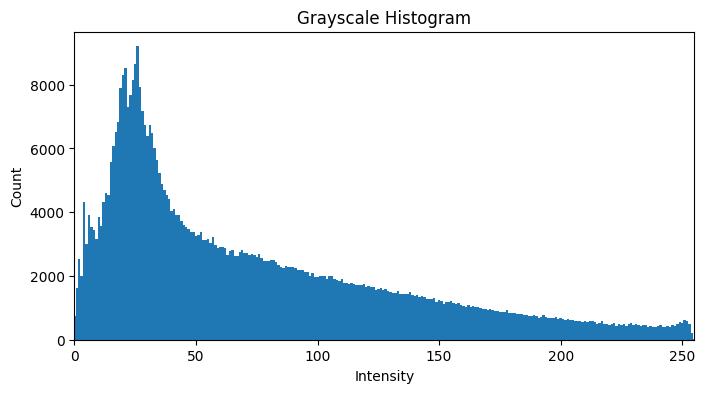

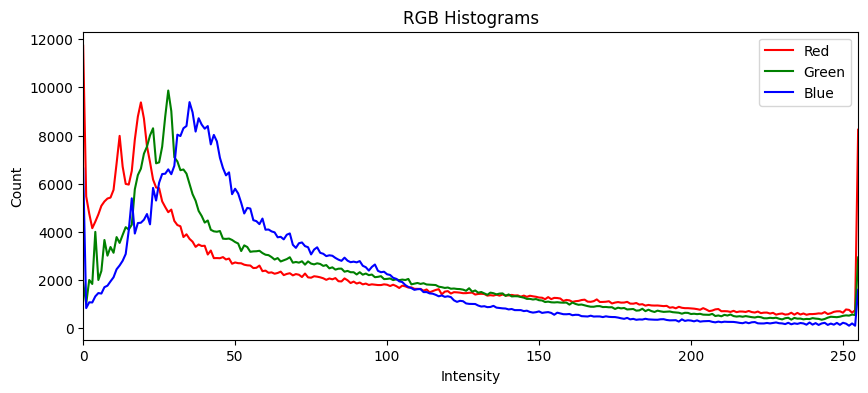

In [3]:
def gray_histogram(gray_img):
   """
Compute grayscale histogram using pure NumPy loops.
Input: gray_img (H,W) with values in 0-255 (uint8 or int)
Output: hist (256,) where hist[i] is the count of pixels with intensity i
   """
# initialize
   hist = np.zeros(256, dtype=np.int64)
   h, w = gray_img.shape
# flatten with explicit loops (explicit row/col loops as requested)
   for r in range(h):
       for c in range(w):
           val = int(gray_img[r, c])
           hist[val] += 1
   return hist


hist_gray = gray_histogram(gray)


# Plot grayscale histogram
plt.figure(figsize=(8,4))
plt.bar(np.arange(256), hist_gray, width=1.0)
plt.title('Grayscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.xlim([0,255])
plt.show()


# RGB histogram using NumPy loops
def rgb_histogram(rgb_img):
   """
Compute histograms for each channel using NumPy loops.
Input: rgb_img (H,W,3) 0-255
Output: hist_r, hist_g, hist_b (each 256,)
   """
   hist_r = np.zeros(256, dtype=np.int64)
   hist_g = np.zeros(256, dtype=np.int64)
   hist_b = np.zeros(256, dtype=np.int64)
   h, w, _ = rgb_img.shape
   for r in range(h):
       for c in range(w):
           pr, pg, pb = rgb_img[r, c]
           hist_r[int(pr)] += 1
           hist_g[int(pg)] += 1
           hist_b[int(pb)] += 1
   return hist_r, hist_g, hist_b


hist_r, hist_g, hist_b = rgb_histogram(rgb)


# Plot RGB histogram (similar style to lecture slides)
plt.figure(figsize=(10,4))
plt.plot(hist_r, color='r', label='Red')
plt.plot(hist_g, color='g', label='Green')
plt.plot(hist_b, color='b', label='Blue')
plt.title('RGB Histograms')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.legend()
plt.xlim([0,255])
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

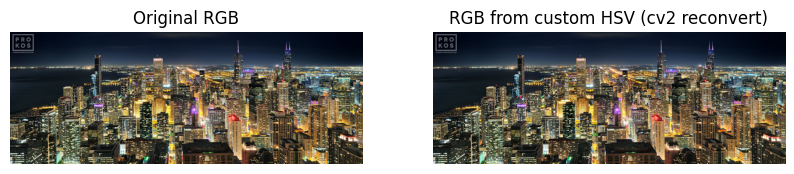

In [4]:
def rgb_to_hsv(rgb_img):
    """
    Convert an RGB image (0-255 uint8) to HSV in OpenCV-compatible scale.
    Output: HSV image with H in [0,179], S in [0,255], V in [0,255].
    Uses only NumPy (no cv2.cvtColor inside).
    """

    img = rgb_img.astype(np.float32) / 255.0  # normalize to 0-1
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]

    cmax = np.maximum(np.maximum(r, g), b)
    cmin = np.minimum(np.minimum(r, g), b)
    delta = cmax - cmin

    # Hue calculation (in degrees 0–360)
    h = np.zeros_like(cmax)

    mask = delta != 0

    # r is max
    idx = (cmax == r) & mask
    h[idx] = (60 * ((g[idx] - b[idx]) / delta[idx])) % 360

    # g is max
    idx = (cmax == g) & mask
    h[idx] = 60 * ((b[idx] - r[idx]) / delta[idx]) + 120

    # b is max
    idx = (cmax == b) & mask
    h[idx] = 60 * ((r[idx] - g[idx]) / delta[idx]) + 240

    # Saturation
    s = np.zeros_like(cmax)
    nonzero = cmax != 0
    s[nonzero] = delta[nonzero] / cmax[nonzero]

    # Value
    v = cmax

    # Convert to OpenCV scales
    h_opencv = (h / 2.0).astype(np.float32)       # 0–179
    s_opencv = (s * 255.0).astype(np.float32)     # 0–255
    v_opencv = (v * 255.0).astype(np.float32)     # 0–255

    hsv = np.stack([h_opencv, s_opencv, v_opencv], axis=2)
    return hsv.astype(np.uint8)

hsv_custom = rgb_to_hsv(rgb)
rgb_back = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

show_side_by_side([rgb, rgb_back],
                  titles=['Original RGB', 'RGB from custom HSV (cv2 reconvert)'])


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

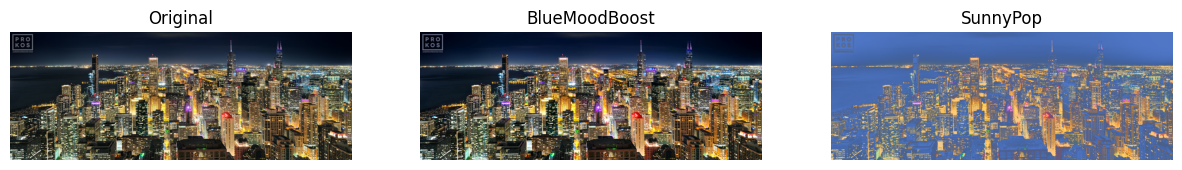

In [5]:
# --- small helper: accept PIL or np.ndarray and return HxWx3 uint8 RGB ---
def ensure_rgb_numpy(img):
    """
    Accept a PIL Image or a NumPy array. Return an HxWx3 uint8 RGB NumPy array.
    """
    if isinstance(img, np.ndarray):
        arr = img
        # grayscale -> stack
        if arr.ndim == 2:
            arr = np.stack([arr, arr, arr], axis=-1)
        # RGBA -> drop alpha
        if arr.ndim == 3 and arr.shape[2] == 4:
            arr = arr[..., :3]
        return arr.astype(np.uint8)

    # PIL Image
    try:
        from PIL import Image as _Image
        if isinstance(img, _Image.Image):
            return np.array(img.convert("RGB"), dtype=np.uint8)
    except Exception:
        pass

    raise TypeError("Input must be a NumPy array or PIL.Image.Image")


# --- Filter 1: BlueMoodBoost
def blue_mood_boost(img_input, contrast=1.1, brightness=10, sat_mult=1.2, blue_tint=1.08, gamma=1.0):
    """
    BlueMoodBoost:
      - gamma correction (optional)
      - linear contrast+brightness (centered at 128)
      - slight blue channel tint
      - saturation boost (via rgb_to_hsv if available, else cv2)
    Returns uint8 RGB image.
    """
    img = ensure_rgb_numpy(img_input).astype(np.float32)

    # 1) gamma correction (if not 1)
    if abs(gamma - 1.0) > 1e-6:
        img = 255.0 * ((img / 255.0) ** (1.0 / gamma))

    # 2) contrast + brightness centered at midgray (128)
    img = (img - 128.0) * float(contrast) + 128.0 + float(brightness)

    # 3) blue tint (channel index 2)
    img[..., 2] = img[..., 2] * float(blue_tint)

    # clamp -> convert to HSV using rgb_to_hsv if defined, otherwise use cv2
    img_clamped = np.clip(img, 0, 255).astype(np.uint8)
    if 'rgb_to_hsv' in globals():
        hsv = rgb_to_hsv(img_clamped).astype(np.float32)
    else:
        # cv2 expects RGB->HSV uses cv2.COLOR_RGB2HSV (H:0-179,S:0-255,V:0-255)
        hsv = cv2.cvtColor(img_clamped, cv2.COLOR_RGB2HSV).astype(np.float32)

    # 4) saturation boost
    hsv[..., 1] = np.clip(hsv[..., 1] * float(sat_mult), 0, 255)

    # back to RGB
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


# --- Filter 2: SunnyPop (robust) ---
def sunny_pop(img_input, contrast=1.05, vibrance=1.15, warmth=1.08):
    """
    SunnyPop:
      - contrast boost
      - vibrance (saturation boost stronger for low-sat pixels)
      - warmth (R up, B down)
      - split-toning: warm highlights, cool shadows
    Returns uint8 RGB image.
    """
    img = ensure_rgb_numpy(img_input).astype(np.float32)

    # 1) contrast (linear)
    img = (img - 128.0) * float(contrast) + 128.0

    # 2) vibrance using HSV (use existing rgb_to_hsv if available)
    img_clamped = np.clip(img, 0, 255).astype(np.uint8)
    if 'rgb_to_hsv' in globals():
        hsv = rgb_to_hsv(img_clamped).astype(np.float32)
    else:
        hsv = cv2.cvtColor(img_clamped, cv2.COLOR_RGB2HSV).astype(np.float32)

    sat = hsv[..., 1] / 255.0  # normalized saturation
    boost = 1.0 + (float(vibrance) - 1.0) * (1.0 - sat)  # stronger boost where sat is low
    hsv[..., 1] = np.clip(hsv[..., 1] * boost, 0, 255)

    # back to RGB to apply warmth and split-toning
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # 3) warmth: increase R, reduce B slightly
    out[..., 0] = out[..., 0] * float(warmth)           # R
    out[..., 2] = out[..., 2] * (2.0 - float(warmth))   # B reduced if warmth>1

    # 4) split-toning based on luminance (blend warm highlights, cool shadows)
    lum = 0.299 * out[..., 0] + 0.587 * out[..., 1] + 0.114 * out[..., 2]
    lum_norm = lum / 255.0
    highlights = np.clip((lum_norm - 0.6) / 0.4, 0.0, 1.0)[..., None]
    shadows = np.clip((0.6 - lum_norm) / 0.6, 0.0, 1.0)[..., None]

    highlight_color = np.array([255.0, 200.0, 120.0], dtype=np.float32)
    shadow_color = np.array([80.0, 120.0, 200.0], dtype=np.float32)

    out = out * (1.0 - highlights - shadows) + highlight_color * highlights + shadow_color * shadows

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out


# ------------------------------
# Demo: apply filters and display
# ------------------------------
# Make sure you have `rgb` variable defined (PIL Image or NumPy array OK).
try:
    _ = rgb
except NameError:
    raise NameError("Variable 'rgb' not found. Load your image into variable named 'rgb' (PIL or NumPy).")

blue_result = blue_mood_boost(rgb)
sunny_result = sunny_pop(rgb)

# Display using existing helper if present
try:
    show_side_by_side([ensure_rgb_numpy(rgb), blue_result, sunny_result],
                      titles=['Original', 'BlueMoodBoost', 'SunnyPop'])
except NameError:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1); plt.imshow(ensure_rgb_numpy(rgb)); plt.title('Original'); plt.axis('off')
    plt.subplot(1,3,2); plt.imshow(blue_result); plt.title('BlueMoodBoost'); plt.axis('off')
    plt.subplot(1,3,3); plt.imshow(sunny_result); plt.title('SunnyPop'); plt.axis('off')
    plt.show()


BlueMoodBoost:

I chose a contrast lift, a subtle blue tint, and a saturation boost to create a cooler, cinematic tone. These adjustments enhance the shadows and give the image a calm, atmospheric look. This filter works well for cityscapes, night scenes, and images where a “moody” or dramatic style fits the visual theme.

SunnyPop:

I applied vibrance, warmth, and highlight-based split-toning to give the image a bright, sunny, energetic feel. These modifications enrich warm colors while keeping shadows clean, making the scene look more cheerful and vivid. This filter is ideal for outdoor photos, landscapes, and images with natural light where a warm, uplifting style enhances the overall mood.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

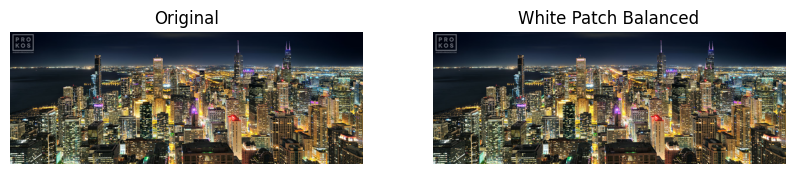

In [6]:
def white_patch_balance(img_rgb):
    """
    White Patch algorithm: find the maximum RGB values and scale each channel so that
    the brightest pixel becomes pure white (255).
    Input:  img_rgb (0-255 uint8)
    Output: balanced image (0-255 uint8)
    """
    img = img_rgb.astype(np.float32)

    # find max per channel
    max_r = img[:, :, 0].max()
    max_g = img[:, :, 1].max()
    max_b = img[:, :, 2].max()

    # avoid division by zero
    max_r = max_r if max_r > 1e-6 else 1.0
    max_g = max_g if max_g > 1e-6 else 1.0
    max_b = max_b if max_b > 1e-6 else 1.0

    # scale factors to bring each channel max → 255
    sr = 255.0 / max_r
    sg = 255.0 / max_g
    sb = 255.0 / max_b

    # apply scaling
    out = img.copy()
    out[:, :, 0] = np.clip(out[:, :, 0] * sr, 0, 255)
    out[:, :, 1] = np.clip(out[:, :, 1] * sg, 0, 255)
    out[:, :, 2] = np.clip(out[:, :, 2] * sb, 0, 255)

    return out.astype(np.uint8)


# Apply and display
wb = white_patch_balance(rgb)

try:
    show_side_by_side([rgb, wb], titles=['Original', 'White Patch Balanced'])
except NameError:
    # fallback display
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1); plt.imshow(rgb); plt.title("Original"); plt.axis("off")
    plt.subplot(1, 2, 2); plt.imshow(wb); plt.title("White Patch Balanced"); plt.axis("off")
    plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [7]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.